In [18]:
def unit_vectors(coords,coms):
  unit_vectors = []

  for i in range(len(coords)):
    x = np.array_split(coords[i],3)
    com = coms[i]

    vec1 = x[0] - com
    vec2 = x[1] - com
    vec3 = x[2] - com
    unit1 = vec1/np.sqrt(vec1[0]**2+vec1[1]**2)
    unit2 = vec2/np.sqrt(vec2[0]**2+vec2[1]**2)
    unit3 = vec3/np.sqrt(vec3[0]**2+vec3[1]**2)

    unit_vectors.append(np.array([unit1,unit2,unit3]))



  return unit_vectors

def calc_projections(velocities,unit_vectors):
    projections = []
    for i in range(len(velocities)):
      velocity = np.array_split(velocities[i],3)
      unit = unit_vectors[i]
      proj1 = velocity[0][0]*unit[0][0] + velocity[0][1]*unit[0][1]
      proj2 = velocity[1][0]*unit[1][0] + velocity[1][1]*unit[1][1]
      proj3 = velocity[2][0]*unit[2][0] + velocity[2][1]*unit[2][1]
      projections.append([proj1,proj2,proj3])


    return np.array(projections)

def calc_COM_dists(coords,coms):

    dists = []
    for i in range(len(coords)):
      x = np.array_split(coords[i],3)
      com = coms[i]
      #print(x)
      d1 = np.sqrt((x[0][0] - com[0])**2 + (x[0][1] - com[1])**2)
      #print(d1)
      d2 = np.sqrt((x[1][0] - com[0])**2 + (x[1][1] - com[1])**2)
      #print(d2)
      d3 = np.sqrt((x[2][0] - com[0])**2 + (x[2][1] - com[1])**2)
      #print(d3)
      dists.append(np.array([d1,d2,d3]))

    return dists


def calc_COM(coordinates):
    #print(coordinates)
    COM_array = []
    for coord in coordinates:
      r_array = np.array_split(coord,3)
      COM = (r_array[0] + r_array[1] + r_array[2])/3
      COM_array.append(COM)
    
    return COM_array

In [3]:
import numpy as np

velocities_low_8k = [[433.0127018922193, 249.99999999999997, -433.0127018922193, 249.99999999999997, 0.0, -500.0], [-705.4576420877839, -407.29615956133205, 705.4576420882809, -407.2961595597633, 3.05506243687273e-10, 814.5923191219388], [-2232.8121808719097, -1289.114713675226, 2232.812180872112, -1289.1147136751592, 4.767806515342419e-10, 2578.2294273520124], [-3133.3376520905927, -1809.0333368961465, 3133.3376520922307, -1809.0333368943225, -2.6378581247946632e-09, 3618.066673792431], [-4089.699626758419, -2361.189180412408, 4089.6996267578957, -2361.189180415002, 6.010627179065823e-09, 4722.378360827637], [-4564.054425602727, -2635.0580512191627, 4564.054425604562, -2635.0580512187885, 4.854594984441203e-09, 5270.116102435748], [-5110.543420448605, -2950.5736195016493, 5110.543420443933, -2950.573619502776, 8.01931257487206e-09, 5901.147238997857], [-5113.81671531832, -2952.463457180432, 5113.816715316882, -2952.4634571757038, 3.0470556173827327e-10, 5904.926914347568], [-5313.682240126974, -3067.8558717295423, 5313.682240123771, -3067.8558717256965, -5.221801065728024e-10, 6135.711743444197], [-5485.628673269547, -3167.1291911909125, 5485.628673269067, -3167.1291911855005, -3.668258547672137e-09, 6334.25838236814], [-5521.817807790198, -3188.022997750313, 5521.817807795139, -3188.0229977381246, -9.234625034133409e-09, 6376.045995482376], [-5174.56955091836, -2987.53912316693, 5174.56955091873, -2987.5391231637473, 6.798602377046518e-09, 5975.07824632044], [-5044.408580145892, -2912.3906516480874, 5044.408580141167, -2912.3906516532215, 8.623534444593038e-09, 5824.781303292732], [-4930.125809729224, -2846.4094633848495, 4930.125809729326, -2846.409463393735, 9.04044022949657e-09, 5692.818926771919], [-4503.395432746504, -2600.036565356485, 4503.395432751661, -2600.03656537132, -8.968688227689e-10, 5200.0731307278], [-4187.1671696864905, -2417.462092556032, 4187.16716969146, -2417.4620925685995, -3.170620059556907e-09, 4834.924185119172], [-3737.7269200766323, -2157.977643459814, 3737.726920083459, -2157.977643470532, -1.7149803523141965e-09, 4315.955286924595], [-3037.8379564897523, -1753.896561928424, 3037.837956491372, -1753.8965619444548, 6.494718124456355e-09, 3507.7931238654774], [-2717.6574923676126, -1569.0402847767161, 2717.657492367884, -1569.040284792624, 6.5889185101872685e-09, 3138.080569564815], [-2288.236453447124, -1321.1139323617333, 2288.2364534483077, -1321.1139323788418, 1.0452350640895941e-08, 2642.227864730807], [-1582.4382060974986, -913.621124258935, 1582.438206095614, -913.621124276984, 1.3859932787890359e-08, 1827.2422485255772], [-1211.5924592506663, -699.5132324889004, 1211.5924592477024, -699.5132325077353, 1.4799724149482928e-08, 1399.0264649848768], [-927.4607589409945, -535.4697188284339, 927.4607589353897, -535.4697188471677, 1.4068275581133434e-08, 1070.9394376618757], [-442.46417009730044, -255.45680770271554, 442.4641700917031, -255.45680771930716, 1.2271764695880857e-08, 510.9136154098459], [439.23037020950585, 253.58977248778632, -439.230370214939, 253.589772468563, 1.223448811497075e-08, -507.1795449662567], [792.9853148867228, 457.83028502336947, -792.985314891911, 457.8302850045184, 1.4165834650541941e-08, -915.6605700402304], [1487.1459632831381, 858.6041222348078, -1487.145963288729, 858.6041222160339, 1.500173595947132e-08, -1717.2082444637017], [1574.1887318190793, 908.8582880798474, -1574.1887318263166, 908.8582880607194, 1.0034811512963622e-08, -1817.716576152031], [1775.896897891058, 1025.3145520594114, -1775.89689789449, 1025.3145520441383, 6.415692636855736e-09, -2050.6291041081117], [2038.9770918586898, 1177.203972862623, -2038.9770918644617, 1177.2039728503762, 4.28755362902759e-09, -2354.407945718209], [2289.934525712437, 1322.0943148529534, -2289.934525717523, 1322.0943148405156, 4.676082148734019e-10, -2644.188629698224], [2664.4706219879363, 1538.33283085742, -2664.470621994563, 1538.332830849899, 1.0926559745116884e-09, -3076.6656617103195], [2849.205474935145, 1644.9895479363827, -2849.205474944382, 1644.9895479293498, -3.6096215519990307e-09, -3289.9790958649246], [2707.3911636459525, 1563.1130171388768, -2707.391163653706, 1563.113017134022, -6.722824659346626e-10, -3126.2260342709997], [3045.386733902527, 1758.2548506076391, -3045.3867339076774, 1758.254850610417, -6.869675470731553e-09, -3516.509701214564], [2925.1276004070623, 1688.8232075148894, -2925.1276004153456, 1688.8232075113033, -7.995925481694833e-09, -3377.6464150229926], [2697.2808053645986, 1557.2757990670227, -2697.2808053764725, 1557.2757990550492, 2.8688453032748554e-09, -3114.5515981202398], [2645.786716431038, 1527.5456729577147, -2645.78671644618, 1527.5456729443083, 4.318880832284917e-09, -3055.091345905095], [2419.51369297678, 1396.9068819584452, -2419.5136929922396, 1396.9068819405834, 5.677442448965572e-09, -2793.813763901328], [2446.4435586208233, 1412.4548471368305, -2446.4435586389222, 1412.454847117958, 6.422510551721131e-09, -2824.9096942574542], [2303.024928193954, 1329.6520622527278, -2303.024928216085, 1329.652062229049, 7.002739602520973e-09, -2659.3041244938186], [2038.1055839376208, 1176.700807532474, -2038.105583958739, 1176.7008075117578, 9.401151566969023e-09, -2353.4016150518796], [2059.4111964390277, 1189.001608646635, -2059.4111964589238, 1189.001608621947, 9.816631566611173e-09, -2378.0032172801984], [1786.427820843077, 1031.3945832615082, -1786.427820862074, 1031.3945832371091, 7.181204343483585e-09, -2062.789166511423], [1569.2603016613095, 906.0128576040713, -1569.260301682014, 906.0128575788503, 1.1136541071182053e-08, -1812.0257151945195], [1505.2263339639055, 869.0428291180164, -1505.2263339852789, 869.0428290893315, 1.60602555851043e-08, -1738.085658219827], [1233.3668399961716, 712.0846770942824, -1233.3668400180877, 712.084677065051, 1.6426455114634978e-08, -1424.1693541730374], [880.7880231149771, 508.52320225714516, -880.7880231374911, 508.52320222799534, 1.7319517825701128e-08, -1017.0464045006668], [803.5429237341486, 463.9257233385212, -803.542923759819, 463.92572330631464, 2.086758172818704e-08, -927.8514466597287], [101.19058358996801, 58.42241068951853, -101.19058361552675, 58.42241065666218, 2.0828907743085687e-08, -116.84482136037263], [-118.64093371576149, -68.49737500275455, 118.64093368969912, -68.49737503755573, 2.009319105483749e-08, 136.99475002547786], [-398.758124927855, -230.22311075526534, 398.75812490306987, -230.22311078845956, 1.987332142905415e-08, 460.44622152733353], [-750.3018135432208, -433.1869540109127, 750.3018135217453, -433.18695404315497, 2.1142652176369962e-08, 866.3739080355136], [-935.4671735405806, -540.0922244524339, 935.4671735185855, -540.0922244823845, 1.8388182847856724e-08, 1080.1844489142688], [-848.6643410414556, -489.9765857430578, 848.6643410189785, -489.97658577245693, 1.900523255742355e-08, 979.9531714940747], [-1181.2322588720428, -681.9847626258553, 1181.232258848544, -681.9847626570515, 2.1646812075532874e-08, 1363.9695252606016], [-1263.5382337622088, -729.5041393862492, 1263.5382337385042, -729.5041394121238, 2.1347524102747695e-08, 1459.008278777711], [-1442.194330876603, -832.6512851462201, 1442.1943308520413, -832.6512851732354, 2.1962510263782076e-08, 1665.3025702989537], [-1642.8365393888014, -948.4921182401484, 1642.8365393643585, -948.4921182702651, 2.204691689564543e-08, 1896.9842364916517], [-1662.9555367957737, -960.1078268048157, 1662.9555367698488, -960.107826838065, 2.7111351761043463e-08, 1920.215653623283], [-1614.9659861058515, -932.4010467977627, 1614.9659860807494, -932.4010468317521, 2.909779205362389e-08, 1864.8020936064254], [-1898.795666487451, -1096.270189170316, 1898.7956664587052, -1096.270189201335, 2.8554917422517028e-08, 2192.5403783484567], [-1800.0580900646758, -1039.2640228418459, 1800.0580900368177, -1039.264022870963, 2.6800998788318955e-08, 2078.5280456954474], [-1501.5491776425267, -866.9198218989661, 1501.5491776151352, -866.9198219275149, 2.7997882704229395e-08, 1733.8396438110672], [-1238.8312070619768, -715.2395308645641, 1238.8312070370084, -715.2395308945281, 2.7817095144543258e-08, 1430.4790617402343], [-1022.5163520871846, -590.3500911130492, 1022.5163520625357, -590.3500911408239, 2.456543035886937e-08, 1180.7001822422746], [-1023.9641909057336, -591.1860012459549, 1023.9641908847955, -591.186001273051, 2.2117077163281364e-08, 1182.3720025072628], [-791.3735943362838, -456.8997577058908, 791.3735943160982, -456.8997577323937, 2.1016076737769613e-08, 913.7995154267743], [-486.1724828558564, -280.69181383419595, 486.1724828359293, -280.69181385979266, 1.9042908878406747e-08, 561.383627684347], [-178.83894951092225, -103.25271562725894, 178.83894949107082, -103.25271565277157, 1.5026472674262442e-08, 206.50543126938294], [-544.9303380862258, -314.6156773677361, 544.9303380660779, -314.6156773968215, 1.3809170810122854e-08, 629.231354751647], [-259.31750280213225, -149.71703003139385, 259.3175027857724, -149.7170300605709, 1.1549538968548017e-08, 299.4340600813592], [-92.97623121993823, -53.679852106346274, 92.9762312054711, -53.67985213529707, 1.270909645601098e-08, 107.35970422925377], [181.86406815367806, 104.9992687199702, -181.86406816672132, 104.99926869487308, 1.109685460311545e-08, -209.99853742599836], [40.82432350224707, 23.569934178385196, -40.82432351507609, 23.569934152670186, 1.00821225149521e-08, -47.13986834497979], [101.35439125809795, 58.51698509125999, -101.35439127177946, 58.51698506454795, 9.927241402271897e-09, -117.03397017121354], [365.4552803254605, 210.9957044873698, -365.4552803386946, 210.9957044604431, 8.511568749266206e-09, -421.99140896249486], [363.62390097371775, 209.93835712441592, -363.6239009873067, 209.93835709728828, 6.4593223095768e-09, -419.87671423935], [395.2525577162079, 228.19917060898686, -395.25255772965636, 228.19917058186482, 3.808001995759728e-09, -456.39834120861855], [571.0950288331, 329.72186864453346, -571.0950288451822, 329.7218686170485, 1.90053755214493e-09, -659.4437372793722], [690.8759998475629, 398.8774445024037, -690.8759998581193, 398.8774444774596, 2.3923416373176414e-09, -797.7548889957269], [580.3713715101173, 335.07756758498294, -580.3713715230524, 335.07756756044904, 3.809587598540001e-09, -670.1551351618273], [410.36775334596757, 236.92593287549855, -410.3677533584712, 236.92593285110547, 5.170908905924318e-09, -473.85186574174224], [517.7892469383344, 298.9457611199355, -517.7892469503199, 298.9457610932662, 5.931026832949586e-09, -597.8915222279002], [809.5984664975628, 467.42189258346036, -809.5984665080705, 467.4218925575868, 5.9121701178182975e-09, -934.8437851574724], [955.2011944469446, 551.4856667594088, -955.2011944573708, 551.4856667350672, 5.915848942116665e-09, -1102.9713335100473], [609.7905194955774, 352.062720596007, -609.7905195060375, 352.06272056821047, 7.529582073965899e-09, -704.1254411840284], [437.07681710878796, 252.34641803161855, -437.0768171198146, 252.3464180010106, 8.454140563976476e-09, -504.69283605291326], [535.9318672938678, 309.4204078638976, -535.9318673009201, 309.42040783644177, 8.044210067825781e-09, -618.8408157211379], [828.145715116799, 478.1301515627364, -828.1457151205464, 478.13015153863984, 6.501315872148779e-09, -956.2603031219137], [777.0145566028079, 448.60956342978545, -777.014556606629, 448.60956340668827, 6.4526506171084e-09, -897.2191268565327], [1017.9626796885733, 587.7210271546292, -1017.9626796921655, 587.7210271317731, 7.247482351343078e-09, -1175.4420543066], [865.737614671328, 499.83384489050394, -865.7376146742573, 499.8338448688298, 6.6710855099995314e-09, -999.6676897739102], [655.9573154112206, 378.7171326429248, -655.9573154119025, 378.717132618086, 8.258660906319398e-09, -757.4342652745237], [279.98333252556677, 161.6484524200784, -279.98333252978273, 161.64845239293737, 1.155433411997248e-08, -323.2969048235173], [151.17986452584478, 87.28373549975784, -151.17986452953136, 87.2837354697108, 1.0650688728384837e-08, -174.56747098185173], [-112.46823888042275, -64.93356797031863, 112.46823887446811, -64.93356800336325, 1.2178159121094926e-08, 129.86713596338245], [-213.94292615405658, -123.52000598328524, 213.9429261463527, -123.5200060138614, 1.2440694489243858e-08, 247.04001198636846], [-155.85588879406328, -89.98343932951231, 155.85588878493803, -89.98343935639699, 1.2420593324544294e-08, 179.96687867582312], [-295.4041298716831, -170.55165387907124, 295.40412986166916, -170.55165390871474, 1.3137499167828814e-08, 341.10330777549103], [-668.2011189527973, -385.7860958785774, 668.2011189437383, -385.7860959096823, 1.5070605771541364e-08, 771.5721917734835], [-523.5383366042274, -302.26499954861737, 523.5383365935177, -302.2649995802009, 1.7659497344595118e-08, 604.5299991100668], [-566.1074351860062, -326.842280074058, 566.1074351751372, -326.84228010670313, 1.8294645747634543e-08, 653.6845601611748], [-591.6494007404308, -341.58894076343057, 591.6494007274084, -341.5889407952017, 1.7519557034071763e-08, 683.1778815398242], [-771.8030686073055, -445.60070940177445, 771.8030685904541, -445.6007094320843, 1.9900266385340042e-08, 891.2014188138942], [-942.3844970147736, -544.0859430094511, 942.3844969975002, -544.085943042064, 2.1682356381942e-08, 1088.171886035645], [-805.0893879436674, -464.818574828396, 805.0893879260616, -464.81857486052667, 2.3125155438083958e-08, 929.6371496763204], [-750.2367152964682, -433.149369514305, 750.2367152799022, -433.149369543784, 2.442948025212246e-08, 866.298739042574], [-961.0055232718705, -554.836797537799, 961.0055232563404, -554.8367975661935, 2.6837768854035624e-08, 1109.6735950878174], [-934.0732286388267, -539.2874299813614, 934.0732286195686, -539.2874300091431, 2.9592265866533938e-08, 1078.5748599727817], [-777.6235912776178, -448.9611897398764, 777.6235912599143, -448.96118976136216, 2.8689881126632285e-08, 897.9223794867232], [-705.0047667095234, -407.03469183003676, 705.0047666931557, -407.03469185153796, 2.7195835467272513e-08, 814.0693836636643], [-396.16384731211156, -228.72530388256718, 396.1638472981539, -228.72530390039964, 2.4445611974641982e-08, 457.45060776901903], [-332.59278749124815, -192.02253538450256, 332.59278747980153, -192.02253540090516, 2.590094370439527e-08, 384.0450707711254], [-300.9214629348601, -173.73708762648377, 300.9214629249626, -173.73708764294355, 2.6215065340983053e-08, 347.4741752579193], [-161.36894523968908, -93.16640396902866, 161.36894523097055, -93.16640398396217, 2.5173595872775835e-08, 186.33280794589584], [-278.20723410298206, -160.623021494871, 278.207234089997, -160.62302150831675, 2.60714696450712e-08, 321.24604299630727], [-195.09810894356164, -112.6399457158231, 195.09810893228524, -112.63994572609607, 2.5791494908014222e-08, 225.2798914338794], [-47.29534762300867, -27.305981680946758, 47.29534761291052, -27.305981690849165, 2.561609225376532e-08, 54.6119633627182], [205.62462626663594, 118.71743332514214, -205.62462627527827, 118.71743331776136, 2.4698721719960673e-08, -237.434866651962], [226.759909805316, 130.91989496542902, -226.75990981343423, 130.91989495504183, 2.4974361982767236e-08, -261.83978992890815], [328.12448511004044, 189.44275979995376, -328.12448511686443, 189.44275979055072, 2.580758629492641e-08, -378.88551960589103], [254.36916657381516, 146.86010678814785, -254.36916658274697, 146.86010678140246, 2.7334079889240457e-08, -293.72021358303186], [547.6986832306801, 316.2139821905291, -547.6986832372071, 316.213982187439, 2.545327048869306e-08, -632.4279643889365], [1001.4422865055808, 578.1829736804125, -1001.4422865090265, 578.1829736813819, 2.075378886097887e-08, -1156.365947375704], [1094.2751262762526, 631.7800387118464, -1094.2751262784702, 631.7800387126575, 1.8952790248491604e-08, -1263.560077436823], [989.6286266001523, 571.3623539544345, -989.6286266038179, 571.3623539562581, 1.7489276711747665e-08, -1142.7247079169167], [892.3553269630261, 515.2015882241781, -892.3553269686397, 515.2015882224395, 1.7384054383427052e-08, -1030.4031764556182], [1259.3424860536584, 727.0817233148265, -1259.3424860595985, 727.0817233148402, 1.5765255019838075e-08, -1454.1634466380324], [1754.0340828217836, 1012.6920498702705, -1754.0340828270437, 1012.6920498754448, 1.1623360857887607e-08, -2025.3840997593875], [1882.808512244907, 1087.0400013610429, -1882.8085122524199, 1087.0400013684143, 1.1589578138557732e-08, -2174.0800027424593], [1743.6617584968471, 1006.703585631039, -1743.6617585048086, 1006.7035856332892, 1.2062529200802516e-08, -2013.4071712781931], [1526.5905790866786, 881.3774817654231, -1526.5905790964325, 881.3774817649507, 1.5726498801285437e-08, -1762.7549635462274], [1582.6959283142476, 913.7699202458182, -1582.6959283212248, 913.7699202426511, 1.3523059255381241e-08, -1827.5398405012133], [1681.1750625994969, 970.6268749379922, -1681.1750626076446, 970.626874928506, 1.513145313707423e-08, -1941.2537498802485], [1105.0754053155329, 638.0155827314342, -1105.0754053249598, 638.0155827131152, 1.9233402284492116e-08, -1276.0311654570082], [1030.2848412779351, 594.8352304534701, -1030.284841288541, 594.8352304338921, 1.7337112386373206e-08, -1189.6704608988805], [933.6642025557707, 539.0512786791464, -933.6642025669535, 539.0512786564541, 1.6432553283767273e-08, -1078.102557348084], [597.5099459514613, 344.9725281428633, -597.5099459649298, 344.97252811543945, 1.6738400253610296e-08, -689.9450562706893], [411.2979611331646, 237.46298858316874, -411.29796114810256, 237.4629885504742, 1.8164833079481817e-08, -474.9259771510136], [138.61109445748895, 80.02715270655969, -138.6110944723028, 80.02715266833926, 1.8165724612976714e-08, -160.05430539211608], [-273.7743331481916, -158.06368492683762, 273.77433313227147, -158.06368497167907, 1.8011796624487717e-08, 316.12736988008794], [-591.6978599439468, -341.6169187048239, 591.6978599291101, -341.6169187518069, 1.9946506296691866e-08, 683.2338374350168], [-914.969450065988, -528.2578582779925, 914.969450048307, -528.2578583297748, 2.0651473022773956e-08, 1056.5157165864205], [-1109.7359852131306, -640.706369769794, 1109.7359851945287, -640.7063698272622, 2.2221426263289218e-08, 1281.4127395745827], [-1068.4775462562368, -616.8857989295988, 1068.4775462353648, -616.8857989908807, 2.2772562356752914e-08, 1233.771597893065], [-1289.4402051614427, -744.4586495261458, 1289.4402051379834, -744.4586495929368, 2.4110722843747115e-08, 1488.9172990888496], [-1470.2315929172942, -848.8386059113931, 1470.2315928951145, -848.8386059786666, 2.1916370773071974e-08, 1697.6772118579536], [-1542.1068658530505, -890.3358140846054, 1542.1068658250301, -890.335814154069, 2.0653987212978805e-08, 1780.671628205933], [-1331.854343656313, -768.9464637999363, 1331.8543436293007, -768.9464638665313, 1.6801739200708133e-08, 1537.8929276307642], [-1436.315262685768, -829.2570035201798, 1436.315262658833, -829.2570035866603, 1.8656568901190273e-08, 1658.514007070014], [-1319.8345733065378, -762.0068461560832, 1319.8345732823595, -762.006846215269, 1.728318464988816e-08, 1524.0136923363434], [-1214.8691972792726, -701.4050580492949, 1214.869197253566, -701.4050581061545, 1.2261097133060728e-08, 1402.810116120767], [-1336.8918331948857, -771.8548597433011, 1336.891833168209, -771.8548598016893, 1.193676364512227e-08, 1543.709719504544], [-1537.0767640457063, -887.431683457247, 1537.0767640180384, -887.4316835160703, 1.7054542219448604e-08, 1774.8633669320102], [-1212.7361031625478, -700.1735155885046, 1212.7361031360795, -700.1735156440579, 1.3145622497639641e-08, 1400.3470311924066], [-1270.3488265761312, -733.4362369595324, 1270.3488265489461, -733.4362370197798, 1.5218503079671783e-08, 1466.8724739370055], [-1137.6720968036907, -656.8352913110356, 1137.6720967747074, -656.8352913704482, 1.4618744755278515e-08, 1313.6705826362715], [-1022.9237623886927, -590.5853095511852, 1022.9237623633071, -590.585309606713, 1.065862738133536e-08, 1181.1706191108483], [-708.6359138767648, -409.13113561442896, 708.6359138537208, -409.1311356654053, 1.233010412828353e-08, 818.2622712295451], [-865.7406479658678, -499.8355961307331, 865.7406479403548, -499.83559618137446, 1.494914845430037e-08, 999.6711922649035], [-581.1081645966915, -335.5029552392331, 581.1081645738989, -335.5029552851943, 1.505594409391751e-08, 671.0059104768168], [-256.72148245744404, -148.2182169896485, 256.7214824360399, -148.21821702658858, 1.5038626027118186e-08, 296.436433967032], [67.13173592614464, 38.75852582026957, -67.1317359458447, 38.75852578587532, 1.1585584136934958e-08, -77.51705165506905], [444.18627576581923, 256.4510658943649, -444.1862757824792, 256.45106586540146, 8.512738211101633e-09, -512.9021318062398], [231.98995546942518, 133.9394632543615, -231.9899554919949, 133.93946322247848, 1.0173034638637064e-08, -267.8789265243288], [595.4085303707417, 343.759275300561, -595.4085303893493, 343.7592752719844, 7.664508224480016e-09, -687.5185506222044], [799.9979400481675, 461.8790260486318, -799.9979400638724, 461.8790260229258, 5.387508686901481e-09, -923.7580521236337], [1268.818922107218, 732.5529462364295, -1268.8189221164616, 732.5529462193401, 3.84421893576824e-09, -1465.1058925070938], [1567.1258271900406, 904.7805181839134, -1567.1258271973609, 904.7805181722589, 9.05427069240117e-11, -1809.5610364075628], [1659.0494187372951, 957.852628509692, -1659.0494187446643, 957.8526284977465, -2.6142093184905787e-09, -1915.705257058834], [1575.7976238796796, 909.787182335517, -1575.7976238849906, 909.7871823265804, -2.7566562550695227e-09, -1819.5743647147715], [1618.8515589429821, 934.64438333189, -1618.851558950109, 934.6443833258202, -4.335399476477477e-09, -1869.2887667075204], [1700.7099672160432, 981.9053573849546, -1700.7099672235624, 981.9053573788291, -5.997728943258379e-09, -1963.8107148127476], [1563.3101816608303, 902.5775542107754, -1563.310181669603, 902.5775542040067, -2.9464435089311703e-09, -1805.1551084599794], [1608.6252743108214, 928.7402351505261, -1608.625274321533, 928.7402351417402, -8.050907289631695e-10, -1857.4804703403454], [1637.5854982755084, 945.4604282551704, -1637.5854982878043, 945.4604282451807, 3.3855499956852292e-09, -1890.9208565460938], [1531.4311504693346, 884.1721869755991, -1531.4311504891912, 884.1721869624262, 3.3704547190142948e-09, -1768.3443739842821], [1253.0956323643577, 723.4751006740232, -1253.0956323860767, 723.4751006594787, 9.219605623273487e-09, -1446.950201378404], [1292.2632515703538, 746.088536163844, -1292.2632515919734, 746.088536148638, 7.09446134601846e-09, -1492.1770723567572], [1120.8110809548957, 647.1005793058603, -1120.8110809786642, 647.100579290429, 7.433361919091613e-09, -1294.201158640662], [828.2848760967829, 478.21049618780364, -828.2848761249879, 478.2104961674021, 1.071489793339003e-08, -956.4209924010916], [972.8552202838356, 561.6782233162536, -972.8552203122201, 561.6782232991388, 8.769848795028585e-09, -1123.356446665543], [772.7584757921016, 446.1523140206157, -772.7584758225282, 446.15231400008577, 9.340434888157686e-09, -892.3046280741136], [657.8811600504381, 379.8278648524185, -657.8811600814138, 379.82786483008033, 1.1914446202340994e-08, -759.6557297405465], [351.1339954328032, 202.72730678998713, -351.1339954675055, 202.727306763097, 1.5969981163839334e-08, -405.4546136113227], [304.38896978360293, 175.73905364377785, -304.38896981615414, 175.7390536177904, 1.9690929659261732e-08, -351.4781073247143], [-84.44040992411885, -48.75169339476534, 84.44040988812145, -48.751693428878895, 2.4081092111855805e-08, 97.50338676085892], [-342.9296191616975, -197.99050792822638, 342.92961912288735, -197.99050796927324, 2.7250762925130676e-08, 395.98101583255817], [-384.92077610297406, -222.23411369250283, 384.920776062965, -222.2341137334043, 2.792323430174558e-08, 444.4682273610093], [-647.8786530745766, -374.052914742212, 647.8786530307116, -374.05291479163907, 3.255813363953029e-08, 748.1058294694969], [-992.1072631609283, -572.7933954367005, 992.1072631147867, -572.7933954913221, 3.489384275225029e-08, 1145.586790861576], [-1252.7335146276982, -723.2660318770496, 1252.733514577426, -723.2660319381953, 3.950878330779423e-08, 1446.5320637470227], [-1470.6669546559906, -849.0899621416817, 1470.666954603212, -849.0899622083846, 4.131925697619986e-08, 1698.17992427721], [-1501.4316344819779, -866.8519583214309, 1501.431634427152, -866.851958390463, 4.0593377460067516e-08, 1733.703916635646], [-1486.573026915475, -858.2733372459791, 1486.573026859029, -858.2733373151281, 4.721700960208396e-08, 1716.5466744780647], [-1575.6846912365359, -909.7219806299619, 1575.6846911815783, -909.7219807030801, 4.503366358212397e-08, 1819.4439612472888], [-1891.0267503162738, -1091.784803324898, 1891.0267502580714, -1091.784803404232, 4.9799692393845045e-08, 2183.5696066408063], [-1876.4275973986396, -1083.3559784567392, 1876.4275973426438, -1083.3559785373286, 5.478122367041821e-08, 2166.7119569051783], [-1984.909421707645, -1145.9879889248082, 1984.9094216517396, -1145.9879890084026, 5.4212100607826424e-08, 2291.9759778393236], [-1779.6252444285392, -1027.4671139162988, 1779.625244377114, -1027.4671139967609, 5.092755560742024e-08, 2054.9342278187023], [-1421.295372941886, -820.5852661588548, 1421.2953728957677, -820.5852662333934, 4.964168158229446e-08, 1641.1705322974244], [-1216.2708927269223, -702.2143273205097, 1216.2708926848222, -702.2143273894407, 4.461426573121428e-08, 1404.428654614979], [-815.9100661798907, -471.0658963487342, 815.910066146006, -471.0658964053093, 3.7838875174951904e-08, 942.1317926606805], [-840.8037652323001, -485.43828019721656, 840.8037651982445, -485.43828025467536, 3.9377003373513915e-08, 970.8765603596297], [-715.6627946196726, -413.1881071291828, 715.6627945873042, -413.1881071832307, 3.644757600093499e-08, 826.3762142209171], [-306.34138116665736, -176.86627889045388, 306.34138114029287, -176.86627893613465, 2.978794198062353e-08, 353.73255773506554], [-240.13696465433122, -138.64314119479448, 240.1369646292822, -138.64314124080258, 2.7431022012977074e-08, 277.28628234166445], [-291.20646938810205, -168.12813350006113, 291.20646936122967, -168.12813354641412, 2.6139116907939616e-08, 336.25626694938643], [-322.45060488971785, -186.1669435419374, 322.45060486043104, -186.16694358736953, 2.584845974609999e-08, 372.3338870328702], [-314.0652272147354, -181.32564348276395, 314.06522718511474, -181.32564353013055, 2.6231321700336216e-08, 362.6512869167024], [-289.197730161401, -166.96838736604616, 289.197730135811, -166.96838741170455, 2.404824154427873e-08, 333.93677468357055], [-67.75108728143661, -39.11610849333674, 67.75108726117597, -39.116108534868886, 2.0027263400413874e-08, 78.2322169292161], [26.395622094718817, 15.239519506618208, -26.395622112596186, 15.239519468186153, 1.841590331086609e-08, -30.47903907096064], [-86.16959222016362, -49.75003727840519, 86.16959220182659, -49.750037317038526, 2.0284079730473706e-08, 99.50007449818436], [-363.6468841074757, -209.95162643955658, 363.6468840856163, -209.9516264844351, 2.576498304834425e-08, 419.9032528244272], [-9.267300320613685, -5.350478348240756, 9.267300301205353, -5.350478386073831, 2.1292558739469678e-08, 10.700956634868135], [99.52822035760883, 57.46264480224043, -99.52822037726725, 57.462644765812115, 1.925903336046774e-08, -114.92528966654996], [474.5907241506584, 274.00508232448556, -474.59072416894145, 274.0050822956721, 1.395002331442532e-08, -548.0101647230431], [798.0940092888018, 460.77979107884266, -798.0940093015467, 460.7797910588104, 9.44226953529826e-09, -921.5595822367529], [740.607642549887, 427.5900217666927, -740.6076425616399, 427.5900217462362, 6.9673577811494715e-09, -855.1800436134996], [1079.7625515704196, 623.4011997816308, -1079.762551576091, 623.4011997702551, 1.2195418442818368e-09, -1246.802399650796], [1152.7587309687176, 665.545563604132, -1152.7587309713253, 665.5455635964627, -6.891693685461166e-10, -1331.0911273009315], [1261.1911393046307, 728.1490437439045, -1261.1911393032376, 728.1490437377465, -3.113110050316024e-09, -1456.2980875823512], [1331.558904615361, 768.7758919871828, -1331.5589046120967, 768.775891984968, -5.485267061490035e-09, -1537.5517840729553], [1021.5575525003453, 589.7965278983435, -1021.5575525004322, 589.7965278896174, -9.460957689526647e-10, -1179.5930558901482], [1107.1482136174081, 639.2123191350549, -1107.148213616868, 639.2123191284858, -2.6385336226736355e-09, -1278.4246383654881], [1006.2549497832333, 580.9615661033693, -1006.2549497832612, 580.9615660932241, -1.912728984690053e-09, -1161.9231322973565], [972.0158928560099, 561.1936373734866, -972.0158928594094, 561.1936373661907, -3.70407939545052e-09, -1122.387274836807], [926.037658359292, 534.6480913118563, -926.0376583631635, 534.6480913051807, -3.892610573787321e-09, -1069.296182712462], [1034.969470927287, 597.5399026217099, -1034.969470928494, 597.539902615844, -5.286075272227058e-09, -1195.0798053307212], [859.5469164632419, 496.25964358514653, -859.5469164727563, 496.2596435727992, -2.7851863543232364e-09, -992.5192872501113], [641.3118378849521, 370.2615622271127, -641.3118378969833, 370.26156220614587, 1.907313426694851e-09, -740.5231245261593], [359.17323755417704, 207.3687653821738, -359.1732375712198, 207.36876535503117, 7.777438307037464e-09, -414.7375308336384], [320.08488578067244, 184.80109496657596, -320.0848858009667, 184.80109493817062, 9.957262626864335e-09, -369.60218999993947], [131.79552087123562, 76.09217945482033, -131.79552089335934, 76.09217941953929, 1.3811302050543648e-08, -152.184358968754], [63.6922885061111, 36.772759919667294, -63.69228853028051, 36.77275988152327, 1.5794483897642363e-08, -73.54551989649676], [-113.40159124649752, -65.47243922178116, 113.40159121924185, -65.47243926540757, 1.6910181374769822e-08, 130.9448783936019], [-260.7507708483168, -150.5445277266449, 260.7507708188656, -150.5445277742255, 2.095706223553003e-08, 301.0890554088322], [-377.48436483357614, -217.9406996378915, 377.4843648085896, -217.94069969004946, 2.20827998628816e-08, 435.8813992340208], [-633.1702589879184, -365.56101945095315, 633.1702589525263, -365.5610195071175, 2.665136031831342e-08, 731.1220388629756], [-737.8206613536589, -425.98095742854724, 737.8206613146027, -425.98095748529386, 2.8183732606554927e-08, 851.9619148163034], [-871.8333226448226, -503.3532034948829, 871.8333225998683, -503.35320355482287, 2.921376748572131e-08, 1006.7064069547176], [-789.9478513509921, -456.0766046010655, 789.9478513100811, -456.0766046592851, 2.7467013947677013e-08, 912.1532091672282], [-640.0428537024014, -369.52891385904354, 640.0428536663215, -369.52891391357673, 2.5007135203182234e-08, 739.057827679618], [-621.2439881648216, -358.6753837800443, 621.2439881288091, -358.6753838351369, 2.5001304643018184e-08, 717.3507675214018], [-577.1910454164006, -333.241405428802, 577.1910453824357, -333.2414054836975, 2.7384330170594115e-08, 666.4828108126904], [-672.3127286072481, -388.1599348254423, 672.3127285726657, -388.1599348820336, 2.7344993342808903e-08, 776.3198696037741], [-906.6266323577473, -523.4411302266433, 906.6266323190591, -523.4411302879762, 3.307729106284808e-08, 1046.8822604102743], [-964.9325438464103, -557.1040639170299, 964.9325438045742, -557.1040639824872, 3.2747073388208873e-08, 1114.2081277965535], [-559.0138935176024, -322.74682188863767, 559.0138934857597, -322.74682194034784, 2.3850018190090172e-08, 645.4936437290079], [-436.61186195655347, -252.07797601928218, 436.61186192501225, -252.07797607056705, 2.4650468109480096e-08, 504.1559519875475], [-562.0022243885261, -324.47213552291805, 562.0022243565159, -324.4721355772477, 2.9169740329605122e-08, 648.9442709959428], [-441.87782393146574, -255.11828058469342, 441.8778238992179, -255.11828063290216, 2.691076667222464e-08, 510.23656111670346], [-210.0761272310317, -121.28750860079305, 210.07612720408187, -121.2875086422957, 2.2364756880053432e-08, 242.57501714399342], [-350.97343510664746, -202.63460722875493, 350.97343507689675, -202.6346072739919, 2.7758119921233177e-08, 405.269214404418], [-524.563120596667, -302.85665887282914, 524.5631205623645, -302.85665892169254, 3.0585026153010924e-08, 605.7133176976248], [-457.06083443033003, -263.8841957877637, 457.0608343978445, -263.8841958312657, 3.3404048016640916e-08, 527.7683915206429], [-386.84756577340664, -223.34654622965004, 386.8475657408052, -223.34654627097126, 3.478620879694681e-08, 446.69309240322997], [-495.7991490277157, -286.2497721497585, 495.7991489948572, -286.2497721936488, 3.528805593242087e-08, 572.4995442481489], [-422.96870277735405, -244.20109440414643, 422.9687027442711, -244.20109444371485, 3.512200813170603e-08, 488.4021887544818], [-357.2495057470369, -206.25809831150593, 357.24950571716516, -206.25809834500706, 3.245371568476595e-08, 412.51619656517255], [-172.6510243461179, -99.68011538549622, 172.65102431837147, -99.6801154160506, 2.974618321400657e-08, 199.3602307110135], [-126.1370009125564, -72.82523143821554, 126.13700088670915, -72.82523147092715, 2.9824657321621815e-08, 145.6504628158178], [186.29933768281438, 107.55997274632209, -186.29933770285407, 107.55997272594024, 2.7109306541505824e-08, -215.11994556511362], [366.5072710592316, 211.60307158519163, -366.50727107607634, 211.6030715706263, 2.223484611129126e-08, -423.2061432497873], [369.66375043649674, 213.42546580291653, -369.6637504526044, 213.42546578704398, 2.1671732066605735e-08, -426.85093168332793], [301.5067643587571, 174.07501154442474, -301.5067643788942, 174.0750115275065, 2.358033510267762e-08, -348.1500231643613], [322.39807949561674, 186.136617962502, -322.3980795170534, 186.13661794406784, 2.1840502043443754e-08, -372.273236000062], [321.6171402463598, 185.68574247840252, -321.6171402686329, 185.6857424569925, 2.1589287869930807e-08, -371.3714850285818], [321.47117972163653, 185.60147212867838, -321.47117974148443, 185.6014721083919, 2.4906907410794296e-08, -371.20294433006194], [162.6502108596103, 93.90614300604825, -162.65021088502442, 93.9061429816212, 2.7807838210328926e-08, -187.81228607940392], [185.19283853562638, 106.92113516227035, -185.19283855783218, 106.92113513946582, 2.7826756798208135e-08, -213.84227039078573], [75.77154528603127, 43.746722050390225, -75.77154531203027, 43.74672202548946, 3.048716293635484e-08, -87.4934441636458], [184.98129419811636, 106.79899997992219, -184.9812942203357, 106.79899995754567, 2.812554921953539e-08, -213.59800002572285], [140.13903977341926, 80.9093123164544, -140.13903979302225, 80.90931229263222, 2.833630880786527e-08, -161.8186246984724], [299.4679758596884, 172.89791645445897, -299.4679758782787, 172.8979164349002, 2.560326597906143e-08, -345.7958329776345], [54.60615983052719, 31.526881062547687, -54.606159853901914, 31.526881034643367, 3.0924857091763524e-08, -63.053762181679474], [-137.47820678026542, -79.37307970307684, 137.478206752346, -79.37307973802189, 3.167492007281503e-08, 158.74615935746777], [-487.6601566023346, -281.5507226901431, 487.66015656724835, -281.5507227360428, 3.693743085348837e-08, 563.1014453442622], [-442.67993405214037, -255.58137909117764, 442.67993401994374, -255.58137913824766, 3.3834454123027985e-08, 511.16275815109515], [-625.9332266102725, -361.38271687539026, 625.9332265764368, -361.38271693020914, 3.728541750409082e-08, 722.7654337294127], [-718.8218913796948, -415.0120124811042, 718.8218913433707, -415.01201254042735, 3.7835448356482423e-08, 830.0240249466145], [-608.6023851037553, -351.3767508652465, 608.602385069792, -351.37675091834114, 3.5700092100173794e-08, 702.7535017087987], [-559.8254525258712, -323.21537571296676, 559.8254524899115, -323.21537576390733, 3.51331899309214e-08, 646.4307514009224], [-403.76403881133785, -233.11327649893977, 403.764038779844, -233.1132765436741, 3.495790717619833e-08, 466.22655296786746], [4.031603303172858, 2.327647240761621, -4.031603325748392, 2.3276472090322784, 2.386156177299472e-08, -4.655294524285466], [147.70220606505256, 85.27590841612319, -147.70220608477288, 85.2759083898329, 2.0383390549987836e-08, -170.55181687974147], [100.7391713712304, 58.161787695379275, -100.73917139250779, 58.161787668375425, 2.1577410580603833e-08, -116.32357543561866], [391.00670248891385, 225.7478249177489, -391.0067024997923, 225.747824894114, 1.3251426349841956e-08, -451.49564988427085], [440.1774908312022, 254.13659280239898, -440.17749084061245, 254.13659278023374, 1.259471511037283e-08, -508.2731856571912], [461.85720507309753, 266.6533816556262, -461.85720508106544, 266.65338163442925, 1.119429770997181e-08, -533.306763360544], [263.1432771767111, 151.9258418956362, -263.14327718796494, 151.92584186939055, 1.5028962322261873e-08, -303.8516838355217], [444.7068042166977, 256.75159310461527, -444.70680422325506, 256.7515930806721, 8.646154690098166e-09, -513.5031862570492], [458.14377267440597, 264.5094304625549, -458.1437726808702, 264.5094304359552, 6.788211841276433e-09, -529.018860966278], [296.2657519775405, 171.04911164065533, -296.2657519844498, 171.04911160709923, 7.897476754537645e-09, -342.09822331720613], [127.85571348090608, 73.81753058480528, -127.85571349122787, 73.81753054385594, 1.1268792076359636e-08, -147.63506119721984], [205.25153731978577, 118.50203031050188, -205.25153732936502, 118.50203027376557, 9.655409630113217e-09, -237.00406065182673], [127.8204391798159, 73.7971649568862, -127.82043919126646, 73.79716491779897, 9.915613937074565e-09, -147.59432994517192], [168.1222529119202, 97.06542796365508, -168.12225291922266, 97.0654279228041, 9.321251586196128e-09, -194.13085595850157], [339.6347382827209, 196.08820755757716, -339.6347382840859, 196.08820752246584, 4.50745470895751e-09, -392.17641515407354], [488.4672183860489, 282.01668000792324, -488.4672183876558, 282.01667997576794, 2.7952775377366863e-09, -564.0333600600532], [557.429778031091, 321.832232383874, -557.4297780314917, 321.8322323534365, 1.3047826858787766e-09, -643.664464812078], [469.1142968199149, 270.8432655352355, -469.1142968203806, 270.8432655008098, 2.074396741217782e-09, -541.6865311128043], [662.7634794661028, 382.6466732604498, -662.7634794616748, 382.6466732331683, -2.7636833811322923e-09, -765.2933465686095], [684.8856648620066, 395.4189229538462, -684.8856648563037, 395.41892292867493, -3.5843216344744246e-09, -790.8378459564617], [705.0834729593198, 407.0801328970339, -705.0834729542407, 407.0801328706138, -3.147471569478449e-09, -814.1602658418795], [642.3753673266682, 370.8755912341561, -642.3753673232086, 370.8755912035431, 1.458523336842729e-10, -741.7511825096462], [467.3158550707535, 269.80493471429816, -467.31585507186554, 269.8049346756972, 5.821478764666466e-09, -539.6098694621678], [788.4019851843318, 455.18409836077365, -788.401985180406, 455.1840983359782, -7.556086547982824e-10, -910.3681967680393], [706.2643975228699, 407.76194001668773, -706.2643975214677, 407.76193998805724, 6.735401357986419e-10, -815.5238800800586], [718.7291371252477, 414.9584607812936, -718.729137122509, 414.9584607541541, -4.793448719784648e-10, -829.9169216103534], [519.8734833057605, 300.1490955238209, -519.8734833088148, 300.14909549097933, 4.594680807098069e-09, -600.2981910918334], [355.3530202550224, 205.16316190000765, -355.35302026488523, 205.16316186034584, 7.384629969371008e-09, -410.3263238382021], [-138.78205798519178, -80.12585852730854, 138.78205796696363, -80.12585858537881, 1.9400373120845845e-08, 160.25171703110965], [-420.68772580155894, -242.8841717177015, 420.6877257751281, -242.8841717866444, 2.5003625627202834e-08, 485.7683434245224], [-104.99489366980174, -60.61883010923765, 104.99489364684081, -60.61883016733054, 1.9171203035951525e-08, 121.23766020023692], [-0.7646806669902872, -0.44148857562328203, 0.7646806459638498, -0.44148863016153683, 1.7221358509356444e-08, 0.8829771287920067], [-54.48883256856396, -31.459142136789332, 54.4888325457597, -31.45914219398616, 1.7653368024981034e-08, 62.91828425195633], [8.42517484601634, 4.864276978032706, -8.425174872963481, 4.864276924101112, 1.5664126515624025e-08, -9.728553986869649], [-374.05836327787847, -215.96269670881534, 374.05836323926997, -215.96269677499944, 2.2112649721700478e-08, 431.92539339807513], [-345.70512071395143, -199.592944483218, 345.7051206763249, -199.59294454829256, 2.0066508621704666e-08, 399.1858889470851], [-338.4699278407117, -195.41570393085198, 338.46992780328287, -195.4157039934193, 1.883172253758944e-08, 390.8314078419862], [-392.7640891794732, -226.7624525914521, 392.7640891396362, -226.76245265496559, 2.3544551761255614e-08, 453.52490516600176], [-440.40153260955594, -254.2659433787429, 440.4015325677002, -254.26594344033228, 2.4249044786290698e-08, 508.53188674080855], [-245.56927656611703, -141.77948791071105, 245.56927652831126, -141.77948796306694, 2.069166678706482e-08, 283.55897579119693], [-308.59007153479274, -178.16456084793754, 308.59007149084164, -178.1645609001709, 2.4772339377307406e-08, 356.32912166633616], [-339.4212121750072, -195.96492819542388, 339.4212121313467, -195.96492825098852, 2.6062136880111965e-08, 391.92985636324886], [-482.8292085156331, -278.7615734826335, 482.82920847063116, -278.7615735427762, 3.1006472257067556e-08, 557.5231469418231], [-397.35212841091607, -229.41135827667546, 397.35212836839526, -229.4113583336295, 2.9994887442124615e-08, 458.8227165270165], [-261.2530632972215, -150.83452640238696, 261.25306325898146, -150.83452645253297, 2.3295093882238923e-08, 301.6690527672701], [-281.723957683674, -162.6534027852884, 281.72395764376046, -162.65340283708636, 2.329072307128845e-08, 325.30680553629884], [-196.11737278180766, -113.22841795040065, 196.1173727446474, -113.22841799850963, 2.130560837328527e-08, 226.45683586356404], [-332.15314496698534, -191.768707637446, 332.15314492647633, -191.76870768895873, 2.4063331372517508e-08, 383.53741524401437], [-437.9981848413928, -252.8783698997822, 437.9981847985099, -252.878369954861, 2.4922977857773044e-08, 505.7567397686212], [-597.9787433276513, -345.24318840246275, 597.9787432811796, -345.24318846360603, 3.045977012216517e-08, 690.4863767810385], [-678.7925622410867, -391.9010685043658, 678.7925621919999, -391.901068565006, 3.468648001957385e-08, 783.8021369890145], [-587.157723673122, -338.995669792699, 587.1577236231279, -338.9956698479525, 3.340871100094606e-08, 677.991339561522], [-197.1598829728751, -113.83031149195375, 197.15988293500953, -113.8303115327312, 2.3709394699375438e-08, 227.66062294295688], [140.04486986045885, 80.85494331667678, -140.0448698912469, 80.85494329341537, 1.893548405988579e-08, -161.7098866945455], [-81.83179339116529, -47.24560793154916, 81.83179335373416, -47.24560796429276, 2.2456420141184194e-08, 94.49121581249881], [-164.35333006063752, -94.88943933852157, 164.35333002006422, -94.88943937496876, 2.546670790500299e-08, 189.77887863201545], [-443.8430050471978, -256.2528784219947, 443.8430050023644, -256.25287846955314, 3.1947382140691806e-08, 512.5057568094387], [-593.4180944227666, -342.6100965347419, 593.4180943753196, -342.61009658470937, 3.482028161798277e-08, 685.2201930390202], [-447.2227296659643, -258.20416334253315, 447.2227296189323, -258.2041633850333, 3.1552717607288335e-08, 516.4083266481416], [-203.19715540933421, -117.31593236715764, 203.1971553687659, -117.31593239772039, 2.617355267127416e-08, 234.6318646822071], [61.53206181943116, 35.52555245242914, -61.53206185211616, 35.52555243309703, 2.053564788807668e-08, -71.05110496911067], [-325.2556421555438, -187.7864325460539, 325.25564211505974, -187.78643258314185, 2.9824704739357764e-08, 375.57286504689614], [-334.8381582064782, -193.31890076988964, 334.8381581678787, -193.31890080632104, 3.17730454181057e-08, 386.63780149109215], [-152.0899744663059, -87.80918770098462, 152.08997443338677, -87.8091877260829, 2.691424905152333e-08, 175.61837534035655], [-165.851285804256, -95.75428450553575, 165.85128577046078, -95.75428453305956, 2.737697040238634e-08, 191.50856895004924], [-189.46095991664833, -109.38533620996611, 189.4609598828668, -109.38533623931184, 2.7881253319206958e-08, 218.77067236090875], [222.9261372685276, 128.7064653434178, -222.92613729087412, 128.7064653323013, 1.7366129235334227e-08, -257.41293076795625], [409.2991080870267, 236.30895020753962, -409.2991081050037, 236.30895020593346, 1.1219527448444159e-08, -472.61790050805257], [299.3868864738403, 172.85109947475635, -299.3868864965624, 172.8510994672434, 1.141124165606671e-08, -345.70219903509536], [497.4906311245491, 287.226349771193, -497.4906311438029, 287.22634976927526, 6.2542567325475455e-09, -574.4526996321489], [445.3230749693091, 257.107397183948, -445.32307498786946, 257.10739717815693, 6.513375188044195e-09, -514.2147944520847], [197.51279513504286, 114.0340654224841, -197.51279515603645, 114.03406540192702, 1.2738108108639845e-08, -228.06813090994848], [-70.46678491705032, -40.68401725095998, 70.46678488995005, -40.68401728179316, 1.812988903058489e-08, 81.36803444948407], [251.00201929343544, 144.9160833859413, -251.0020193130358, 144.9160833694547, 1.0386990177378391e-08, -289.8321668380843], [211.38715681979414, 122.04443187389396, -211.3871568397638, 122.04443185441481, 1.1986770561372932e-08, -244.08886380954854], [47.79672732879695, 27.595453375078606, -47.79672735164252, 27.595453347623902, 1.5938646314720664e-08, -55.190906802029474], [-79.87516246320693, -46.115946558443014, 79.87516243688407, -46.115946589377145, 1.888860958102868e-08, 92.23189307926972], [44.33620344322097, 25.59751897784882, -44.336203465964275, 25.597518953260206, 1.5326881923863574e-08, -51.195037999780965], [99.91977730072989, 57.688710308735466, -99.91977732237764, 57.688710284648714, 1.1593926263754197e-08, -115.37742065729903], [65.9410480313679, 38.07108181994208, -65.94104805502894, 38.071081795201195, 1.1440301160635292e-08, -76.1421636776805], [168.02433079333716, 97.008892600634, -168.0243308144008, 97.00889257973625, 8.317434599108442e-09, -194.0177852401062], [359.5017811901219, 207.55845012489428, -359.501781206326, 207.5584501124489, 2.835159424893821e-09, -415.11690029635133], [294.92769604206467, 170.27658468476687, -294.92769606003714, 170.2765846678467, 6.049671202710341e-09, -340.553169408788], [448.8406865726024, 259.13829119539264, -448.840686588091, 259.1382911847263, 1.1511009923780458e-09, -518.2765824339028], [394.7304510417522, 227.89773214579435, -394.7304510583931, 227.89773213452415, 5.874052688550726e-10, -455.795464333703], [273.38202145658295, 157.83718366358957, -273.3820214764057, 157.83718364594333, 4.556738059731736e-09, -315.6743673607954], [255.4969840866449, 147.51125252224418, -255.49698410275866, 147.5112525067507, 2.8309675049613146e-09, -295.0225050803664], [377.19346484148474, 217.77274844432304, -377.19346485517394, 217.7727484319577, 1.7049638107848597e-09, -435.5454969243907], [374.7458080884615, 216.35959315900107, -374.74580810356963, 216.35959314755672, 2.119977602751425e-09, -432.7191863535572], [489.2537706171072, 282.47079614357557, -489.2537706303334, 282.4707961415594, -8.018660792530073e-10, -564.9415923314004], [585.3890966424557, 337.97455250085505, -585.3890966544377, 337.9745525014615, -3.0066702006828525e-09, -675.9491050484796], [679.9921607964363, 392.59365705338075, -679.9921608093339, 392.5936570599247, -5.123391552636194e-09, -785.1873141616592], [322.1659823822425, 186.0026166343156, -322.16598240494443, 186.0026166245077, 2.400388289245472e-09, -372.0052333074011], [67.1206248282626, 38.75211080312502, -67.12062485796815, 38.752110780727264, 8.776336969775514e-09, -77.50422163430483], [182.81991481167125, 105.55112701492973, -182.81991483979755, 105.55112700219627, 5.53875382669427e-09, -211.1022540668544], [528.5510032171518, 305.1590639616806, -528.5510032357486, 305.1590639636863, -3.5825117518796377e-09, -610.3181279783632], [369.6447598540264, 213.41450158659433, -369.6447598779726, 213.4145015787467, 1.5252056689817625e-09, -426.8290032185605], [432.9903227471727, 249.98707937233283, -432.99032276942387, 249.98707936751197, 6.558977373061948e-10, -499.97415879423727], [587.3650727421799, 339.1153828391445, -587.3650727619743, 339.1153828384191, -5.616789069693774e-09, -678.2307657285537], [317.6600056147495, 183.40108974153816, -317.6600056431502, 183.40108972653465, -8.254078825968686e-10, -366.80217951847453], [274.2408271533373, 158.3330153727041, -274.240827181845, 158.33301535389703, 2.133835682450704e-09, -316.6660307769425], [187.83979908343213, 108.44935856512322, -187.83979911757103, 108.44935854040051, 5.469379502712073e-09, -216.89871715350424], [-181.26911723630104, -104.65577362164919, 181.26911719009115, -104.65577366177985, 1.5020876703326022e-08, 209.31154723335536], [-258.8279423684504, -149.43438218435202, 258.8279423177268, -149.43438222974675, 1.635321681353869e-08, 298.86876436362036], [-211.02243383959848, -121.83385896530564, 211.02243379032228, -121.8338590095721, 1.637083935427137e-08, 243.66771792461597], [-387.5327764774739, -223.74215279642993, 387.53277642341203, -223.7421528464012, 1.9300216352151208e-08, 447.48430559600286], [-503.12036110254803, -290.4766758916459, 503.1203610485492, -290.476675947487, 2.113395745690481e-08, 580.9533517932334], [-544.0264180336615, -314.09379887115375, 544.0264179778721, -314.0937989298316, 2.326606847309285e-08, 628.1875977528609], [-483.32715463687884, -279.0490628102583, 483.3271545834346, -279.04906286707944, 2.162666904692671e-08, 558.0981256288857], [-635.963491508, -367.17369298200333, 635.9634914514725, -367.1736930492817, 2.4598096836513265e-08, 734.347385985838], [-517.5225696612305, -298.7917948757622, 517.5225696118736, -298.7917949342371, 2.099013151422795e-08, 597.583589764619], [-63.05464452819746, -36.40461597419795, 63.05464448910237, -36.404616010098266, 8.572718599316507e-09, 72.80923194107334], [106.91628982255855, 61.72814872424645, -106.91628985847262, 61.728148695719426, 5.781168058962468e-09, -123.45629746314319], [15.19400734206279, 8.772264245576793, -15.194007378191088, 8.772264214671388, 8.23133006139945e-09, -17.544528500646692], [67.87090280863399, 39.185284021436686, -67.87090284261345, 39.185283993723615, 4.725998635841074e-09, -78.3705680554791], [167.85683390213913, 96.91218825127157, -167.85683393310669, 96.91218822838954, -4.608210062086911e-10, -193.82437652003776], [351.14111679487826, 202.7314183138359, -351.1411168230487, 202.73141829905484, -6.173624612049449e-09, -405.4628366542553], [463.56632122572444, 267.64014035652167, -463.5663212521225, 267.64014034569107, -9.461120603954767e-09, -535.2802807394795], [445.9855590417418, 257.4898825788898, -445.98555906768826, 257.48988257008335, -8.691881927929141e-09, -514.9797651798976], [455.3413110814772, 262.8914285396857, -455.341311107367, 262.89142852874727, -1.028722219160798e-08, -525.7828570975527], [659.0907973128509, 380.5262492598379, -659.090797334217, 380.5262492594501, -1.4838213459362149e-08, -761.0524985411225], [696.6373156718558, 402.2037417429526, -696.6373156924708, 402.20374174462626, -1.5218583090963915e-08, -804.4074835048294], [563.8708336096388, 325.55097758771694, -563.8708336304817, 325.550977582391, -1.1657018391805094e-08, -651.1019551884467], [525.0965408237561, 303.1646292097219, -525.0965408419335, 303.16462920418974, -1.1311581795054298e-08, -606.3292584329344], [553.3832007283784, 319.49593991945494, -553.383200742565, 319.4959399147957, -1.0242993556173977e-08, -638.9918798500562], [630.7444041888109, 364.1604515595151, -630.7444042006153, 364.1604515584171, -1.3684590000966651e-08, -728.3209031352494], [559.4959226902193, 323.0251215885066, -559.4959227040641, 323.02512158451225, -1.2952972902243496e-08, -646.0502431925407], [479.5138006116133, 276.84742187879044, -479.5138006290089, 276.8474218705385, -1.2029679013082921e-08, -553.6948437717244], [174.03563770723144, 100.47952230209822, -174.0356377319066, 100.47952227796429, -1.858195055825872e-09, -200.95904460606556], [-0.6854846625381867, -0.39576472527488704, 0.685484631698472, -0.39576475767779584, 3.731843658771931e-09, 0.7915294582823833], [-11.883089799902471, -6.86070506549889, 11.88308976790058, -6.860705097120664, 4.366587217996922e-09, 13.721410137333578], [-285.455185383302, -164.80762808381104, 285.4551853407013, -164.80762812892576, 1.2613079097166234e-08, 329.61525618813494], [-435.1399474805935, -251.22816577048894, 435.1399474345278, -251.22816582061637, 1.684281964464466e-08, 502.456331569123], [-636.7273683135601, -367.61471744493906, 636.7273682597241, -367.61471750652936, 2.4131079103266695e-08, 735.2294349335384], [-662.3294674728006, -382.39609628684343, 662.3294674178028, -382.3960963473011, 2.3704756492194138e-08, 764.7921926147826], [-725.2460154235315, -418.7209821834471, 725.2460153658199, -418.72098224289715, 2.4643732147300796e-08, 837.4419644083133], [-673.6935825705427, -388.9571712015281, 673.693582514216, -388.9571712566589, 2.3309623379418136e-08, 777.9143424378974], [-886.0920452636543, -511.58548080707294, 886.0920452002321, -511.58548086960997, 3.062468777242094e-08, 1023.1709616577409], [-1101.6167531577116, -636.018728918933, 1101.616753088695, -636.0187289921673, 3.8744309361795256e-08, 1272.0374578960968], [-995.0879387036938, -574.5142892207333, 995.0879386355945, -574.5142892866306, 3.5156114369334804e-08, 1149.028578495262], [-902.1285108386907, -520.8441385211635, 902.1285107749511, -520.8441385878571, 3.324188518802436e-08, 1041.6882770941884], [-945.9162797555472, -546.1250186913592, 945.9162796909349, -546.1250187612628, 3.6355663224458814e-08, 1092.2500374387819], [-1059.1455034017142, -611.4979414385025, 1059.1455033314771, -611.4979415151575, 3.952575723533993e-08, 1222.995882939947], [-1042.2657168807436, -601.7523921495415, 1042.2657168124151, -601.7523922251551, 3.719258694706069e-08, 1203.5047843589023], [-1047.0728451765901, -604.5277889668124, 1047.0728451078835, -604.5277890387335, 3.6784391582694064e-08, 1209.055577990386], [-952.0483104187504, -549.6653482490788, 952.0483103513028, -549.6653483163375, 3.385466431501828e-08, 1099.3306965487088], [-987.7716665682567, -570.2902375382838, 987.7716664999084, -570.2902376048849, 3.2851567570120744e-08, 1140.580475126754], [-950.2029410096959, -548.5999237267413, 950.202940942983, -548.5999237909514, 2.750620354934581e-08, 1097.1998475003122], [-798.7130508818373, -461.1371948880798, 798.7130508153319, -461.13719494434145, 2.4584006314319963e-08, 922.2743898137126], [-362.28513127562417, -209.16541803694977, 362.2851312235193, -209.16541806968291, 1.1511174798767202e-08, 418.3308360914931], [-446.7631841947972, -257.93884462778846, 446.76318414234186, -257.93884466645676, 1.275570180784458e-08, 515.8776892820597], [30.112407456044934, 17.385406563016716, -30.11240749283985, 17.385406548527442, -9.193049698761677e-10, -34.77081312702785], [169.4230646376908, 97.81645198186814, -169.42306466928568, 97.81645197375441, -6.2940234115613405e-09, -195.63290397220166], [395.9513877998677, 228.6026403279454, -395.9513878226421, 228.6026403315979, -1.4127658279311595e-08, -457.2052806765138], [741.7370317325208, 428.24207492011533, -741.7370317435674, 428.2420749434674, -2.2513077086871314e-08, -856.4841498798601], [1034.5401465465893, 597.2920320655818, -1034.5401465480722, 597.2920321027923, -3.244280975163883e-08, -1194.5840641894035], [1340.3971224214376, 773.8786394089093, -1340.3971224120878, 773.878639461294, -4.112237905336453e-08, -1547.757278892565], [1574.9392879170325, 909.2916217855436, -1574.93928790007, 909.2916218472457, -4.787059682656365e-08, -1818.5832436551452], [1881.078295350753, 1086.0410601284561, -1881.0782953249138, 1086.0410602035588, -5.7627435077695063e-08, -2172.0821203540745], [2179.93237161395, 1258.5845414944888, -2179.9323715761284, 1258.5845415906851, -7.373294350100184e-08, -2517.169083102389], [1981.2581396744004, 1143.8799202085409, -1981.2581396430483, 1143.8799202938355, -6.976740250664549e-08, -2287.7598405215044], [1598.0273359344953, 922.6215125174665, -1598.0273359175926, 922.6215125847259, -5.81538339564241e-08, -1845.2430251233366], [1684.8044691302853, 972.722313721396, -1684.8044691078442, 972.7223137932654, -6.187044670419727e-08, -1945.4446275356809], [1536.6389432458143, 887.1789074723441, -1536.638943232093, 887.1789075373714, -5.7898204913183844e-08, -1774.357815030723], [1244.3410487212775, 718.4206393942296, -1244.3410487192516, 718.4206394435947, -4.9975703810172e-08, -1436.8412788616552], [1053.3560795492997, 608.1554160368994, -1053.3560795519975, 608.1554160775793, -4.2501965818610715e-08, -1216.3108321374682], [747.9554605655244, 431.83228646587986, -747.9554605747005, 431.8322864894922, -3.308439424519916e-08, -863.6645729778412], [684.3789699147032, 395.12638247609516, -684.3789699258418, 395.12638249610177, -3.1229779022924015e-08, -790.2527649965766], [407.05824835072445, 235.01518924215563, -407.0582483719497, 235.01518924517325, -2.4703163745357394e-08, -470.030378508972], [161.6393904936562, 93.3225456039086, -161.63939052375244, 93.32254559335462, -1.846224134407862e-08, -186.64509121770845], [-249.81111170051707, -144.22851258196238, 249.8111116589279, -144.22851261461471, -5.374503393161229e-09, 288.4570251763006], [-853.9290524016103, -493.0161682448834, 853.9290523417293, -493.0161683113688, 1.4004217099317161e-08, 986.0323365365932], [-1094.7883898896976, -632.0763715702773, 1094.7883898214054, -632.0763716518331, 2.18485267141353e-08, 1264.1527432057105], [-1169.9814949099386, -675.4891309939945, 1169.9814948427145, -675.4891310762288, 2.4162235180244754e-08, 1350.9782620538388], [-1398.8496954842135, -807.6262481967476, 1398.8496954050913, -807.6262482868581, 3.1785378382769865e-08, 1615.2524964683803], [-1809.7598950471734, -1044.86536251146, 1809.75989495561, -1044.8653626257749, 4.615869764611159e-08, 2089.730725121468], [-1986.0661087926787, -1146.6558024694127, 1986.066108693767, -1146.6558025945073, 5.268687597333272e-08, 2293.311605047635], [-1834.7783220059473, -1059.3097580483186, 1834.7783219083722, -1059.309758161683, 4.943159583673619e-08, 2118.6195161923365], [-1899.9296274708945, -1096.9248817918508, 1899.9296273706896, -1096.9248819090349, 5.231817800287532e-08, 2193.8497636821667], [-1787.6880946466904, -1032.1222026067487, 1787.688094549345, -1032.1222027180033, 4.6451576267845677e-08, 2064.244405303695], [-1741.6844988428904, -1005.5620141846802, 1741.684498749135, -1005.5620142943378, 4.4998994421161957e-08, 2011.124028460352], [-1410.5672880768395, -814.3914034277589, 1410.5672879992683, -814.3914035164458, 2.7605156842496356e-08, 1628.782806929112], [-1237.1636926114602, -714.276790912036, 1237.1636925404887, -714.2767909902764, 2.2437673720424508e-08, 1428.553581893122], [-641.274547977979, -370.2400328696039, 641.2745479257168, -370.24003291426783, 4.445055023867382e-09, 740.4800657806222], [-358.53824881480733, -207.00215444372625, 358.53824876861063, -207.00215447457487, -4.164951255443503e-09, 414.0043089201536], [-66.8694253468284, -38.60708071344743, 66.86942531124822, -38.60708072534163, -1.352211792103448e-08, 77.21416144079262], [163.6095321129383, 94.46000741244654, -163.6095321424769, 94.46000741291269, -1.96531193914035e-08, -188.92001482236316], [27.84407175373454, 16.075782334662875, -27.844071790385698, 16.07578232892257, -1.2910492562332012e-08, -32.151564660552026], [-303.9110169713085, -175.4631074330608, 303.91101692624716, -175.46310745603492, -3.784633424178576e-09, 350.9262148914467], [-206.69505054409092, -119.33544305001048, 206.69505050273386, -119.33544306677163, -7.316563774855082e-09, 238.6708861197073], [85.78289824408267, 49.5267794037628, -85.78289827679708, 49.526779405733095, -1.7605889000651028e-08, -99.05355880739933], [226.4259703320977, 130.7270949303724, -226.42597036294217, 130.72709494093766, -2.0579445701615394e-08, -261.4541898682962], [-65.35275770872917, -37.73143223792448, 65.35275766461297, -37.73143224153728, -1.0610369339594e-08, 75.4628644815237], [335.3753412243411, 193.62904353895598, -335.3753412542916, 193.62904355716333, -2.1878718996191177e-08, -387.25808709317727], [446.4341341029792, 257.7488674988785, -446.43413412742774, 257.7488675278345, -2.4622757296720816e-08, -515.4977350231154], [761.3351331096367, 439.5570440342583, -761.3351331245724, 439.5570440770384, -3.5214049253501773e-08, -879.1140881088965], [940.9141916888209, 543.2370618391976, -940.9141916966597, 543.2370618907416, -3.9888495529897924e-08, -1086.474123728714], [1008.4862614378881, 582.2498144990802, -1008.4862614437661, 582.2498145520744, -3.94605956094365e-08, -1164.4996290462013], [1159.8310499552879, 669.6287688853477, -1159.8310499571055, 669.6287689490384, -4.464397985364453e-08, -1339.2575378285455], [878.5409277502716, 507.2258411230396, -878.5409277615815, 507.22584116976697, -3.2424030362862545e-08, -1014.4516822854995], [885.602840737187, 511.30303849116035, -885.6028407501481, 511.30303853590556, -3.120270392033959e-08, -1022.6060770201123], [1159.1491749982968, 669.2350882078892, -1159.1491750043074, 669.2350882656418, -3.967239881385492e-08, -1338.4701764627625], [1089.2337222788517, 628.8693827651618, -1089.2337222864687, 628.8693828186233, -3.748926120350343e-08, -1257.7387655736075], [1166.0119532266965, 673.197315066433, -1166.011953227623, 673.1973151249472, -3.8941472169222634e-08, -1346.3946301847513], [1117.2759546859224, 645.0595731932738, -1117.2759546893024, 645.0595732505828, -3.613167477293722e-08, -1290.1191464348176], [1158.6644112068434, 668.9552097100242, -1158.6644112104655, 668.955209766602, -3.799342735439458e-08, -1337.9104194669212], [868.7578400403768, 501.5775728177715, -868.7578400522987, 501.5775728601527, -2.9027520354731832e-08, -1003.1551456674582], [638.5668784376737, 368.67675918205265, -638.5668784613647, 368.67675921118064, -2.1873503649093138e-08, -737.3535183850524], [497.99342004136315, 287.5166351413064, -497.9934200709363, 287.51663516330564, -1.7834875953139528e-08, -575.0332702959536], [403.7774465217303, 233.12101746997058, -403.77744655176303, 233.12101748625878, -1.4752933682822516e-08, -466.2420349493422], [244.5792470819301, 141.20789417417194, -244.57924711669858, 141.20789418098036, -8.038190013541268e-09, -282.4157883499006], [251.80192582648536, 145.37790969079407, -251.8019258605549, 145.37790969767286, -9.195540606512763e-09, -290.75581938479667], [250.38645431685546, 144.56068683269967, -250.38645435062145, 144.56068683977745, -1.0482964884684394e-08, -289.1213736688646], [168.08979324446102, 97.04668741100676, -168.08979327879123, 97.04668741319011, -8.149253378025812e-09, -194.0933748185138], [-155.0702629985542, -89.52985804187415, 155.07026295509107, -89.5298580579113, 3.5551112880455115e-09, 179.05971610436833], [-10.724710047312499, -6.191914195982136, 10.724710007210717, -6.191914204732953, -2.5386390158607047e-09, 12.38382840527268], [-7.169396900634045, -4.139253193687756, 7.169396858934607, -4.139253204350177, -6.91669575856973e-10, 8.278506401975758], [-165.91206323210525, -95.78937432648927, 165.91206318292222, -95.78937434573571, 4.582940588441971e-09, 191.57874867786603], [-300.1380791331493, -173.2848007307098, 300.13807908055617, -173.2848007642277, 8.7639646155728e-09, 346.56960150115873], [-597.1643907150674, -344.77302166725826, 597.1643906531746, -344.77302171933775, 1.8790007986464315e-08, 689.5460433952801], [-638.2733750124339, -368.50730481692176, 638.2733749511978, -368.5073048704375, 1.8158740947773455e-08, 737.0146096983256], [-825.9676422587037, -476.8726405315077, 825.9676421920705, -476.8726405963049, 2.4070289876396667e-08, 953.7452811408032], [-854.3453204633631, -493.25650068271676, 854.3453203965308, -493.2565007479546, 2.4788460059691267e-08, 986.5130014450237], [-999.56252381786, -577.0976921277975, 999.5625237482819, -577.0976922027725, 2.7555595906886385e-08, 1154.1953843415504], [-933.7870885601798, -539.1222268821518, 933.7870884930333, -539.1222269530923, 2.377175303479632e-08, 1078.2444538418586], [-806.0057016286671, -465.3476087448395, 806.0057015662098, -465.34760881104035, 2.315150220281512e-08, 930.6952175616756], [-759.705983167413, -438.6164538322477, 759.7059831057784, -438.61645389350105, 2.232526048678349e-08, 877.2329077276889], [-755.0655838639933, -435.93731804764525, 755.0655838005888, -435.9373181078966, 1.8891273658138215e-08, 871.8746361534], [-847.3865345372706, -489.2388437689343, 847.3865344692128, -489.2388438381306, 2.2993652420888956e-08, 978.4776876033947], [-896.4946959687247, -517.5914539892161, 896.4946958982873, -517.5914540635238, 2.425680427840801e-08, 1035.1829080479556], [-648.5024005745852, -374.4130354992942, 648.502400513881, -374.41303555944853, 1.3151584215542327e-08, 748.8260710524509], [-281.2775035349774, -162.39564235879166, 281.27750348667314, -162.39564239500768, -4.5365941420598255e-11, 324.7912847489094], [-122.9958702533583, -71.01169878114634, 122.99587020724618, -71.01169881204743, -3.918509084219479e-09, 142.02339758597628], [-293.35345687248844, -169.36769726894408, 293.35345681931244, -169.36769730558575, 3.9802866976661234e-09, 338.7353945712531], [28.162570109238118, 16.259667442419783, -28.162570148361567, 16.259667424765382, -4.904142661356305e-09, -32.51933486999417], [156.75123532323303, 90.50036791177571, -156.75123535879516, 90.50036790013048, -8.971430325986922e-09, -181.000735814925], [148.95592307691777, 85.9997422855862, -148.95592311159783, 85.99974227403564, -8.672097522910942e-09, -171.99948456512564], [205.30080123869922, 118.53047285915288, -205.30080127286203, 118.53047284995725, -1.2818852907472017e-08, -237.06094570896786], [407.10183132778184, 235.04035189581936, -407.1018313535778, 235.0403518962702, -1.7474224033962398e-08, -470.0807037927132], [160.13027429386906, 92.45125696975208, -160.1302743283881, 92.45125695316781, -1.2975337390082499e-08, -184.9025139209134], [259.8392248861097, 150.0182464290394, -259.83922491831504, 150.01824641908354, -1.6382791568390307e-08, -300.0364928473111], [388.5375142288268, 224.3222384174277, -388.53751425832866, 224.32223841516958, -2.167626573188673e-08, -448.64447683694846], [486.8696477232569, 281.094322154572, -486.86964774668587, 281.09432215680914, -2.5543684993941814e-08, -562.1886443193722], [377.481017851444, 217.9387672586709, -377.48101787930216, 217.93876725175036, -1.86532850096556e-08, -435.8775345139412], [497.1532338033051, 287.0315533474726, -497.15323382488987, 287.0315533472062, -2.418341836563e-08, -574.0631066951049], [150.679394757713, 86.99478912180285, -150.67939479250668, 86.99478910117824, -1.2630147043295762e-08, -173.98957822179108], [186.325711000363, 107.57519939867412, -186.3257110355292, 107.57519938001391, -1.4277181279956159e-08, -215.1503987760209], [215.6564559097962, 124.50931286645232, -215.65645594090392, 124.5093128489141, -1.6499672162850406e-08, -249.01862571293248], [408.689768085762, 235.95714760379835, -408.68976811003074, 235.95714759899667, -2.3583197078124535e-08, -471.914295204285], [201.0905083344524, 116.09965911058524, -201.09050836418774, 116.099659092408, -1.7681905757507602e-08, -232.1993182040464], [148.6519423679356, 85.82423893629448, -148.6519423997579, 85.82423891541166, -1.5999826558518208e-08, -171.64847785008237], [-196.38091479913504, -113.38057401310286, 196.38091475264162, -113.38057405526251, -4.088356966373776e-09, 226.7611480705708], [-169.29667051617204, -97.74347828606986, 169.2966704704862, -97.7434783244874, -2.9766372000274923e-09, 195.48695661401044], [-2.318958838845049, -1.3388515054978427, 2.3189587994681915, -1.338851532343412, -8.56396576662076e-09, 2.677703043213029], [-299.6150573762084, -172.98283401134051, 299.6150573253098, -172.98283405584272, 3.5689264349633463e-10, 345.96566807493764], [-166.9644217276693, -96.39695381562785, 166.96442167887892, -96.39695385051489, -3.948004643182224e-09, 192.7939076746001], [-52.057158560940394, -30.055214499528077, 52.057158516134635, -30.055214527846275, -7.916205286086895e-09, 60.11042903335752], [80.18050219082696, 46.29223453180566, -80.18050223119572, 46.29223451102635, -1.2633773741501827e-08, -92.5844690331478], [-199.92289820611373, -115.4255390782873, 199.92289815862478, -115.42553911710627, -2.7968176619324682e-09, 230.85107820655793], [-18.2805849078224, -10.554300603109994, 18.28058486605974, -10.554300630969436, -8.798814855530202e-09, 21.108601246792716], [65.12016501315406, 37.59714481173878, -65.12016505443253, 37.59714479139319, -1.2192398394964825e-08, -75.1942895926218], [143.11195572289486, 82.62572616879808, -143.11195576219302, 82.62572615570875, -1.3509558215870204e-08, -165.25145231128863], [129.84718956549037, 74.96730985959329, -129.84718960592969, 74.96730984449654, -1.2904699771326494e-08, -149.93461969096472], [9.08288005390584, 5.244003260143742, -9.08288009719169, 5.244003238615889, -6.779105485115695e-09, -10.488006488892523], [47.81327819219277, 27.60500905212459, -47.81327823488887, 27.605009033446937, -7.565344745523163e-09, -55.21001807296957], [-77.54910998082102, -44.77299950196631, 77.54910993216652, -44.772999524679165, -3.503609733005364e-09, 89.54599903732714], [-102.3890981810638, -59.11437337419608, 102.38909813151693, -59.114373396422415, -2.9615397459018263e-09, 118.2287467842634], [-140.44580010184865, -81.08642046963375, 140.44580005146912, -81.08642049164764, -9.34212355608623e-10, 162.17284097715168], [-235.72110768088322, -136.09364494176143, 235.72110762654205, -136.09364496881773, 1.8684335638814566e-09, 272.1872899245894], [163.67480668364573, 94.49769371699077, -163.67480672045502, 94.49769371515092, -1.0418432784903828e-08, -188.99538741487987], [306.17081315689654, 176.76780141018654, -306.1708131905093, 176.76780141913585, -1.4373336778333973e-08, -353.5356028124483], [469.59213751285773, 271.1191470156799, -469.59213754138204, 271.1191470365041, -2.0391567933235873e-08, -542.2382940329593], [554.9259391823613, 320.38664038261913, -554.9259392112568, 320.3866404084565, -2.602018690802618e-08, -640.7732807680801], [141.0889271733239, 81.45773011713632, -141.0889272184428, 81.4577301167106, -1.178216543938268e-08, -162.9154602153971], [-54.36753685710141, -31.389111997599144, 54.367536804454716, -31.389112007408002, -5.9890494724606915e-09, 62.778224022532044], [233.91090387702178, 135.04852335192132, -233.91090391896242, 135.04852335977648, -1.6300615020393994e-08, -270.0970466905386], [135.82322241425018, 78.41757406335105, -135.82322246263425, 78.41757406300255, -1.377134394638223e-08, -156.83514810247135], [-25.183721358362988, -14.53982825806169, 25.183721303949767, -14.539828267066781, -5.240429579096908e-09, 29.079656548548], [-136.2502849322871, -78.66413862997342, 136.25028487306372, -78.66413864795821, -5.071948648090932e-10, 157.32827730219574], [-26.533507642387406, -15.31912773263523, 26.533507588166344, -15.319127743327698, -3.0588320578761856e-09, 30.638255500059742], [33.64949247771029, 19.427543585693577, -33.64949252877002, 19.427543580442318, -3.799804411131854e-09, -38.85508713941569], [122.485125643966, 70.71682030362464, -122.48512569287826, 70.71682030550994, -7.407017038381938e-09, -141.43364058483104], [60.589837043726476, 34.9815587721853, -60.589837094336566, 34.98155877070195, -4.952691977489436e-09, -69.96311751846056], [-100.9185527344697, -58.26535353624002, 100.91855268052745, -58.265353546317385, 2.2567089373796374e-09, 116.53070710666316], [-30.079016324814702, -17.366128124374804, 30.079016271548795, -17.36612812820846, 1.688088046893084e-10, 34.73225627899899], [-173.55258344879132, -100.20063071846931, 173.5525833897737, -100.20063072991111, 6.793897314327811e-09, 200.40126147728742], [40.52842380365615, 23.3990964386648, -40.52842385344141, 23.399096438742617, -7.394987289852675e-10, -46.7981928484856], [-20.66196561457626, -11.929191361596203, 20.661965564269792, -11.92919136435183, -4.552370278763696e-10, 23.858382753982283], [-217.59244530453043, -125.62705681459431, 217.59244525028538, -125.62705683085662, 8.706161346748028e-09, 251.25411367404286], [-433.48855643315346, -250.27473468263196, 433.4885563745898, -250.274734714389, 1.631004882451688e-08, 500.5494694249957], [-575.9676472391718, -332.53507610679867, 575.9676471763087, -332.53507614850764, 2.1882372616707106e-08, 665.070152282716], [-370.7612975898384, -214.05913490534263, 370.7612975350678, -214.05913493393294, 1.3561310359754589e-08, 428.1182698684866], [-268.14816044367717, -154.8154125563305, 268.14816039393503, -154.8154125804397, 6.847164376762792e-09, 309.63082516424754], [-218.9699811735463, -126.42237751837911, 218.96998112373856, -126.4223775403004, 6.203227538805359e-09, 252.8447550883209], [-76.65584654226404, -44.25727358549658, 76.65584649746415, -44.25727359829378, 1.8492753116421889e-09, 88.51454721241339], [-120.91154814485873, -69.80831481800722, 120.91154809734402, -69.80831483504559, 4.134607350916189e-09, 139.61662968025178], [-39.05450117290968, -22.548126719292824, 39.054501129443366, -22.548126731252857, -1.658247419155001e-09, 45.096253478192324], [94.9162416983882, 54.79991773446267, -94.91624173824232, 54.79991773144945, -5.371916442806456e-09, -109.59983543903547], [104.50418704455764, 60.33552055792717, -104.50418708526018, 60.3355205571589, -4.814066404301359e-09, -120.67104109132818], [-7.405357973674882, -4.27548537780514, 7.405357928467922, -4.275485386385597, -2.6250571971640745e-10, 8.550970789636338], [12.22477500466793, 7.057977177857566, -12.224775047846016, 7.057977173040188, -7.882647405810096e-10, -14.1159543256476], [39.59777114160009, 22.861783862817624, -39.597771182471234, 22.861783860457408, -4.122094605665505e-09, -45.723567701546116], [23.092924481657334, 13.33270620082046, -23.092924523255363, 13.332706195907619, -2.6167575321612785e-09, -26.665412373762287], [108.88212899286636, 62.86312651707259, -108.88212903318127, 62.863126511545474, -5.947692403455371e-09, -125.72625300794729], [192.02904203952235, 110.86801914595972, -192.02904207807472, 110.86801914271561, -1.0084232337369789e-08, -221.7360382650457], [98.71592369435263, 56.99366515267971, -98.71592373578748, 56.99366514373111, -7.482711633969e-09, -113.9873302753738], [73.34117646311532, 42.34354800936255, -73.34117650323307, 42.34354799575745, -6.849597019210881e-09, -84.68709598373054], [-69.19923502399303, -39.952196930755605, 69.19923498031503, -39.952196950342355, -2.9369676971757206e-09, 79.90439390128329], [332.38829185225734, 191.90446979516707, -332.3882918804404, 191.90446980039275, -1.8520510404791808e-08, -383.8089395740333], [158.31438377346637, 91.40285211085187, -158.31438380308646, 91.40285210447975, -1.5851203184429006e-08, -182.80570419180185], [486.53796290612587, 280.9028238594894, -486.5379629234784, 280.902823872242, -2.995356778553117e-08, -561.8056477145669], [546.806128972416, 315.6986657551697, -546.8061289876171, 315.69866577122673, -3.333100232388703e-08, -631.3973315108102], [557.0607164918562, 321.61915461622164, -557.0607165044323, 321.6191546321088, -3.509698657033689e-08, -643.2383092337841], [650.2334787299369, 375.4124739673825, -650.2334787364288, 375.41247398619606, -3.710997733261669e-08, -750.8249479431161], [424.510415141133, 245.091202448429, -424.51041515387664, 245.09120245302495, -3.0396774783367355e-08, -490.1824048879085], [108.27315560676101, 62.51153553969709, -108.27315562767188, 62.51153552320852, -1.9411661047690115e-08, -125.02307104683376], [189.3394033443173, 109.31515548955191, -189.33940336465156, 109.31515547637477, -2.1773411958669624e-08, -218.63031095195765], [68.3027300298908, 39.43459956941702, -68.30273005331428, 39.43459954826665, -1.7566774356168204e-08, -78.86919910477354], [170.5607183105757, 98.47327662094058, -170.56071832956957, 98.47327660491042, -2.2874028999363398e-08, -196.9465532191528], [294.78444346964375, 170.1938777757063, -294.7844434815358, 170.19387776566555, -2.7857060762263017e-08, -340.38775553780584], [111.04151005620207, 64.1098457157629, -111.0415100769342, 64.10984569303892, -2.10626929068155e-08, -128.21969140562547], [59.117749651873964, 34.13164867027201, -59.11774967457516, 34.13164864372243, -2.002304876301422e-08, -68.26329731018564], [196.14419662564393, 113.24390471059866, -196.14419664360958, 113.24390469384615, -2.6039147660191835e-08, -226.48780940120906], [369.94147080709075, 213.58580773425828, -369.9414708163516, 213.58580772620985, -3.259285852980895e-08, -427.171615459703], [560.590514204001, 323.6570842511893, -560.5905142065931, 323.65708425395394, -3.845610930935935e-08, -647.3141685042202], [359.06334180611543, 207.30531702753697, -359.0633418149914, 207.30531701644827, -3.215749217055092e-08, -414.61063404089066], [325.4558340211314, 187.9020133612263, -325.4558340318884, 187.90201334907903, -3.1260796459814203e-08, -375.8040267090562], [-11.421928742951991, -6.594453640288577, 11.421928718941388, -6.594453674967667, -1.9144078612985016e-08, 13.188907316573989], [-323.0544704202478, -186.51558545509553, 323.05447038228647, -186.51558550836398, -8.077628046854344e-09, 373.03117096222377], [-289.8708106204268, -167.35699053757668, 289.8708105835508, -167.3569905868771, -8.115874574832576e-09, 334.71398112472417], [-349.0468676896146, -201.5223030166016, 349.0468676512135, -201.5223030654094, -5.348953948898887e-09, 403.0446060825144], [-384.2831305382055, -221.86596885581517, 384.2831304980609, -221.86596890688173, -5.720053828547225e-09, 443.731937761356], [-342.32773326430515, -197.64300894578378, 342.32773322433616, -197.64300899546632, -6.7548365316491966e-09, 395.28601794168037], [-156.6060550826225, -90.41654806039797, 156.6060550500738, -90.4165480992464, -1.398066638492485e-08, 180.83309615787297], [-66.31523155150526, -38.28711679421069, 66.31523152569598, -38.28711682313072, -1.5114030894959122e-08, 76.57423361691144], [-219.36481575435621, -126.65033542554558, 219.36481572418802, -126.6503354640599, -7.785020742167434e-09, 253.3006708902905], [-217.56211627220029, -125.60954639443396, 217.56211624081536, -125.60954642967971, -8.00646137534848e-09, 251.21909282512192], [8.358089476532484, 4.8255452009702395, -8.358089499811484, 4.825545180854419, -1.5063621870136843e-08, -9.651090384132516], [-74.8652475765029, -43.2234708428526, 74.86524755045296, -43.22347086590158, -1.1975582191008218e-08, 86.44694170586372], [-178.84865875760806, -103.25832127177279, 178.84865872556358, -103.25832130015164, -6.9957014139695165e-09, 206.51664257013493], [68.26182149694569, 39.41098101423336, -68.26182151916021, 39.41098100684857, -1.1054032926738305e-08, -78.82196202120656], [66.26296166625797, 38.2569387564185, -66.2629616902963, 38.25693875155081, -9.690476466351686e-09, -76.51387750666659], [210.44531620835602, 121.50065995920897, -210.44531622721078, 121.50065996323892, -1.0458462606400107e-08, -243.00131992487934], [300.26194828067577, 173.3563166620509, -300.2619482961811, 173.35631667243655, -1.3193995395577241e-08, -346.71263333412423], [173.50937106894153, 100.17568209822788, -173.50937108877667, 100.17568210214927, -6.584859833873955e-09, -200.35136419464337], [139.11592299441753, 80.31861559871324, -139.11592301590932, 80.31861560243023, -2.4719340927800262e-09, -160.63723119452862], [120.85435132417683, 69.77529228183603, -120.85435134721793, 69.77529228492938, -1.1786281608935432e-09, -139.55058456164446], [179.46877461691247, 103.61634534662585, -179.4687746390046, 103.61634535540546, -1.6311652971932116e-09, -207.23269069861277], [-95.36115303230491, -55.05678734886956, 95.36115299985192, -55.05678735554932, 8.497186873081849e-09, 110.11357470984848], [-259.53662277118985, -149.84353899029475, 259.53662273312494, -149.84353900671567, 1.6020528391501186e-08, 299.68707800065977], [-107.52255843015885, -62.0781780271534, 107.5225583996139, -62.078178032403514, 1.293408025406728e-08, 124.15635606333899], [-293.58893027136423, -169.50364788754374, 293.5889302348313, -169.50364790762694, 2.106096548111155e-08, 339.00729579689994], [-246.01219305694067, -142.03520585173115, 246.01219302172777, -142.03520586561538, 1.9860766410624877e-08, 284.0704117176169], [-512.2462844284757, -295.7455301586423, 512.2462843792327, -295.7455301898275, 2.8572751459212378e-08, 591.4910603467445], [-148.41881927185432, -85.68964522503458, 148.41881923345466, -85.6896452310823, 1.7588406286768128e-08, 171.37929045510498], [-248.4905830518655, -143.46610497982167, 248.49058301198284, -143.46610498948428, 2.0880968773843732e-08, 286.93220996370775], [-421.3067349947647, -243.24155681553026, 421.3067349490485, -243.24155683544197, 2.7070800876479075e-08, 486.48311364597373], [-324.5958825604611, -187.40552013153214, 324.59588251698517, -187.4055201453041, 2.4463401262134215e-08, 374.81104027227065], [-394.0327789248777, -227.49493093697845, 394.03277887861736, -227.4949309555809, 2.7209294710357223e-08, 454.9898618869863], [-450.4460660125303, -260.06515741842946, 450.44606596396386, -260.06515744160197, 2.944836483598077e-08, 520.130314852308], [-415.0242706771436, -239.6143743459037, 415.0242706304502, -239.61437436860336, 2.56080267574506e-08, 479.228748707921], [-314.9716256951722, -181.84895283806708, 314.9716256514289, -181.84895285307798, 2.2001986126996738e-08, 363.6979056841463], [-401.91262317428163, -232.04436113301063, 401.912623126489, -232.04436115368907, 2.6974877450519287e-08, 464.0887222793624], [-110.99209807904583, -64.08131766668924, 110.99209803817172, -64.08131766980762, 1.561141683458601e-08, 128.16263533140705], [-152.53456558587268, -88.0658724627803, 152.5345655425388, -88.06587246983322, 1.7101277239382408e-08, 176.13174492787638], [-140.03454887723595, -80.84898444953848, 140.0345488337896, -80.84898445712687, 1.7288358503632556e-08, 161.69796890597263], [-253.3391894720906, -146.26544919175333, 253.33918942345574, -146.26544920665856, 2.0617018382384856e-08, 292.5308983985088], [-340.51136100856553, -196.59432588899048, 340.511360957459, -196.59432591367255, 2.3711270378095635e-08, 393.1886518045792], [-564.6999994909304, -326.02969665647674, 564.6999994320944, -326.02969669806384, 3.156182166409411e-08, 652.0593933561531], [-436.21140350462406, -251.8467711812326, 436.2114034536997, -251.84677121777418, 2.6459276808868178e-08, 503.6935424001425], [-315.0041207346367, -181.8677138522067, 315.0041206896595, -181.86771388112325, 2.2149706628499733e-08, 363.73542773710835], [7.371168146898469, 4.255745949898909, -7.37116818080699, 4.255745940513577, 8.760785879827566e-09, -8.511491885434111], [75.56490563649929, 43.62741864232344, -75.56490566483933, 43.62741863402299, 5.42905454920193e-09, -87.25483727097854], [114.27735815103591, 65.97806352254295, -114.27735817979294, 65.97806351492413, 2.5352081152878555e-09, -131.95612703111183], [429.12831900053885, 247.75735050900812, -429.1283190169003, 247.75735052079534, -1.1640180303382145e-08, -495.5147010252015], [548.599152685665, 316.7338684918863, -548.5991526950739, 316.733868510188, -1.807149875940452e-08, -633.4677369958922], [618.9482871609789, 357.3499602174849, -618.9482871634721, 357.34996023781235, -1.9373934789361797e-08, -714.6999204453514], [587.9470304238951, 339.4513762953193, -587.9470304294774, 339.45137631508265, -2.0149746092029005e-08, -678.9027525994184], [631.3565140553079, 364.5138533503213, -631.3565140535062, 364.51385337557986, -2.5113665163370988e-08, -729.0277067105179], [435.19758985270903, 251.26144566647702, -435.19758985747006, 251.2614456733283, -1.859117296180199e-08, -502.5228913255148], [195.39570765628062, 112.81176443797446, -195.39570766975834, 112.81176442668504, -8.197728330451463e-09, -225.62352885103218], [355.46218227035445, 205.22618663639412, -355.4621822786916, 205.22618663495908, -1.3820457211890153e-08, -410.4523732575402], [147.4030132355094, 85.10316939505307, -147.40301324997918, 85.10316937717896, -6.838814256341397e-09, -170.20633875878292], [117.24053493114387, 67.68885442717692, -117.24053494670439, 67.68885440265227, -6.613828193195515e-09, -135.37770881630848], [331.44140328489794, 191.35778341822498, -331.4414032927122, 191.35778340803577, -1.498652654858564e-08, -382.7155668159296], [389.741202693622, 225.01718829511339, -389.7412026976242, 225.0171882876643, -1.547320684840547e-08, -450.03437657120253], [704.6660574274931, 406.8391379328672, -704.6660574171538, 406.8391379462863, -2.851112228066368e-08, -813.6782758691745], [614.8705526696103, 354.99567909182207, -614.8705526656681, 354.99567909585994, -2.499469839818768e-08, -709.9913581790682], [349.7786599690757, 201.94480349259607, -349.7786599736627, 201.94480347864788, -1.4110587975330459e-08, -403.8896069596235], [403.35959641249036, 232.87977156660773, -403.3595964120505, 232.8797715557702, -1.6692919851852545e-08, -465.7595431103713], [623.7201444963317, 360.104993309224, -623.7201444862867, 360.10499331288713, -2.6684173089385178e-08, -720.2099866109543], [335.9876978866045, 193.98258781700102, -335.9876978858657, 193.9825877979396, -1.5182036414805635e-08, -387.96517560663824], [231.47830027727957, 133.6440589771954, -231.47830028114197, 133.64405894911437, -1.1562265171747163e-08, -267.2881179209793], [438.0123019914667, 252.88652045024128, -438.01230198658703, 252.8865204356917, -2.017055192399897e-08, -505.7730408837763], [348.7861223836965, 201.37176163898687, -348.78612238056087, 201.37176161672926, -1.818616922562145e-08, -402.74352324982954], [148.8752706184023, 85.95317756447247, -148.87527062101702, 85.95317753083494, -1.0661692239237907e-08, -171.90635509043472], [137.94591055470383, 79.64310859091619, -137.94591055541127, 79.64310855503177, -7.671954272916884e-09, -159.286217137858], [68.73431571177339, 39.683775676862744, -68.73431571420792, 39.68377563735051, -4.839172106990596e-09, -79.36755130985162], [-328.77762774113955, -189.81985186421863, 328.7776277213463, -189.81985192998565, 9.88869764219469e-09, 379.6397037982432], [-453.1980283558937, -261.6540036445901, 453.19802832864815, -261.6540037165033, 1.7006251657119526e-08, 523.3080073724153], [-546.7145456560592, -315.6457900782441, 546.7145456236702, -315.6457901564523, 2.3393947324420528e-08, 631.29158024403], [-958.9477556678103, -553.6487448313682, 958.9477556197007, -553.6487449355197, 3.974631852358192e-08, 1107.2974897761574], [-867.2600825851666, -500.7128421007074, 867.2600825386359, -500.7128421967637, 4.0263654084255967e-08, 1001.4256843047974], [-840.3022400126233, -485.1487244363555, 840.3022399678332, -485.14872452988266, 3.855019925278955e-08, 970.2974489735419], [-879.4342095920459, -507.7415776058744, 879.4342095466571, -507.74157770055706, 4.1202323960970057e-08, 1015.4831553110721], [-911.0857272566122, -526.0155898479042, 911.0857272093847, -526.015589945655, 4.552100380615634e-08, 1052.0311797977993], [-808.9002466257123, -467.01877510287954, 808.900246585033, -467.01877519462244, 4.4862237995650285e-08, 934.037550303479], [-1023.0915568365089, -590.6821856992987, 1023.0915567817142, -590.6821858082945, 5.198371281519922e-08, 1181.3643715075814], [-839.6989542010656, -484.80041720623257, 839.6989541502135, -484.8004172982502, 4.607512661083004e-08, 969.6008345084192], [-580.7688710802415, -335.3070640265123, 580.7688710406082, -335.30706409852377, 3.486551558855369e-08, 670.6141281307047], [-432.5395946571425, -249.726851387659, 432.53959462037733, -249.72685144876797, 2.9224834623023367e-08, 499.4537028392645], [-104.15872492996141, -60.136067867675905, 104.158724905621, -60.13606790664704, 1.535915561218183e-08, 120.27213577532467], [-468.4543142033421, -270.46222438314584, 468.4543141642327, -270.4622244472963, 3.0214925651787415e-08, 540.9244488282249], [-124.26927405892457, -71.74689881783948, 124.26927403308974, -71.74689885761961, 1.630234001305757e-08, 143.49379767718483], [-179.82368937867366, -103.82125545492153, 179.82368934761462, -103.82125549636274, 1.985573484337928e-08, 207.64251095364085], [-182.6478728195625, -105.45179852190925, 182.647872786145, -105.45179856341724, 2.0533763805940842e-08, 210.90359708877585], [-176.4654892232905, -101.8823976891328, 176.46548919070406, -101.88239772813216, 1.971364898644504e-08, 203.7647954184539], [-258.41683833883843, -149.19703115441322, 258.4168383003794, -149.19703120328842, 2.5003226339335512e-08, 298.3940623598936], [-379.02575574666366, -218.83062208096294, 379.0257557061767, -218.83062213821393, 3.156312470703239e-08, 437.6612442214458], [-603.5842141105799, -348.479508456424, 603.5842140604726, -348.4795085283596, 3.8820732674766326e-08, 696.9590169835601], [-441.2876443253632, -254.77754020719493, 441.28764428312, -254.77754026869314, 3.153600658214926e-08, 509.5550804769789], [-230.1037387415773, -132.85045547756366, 230.10373870646842, -132.8504555221345, 2.3769099952336276e-08, 265.7009110026489], [-221.31196902567686, -127.7745248678891, 221.31196899496507, -127.77452490755043, 2.528271904135422e-08, 255.54904977848707], [-210.98960816100393, -121.81490704300171, 210.98960813002884, -121.81490708159976, 2.5793734161308158e-08, 243.6298141264095], [202.85491418129507, 117.11833931882879, -202.85491419852616, 117.11833930928657, 8.510050082711058e-09, -234.23667862531542], [255.61332881927692, 147.57842421280438, -255.61332883864893, 147.5784242072978, 7.877639675993457e-09, -295.15684841713096], [337.2711791357932, 194.7236060735524, -337.27117915301596, 194.72360607738318, 3.853711909595548e-09, -389.447212142598], [344.29703347046444, 198.77998496508, -344.2970334888353, 198.77998497342367, 3.836831689593059e-09, -397.5599699296049], [455.3418521306203, 262.89174090370824, -455.34185214246446, 262.89174092211545, -5.282841756793252e-10, -525.7834818200909], [393.22946195775415, 227.03113572110993, -393.2294619732729, 227.03113573507267, 9.99697027968237e-10, -454.0622714491392], [672.3137662588274, 388.1605339209355, -672.3137662593725, 388.16053395716733, -9.874799316087877e-09, -776.321067873845], [901.0714698408324, 520.2338556528408, -901.071469828751, 520.2338557056979, -1.7148206619889156e-08, -1040.4677113545254], [1064.7035581515574, 614.7068858823358, -1064.7035581339592, 614.7068859476115, -2.1633141948871256e-08, -1229.4137718248608], [1079.636803984341, 623.328599385042, -1079.6368039653023, 623.3285994518054, -2.3469664361474893e-08, -1246.6571988321462], [1137.206017997309, 656.5662005917992, -1137.2060179791915, 656.5662006629573, -2.6557569974946665e-08, -1313.1324012528135], [1097.8093032912416, 633.8204967555668, -1097.8093032765307, 633.8204968222354, -2.446870571407177e-08, -1267.6409935737768], [1099.2437316237072, 634.6486643407136, -1099.2437316088146, 634.6486644059696, -2.425718663525319e-08, -1269.297328743777], [1251.2732365834245, 722.4229399515294, -1251.2732365610666, 722.4229400289663, -3.2642151915641505e-08, -1444.8458799729638], [1322.6438295597163, 763.6287710205494, -1322.6438295299595, 763.6287711010751, -3.61209425850177e-08, -1527.2575421104339], [994.979020389836, 574.4514052594858, -994.9790203731293, 574.4514053184951, -2.5140567949948884e-08, -1148.9028105646432], [698.6977200275612, 403.39331675739504, -698.6977200242013, 403.3933167910167, -1.497880412610187e-08, -806.7866335350632], [636.330958642938, 367.38585028724606, -636.330958640701, 367.3858503183122, -1.2287332756614403e-08, -734.7717005869058], [436.7368766018447, 252.15015330243494, -436.7368766083872, 252.15015331801956, -4.576320047651718e-09, -504.3003066043465], [245.66605269566082, 141.83536169632828, -245.66605271161063, 141.83536169780885, 1.020951669889437e-09, -283.67072337703974], [107.09447943870379, 61.83102658169854, -107.09447946208343, 61.83102657114242, 7.224108957243968e-09, -123.66205313311158], [-70.12888218000825, -40.488928946618756, 70.12888215037694, -40.48892897140527, 1.4749821533148453e-08, 80.97785793935313], [19.066311343958247, 11.007940038497097, -19.066311370141875, 11.007940020784325, 8.758606226176342e-09, -22.015880041419777], [-256.98120525279097, -148.36816796343498, 256.9812052160922, -148.36816800175475, 2.0574603379458256e-08, 296.736335982662], [-628.7290051028288, -362.99686026185145, 628.7290050508334, -362.99686032847785, 3.639683188300804e-08, 725.9937206059159], [-910.8392627368282, -525.8732934335521, 910.8392626726044, -525.8732935214891, 4.7521441189598244e-08, 1051.746586971682], [-1268.1913348827745, -732.1906084635464, 1268.191334805577, -732.1906085770183, 6.271046170279569e-08, 1464.381217061442], [-980.2054156263289, -565.9218604736654, 980.2054155584185, -565.9218605655584, 4.910777687207987e-08, 1131.8437210543284], [-928.8167755653296, -536.2526153077392, 928.8167754969555, -536.2526153920413, 4.4607871575852596e-08, 1072.505230712934], [-900.9534120068045, -520.1656948578617, 900.9534119415468, -520.165694939809, 4.6136905782679524e-08, 1040.331389813833], [-1020.1975273657457, -589.01131695375, 1020.1975272943421, -589.011317045144, 5.153470760742455e-08, 1178.0226340157155], [-1044.4433169748338, -603.0096301127193, 1044.4433169045162, -603.0096302047784, 5.118158372240772e-08, 1206.0192603336527], [-1023.4710961884241, -590.9013127989, 1023.4710961182511, -590.9013128884154, 5.065876841272031e-08, 1181.8026257074707], [-714.1752933809529, -412.3292978071256, 714.1752933230468, -412.32929787631156, 3.66068259066592e-08, 824.6585957003858], [-555.2714439668905, -320.5861175861221, 555.2714439177844, -320.586117641492, 2.7978094781069745e-08, 641.172235241976], [-483.4502264622971, -279.1201183338413, 483.45022642051504, -279.12011838336235, 2.827841547347165e-08, 558.2402367325795], [-493.7345329734241, -285.05776546960794, 493.73453293636703, -285.05776552030125, 2.7327693932591702e-08, 570.1155310075565], [-445.3281771550973, -257.11034291185337, 445.32817712042925, -257.11034296178553, 2.7443207416340704e-08, 514.220685889146], [-457.2167119022978, -263.974191649681, 457.21671186713047, -263.9741917035012, 3.0743801446579626e-08, 527.948383368705], [-462.0564412089878, -266.7684106689414, 462.056441177825, -266.7684107232855, 3.0337072075554656e-08, 533.5368214139601], [-756.2180815479121, -436.602712890299, 756.2180815039517, -436.602712967535, 4.162186742446591e-08, 873.2054258837691], [-547.3603691063576, -316.0186564037214, 547.3603690714758, -316.0186564615942, 3.224877339756095e-08, 632.0373128947158], [-499.26366278766886, -288.2500100684301, 499.2636627567704, -288.2500101200449, 2.7861025213464408e-08, 576.5000202182491], [-319.9057737185909, -184.69768454293586, 319.90577369559907, -184.69768458110752, 1.770453021355983e-08, 369.3953691553639], [-242.80610606423744, -140.18417067385053, 242.80610604404853, -140.18417070691322, 1.4116805302710012e-08, 280.36834141227826], [36.93800129314161, 21.32616499366199, -36.93800130189925, 21.326164982482823, 2.0869455497549783e-09, -42.65232994801136], [200.1275693306089, 115.5437060216184, -200.12756933271456, 115.54370602075129, -4.593270610953931e-09, -231.08741201109436], [142.90689496589823, 82.50733427365822, -142.90689497061095, 82.50733426629722, -1.8820467683954735e-09, -165.0146685103269], [246.89903596074595, 142.547224864575, -246.89903596206761, 142.54722486499554, -5.832516961942922e-09, -285.0944496972484], [442.897268335811, 255.7068570729257, -442.89726832801176, 255.70685709161205, -1.6377796740432465e-08, -511.4137141325696], [279.6857143191495, 161.47662243400347, -279.6857143187129, 161.47662244016618, -9.295599485988261e-09, -322.9532448431546], [635.0324607737778, 366.63616213544594, -635.0324607593484, 366.63616216705134, -2.4238807687914527e-08, -733.2723242730985], [504.2231804457376, 291.11338893338007, -504.2231804374982, 291.11338895126676, -1.793562514271224e-08, -582.2267778545327], [644.748593424565, 372.24577393722814, -644.7485934081516, 372.2457739654549, -2.490018662802673e-08, -744.4915478682649], [753.316633516977, 434.9275611023258, -753.3166334959456, 434.9275611408346, -2.7936758708497012e-08, -869.8551222068944], [544.4185681993375, 314.3202068683664, -544.4185681887478, 314.3202068929379, -1.9886067406776533e-08, -628.6404137253135], [400.0915946821623, 230.992989863819, -400.09159467947353, 230.99298987924908, -1.533285003137654e-08, -461.9859797075834], [297.30295641694113, 171.64794189614545, -297.3029564169612, 171.6479419033627, -1.1021001206211948e-08, -343.2958837619756], [255.34491219599562, 147.42345377363912, -255.34491220002212, 147.42345377778906, -1.005506607773952e-08, -294.8469075119418], [339.13219812728045, 195.79806585910495, -339.1321981296886, 195.7980658694123, -1.4603965597010012e-08, -391.59613168644216], [229.44141850472366, 132.46806472218452, -229.44141851204427, 132.46806472436896, -1.0119499710419542e-08, -264.9361294034163], [415.14622772292654, 239.68478630505462, -415.14622772312646, 239.68478632280397, -1.8409581672020257e-08, -479.3695725834152], [34.94347115015586, 20.174622468935922, -34.943471168386054, 20.17462245930915, -1.2546150847241695e-09, -40.34924488600274], [-189.34645910354183, -109.31922912708944, 189.34645907587372, -109.31922915225252, 7.637176657498682e-09, 218.63845832269845], [-106.41500811651214, -61.43873358021923, 106.41500809334089, -61.438733599893524, 4.407554496465493e-09, 122.8774672205329], [-425.7828197130323, -245.82582556105143, 425.7828196739309, -245.82582560575838, 1.8013550534574312e-08, 491.65165119963547], [-513.0157177354591, -296.1897627149251, 513.0157176921036, -296.1897627632916, 2.1890824150626983e-08, 592.3795255060105], [-468.9705716888937, -270.7602857892521, 468.97057164765255, -270.7602858332498, 1.751920544710348e-08, 541.5205716485273], [-422.0007763562661, -243.6422618109187, 422.00077631740095, -243.64226185183765, 1.5839536393065367e-08, 487.28452368888395], [-163.76769023039174, -94.55132003375212, 163.76769020612278, -94.55132005438645, 3.80511982742695e-09, 189.102640117347], [40.35094235528297, 23.296627425682104, -40.35094236557518, 23.296627422656186, -5.810594683220517e-09, -46.59325481897173], [244.837768361257, 141.3571514595239, -244.83776836241245, 141.35715147189472, -1.3182800623712005e-08, -282.71430289865367], [32.32043579381323, 18.660212307374138, -32.32043580757147, 18.660212303152406, -2.535747018703752e-09, -37.32042457792693], [192.64961199353493, 111.22630534118761, -192.6496120010761, 111.22630535041938, -7.730474413902361e-09, -222.4526106569219], [38.9448249292449, 22.4848051619081, -38.944824943232106, 22.48480516042042, 1.4375182249655794e-09, -44.96961029089559], [193.49549192802553, 111.7146743517676, -193.4954919333513, 111.71467436064376, -5.445862861361844e-09, -223.42934868271306], [60.018173620382186, 34.65150870576922, -60.01817363153356, 34.651508703897576, 6.471880529729007e-10, -69.30301738054598], [-241.39322492608903, -139.3684433647789, 241.3932249014797, -139.36844338920534, 1.4492561242646271e-08, 278.73688677972905], [-121.16132513969188, -69.95252365973424, 121.16132511934597, -69.95252367441974, 9.627774604866407e-09, 139.90504736480617], [5.665059949851354, 3.2707239088510676, -5.665059964171476, 3.2707239031072532, 4.048959090490452e-09, -6.541447785337823], [-88.98630933578512, -51.37626961999348, 88.98630931762985, -51.37626963350111, 7.17479447650622e-09, 102.75253928180226], [-168.36242766154243, -97.20409289814154, 168.36242764254047, -97.20409291633098, 8.659783688788915e-09, 194.40818584025791], [-177.2651274413669, -102.34406901051409, 177.2651274222054, -102.34406902967422, 8.864638673542136e-09, 204.68813806386206], [-305.005137133629, -176.09479798530288, 305.00513711056414, -176.09479801461373, 1.4415317808188015e-08, 352.18959601983676], [-60.83799155158445, -35.12483076650278, 60.837991540353215, -35.12483077549092, 3.983720754064816e-09, 70.24966156291163], [-144.90311353812584, -83.65985156683355, 144.90311352760642, -83.6598515854302, 6.492392121637609e-09, 167.31970317489913], [-315.48967376862595, -182.14804802784883, 315.4896737474031, -182.148048055922, 1.2881330658673457e-08, 364.29609610615955], [-210.01873306454362, -121.25437202694656, 210.0187330499496, -121.25437204512548, 8.980570549397722e-09, 242.50874409547941], [-149.83859990062973, -86.50935594981156, 149.8385998888689, -86.50935596146081, 6.092810340630276e-09, 173.01871193149], [-139.60388315572402, -80.60033948094393, 139.60388314432018, -80.60033949387353, 3.2324098286141328e-09, 161.20067899493523], [-279.67363379507253, -161.46964771140537, 279.67363377818094, -161.4696477370155, 7.863063135025179e-09, 322.9392954663895], [65.509590842644, 37.8219799375328, -65.50959084478518, 37.82197993659523, -9.668934979398183e-09, -75.6439598569562], [196.6525480674152, 113.53740159021119, -196.6525480636276, 113.53740159865086, -1.5438682289440937e-08, -227.07480316867148], [377.1029749782867, 217.72050413485152, -377.10297496839, 217.72050415928842, -2.3782103405653737e-08, -435.44100827349996], [558.4100500619011, 322.3981927307227, -558.4100500423333, 322.398192768324, -3.1118328716539064e-08, -644.7963854766845], [633.4103702284605, 365.69964776555196, -633.4103702018489, 365.6996478077499, -3.74498837940339e-08, -731.3992955485066], [514.1918934094754, 296.8688280898366, -514.1918933916961, 296.86882812390706, -3.264588549738367e-08, -593.7376561901929], [568.7579638401095, 328.37256353858015, -568.7579638210916, 328.37256357804324, -3.48155194829268e-08, -656.7451270924381], [752.6921794398138, 434.5670324189401, -752.6921794127429, 434.5670324728276, -4.273114684992066e-08, -869.134064867344], [923.4088944518153, 533.1303737749608, -923.4088944167922, 533.1303738440453, -5.1152356936192034e-08, -1066.2607475960854], [882.0862573668443, 509.2727381325256, -882.0862573355612, 509.2727381990966, -4.9323889113901606e-08, -1018.5454763081004], [997.7132347014646, 576.0300046150653, -997.7132346656032, 576.030004688094, -5.191251207287828e-08, -1152.0600092815164], [837.0318277970621, 483.26055109200763, -837.0318277679838, 483.2605511531823, -4.827740127202254e-08, -966.521102224874], [942.15854810396, 543.9554913542646, -942.1585480721185, 543.9554914261976, -5.2620080466561526e-08, -1087.9109827569614], [639.5276697174044, 369.23147226743174, -639.5276697014338, 369.231472318123, -3.979062637757332e-08, -738.4629445613182], [415.5166881670408, 239.8986717799836, -415.5166881637041, 239.8986718117009, -2.7594598936846753e-08, -479.79734356880067], [470.48578649159003, 271.6350954852632, -470.4857864869911, 271.63509552352554, -3.1741810879304836e-08, -543.2701909919598], [155.44751647114128, 89.74766550217495, -155.4475164816625, 89.74766551526417, -1.9199390883043644e-08, -179.49533099498035], [241.98271198504736, 139.7087839176196, -241.98271199047997, 139.7087839375321, -2.2973369207862903e-08, -279.41756783864673], [330.424266382829, 190.77053914704302, -330.42426638587517, 190.7705391764027, -2.7209810314063573e-08, -381.54107830964597], [329.53483561503236, 190.25702604940864, -329.5348356196904, 190.25702607935546, -2.7404387499010432e-08, -380.5140521207466], [431.5185329175743, 249.13734112953466, -431.51853291422594, 249.1373411660034, -3.3369370565539366e-08, -498.2746822902739], [268.2479398492084, 154.8730202725469, -268.24793985273317, 154.87302029712515, -2.649025130924458e-08, -309.74604057040733], [2.5990011408911755, 1.500534008747536, -2.599001157905093, 1.5005340136873144, -1.5070137684252236e-08, -3.0010680299205887], [-198.6620802285271, -114.69760549022376, 198.6620801999458, -114.69760550059577, -5.920053880907484e-09, 229.39521097775494], [12.617895076045983, 7.284945109587724, -12.61789509418881, 7.284945116658832, -1.5428350901796546e-08, -14.56989024353149], [156.287603634005, 90.23269000797897, -156.28760364690956, 90.23269002484892, -2.0699475992621478e-08, -180.4653800561782], [316.49244313274176, 182.72699720413448, -316.49244314136166, 182.72699723347523, -2.5671164137389715e-08, -365.45399446814656], [-6.262263976486622, -3.615519811201949, 6.262263953399383, -3.615519805091651, -1.1594564578547748e-08, 7.231039589333932], [-132.56849462684207, -76.53845607504897, 132.56849459711637, -76.53845607643919, -5.5574013250605e-09, 153.07691212462032], [-281.35254084585677, -162.43896520426603, 281.35254081140084, -162.43896521639118, 2.7750832680435042e-09, 324.8779303966046], [-286.1442913228871, -165.20548363409503, 286.1442912873759, -165.20548364644023, 2.3284076918494266e-09, 330.41096725298684], [-135.35986219842414, -78.15005290110678, 135.359862173223, -78.15005290285461, -5.824740381706252e-09, 156.30010577583286], [-181.09388236137704, -104.55460175540283, 181.09388233480846, -104.55460175702588, -6.5026576945944025e-09, 209.10920348229084], [-258.9941610771433, -149.53034863889712, 258.9941610483974, -149.5303486457099, -3.782054108951718e-09, 299.06069725602686], [-614.2719914559073, -354.65009962520537, 614.2719914109805, -354.65009966328194, 1.1831828219461612e-08, 709.300199262635], [-817.6321835071319, -472.060161240853, 817.6321834542318, -472.06016129352804, 1.7665137683646516e-08, 944.1203225071051], [-772.8845824576476, -446.2251217330738, 772.8845824033211, -446.22512178101573, 1.6889651486622783e-08, 892.4502434869084], [-597.1111845362154, -344.7423031382326, 597.1111844910085, -344.74230316969675, 9.6357590423816e-09, 689.4846062801824], [-797.1627568240145, -460.2421322388069, 797.162756768801, -460.24213228739, 1.8722188251612865e-08, 920.4842644967279], [-621.7161793629685, -358.94800352311626, 621.7161793132755, -358.94800355682656, 1.2303875340234373e-08, 717.896007050236], [-365.65253546859634, -211.10958980292696, 365.6525354299597, -211.1095898161998, 8.604223299663164e-10, 422.219179591907], [-434.34534189490444, -250.76940007910738, 434.3453418515713, -250.76940009991083, 4.603160271014402e-09, 501.5388001524412], [-533.0136970260697, -307.7356014682458, 533.0136969810235, -307.7356014998657, 8.536522595458182e-09, 615.4712029404842], [-676.0996115687851, -390.34629273670697, 676.0996115167337, -390.34629278085686, 1.545479273260016e-08, 780.6925854890718], [-815.6745118724674, -470.92989899003635, 815.6745118108647, -470.92989904672606, 2.1027991539503536e-08, 941.8597980063764], [-606.7356376818898, -350.2989837406225, 606.7356376297935, -350.2989837821014, 1.1935778985280376e-08, 700.597967495806], [-726.9570403666517, -419.70884293668166, 726.9570403110433, -419.7088429841136, 1.8824273793930613e-08, 839.4176858938106], [-694.7087552961843, -401.0902868694103, 694.7087552421305, -401.09028691521456, 1.7737314379922827e-08, 802.18057376119], [-532.7857651756686, -307.60400494230214, 532.7857651293374, -307.6040049761921, 9.75430709739097e-09, 615.2080098934057], [-584.2639574336781, -337.3249530973839, 584.2639573871477, -337.3249531332991, 9.869549720905023e-09, 674.6499062042172], [-568.2886360380497, -328.1015969906145, 568.2886359940096, -328.1015970237858, 7.244446425839569e-09, 656.2031939899837], [-633.2813510562737, -365.6251584986745, 633.2813510092845, -365.6251585354031, 8.493428156530292e-09, 731.2503170073678], [-625.0866974231466, -360.89397301569244, 625.0866973765036, -360.8939730532846, 8.841699874801292e-09, 721.7879460396255], [-487.3468084082633, -281.3698110235235, 487.3468083695921, -281.3698110502267, 1.3681560138178382e-09, 562.7396220429142], [-637.0213334537116, -367.784438338167, 637.0213334070305, -367.7844383771527, 8.373646150275767e-09, 735.5688766856712], [-407.29303407031, -235.1507428576314, 407.2930340348689, -235.15074287787888, -5.394724032769777e-10, 470.3014857095888], [-207.727905082839, -119.9317619233621, 207.72790505679183, -119.93176193230433, -1.1529603567011383e-08, 239.86352382483145], [28.41045107292979, 16.40278156219955, -28.41045109327854, 16.402781573074506, -2.2054087808557533e-08, -32.80556316412614], [302.8116337515701, 174.82837823628913, -302.8116337597827, 174.8283782683468, -3.635473931489081e-08, -349.65675653236406], [312.04435018087077, 180.15888955407152, -312.04435018852905, 180.15888958436597, -3.7701494065166414e-08, -360.31777916471844], [370.98272046254135, 214.18697350376044, -370.9827204664832, 214.18697353439057, -3.900551543578015e-08, -428.37394706322357], [293.7402272729437, 169.59099927237128, -293.7402272779795, 169.59099929669702, -3.54250813994954e-08, -339.18199859598474], [211.55014647984012, 122.13853400651877, -211.55014648919962, 122.1385340267858, -3.214527609224833e-08, -244.2770680624044], [415.193354661832, 239.71199506305118, -415.19335466461985, 239.71199509751642, -4.054736969521138e-08, -479.42399019035963], [621.1337107709008, 358.6117150936448, -621.1337107687455, 358.6117151407571, -4.7277320559449787e-08, -717.2234302637451], [924.5780625942625, 533.805393291585, -924.5780625797997, 533.8053933652385, -5.977130349867486e-08, -1067.6107866851112], [1249.8379664377653, 721.5942863192498, -1249.8379664047548, 721.5942864187837, -7.482519944504001e-08, -1443.1885727629574], [1110.5403620135596, 641.1707769121188, -1110.5403619849528, 641.1707769995938, -6.913436784285086e-08, -1282.3415539433774], [1181.8637100262033, 682.3493310862004, -1181.8637099995447, 682.3493311782115, -7.396164058232487e-08, -1364.6986622959134], [1034.9991179535848, 597.5570193282465, -1034.9991179326028, 597.5570194057595, -6.406934977303971e-08, -1195.1140387690725], [1190.3927115918395, 687.2735524390828, -1190.3927115625916, 687.2735525259034, -7.041629314264072e-08, -1374.5471050009987], [1048.6804694238774, 605.4559512865418, -1048.6804694008054, 605.4559513613899, -6.352750184187346e-08, -1210.9119026792562], [1080.996432798433, 624.1135814392317, -1080.9964327743787, 624.1135815196322, -6.602720633528675e-08, -1248.2271629887748], [1012.9339409080739, 584.8176834284944, -1012.933940883905, 584.8176835047126, -6.286133222502993e-08, -1169.6353669639093], [737.5494576647511, 425.82437791363446, -737.549457654243, 425.8243779679582, -5.288106839100932e-08, -851.6487559099577], [401.0402165444285, 231.54067698509226, -401.0402165505361, 231.54067701574724, -3.845219846486392e-08, -463.0813540325755], [526.4678415464341, 303.9563500389075, -526.4678415453657, 303.956350079935, -4.2228944777640464e-08, -607.9127001508174], [375.35786007563456, 216.7129615661973, -375.35786008274613, 216.71296159427715, -3.836124785688165e-08, -433.425923197805], [443.36127684616037, 255.9747525411648, -443.36127684927055, 255.97475257472482, -4.1205905877098155e-08, -511.94950515496225], [224.25221809870482, 129.47207850210208, -224.25221811396304, 129.47207852001216, -3.02119730931156e-08, -258.9441570617836], [40.09686682641265, 23.149936880767314, -40.096866851161025, 23.149936886225035, -2.0579504297950096e-08, -46.29987380651991], [-210.9777091297183, -121.80803712111319, 210.97770909351902, -121.80803713437386, -8.881199483825596e-09, 243.61607421774514], [-168.20729963905117, -97.11452969251071, 168.20729960437228, -97.1145297045281, -1.0124096086518484e-08, 194.2290593534749], [-338.5574276243002, -195.46622193334719, 338.55742757858906, -195.4662219560393, -2.248237737855136e-09, 390.93244384565463], [-307.0640606029956, -177.28351801038136, 307.0640605604749, -177.28351802982542, -1.9642684712504732e-09, 354.5670359940844], [-354.3922387530273, -204.6084544074226, 354.39223870532373, -204.6084544276943, 4.2390697035700725e-09, 409.21690878955343], [-509.3939691435508, -294.0987451679032, 509.39396908925534, -294.09874520191045, 1.3498711629283555e-08, 588.1974903218515], [-654.7811843364516, -378.0380929921457, 654.7811842762078, -378.03809303658863, 1.955497618611441e-08, 756.0761859782884], [-815.2445682982828, -470.6816709126232, 815.2445682293451, -470.68167096945103, 2.6007722620663453e-08, 941.3633418299927], [-613.877788068811, -354.42250615599096, 613.8777880067071, -354.42250619293753, 1.797677396581514e-08, 708.845012296807], [-785.9722804340338, -453.78130764415994, 785.9722803645909, -453.7813076920512, 2.468310093580297e-08, 907.5626152867366], [-566.1714289683342, -326.87922689621576, 566.1714289092897, -326.8792269254813, 1.4383118630766498e-08, 653.7584537760431], [-623.3108301208597, -359.8686755330779, 623.3108300592183, -359.86867556687093, 1.621019648882914e-08, 719.7373510557554], [-653.263042838855, -377.16159360651943, 653.263042777018, -377.16159364482877, 1.742106798643262e-08, 754.3231872133632], [-910.1116671963213, -525.4532160064975, 910.1116671207042, -525.4532160644661, 2.6152300271327627e-08, 1050.9064320357945], [-884.099923709448, -510.435328907813, 884.0999236346405, -510.43532896204437, 2.4957140005093452e-08, 1020.870657834099], [-918.363504060966, -530.2174162478965, 918.3635039877694, -530.2174163020701, 2.5709490577470564e-08, 1060.4348325191481], [-405.54522815188363, -234.1416466399611, 405.5452280996552, -234.14164665286177, 3.1112207960690373e-10, 468.2832932582048], [-236.3741619535204, -136.47068604648132, 236.3741619087877, -136.4706860459548, -5.2276161166815485e-09, 272.9413720549079], [-191.1981117209607, -110.38828128725814, 191.19811167817858, -110.38828128373424, -7.1928052608350455e-09, 220.77656253733073], [-202.62353923395858, -116.98475494237422, 202.6235391952262, -116.98475493841732, -6.671872296293641e-09, 233.9695098422774], [-306.81511966435403, -177.13979195025684, 306.8151196216817, -177.13979195038334, -5.034136488553863e-10, 354.2795838598163], [-78.51568920794821, -45.33105433440153, 78.51568917440497, -45.33105431606921, -1.0355421469785725e-08, 90.66210861156702], [61.784948541710406, 35.67155663060689, -61.78494856879465, 35.671556657361364, -1.6924122100957515e-08, -71.34311332275598], [397.84738121506984, 229.69729257773056, -397.84738122833016, 229.6972926321434, -3.12020137878439e-08, -459.3945852469143], [264.1821457203969, 152.525632890405, -264.18214574218985, 152.52563293401442, -2.5818432720759898e-08, -305.05126586148623], [323.33370038692084, 186.67679889653857, -323.33370040494975, 186.67679894440164, -2.7828413838657643e-08, -373.3535978775803], [617.1657363141026, 356.3208039160005, -617.1657363170934, 356.3208039894407, -4.147395001367105e-08, -712.6416079432588], [429.35700346255567, 247.88938145635598, -429.35700347382544, 247.88938151445024, -3.448183716157128e-08, -495.77876300956456], [409.2757729600481, 236.29547762151535, -409.2757729709282, 236.2954776774742, -3.43397451846002e-08, -472.59095533715515], [276.39707060880323, 159.57792305323784, -276.397070627187, 159.57792309911326, -2.746988246892339e-08, -319.1558461951694], [257.1464629867992, 148.4635795621684, -257.1464630047667, 148.46357960673345, -2.5951664775741786e-08, -296.9271592114007], [237.83184361161767, 137.312278866195, -237.8318436286239, 137.31227891006915, -2.460880865459683e-08, -274.6245578209959], [459.9459742440663, 265.5499319660853, -459.9459742507968, 265.54993202538196, -3.4801952610319294e-08, -531.0998640373479], [265.5137250486729, 153.29442056172354, -265.51372506093395, 153.29442060563474, -2.6455175860431368e-08, -306.58884121831676], [185.41767289380422, 107.05094329137272, -185.41767290736612, 107.05094333160366, -2.3089874795325103e-08, -214.10188667425808], [452.9850942515425, 261.53106602986594, -452.9850942541115, 261.5310660844011, -3.717843340890281e-08, -523.0621321634708], [439.8618067591564, 253.9543324649639, -439.86180676135325, 253.95433251859785, -3.856338372404002e-08, -507.90866503234815], [503.46916599058414, 290.67805843686557, -503.4691659864902, 290.67805849377436, -4.0167487208613294e-08, -581.3561169774941], [259.75696294803595, 149.97075241958692, -259.7569629503192, 149.97075245527648, -3.168095533141444e-08, -299.941504921841], [129.22469096798545, 74.60791006454303, -129.22469097643133, 74.60791008802894, -2.8371919373505638e-08, -149.21582019559605], [142.40386818445776, 82.2169115806337, -142.4038681906924, 82.21691160377907, -2.9523276409463338e-08, -164.4338232261778], [175.12523824417826, 101.10860339549268, -175.12523824502597, 101.10860341867674, -3.348336383757382e-08, -202.21720685141742], [108.81844939284578, 62.82636101162216, -108.81844939773573, 62.82636102655515, -3.41773175467059e-08, -125.65272207281944], [-28.175684900408285, -16.26723929272422, 28.17568488764981, -16.26723928754292, -2.5432035029096462e-08, 32.53447854498842], [-319.6582321173828, -184.55476637439259, 319.65823209436763, -184.5547663942034, -1.2814642560521711e-08, 369.1095327331833], [-238.0925768357324, -137.4628133391746, 238.09257681680975, -137.46281335672012, -1.738395667595495e-08, 274.9256266632268], [-331.6114859922594, -191.45598070646278, 331.61148597014943, -191.455980733036, -1.427609508644396e-08, 382.91196140594013], [-500.15376076210964, -288.76390840622787, 500.1537607352709, -288.7639084456469, -6.3570626083629056e-09, 577.5278168174042], [-604.0656210172004, -348.75744888559234, 604.0656209872772, -348.757448937205, -2.7495432300913705e-09, 697.5148977900758], [-361.52440699567796, -208.72621368712836, 361.5244069748868, -208.72621372158474, -1.3342868530504825e-08, 417.45242737467953], [-391.20366679183087, -225.86154231508732, 391.2036667708685, -225.8615423521562, -9.98582328053813e-09, 451.72308463271787], [-224.34038934794683, -129.52298416873785, 224.34038933334122, -129.5229841939563, -1.554834791071269e-08, 259.045968333356], [-176.30446922713855, -101.78943275826634, 176.30446921224078, -101.78943277886793, -1.760953163751163e-08, 203.57886550541954], [-163.24880506817283, -94.25174153802648, 163.2488050534073, -94.25174155918421, -1.6076343017981803e-08, 188.50348306643863], [105.29248485214237, 60.7906444764068, -105.29248485407226, 60.790644475836274, -2.931485003867479e-08, -121.58128897958923], [289.04141356227143, 166.87813792727928, -289.04141355609147, 166.8781379386166, -3.872699519176729e-08, -333.7562758932652], [93.05808177387559, 53.72710857521969, -93.0580817764563, 53.727108570965854, -2.852317250548192e-08, -107.4542171743289], [73.67491975512942, 42.536234766529724, -73.67491975846379, 42.536234763802234, -2.7977245783901396e-08, -85.07246955861179], [-169.2833325358529, -97.73577758138765, 169.28333252291765, -97.7357776016315, -1.7353337378171513e-08, 195.4715551540378], [-339.0445627675061, -195.7474695442238, 339.0445627463645, -195.74746957560677, -1.0479207839870022e-08, 391.49493908845284], [-199.66045649657198, -115.27401827410836, 199.6604564833305, -115.27401829534467, -1.7381062547565228e-08, 230.54803653973414], [-323.46303896274793, -186.75147257733107, 323.463038943013, -186.75147261061718, -1.0395503053674795e-08, 373.5029451567738], [-227.75456673178758, -131.49416037300907, 227.7545667158384, -131.49416039845752, -1.4126921653736326e-08, 262.98832074016747], [-252.3381410246839, -145.6874936106606, 252.3381410073286, -145.68749363548713, -1.2396200199860658e-08, 291.37498720633306], [-443.3340526829834, -255.95903461104143, 443.334052657514, -255.95903464841524, -2.579158760262694e-09, 511.9180692175091], [-398.9612409000856, -230.34037978291357, 398.96124087811626, -230.3403798176244, -2.2128354869843315e-09, 460.6807595611438], [77.40857288954464, 44.69186041906747, -77.408572892069, 44.691860423614, -2.1372157212386293e-08, -89.38372087896931], [157.87429212840004, 91.14876507860139, -157.8742921276387, 91.14876509149077, -2.4982022888594695e-08, -182.29753020695824], [328.9162885181327, 189.89990772614328, -328.91628850970903, 189.89990775101867, -3.051755936967886e-08, -379.79981551746357], [255.9407207934526, 147.76744405676982, -255.94072078626579, 147.7674440784846, -2.700290165502162e-08, -295.5348881769695], [630.4060533016645, 363.96510456409106, -630.4060532824483, 363.96510461604294, -3.961230444117424e-08, -727.9302092190504], [682.4105912587191, 393.98993855109114, -682.4105912369832, 393.98993860664257, -4.162504291434272e-08, -787.9798771936491], [703.6905296315641, 406.2759166948545, -703.6905296079144, 406.275916752711, -4.132109705440622e-08, -812.5518334879755], [933.6267952070427, 539.0296815052154, -933.6267951741952, 539.0296815827912, -4.820125868175854e-08, -1078.059363134352], [833.7302683264508, 481.3543948234838, -833.730268297836, 481.35439489421145, -4.4493415625238876e-08, -962.7087897651897], [840.3578171687932, 485.1808119262939, -840.3578171425532, 485.180812000454, -4.3153113993000304e-08, -970.3616239756713], [1111.5938336980194, 641.7789990661415, -1111.5938336612749, 641.7789991587205, -5.677111376652843e-08, -1283.557998278509], [1189.6999245931434, 686.8735716636438, -1189.6999245543439, 686.8735717602818, -5.6925449320251765e-08, -1373.7471434798383], [985.4106222943192, 568.9270879979956, -985.4106222671935, 568.9270880801183, -4.3594764180682456e-08, -1137.8541761335794], [451.99814153125476, 260.9612486686051, -451.9981415287315, 260.96124871028843, -2.0491857841649805e-08, -521.9224974289939], [135.35066850473413, 78.14474489006264, -135.35066851432515, 78.14474491064729, -6.182444586488301e-09, -156.28948985307278], [153.4833083238941, 88.6136293657487, -153.48330833275995, 88.61362939133058, -4.083224967869089e-09, -177.22725880901046], [-105.21542192850853, -60.74615217086097, 105.21542190652738, -60.746152165043114, 8.378220372442436e-09, 121.49230428914657], [-272.836102309716, -157.52199710740905, 272.83610227848334, -157.52199711253152, 1.773579390573776e-08, 315.0439941733766], [-585.1375538482874, -337.82932421171864, 585.1375538032208, -337.82932423515064, 3.1276193181571406e-08, 675.6586483997439], [-480.9821766138169, -277.69518913859145, 480.9821765718112, -277.69518915068227, 2.807788493238687e-08, 555.3903782385909], [-675.6082816323208, -390.0626232571, 675.6082815835841, -390.06262327970643, 3.625755168515236e-08, 780.1252464867446], [-865.9275301272484, -499.94349260231223, 865.927530072883, -499.94349263935044, 4.416188552307608e-08, 999.8869851906351], [-1265.7332862442954, -730.7714535001555, 1265.7332861708755, -730.7714535662644, 6.288713572356813e-08, 1461.542907017057], [-1299.0918072268096, -750.0310045670822, 1299.091807150868, -750.0310046386485, 6.758841464363634e-08, 1500.0620091567516], [-1226.9478498496235, -708.3786713609561, 1226.9478497751816, -708.378671429057, 6.487145642520633e-08, 1416.7573427399973], [-1417.26677240134, -818.259352516922, 1417.2667723178097, -818.2593526027908, 7.325681798040886e-08, 1636.5187050723566], [-1480.9370158443567, -855.0193847071962, 1480.937015758483, -855.0193847940708, 7.610787909591533e-08, 1710.038769457311], [-1343.7408615931884, -775.8091481292469, 1343.7408615162499, -775.809148204133, 7.053302269296855e-08, 1551.6182962896728], [-1358.4272657350464, -784.2883475149628, 1358.4272656622256, -784.2883475937011, 7.17976258703006e-08, 1568.5766950703467], [-1311.0349389619694, -756.9263748971937, 1311.03493889131, -756.9263749711199, 6.734056252802093e-08, 1513.852749835177], [-858.9448639553484, -495.91204841924775, 858.9448639053417, -495.9120484618314, 4.9413871357593173e-08, 991.8240968439698], [-855.868700870135, -494.1360248344005, 855.8687008198057, -494.13602487437856, 4.93629936150096e-08, 988.2720496745659], [-826.3311682428877, -477.08252242291815, 826.3311681933044, -477.0825224625607, 4.5621326023875966e-08, 954.1650448516469], [-574.786202278113, -331.85296862464077, 574.7862022372639, -331.8529686452997, 3.4901773076729936e-08, 663.7059372334645], [-698.6664638530286, -403.37527098201986, 698.6664638086713, -403.3752710141818, 4.0680909429818544e-08, 806.7505419691779], [-361.13737286628776, -208.50275945745992, 361.1373728366275, -208.5027594695341, 2.60136936543401e-08, 417.0055189000357], [-257.5045820989749, -148.67033981562724, 257.5045820755024, -148.67033982017102, 1.9982408373514287e-08, 297.34067960906185], [186.6949651454804, 107.78838834016574, -186.69496515314768, 107.78838836748861, 1.7139845056333627e-09, -215.57677673548625], [123.52423714842647, 71.31675152876905, -123.52423715509678, 71.31675154700318, 4.949264100458874e-09, -142.63350310212297], [397.97940862349947, 229.77351864737574, -397.97940861651904, 229.77351868209655, -9.751992477275333e-09, -459.5470373534479], [849.6501665745468, 490.5457523134824, -849.6501665498527, 490.54575237961717, -2.863173177149575e-08, -981.091504719196], [1016.8060474199278, 587.0532451067395, -1016.8060473849525, 587.0532451830537, -3.6982010322090925e-08, -1174.106490317986], [798.1333249466713, 460.80248993240707, -798.1333249175336, 460.8024899952566, -3.0687644817813734e-08, -921.6049799501924], [802.1953122887588, 463.14767941761335, -802.1953122590159, 463.1476794796253, -3.104072900592688e-08, -926.2953589224937], [1014.4731181401105, 585.7063277570697, -1014.4731181004319, 585.7063278332306, -4.424057923685428e-08, -1171.4126556199567], [844.2732654075865, 487.44139697537264, -844.2732653735495, 487.4413970373534, -3.8589875500567865e-08, -974.8827940415235], [858.4581316772584, 495.6310333338248, -858.4581316378794, 495.6310333933532, -3.958691102660574e-08, -991.2620667588377], [1031.4039727053735, 595.4813611990893, -1031.403972653495, 595.481361268438, -5.02216904278755e-08, -1190.9627224949745], [1099.326997785989, 634.6967380146901, -1099.326997730891, 634.6967380836618, -5.621483364513678e-08, -1269.3934761241042], [1013.9255308404252, 585.390178090168, -1013.9255307868027, 585.3901781501734, -5.493354876154331e-08, -1170.7803562673448], [1136.8625467873483, 656.3678973378514, -1136.8625467258348, 656.3678974049359, -6.069972400592907e-08, -1312.7357947670494], [1105.549766054291, 638.2894549564006, -1105.549765992406, 638.2894550185582, -6.31185973713265e-08, -1276.5789099990832], [1167.0727456191635, 673.8097637692081, -1167.0727455558033, 673.8097638344973, -6.404960408950371e-08, -1347.619527626942], [958.79876548297, 553.5627252846454, -958.798765427425, 553.5627253368707, -5.488476737016779e-08, -1107.1254506415569], [827.1103512590223, 477.53238389117513, -827.1103512107611, 477.5323839334242, -5.033865511119141e-08, -955.0647678448557], [805.0836346350204, 464.81525312178786, -805.083634585701, 464.81525316094246, -4.994741801695867e-08, -929.6305063037832], [445.99132602927534, 257.4932121003585, -445.9913259895983, 257.4932121136783, -3.505954831893326e-08, -514.9864242360572], [363.39693264741663, 209.80731685616516, -363.3969326145801, 209.80731686128817, -3.276790601121481e-08, -419.6146337389562], [307.24744913430953, 177.38939744209893, -307.24744910633245, 177.38939744152887, -3.270014538846582e-08, -354.7787949034544], [372.5793528545491, 215.10878963897284, -372.57935282101636, 215.10878964388613, -3.58027472612312e-08, -430.2175793045312], [78.48002218087294, 45.31046192397943, -78.4800221591135, 45.310461906150834, -2.4879662263891718e-08, -90.62092384915616], [-64.79533333971611, -37.409603146171776, 64.79533335591645, -37.40960317522688, -1.8673255035795404e-08, 74.8192062987045], [3.7751382789296457, 2.179577101851244, -3.7751382597553373, 2.179577078464277, -2.2075608260639962e-08, -4.359154201692576], [-389.5094103827104, -224.88336291575018, 389.5094103837018, -224.88336296746598, -6.440003722872837e-09, 449.7667258583318], [-431.37668348481316, -249.05544430447054, 431.3766834809279, -249.05544436064233, -2.6918971511100695e-09, 498.11088864335994], [-308.24018971590795, -177.96255648185598, 308.24018971557985, -177.96255652729542, -7.779688115445812e-09, 355.92511299110436], [-598.7199744070451, -345.67113835524185, 598.7199743961977, -345.6711384182281, 3.874062347045863e-09, 691.3422767528974], [-774.251535002413, -447.01433210562266, 774.2515349840487, -447.0143321822695, 1.1885584475558318e-08, 894.0286642673286], [-647.9231777085026, -374.0786210217175, 647.9231776938211, -374.0786210877791, 7.443723633494374e-09, 748.1572420842554], [-649.2476802763907, -374.843322934626, 649.2476802618537, -374.8433229971188, 7.472436021177418e-09, 749.6866459090115], [-685.7537638496151, -395.9201201111334, 685.7537638327723, -395.9201201760714, 1.0097261254377598e-08, 791.8402402614647], [-518.9006081941823, -299.5874057840685, 518.900608184674, -299.5874058334144, 4.378619502379313e-09, 599.1748115955497], [-385.00929563890884, -222.28522044072207, 385.0092956352877, -222.2852204807263, 5.7021574892344885e-11, 444.5704409020532], [-249.05437748215394, -143.79161185123164, 249.05437748218114, -143.7916118770852, -4.105755650850112e-09, 287.583223709782], [-419.35910926570847, -242.11709458093512, 419.3591092581215, -242.11709461751542, 5.622987123363531e-09, 484.23418918133495], [-158.04871714155115, -91.24946935621156, 158.04871714319626, -91.24946937437218, -3.6934673062585077e-09, 182.49893871247258], [-463.16668932937097, -267.4094127190458, 463.1666893170041, -267.40941275801185, 7.022458546972127e-09, 534.8188254572678], [-552.0069786021959, -318.70137763959616, 552.0069785852656, -318.7013776864162, 9.362627975257787e-09, 637.402755303872], [-709.0512503512952, -409.3709302009978, 709.0512503252576, -409.370930261229, 1.6758006312449827e-08, 818.7418604349937], [-685.3786236567031, -395.70353280592514, 685.378623632006, -395.70353286535743, 1.611765299590551e-08, 791.4070656470989], [-835.3946894012305, -482.3153487389724, 835.3946893677114, -482.31534880590993, 2.3828616553039585e-08, 964.6306975204961], [-382.6093489868259, -220.89961059192046, 382.60934897189077, -220.89961062249256, 1.1011010152846162e-08, 441.79922118650234], [-414.59141861333194, -239.36446709881645, 414.5914185924257, -239.36446713045814, 1.1884556762109643e-08, 478.728934201517], [-337.6961649343953, -194.9689716950891, 337.6961649171167, -194.96897171796857, 8.195814694082878e-09, 389.9379433803018], [-95.23869951616334, -54.986088785308795, 95.23869950557045, -54.98608878590255, 2.415792108552619e-09, 109.97217753323446], [-139.46089058022903, -80.517782698063, 139.46089056671389, -80.5177827003978, 7.508035574234318e-09, 161.0355653660804], [24.308725955668734, 14.034649483763161, -24.308725963086772, 14.034649495177561, 3.6330965884284947e-09, -28.06929901115285], [148.72529111145042, 85.86658685920904, -148.72529111265902, 85.86658688100687, -2.196301890199285e-10, -171.733173774707], [88.47428164578278, 51.08065032617192, -88.47428165136839, 51.080650344150094, 4.292751499583068e-09, -102.16130070563405], [0.00621086533287496, 0.0035858494668872254, -0.006210875670205951, 0.0035858601750149433, 9.656905260117414e-09, -0.0071717435788514194], [145.33718636896344, 83.91046367015797, -145.33718637505058, 83.91046369144792, 3.863564850942585e-09, -167.82092739690356], [93.24096145199897, 53.832694192235735, -93.2409614614624, 53.83269420899793, 5.9263107704783154e-09, -107.66538843944676], [89.94373834865065, 51.929041543464244, -89.94373835517484, 51.929041560501624, 6.775149051057893e-09, -103.8580831415938], [37.756014554647095, 21.798445164195208, -37.7560145627704, 21.79844517701696, 7.906851179540564e-09, -43.59689037914457], [483.7309462854566, 279.282192024687, -483.730946278159, 279.28219206896637, -9.11882854113531e-09, -558.5643841373802], [768.8491541741898, 443.89526608194865, -768.8491541561148, 443.89526614892475, -1.9683895661212404e-08, -887.7905322768386], [732.8478992567688, 423.1099318621028, -732.847899242524, 423.1099319298643, -1.665356605874037e-08, -846.2198638418049], [587.849180665853, 339.3948826574329, -587.8491806620101, 339.39488271538806, -1.0076965759369317e-08, -678.7897654240217], [767.5835045353422, 443.1645429109727, -767.583504522268, 443.16454298687955, -1.6385147554018755e-08, -886.3290859460185], [617.0205933923925, 356.23700563681325, -617.0205933842736, 356.23700570253857, -6.849047501196212e-09, -712.4740113874336], [547.7591833436811, 316.2489119012802, -547.7591833395313, 316.2489119628244, -3.6083488161306145e-09, -632.4978239126028], [546.4248641329383, 315.47854234291367, -546.4248641287007, 315.4785424040289, -5.139902744895982e-09, -630.9570847965485], [641.7501141017577, 370.51460106522575, -641.750114095464, 370.5146011338594, -8.612410645237687e-09, -741.0292022467496], [515.2181988427124, 297.4613657328303, -515.218198842026, 297.46136579158406, -3.4832681480521335e-09, -594.9227315725915], [157.80133019309613, 91.10664042124614, -157.80133020737594, 91.1066404540671, 9.183302926585693e-09, -182.21328091842315], [219.17979508649685, 126.54351364269671, -219.1797950966228, 126.54351368100974, 6.835798899036388e-09, -253.08702737233534], [232.0202336723122, 133.95694431317565, -232.0202336825335, 133.95694435659803, 5.6853588870710665e-09, -267.9138887155576], [367.93551958729745, 212.42767121402127, -367.93551959306285, 212.42767126823145, -6.901833645008174e-10, -424.85534253101207], [358.82625602699403, 207.16843544383426, -358.82625603179395, 207.16843549366556, -1.5247987731455773e-09, -414.3368709877436], [395.96855417806495, 228.61255127500527, -395.96855417625716, 228.61255132607693, -4.467994585824008e-09, -457.2251026493742], [260.4373373227413, 150.3635667441966, -260.4373373288223, 150.3635667869034, -9.58688579924181e-10, -300.7271335821642], [280.29943263438605, 161.8309528147937, -280.2994326398519, 161.83095285801124, -3.5460839725374658e-09, -323.66190572839395], [283.7568207828362, 163.82707679216992, -283.75682078809336, 163.82707683444139, -2.8430876879115458e-09, -327.6541536821658], [-17.602484990452524, -10.162799504293076, 17.602484974290974, -10.162799486154228, 9.568906271940928e-09, 20.325598932707464], [-114.43273705395721, -66.06777159281833, 114.4327370383046, -66.06777158593601, 8.99251079951589e-09, 132.1355431248401], [-511.44236581485757, -295.2813876085271, 511.44236578439114, -295.2813876320202, 2.4578288943857686e-08, 590.5627751888017], [-222.0455300213181, -128.19804657456555, 222.0455300048364, -128.19804657801606, 1.1390380984927208e-08, 256.39609310076446], [-301.43991805203575, -174.0364178734816, 301.43991803532606, -174.03641788278912, 1.4393635374906738e-08, 348.07283570336654], [-413.383494065647, -238.66707161178613, 413.38349404585597, -238.66707163248776, 1.699425332934237e-08, 477.33414319300044], [-615.7380821772476, -355.4965475218981, 615.7380821508298, -355.49654755626995, 2.5623109026691638e-08, 710.9930950252528], [-761.1862978843535, -439.4711140065815, 761.1862978552624, -439.4711140528677, 2.767467313141124e-08, 878.942228005526], [-913.6051913396933, -527.4702031626214, 913.6051913063078, -527.4702032213255, 3.144701040272618e-08, 1054.9404063331847], [-1113.120587436535, -642.6604707981691, 1113.1205873987208, -642.6604708743719, 4.242179119946644e-08, 1285.320941616193], [-895.5926286295144, -517.0706452282408, 895.5926286014299, -517.070645296741, 3.0056881662760666e-08, 1034.1412904728008], [-580.431418175634, -335.1122355460378, 580.4314181630654, -335.1122355945891, 1.505957951346413e-08, 670.2244710864753], [-269.5984991524938, -155.6527660892507, 269.59849915211703, -155.6527661159531, 5.093080866994743e-09, 311.30553214956996], [-323.4864845875595, -186.76500898144423, 323.4864845873251, -186.76500901377779, 3.6066203949898657e-09, 373.530017938353], [-58.45972314610532, -33.75173692919677, 58.45972315720286, -33.75173694095733, -8.678940931559032e-09, 67.50347382016116], [179.0899457350082, 103.3976283375186, -179.08994571312888, 103.3976283428274, -1.9862835517539157e-08, -206.79525672880766], [281.0874676912985, 162.28592509681954, -281.08746766489384, 162.285925105909, -2.5542630395387747e-08, -324.5718502477293], [72.99135501723052, 42.14157843683867, -72.99135499778137, 42.141578429345984, -1.7304912859868445e-08, -84.2831569176895], [-29.353358408536735, -16.947169400831108, 29.35335842593348, -16.947169422887953, -1.3699405418521278e-08, 33.894338769474984], [-43.434449075885986, -25.076890883118892, 43.434449091748654, -25.076890907675207, -1.4066105337780223e-08, 50.15378173691158], [-169.07175587242452, -97.61362377144604, 169.07175588137295, -97.61362380822203, -8.663881792492743e-09, 195.2272475265253], [-201.0638177685621, -116.08424931421403, 201.06381777720395, -116.08424935765848, -6.946509188012356e-09, 232.1684986165426], [-251.275794068603, -145.0741473390272, 251.27579407073893, -145.07414739155857, -5.320981224071572e-09, 290.1482946729021], [-40.08599183858729, -23.14365817405043, 40.085991849354485, -23.143658214322684, -1.4103781330085606e-08, 46.2873163325869], [-47.69372243728624, -27.535983482504836, 47.693722448956265, -27.535983521188655, -1.4208371100119911e-08, 55.071966947376964], [-374.8510417049711, -216.42034981127603, 374.85104170435966, -216.42034987193009, -1.4318190546162322e-09, 432.840699625256], [-177.03128948119542, -102.20906262055489, 177.03128948853907, -102.20906266686511, -8.252440223591848e-09, 204.4181252302949], [-33.900448324404636, -19.572432953307427, 33.90044833656452, -19.572432990905895, -1.2701740919307701e-08, 39.144865887527715], [-28.84832515712754, -16.65558827924132, 28.848325167615116, -16.65558831471066, -1.2025177268183074e-08, 33.31117653886469], [101.89421124224017, 58.82865030330904, -101.89421122590522, 58.82865027614936, -1.9762756758284284e-08, -117.65730063146347], [424.77000876188436, 245.24107890239313, -424.7700087329444, 245.24107890361404, -3.283808649611778e-08, -490.4821578547936], [979.1231075980079, 565.296989717967, -979.1231075471132, 565.2969897619707, -5.5138244728390775e-08, -1130.593979525815], [1062.5716801131684, 613.4760455174294, -1062.5716800551897, 613.4760455725346, -5.7445716049681526e-08, -1226.9520911339969], [1135.2019372252323, 655.4091440086873, -1135.2019371598572, 655.4091440712582, -5.962632131436976e-08, -1310.8182881221644], [1003.6929806940199, 579.4824125617678, -1003.6929806347193, 579.4824126149011, -5.516959208527062e-08, -1158.9648252199254], [815.2897760426864, 470.7077716497178, -815.2897759937761, 470.7077716899762, -4.684935961621123e-08, -941.4155433830102], [460.3041381029636, 265.7567180440146, -460.3041380698109, 265.7567180562308, -2.9293465051252173e-08, -531.5134361464334], [342.5545777968711, 197.77397770865304, -342.55457777079846, 197.77397771207865, -2.3943757147894564e-08, -395.5479554722663], [455.29145530935796, 262.8626442828972, -455.29145528005506, 262.86264429863866, -2.5743031492520156e-08, -525.725288631153], [408.04806896677655, 235.5866624618565, -408.0480689382504, 235.5866624781412, -2.2877982833617787e-08, -471.1733249868566], [332.5817471762342, 192.01616126443236, -332.5817471512014, 192.01616127756128, -1.5741348778646068e-08, -384.0323225888576], [180.6809325989448, 104.31618508345494, -180.6809325829106, 104.31618508933352, -6.886625215192681e-09, -208.63237022125867], [12.730369344870866, 7.349882181569953, -12.730369338117413, 7.3498821799115746, 2.4840691678791175e-09, -14.699764412857604], [-253.70098159002114, -146.47432998878287, 253.7009815830177, -146.47433000653353, 1.3656137623399511e-08, 292.9486599466329], [-232.64362449615393, -134.31685920773924, 232.64362448819028, -134.3168592208474, 1.6941512742196497e-08, 268.6337183749822], [-319.79159787953006, -184.63176509771975, 319.79159786759084, -184.63176511307228, 2.3316529913064676e-08, 369.26353015797116], [-338.11023072117257, -195.20803270331842, 338.11023071068576, -195.20803271790223, 2.7191953471082298e-08, 390.41606536578286], [-36.750371807744784, -21.217837055380812, 36.75037180886852, -21.217837045338683, 1.9712293897475747e-08, 42.435674041979155], [-159.7885636971283, -92.25397025829234, 159.78856369106092, -92.25397025515518, 2.45551478633922e-08, 184.50794045597493], [-190.00151549885118, -109.6974261174464, 190.00151548697903, -109.69742611097085, 2.6943679723700152e-08, 219.39485217154294], [-135.87933752909657, -78.44997210464633, 135.87933751922003, -78.44997209009246, 2.609275455526697e-08, 156.89994413843152], [-184.74826598773325, -106.66446110326928, 184.74826597189923, -106.66446109165234, 2.8389106285673463e-08, 213.32892214391205], [-60.38352811281321, -34.86244622171367, 60.38352809873865, -34.86244619761422, 2.5648009641067422e-08, 69.72489236867008], [-3.8303642290372437, -2.211461836344313, 3.8303642159195235, -2.2114618035322167, 2.4679722188095277e-08, 4.422923591607088], [-276.7857410423332, -159.80232210314293, 276.78574101881884, -159.80232208853116, 3.7017904856556725e-08, 319.6046441513562], [-373.97369472922804, -215.91381332488294, 373.97369470236913, -215.91381331774312, 4.0746851045659407e-08, 431.8276266032839], [-675.2138889916653, -389.83492055943344, 675.21388895134, -389.8349205728863, 5.548611611829943e-08, 779.6698410959434], [-1026.9787441684703, -592.926454370366, 1026.9787441087556, -592.926454408853, 7.144023010856741e-08, 1185.8529087442762], [-947.9832368629321, -547.3183769682042, 947.983236805681, -547.3183769970575, 6.70759651053743e-08, 1094.6367539304997], [-1127.6407150838265, -651.0436703730996, 1127.6407150175676, -651.0436704171677, 7.246908668134326e-08, 1302.0873407535746], [-1055.2928054957604, -609.2735853015612, 1055.2928054302206, -609.2735853416897, 7.155891968912011e-08, 1218.5471706057997], [-1105.5503875465236, -638.2898138276986, 1105.5503874819437, -638.2898138686426, 7.362320608401249e-08, 1276.5796276605367], [-1050.3160554191754, -606.4002573103733, 1050.3160553581306, -606.4002573452954, 7.496722896136967e-08, 1212.8005146210096], [-1166.5000753625475, -673.4791324966193, 1166.500075294407, -673.4791325413603, 8.045325120909829e-08, 1346.9582650022762], [-1014.1219108574787, -585.5035582094575, 1014.1219107949141, -585.503558242131, 7.41965387077147e-08, 1171.0071164174492], [-961.5470490600018, -555.1494476009303, 961.5470489993982, -555.1494476307238, 7.162414517203472e-08, 1110.2988951988727], [-732.6314155430489, -422.98494497839636, 732.6314154939226, -422.98494499520075, 6.346384683388446e-08, 845.9698899404448], [-636.9652248453947, -367.75204402922486, 636.9652247979833, -367.752044043627, 5.670799562727741e-08, 735.5040880420598], [-356.50296050228616, -205.82708022773392, 356.5029604648028, -205.82708022111262, 4.44278153705505e-08, 411.6541604201969], [-198.14402153967475, -114.39850419800513, 198.1440215100668, -114.3985041839578, 3.655235189399284e-08, 228.79700834829592], [23.485686450656203, 13.559467360455074, -23.485686471880626, 13.559467386580536, 2.384832618837109e-08, -27.118934782865466], [113.00361354072842, 65.24266665834983, -113.0036135558505, 65.24266668786446, 1.625027663574106e-08, -130.48533338125497], [215.91393466796552, 124.65796826005277, -215.91393467482675, 124.65796829253414, 9.878515840984202e-09, -249.31593658552248], [374.2651125699192, 216.082063440456, -374.2651125699583, 216.08206348295766, -3.615981382800554e-11, -432.16412695533904], [654.0112414441332, 377.59356623803035, -654.0112414303319, 377.59356629650244, -1.5300125059834568e-08, -755.1871325649894], [877.1327322647916, 506.41281901492584, -877.1327322402406, 506.4128190847332, -2.5791684953255162e-08, -1012.8256381344854], [963.8374164840062, 556.4717917859543, -963.8374164543657, 556.4717918570533, -3.0391515296669775e-08, -1112.94358367719], [1236.9318488166382, 714.1429357963453, -1236.9318487730213, 714.1429358817419, -4.3950529768198446e-08, -1428.2858717130684], [1457.3252696928814, 841.387136655315, -1457.3252696412992, 841.3871367551327, -5.939889088564792e-08, -1682.7742734489148], [1345.3154161740624, 776.7182175790668, -1345.3154161260202, 776.7182176689123, -5.762219822488592e-08, -1553.4364352879436], [1307.530504678395, 754.9030887589295, -1307.5305046268102, 754.9030888426331, -5.927013977492884e-08, -1509.80617763774], [1150.043069505622, 663.9776756744992, -1150.043069459962, 663.9776757448217, -5.2367221532860615e-08, -1327.9553514574532], [869.2129967423921, 501.84035758312655, -869.2129967092155, 501.84035762972246, -4.4443428064791946e-08, -1003.6807152510082], [475.47265250171677, 274.5142638627931, -475.47265247905693, 274.5142638798881, -3.368704071328644e-08, -549.02852778079], [225.00045137430197, 129.90407113152975, -225.00045136156436, 129.90407112447193, -2.5008730820681196e-08, -259.80814229438073], [265.56672619767346, 153.3250208228337, -265.56672617953143, 153.32502081267415, -2.758141640233602e-08, -306.65004167150494], [176.77378084084003, 102.0603899252519, -176.77378082152927, 102.06038990384705, -2.384120421783502e-08, -204.12077986638423], [204.391526202288, 118.00550264631255, -204.3915261825846, 118.00550262232606, -2.6172468256437264e-08, -236.0110053058375], [-12.506041679382179, -7.220366548268643, 12.506041695577608, -7.220366588855526, -1.7366090488798653e-08, 14.440733096676865], [-368.4164508064009, -212.70533704410678, 368.41645081259827, -212.70533711576803, -4.807132018192045e-09, 425.4106741237371], [-377.38547589833445, -217.88360609210665, 377.3854759060651, -217.88360616670283, -4.931627249162905e-09, 435.76721222444075], [-111.6421524331779, -64.45662676309612, 111.64215245206901, -64.45662682130691, -1.7799359161703577e-08, 128.91325355124832], [-298.05011625337784, -172.07931484197675, 298.0501162648808, -172.07931491708518, -1.1903340345547534e-08, 344.158629725884], [-881.327977514468, -508.8349450254965, 881.3279775018681, -508.83494514435813, 1.1457856775944386e-08, 1017.6698901315967], [-877.8832452765188, -506.8461279376882, 877.8832452639128, -506.84612805940833, 1.1883058829668497e-08, 1013.6922559626607], [-696.49562865041, -402.1219386545467, 696.4956286450176, -402.12193876654027, 3.0483920691990278e-09, 804.2438773893853], [-478.07298483402974, -276.0155664581351, 478.0729848376627, -276.01556655580356, -4.836409884667416e-09, 552.0311329813233], [-532.106115914796, -307.2116092273028, 532.1061159174888, -307.21160933068876, -8.663574505055007e-10, 614.4232185266328], [-442.8038434654289, -255.65291819040397, 442.8038434706697, -255.65291828910293, -5.003036956890452e-09, 511.30583644678893], [-313.2352208262589, -180.8464390364718, 313.23522083635515, -180.84643912280407, -1.0159042748439125e-08, 361.6928781268714], [-144.60394528178637, -83.48712671569895, 144.60394529801482, -83.48712678881125, -1.565888739381673e-08, 166.9742534703956], [37.64514722050066, 21.734435890204665, -37.64514719506025, 21.73443583167159, -2.2587701626949105e-08, -43.468871759173055], [122.18650277797596, 70.54441027803043, -122.18650274769857, 70.54441022400044, -2.4573185621862103e-08, -141.08882053862678], [247.56293625026032, 142.93052788543753, -247.5629362145275, 142.93052784227416, -2.9246307001766363e-08, -285.8610557708929], [281.48201038186596, 162.5137144638761, -281.48201034663015, 162.51371442753035, -2.676992008459641e-08, -325.0274289392289], [68.8493187631075, 39.75017273116691, -68.84931873945445, 39.75017267890348, -1.60272978519314e-08, -79.50034545765143], [-14.236155478540269, -8.21924818251452, 14.236155493049935, -8.21924823655717, -1.1567365781092396e-08, 16.438496371219244], [109.87406013963643, 63.435818206195904, -109.87406011985829, 63.43581816733026, -1.3674131078473438e-08, -126.8716364225347], [150.25234666781245, 86.74823280055463, -150.2523466477885, 86.74823276500538, -1.377608423212514e-08, -173.4964656167402], [431.78146467730494, 249.28914485341886, -431.78146464528817, 249.28914484805856, -2.2346617396989376e-08, -498.5782897532322], [423.6610247165454, 244.600806653938, -423.6610246863082, 244.60080665729214, -1.9331767359267737e-08, -489.2016133624447], [588.6974436344144, 339.88462753416024, -588.6974435963275, 339.88462755533874, -2.406677599767994e-08, -679.7692551425802], [630.289467601008, 363.89779376553236, -630.2894675603164, 363.89779379370157, -2.1997509190240988e-08, -727.7955876054832], [523.5303104729229, 302.2603656652533, -523.5303104355908, 302.26036568798804, -1.7747322471186287e-08, -604.5207313978497], [760.6805459466148, 439.1791179389795, -760.6805459016095, 439.1791179875284, -2.4438739434314037e-08, -878.3582359711991], [855.5370736032187, 493.9445597108569, -855.5370735563018, 493.94455977130656, -2.3375830716506397e-08, -987.8891195234], [1015.661959243752, 586.392705532565, -1015.6619591948333, 586.3927056080931, -2.745254383910966e-08, -1172.785411181258], [942.6215950230275, 544.2228315938385, -942.6215949818986, 544.2228316676792, -2.3384019291131777e-08, -1088.445663297338], [956.0960456917742, 552.0023093115411, -956.09604565211, 552.0023093896633, -2.232699453385942e-08, -1104.004618742781], [1097.6654180684968, 633.7374245515157, -1097.6654180248015, 633.7374246455499, -2.5874944833661295e-08, -1267.4748492400522], [721.0554556799239, 416.3015614070257, -721.0554556585384, 416.30156147490266, -8.20119742288711e-09, -832.603122923108], [811.1599211280446, 468.32339877854366, -811.1599211018433, 468.3233988631665, -6.933731813622857e-09, -936.646797684303], [644.0903878119337, 371.8657587495756, -644.0903877935461, 371.8657588292806, 2.522586712014578e-09, -743.7315176212182], [406.0803656695574, 234.45060840624316, -406.08036566364837, 234.45060847083454, 1.276386929704659e-08, -468.9012169176622], [-65.4978768103324, -37.81521681133981, 65.49787679173784, -37.81521677803306, 3.496262662761285e-08, 75.63043354997802], [-135.60041188619357, -78.28893430836415, 135.60041186865084, -78.28893427911399, 3.814696793149404e-08, 156.57786854729534], [-217.38230114098513, -125.50573008533391, 217.38230111906745, -125.50573005815002, 4.2883521557430746e-08, 251.01146010085836], [-531.0174901453272, -306.58309087218754, 531.0174901121775, -306.5830908665598, 5.877398887211128e-08, 613.1661816935089], [-701.8662159161793, -405.2226486824105, 701.866215875189, -405.22264868409434, 6.663648964622506e-08, 810.445297319173], [-675.8392923468483, -390.1959973584666, 675.8392923043352, -390.1959973543631, 6.64082348077441e-08, 780.3919946663538], [-712.6804373819073, -411.46624236012866, 712.6804373358524, -411.4662423586095, 6.8356290574546e-08, 822.9324846741798], [-913.8243697745577, -527.5967458610146, 913.8243697167527, -527.5967458775237, 7.637455231389279e-08, 1055.1934916948917], [-816.0715262898486, -471.15911536886705, 816.0715262353641, -471.15911537803765, 7.428364707726958e-08, 942.3182307007119], [-1111.3549101180981, -641.641056493203, 1111.3549100492714, -641.6410565249317, 8.401916886983725e-08, 1283.2821129751874], [-907.9937698408874, -524.2304474212767, 907.9937697804132, -524.2304474362228, 7.631250275971197e-08, 1048.460894815665], [-875.1869989022267, -505.2894493902691, 875.1869988419969, -505.28944940325863, 7.596140513216033e-08, 1010.5788987527412], [-642.5387916758054, -370.96994433732874, 642.5387916246002, -370.9699443320888, 6.321049238593519e-08, 741.9398886233494], [-448.4239289019164, -258.89767607570445, 448.423928860625, -258.8976760562864, 5.295790440672525e-08, 517.7953520824684], [-279.3485282106433, -161.2819479813749, 279.3485281771875, -161.2819479550015, 4.5464359632367966e-08, 322.56389589054766], [-89.26240567438899, -51.53567397538143, 89.26240564741383, -51.535673936105, 3.471936312783461e-08, 103.07134786597638], [-56.43614997947755, -32.58342641557577, 56.43614995446159, -32.58342637515766, 3.134913083850497e-08, 65.16685274475404], [235.74061993161473, 136.10491032794977, -235.740619944488, 136.10491038728514, 2.065001574127685e-08, -272.2098207631044], [388.5216688940202, 224.3130900638941, -388.52166889783905, 224.31309013197972, 1.131431171332899e-08, -448.62618024553353], [558.640859703917, 322.53145066365755, -558.6408596986087, 322.53145073973485, -4.664149656262638e-10, -645.0629014514043], [463.41720046635703, 267.5540453749317, -463.41720046112044, 267.554045437041, 2.8832233219547413e-09, -535.1080908614643], [398.5236976709185, 230.08776407098028, -398.52369766733915, 230.08776412310965, 2.8502187764749033e-09, -460.175528246519], [191.7347494024928, 110.69810913467884, -191.73474940749443, 110.69810916511878, 8.125031684890143e-09, -221.3962183497126], [-109.61804003760489, -63.28800495317054, 109.6180400243122, -63.28800495086131, 1.6422498810983225e-08, 126.57600985538548], [-339.3193468238003, -195.90611624910235, 339.3193468046791, -195.9061162652583, 2.3399189367695726e-08, 391.8122324677089], [-378.58935115539776, -218.57866382070043, 378.5893511378465, -218.578663843418, 2.3279017238795385e-08, 437.1573276151909], [95.63379921259622, 55.21419967636504, -95.63379920675823, 55.21419968406579, -2.3474620277503804e-09, -110.42839941081724], [166.00907585988898, 95.84538459169116, -166.00907585187198, 95.8453846014552, -8.172376301613142e-09, -191.69076924347522], [-71.28226144333064, -41.154832866931855, 71.2822614431604, -41.154832875256986, 3.522504987360176e-10, 82.30966569034715], [350.2876962841328, 202.23869568961388, -350.2876962639692, 202.23869570772666, -2.0639289797214062e-08, -404.47739145078606], [121.36962437009728, 70.0727852593021, -121.36962435508758, 70.07278525918906, -1.2413499234645942e-08, -140.14557056667076], [14.261016726240527, 8.233601812179977, -14.261016712868255, 8.23360179756957, -1.0401598909275566e-08, -16.467203657581507], [-199.2046512657904, -115.01085905315347, 199.20465127474955, -115.01085908626118, -3.598952818492996e-09, 230.02171809603882], [-298.22407735442044, -172.1797513552559, 298.2240773652276, -172.17975140027036, -3.705689888360713e-09, 344.35950271166695], [-517.2179391291643, -298.6159163893995, 517.2179391345777, -298.6159164551813, 5.191406427843702e-09, 597.2318327999315], [-257.8497204748619, -148.86960553843056, 257.84972049210063, -148.86960559148693, -8.861541082473033e-09, 297.73921108557096], [-39.64416574702415, -22.888569785314616, 39.64416577251208, -22.88856982393858, -1.9493714386005557e-08, 45.77713956729443], [-55.2618301096993, -31.905432506717872, 55.26183013637522, -31.905432549081006, -2.0550736716198165e-08, 63.81086501644125], [-287.37652585750317, -165.916914566865, 287.3765258736641, -165.9169146288203, -1.1449194472478835e-08, 331.8338291555943], [-351.8396616657087, -203.13472337396615, 351.83966168259786, -203.13472344120072, -9.667766610593063e-09, 406.2694467797977], [-179.99176960288437, -103.91829663883631, 179.99176962681636, -103.91829669487025, -1.7983171849601546e-08, 207.83659329896062], [1.972848753949819, 1.1390247463207146, -1.9728487231585063, 1.1390247010746606, -2.6808195878041503e-08, -2.2780494808980336], [-233.7218589552667, -134.9393781842449, 233.7218589782629, -134.9393782479723, -1.737759528354361e-08, 269.87875640222865], [-120.5833215118206, -69.61881314089476, 120.58332154052246, -69.61881319913002, -2.2424217765400748e-08, 139.2376263045353], [73.66931198388986, 42.53299709161951, -73.66931194461813, 42.532997043524276, -3.3728794248378215e-08, -85.06599417290082], [80.93507487706984, 46.72788725687589, -80.93507483530024, 46.72788720761454, -3.613289683048267e-08, -93.45577449938305], [-13.14244614656809, -7.587794824982474, 13.142446184439834, -7.587794880495721, -3.356392751435039e-08, 15.175589671213999], [176.27022319836945, 101.7696608043247, -176.27022315456554, 101.76966076241744, -4.099510011408995e-08, -203.53932160051554], [277.73314165436324, 160.34930408675115, -277.7331416099289, 160.34930405165517, -4.4460122813407276e-08, -320.69860817378026], [325.44858742846833, 187.89782954733994, -325.44858738191346, 187.89782952033266, -4.631453562683773e-08, -375.79565910364545], [312.78705336553867, 180.5876894500139, -312.78705332337614, 180.5876894256054, -4.5684802605976315e-08, -361.175378910508], [167.64633409150747, 96.79065611315492, -167.64633405521303, 96.79065607849344, -4.0611168897136104e-08, -193.58131223022428], [139.8722773089632, 80.75529695672756, -139.8722772742737, 80.75529692247802, -3.803524894758361e-08, -161.51059391676947], [-6.952181495716701, -4.013843852364758, 6.952181525224461, -4.013843895080399, -3.160995265556398e-08, 8.027687705585123], [268.2932182162988, 154.89916175312658, -268.2932181760442, 154.89916173267898, -3.982814728020556e-08, -309.79832352630626], [39.118315812023724, 22.584970169965885, -39.11831578601024, 22.584970135051293, -2.8513689041248198e-08, -45.169940345487475], [190.27081312736786, 109.85290517606158, -190.27081309558568, 109.85290515620574, -3.3131535401565114e-08, -219.7058103731268], [49.717253097740866, 28.70426946494301, -49.71725307495595, 28.704269438497406, -2.3742961448670616e-08, -57.40853894509539], [-155.9671868367248, -90.04769728902656, 155.9671868474766, -90.04769732713291, -1.4147002607256338e-08, 180.09539457564185], [-165.90650952338726, -95.78616791646662, 165.90650953201128, -95.7861679536514, -1.0824823557802868e-08, 191.5723358291909], [-284.40782073449344, -164.20293183586767, 284.40782073623785, -164.2029318808976, -3.4860652315501706e-09, 328.40586367680214], [-158.38193503285024, -91.4418528106931, 158.3819350421819, -91.44185284046438, -5.8831554989311664e-09, 182.88370560947595], [-2.328025865267904, -1.3440863526390814, 2.3280258807111807, -1.3440863652813562, -7.856893194618075e-09, 2.688172675901882], [-139.16347499703235, -80.34606973619815, 139.16347500217825, -80.34606975466872, 1.3890765139516398e-09, 160.69213944954288], [-411.01989551800614, -237.30244728963362, 411.01989550591315, -237.30244732659494, 1.2974321244337666e-08, 474.60489457366975], [-360.45189121289695, -208.1069963946701, 360.45189119848817, -208.10699642135552, 1.2465688969586197e-08, 416.21399277216767], [-515.2073534259963, -297.4551041537354, 515.2073534034068, -297.4551041929225, 1.820220181188124e-08, 594.9102083034825], [-404.9152442594576, -233.77792524281233, 404.9152442373303, -233.77792527192713, 1.2660489900403373e-08, 467.55585047178323], [-417.47817194337165, -241.03113492309174, 417.47817191597693, -241.03113495043422, 1.7031095103475122e-08, 482.0622698303523], [-422.9602189433549, -244.1961962346663, 422.9602189141856, -244.19619625691863, 2.0338172514410545e-08, 488.3923924538181], [-275.6117392281344, -159.12451181864856, 275.6117392021229, -159.12451182309437, 1.799073645788792e-08, 318.2490235998142], [-206.25091324410417, -119.07902026948445, 206.25091321810112, -119.07902026730548, 1.9297159437017572e-08, 238.1580404944345], [-128.16089353498054, -73.99372637767632, 128.16089351567132, -73.99372636585714, 1.8626631516624774e-08, 147.98745270080332], [113.19005599286402, 65.35030928775484, -113.1900560010003, 65.35030932150384, 1.094671942840011e-08, -130.7006186488532], [-8.49472361441515, -4.90443097068642, 8.494723596783587, -4.904430941264437, 1.7606730275136915e-08, 9.808861869720346], [-7.682700568283773, -4.435609246901553, 7.682700546745469, -4.435609216384182, 1.842584930519328e-08, 8.871218419415996], [-170.81671801485408, -98.6210781271913, 170.81671798490035, -98.62107810626853, 2.71333100344737e-08, 197.2421561884646], [-199.98025658868727, -115.45865497434622, 199.98025655833868, -115.4586549532724, 2.8435848115599075e-08, 230.9173098830128], [-170.51368954741258, -98.44612456591423, 170.51368951919332, -98.44612453767324, 2.840454455370823e-08, 196.8922490575994], [-92.01950137131087, -53.12748389960396, 92.01950134410528, -53.12748386286796, 2.777303861692679e-08, 106.25496771352147], [102.7325651652404, 59.31267413045033, -102.7325651853832, 59.31267418199991, 1.8640307670434544e-08, -118.62534836054448], [-93.49578603394411, -53.97981725213829, 93.495786001031, -53.97981721080845, 2.607821685727519e-08, 107.9596344120124], [24.133713459108492, 13.93360593402646, -24.133713488382597, 13.933605986365635, 2.2698534214461186e-08, -27.867211974301085], [73.44887166602624, 42.4057257948584, -73.44887169324485, 42.40572585122689, 2.0433161842948975e-08, -84.81145170367898], [366.1544211313893, 211.3993535542582, -366.1544211458854, 211.39935363305747, 1.0024205918064354e-08, -422.7987072484604], [361.29461367771745, 208.59354240924648, -361.2946136928001, 208.5935424906017, 9.560856719531476e-09, -417.1870849612724], [492.75541848694, 284.4924734452722, -492.7554184987504, 284.49247353737314, 5.635055504974726e-09, -568.9849470475195], [429.77359942934874, 248.12990326222285, -429.773599443817, 248.12990335237552, 7.18046731148989e-09, -496.25980667360665], [221.7844179237011, 128.04729334122882, -221.78441794571395, 128.0472934179864, 1.4596508013127595e-08, -256.0945868157894], [404.3886144588313, 233.47387535536876, -404.3886144753785, 233.47387544375357, 6.078821966487461e-09, -466.9477508576459], [334.6703664073506, 193.22202607769702, -334.6703664273413, 193.22202616014923, 9.115379079329247e-09, -386.4440522997054], [155.27748171987972, 89.64949582144489, -155.27748174743041, 89.6494958890032, 1.5053810426799506e-08, -179.29899177211388], [248.7227392852368, 143.6001404280175, -248.7227393083636, 143.6001404960373, 1.0845738291328134e-08, -287.20028098504815], [179.33536179616922, 103.53931936044773, -179.33536182024042, 103.53931942081556, 1.2013413337621725e-08, -207.07863883967724], [124.03590451759383, 71.61216281525896, -124.03590453992865, 71.61216287150323, 1.5074260733228085e-08, -143.22432574202543], [-89.23570728338551, -51.520259659580645, 89.2357072525893, -51.52025961892865, 2.3254106540536158e-08, 103.04051922272171], [-202.7461431767702, -117.05554037465909, 202.7461431445568, -117.05554034475523, 2.698959897418169e-08, 234.1110806641702], [-191.72790636290375, -110.69415838431956, 191.72790633167222, -110.69415835538656, 2.6163180827351295e-08, 221.38831668401272], [-284.79267998100823, -164.42513048174595, 284.7926799448734, -164.4251304629919, 3.046713710095616e-08, 328.85026089013917], [-334.36179332325014, -193.0438714113611, 334.36179328898874, -193.04387140007992, 3.188529836993556e-08, 386.0877427553303], [-377.8312771571789, -218.1409896039686, 377.831277125825, -218.1409895997246, 3.119421782176445e-08, 436.28197914760807], [-397.9402952056506, -229.75093658527507, 397.9402951771749, -229.75093659041198, 2.8395999911487517e-08, 459.50187311981597], [-286.2816283692839, -165.28477523611963, 286.28162834887496, -165.28477523873173, 1.9764921202557298e-08, 330.5695504173048], [126.13945489756543, 72.82664818530333, -126.13945489740388, 72.82664820802978, -9.60101641741045e-10, -145.65329645408764], [326.8372638870833, 188.6995822217683, -326.8372638771533, 188.69958225553552, -1.3569987173288714e-08, -377.39916453761373], [668.6660227267153, 386.0545081423944, -668.666022704479, 386.0545081920807, -3.085195923915658e-08, -772.1090163956919], [453.96523286913634, 262.09694933270134, -453.96523285648664, 262.09694936556247, -2.0820847288056714e-08, -524.1938987629379], [443.2170674291647, 255.8914931244243, -443.2170674132442, 255.8914931513858, -2.3004718562060272e-08, -511.78298633963595], [510.6636582503945, 294.8318004891942, -510.66365822866237, 294.8318005171811, -3.175090649402385e-08, -589.6636010680735], [585.6283805604003, 338.112703096138, -585.6283805350346, 338.11270312398364, -3.725155695728592e-08, -676.2254062780854], [357.5511816641047, 206.43227092849168, -357.551181648428, 206.43227093656705, -2.7018560678678142e-08, -412.8645419259877], [618.9204527629737, 357.33388994422523, -618.920452732312, 357.3338899655592, -4.14620235688366e-08, -714.6677799695751], [551.9909791554629, 318.69214034607626, -551.9909791272001, 318.69214035993417, -4.2782409905341226e-08, -637.3842807636142], [453.5977928707235, 261.88480776790414, -453.5977928459681, 261.884807770367, -4.2530173599199786e-08, -523.7696155922159], [283.93239922773864, 163.92844708674792, -283.9323992087891, 163.92844707301063, -3.769287038713176e-08, -327.8568942120354], [233.34844811315185, 134.72378930149102, -233.34844809375699, 134.7237892781475, -3.631470173180375e-08, -269.44757863105485], [370.98865680350605, 214.19040083896192, -370.98865677623394, 214.19040081962578, -4.545100304387289e-08, -428.3808017078134], [-55.76873429443731, -32.198093770799915, 55.7687343062986, -32.19809382471186, -2.9179340750267872e-08, 64.39618754211853], [-138.05862221400525, -79.70818270598264, 138.05862222650484, -79.70818277104961, -2.8071954295227517e-08, 159.41636542149462], [-31.600950374543274, -18.244817212682534, 31.60095039486282, -18.2448172764636, -3.596307266926928e-08, 36.48963443502356], [-392.6983710395406, -226.72451021839873, 392.69837104446395, -226.72451031198332, -2.3393055059021842e-08, 453.4490204714325], [-403.4192679150515, -232.9142229148884, 403.4192679216977, -232.91422300852898, -2.2445416795078087e-08, 465.8284458645242], [-166.2905085984957, -96.0078698990992, 166.29050861550343, -96.00786997487364, -3.2365897470365426e-08, 192.01573981381262], [-64.36530385056925, -37.16132550342154, 64.36530387319098, -37.16132557173834, -3.879501331683589e-08, 74.32265101712377], [-46.59265177242308, -26.900280042406628, 46.592651796886464, -26.900280109975743, -4.022835561298629e-08, 53.800560091794104], [-225.0255851714935, -129.91858216102972, 225.02558518491912, -129.91858223896773, -3.15674248590812e-08, 259.8371643424462], [-282.10421362023936, -162.8729436587792, 282.1042136288174, -162.8729437390018, -2.9283971981851168e-08, 325.74588733533733], [-111.99348965427589, -64.65947139265913, 111.99348967212688, -64.65947145648808, -3.594772422026568e-08, 129.31894278972362], [-100.39132474201041, -57.960958355687524, 100.39132475814972, -57.96095841568339, -3.4626922603533313e-08, 115.92191671288181], [-250.53369746311222, -144.64569765597886, 250.53369747394532, -144.64569772599918, -2.7438563934622548e-08, 289.2913953250589], [-238.15434867242269, -137.49847730013147, 238.15434867912512, -137.4984773641016, -2.5745150897435045e-08, 274.9969546074843], [-202.1015530942687, -116.68338606826964, 202.10155309589135, -116.6833861250965, -2.5727270556197547e-08, 233.36677213557886], [44.94311937215417, 25.947922072355624, -44.94311936403176, 25.947922039636794, -3.194939561519415e-08, -51.89584416566248], [365.04476694055836, 210.7586944505666, -365.04476691895286, 210.75869444549363, -4.285299275675671e-08, -421.5173889459198], [793.2814870329837, 458.00128005355356, -793.2814869988949, 458.00128008514696, -5.610559897306491e-08, -916.0025601854973], [843.8388109668548, 487.1905646370449, -843.8388109324246, 487.1905646725122, -5.5564969590997415e-08, -974.3811293559785], [600.5865216485942, 346.7487899317732, -600.5865216289297, 346.74878995485267, -4.3117782099201514e-08, -693.4975799308911], [672.0066190541829, 387.9832023920161, -672.006619033362, 387.98320242704943, -4.1447524713195894e-08, -775.9664048601226], [535.5718897978243, 309.21257473565214, -535.5718897853501, 309.2125747651874, -3.343374657529563e-08, -618.4251495387764], [461.2830550949536, 266.3218960254584, -461.28305508588227, 266.3218960553942, -2.6152077162937468e-08, -532.6437921179198], [393.83192578757183, 227.37896836497708, -393.8319257828427, 227.37896839533184, -1.8422857336248452e-08, -454.75793679672853], [478.95803271712657, 276.5265491077038, -478.95803271069894, 276.52654914979763, -1.9959244898558268e-08, -553.0530982977921], [221.93730251443077, 128.13556134844734, -221.93730252396188, 128.13556137761603, -7.659720752602083e-09, -256.2711227689714], [136.05585279536595, 78.55188324034805, -136.05585280950692, 78.55188326515693, -3.0771931342404635e-09, -157.10376654633438], [-14.009156470517354, -8.088190248505313, 14.009156450585323, -8.08819022882416, 7.281072158565061e-09, 16.17638044012304], [101.75694706313305, 58.7494007814897, -101.75694707957288, 58.74940081336405, 3.876162878416662e-09, -117.49880163256603], [219.8592565703321, 126.93580096333766, -219.85925658625706, 126.93580100524481, 1.5785943145163735e-09, -253.87160200361723], [22.16230009011062, 12.795409932646322, -22.162300120932315, 12.79540996074249, 9.489607165719016e-09, -25.590819928931325], [-95.74851327091442, -55.28042989926681, 95.74851323265787, -55.280429874377646, 1.669847856190509e-08, 110.56085973616192], [84.55550611140335, 48.81814421455465, -84.55550614075563, 48.81814425851998, 1.3170766541204878e-08, -97.63628851404619], [-28.79645907396366, -16.625643393889206, 28.796459036151504, -16.625643355222024, 2.0727722064621212e-08, 33.25128670934055], [-174.38572419968474, -100.68164479844812, 174.3857241547285, -100.68164477081494, 2.8932075586447243e-08, 201.36328953079303], [-277.6407605788022, -160.29596784533135, 277.6407605276466, -160.29596781891738, 3.509512353286847e-08, 320.5919356255981], [-104.22276909397746, -60.1730437917016, 104.22276904999424, -60.17304374871084, 2.6348916106511736e-08, 120.34608750388702], [-30.553454013370484, -17.64004490780085, 30.553453973485276, -17.640044856553082, 2.3999169325179396e-08, 35.280089723696435], [-251.9395658156797, -145.4573761449522, 251.93956576449705, -145.45737610817028, 3.3047543053886564e-08, 290.9147522093838], [-422.8913748446049, -244.15644909773016, 422.8913747838784, -244.15644907633816, 3.9945682542270404e-08, 488.31289813343113], [-499.91278212011366, -288.62477931907335, 499.91278205629465, -288.62477930563387, 4.434961711893029e-08, 577.2495585843776], [-358.4173420767789, -206.93234893454354, 358.41734202046683, -206.932348909102, 4.0392857876637093e-08, 413.8646977991714], [-558.3917922345538, -322.3876515547859, 558.3917921696868, -322.3876515448595, 4.7966945329830005e-08, 644.7753030566187], [-631.1949647628916, -364.4205828137126, 631.1949646962702, -364.4205828061023, 5.002893293148393e-08, 728.8411655763247], [-800.9580319524648, -462.4333353465567, 800.9580318774752, -462.4333353513961, 5.875458082925919e-08, 924.8666706524557], [-565.099711032728, -326.2604702839767, 565.0997109683321, -326.2604702734146, 4.674823852639326e-08, 652.5209405135213], [-687.844007047391, -397.1269226258859, 687.8440069811, -397.12692262480937, 4.925031771502085e-08, 794.253845208774], [-673.456177701967, -388.8201054826668, 673.4561776385194, -388.82010548278697, 4.639287376543469e-08, 777.6402109195675], [-675.7597768046734, -390.15008904671527, 675.7597767419907, -390.1500890469103, 4.326600086419808e-08, 780.3001780488144], [-665.7999169266733, -384.39976126687884, 665.7999168664522, -384.3997612677449, 4.296061439094838e-08, 768.7995224915961], [-478.38568969227845, -276.1961067322367, 478.3856896400373, -276.1961067250441, 3.108393201545042e-08, 552.3922134140239], [-732.8986467572481, -423.1392309970445, 732.8986466947777, -423.13923100772047, 3.943627755885379e-08, 846.2784619575446], [-561.8375572473481, -324.3770649306358, 561.8375571947288, -324.37706493430454, 3.040316583278848e-08, 648.7541298151675], [-704.3547119801088, -406.65938256881736, 704.3547119219622, -406.6593825867584, 3.5592237361927826e-08, 813.3187651109671], [-733.3984932989939, -423.4278175293663, 733.3984932432708, -423.4278175542987, 3.7658545027884216e-08, 846.8556350391168], [-592.97582332612, -342.3547512294529, 592.9758232774188, -342.35475124720483, 3.090367250019845e-08, 684.709502431092], [-610.5344409437675, -352.49222383608833, 610.5344408949319, -352.4922238607206, 2.896041188052931e-08, 704.9844476470413], [-627.4657527373906, -362.2675212585168, 627.4657526900285, -362.26752128361636, 2.6995709449566233e-08, 724.5350424929305], [-642.3470789267008, -370.8592589385056, 642.3470788786292, -370.8592589699876, 2.5656183745933424e-08, 741.7185178578906], [-225.57265149182052, -130.23443108646683, 225.57265145982535, -130.23443109356566, 2.245114607165771e-09, 260.4688621280759], [31.596433392254028, 18.242209290085526, -31.596433414702062, 18.2422092927861, -1.1260208184403643e-08, -36.48441863506736], [376.15444144426965, 217.17286797756606, -376.1544414534893, 217.17286799858562, -2.9669099201872874e-08, -434.3457360263589], [609.1821085312138, 351.71145429091024, -609.1821085337506, 351.7114543228349, -4.2718379515923186e-08, -703.4229086628111], [603.4321633899997, 348.39172191492116, -603.4321633935534, 348.3917219424419, -4.275599698418513e-08, -696.7834439093415], [513.0397129802813, 296.2036163427912, -513.0397129849121, 296.2036163604664, -4.055628071862187e-08, -592.4072327541011], [452.6700331158241, 261.3491654241481, -452.67003311735175, 261.3491654352676, -4.08044605798923e-08, -522.6983309116885], [438.85647339941085, 253.37390300616974, -438.85647339980426, 253.37390301032374, -4.271380374111196e-08, -506.74780606866415], [562.2629161053259, 324.62264591628116, -562.2629160985698, 324.6226459252008, -4.8395998059581526e-08, -649.2452918984415], [695.5632993793565, 401.5836580760488, -695.5632993644473, 401.58365809293133, -5.570203363897876e-08, -803.1673162284987], [710.3886957289068, 410.14310464949534, -710.3886957104778, 410.14310466470306, -6.162942294686609e-08, -820.2862093749576], [713.5864692062934, 411.98934003131905, -713.5864691827487, 411.98934004268, -6.787984183190613e-08, -823.9786801309749], [534.9977142778711, 308.8810743090974, -534.997714258787, 308.8810743049728, -6.054393868790267e-08, -617.7621486696576], [444.03514464879595, 256.36381025242804, -444.03514463304253, 256.36381024081203, -5.841837962582147e-08, -512.7276205508149], [667.9584160473811, 385.6459712656732, -667.9584160234815, 385.64597126869864, -7.062493636684197e-08, -771.2919425907126], [684.8993230120789, 395.4268084634798, -684.8993229867812, 395.4268084681801, -7.323947170840918e-08, -790.8536169897618], [553.9002960734482, 319.79448500726096, -553.9002960530888, 319.7944849967555, -6.78831897043698e-08, -639.5889700632914], [420.8044727518718, 242.95157559516392, -420.80447273617415, 242.95157557105233, -6.710397141961904e-08, -485.9031512263516], [305.5971109716683, 176.4365742705867, -305.59711096323673, 176.4365742311765, -6.077967322141176e-08, -352.8731485608712], [-159.76995583056544, -92.24322699558266, 159.76995581827134, -92.2432270695046, -4.1860457895846314e-08, 184.4864540073287], [-56.86367914558524, -32.8302604534107, 56.86367913819947, -32.83026052203193, -4.723726736218854e-08, 65.66052091480925], [114.1360275593406, 65.89646624126657, -114.1360275632999, 65.8964661826765, -5.424905591996501e-08, -131.79293248372113], [79.91710335169378, 46.14016113885775, -79.91710335270656, 46.14016107612347, -5.176650176987891e-08, -92.28032227636413], [-101.06612334621269, -58.350553503957855, 101.06612334044533, -58.35055358036643, -4.259336207262171e-08, 116.70110702107624], [-467.5442692512402, -269.93680967808336, 467.54426922459186, -269.9368097778789, -2.512943329756418e-08, 539.8736193862479], [-542.3864102114419, -313.14693990142047, 542.3864101787556, -313.1469400099877, -2.038038864819445e-08, 626.2938798429245], [-563.3642726665395, -325.25851443368003, 563.3642726303516, -325.25851454355495, -1.7399864645661273e-08, 650.5170289111022], [-594.2970954466821, -343.117587989132, 594.2970954076955, -343.117588098151, -1.5429260641008735e-08, 686.2351760229433], [-643.1730567034513, -371.33613737352675, 643.1730566601773, -371.3361374871955, -1.1737746794119971e-08, 742.6722747965832], [-303.02261214833044, -174.9501866602042, 303.0226121193406, -174.95018674254348, -2.4694441403578235e-08, 349.90037334240424], [-303.64900902878173, -175.3118370680781, 303.6490090006241, -175.31183714861015, -2.2764999137430555e-08, 350.62367415246575], [-66.17427103358997, -38.20573316999605, 66.17427101098258, -38.20573322756073, -2.9260615525501586e-08, 76.41146633725344], [-180.87017702658167, -104.4254453646701, 180.87017699797184, -104.42544542689777, -2.189413647009319e-08, 208.85089073149956], [-154.82226440622208, -89.38667600257921, 154.82226437848766, -89.3866760568768, -2.1571021431370112e-08, 178.77335200363115], [-104.45941448232452, -60.30967104487989, 104.459414454142, -60.30967109328935, -2.1505187633118757e-08, 120.61934207817146], [59.162654724821834, 34.15757464899579, -59.16265474744037, 34.157574620993714, -2.695705724781698e-08, -68.31514932656506], [-3.494292768038541, -2.017430847297568, 3.494292737485388, -2.01743087853599, -2.165296023807516e-08, 4.034861668112583], [-112.43455263306464, -64.91411920217539, 112.43455259323812, -64.91411923605668, -1.4167197197521962e-08, 129.82823837577956], [121.69861131936548, 70.26272601896275, -121.69861135145061, 70.26272600655685, -1.9114863413362466e-08, -140.52545209265503], [316.23415763656783, 182.57787604156022, -316.2341576649199, 182.5778760499301, -2.265051125988378e-08, -365.15575216069044], [420.6876532314501, 242.88412983631812, -420.6876532588607, 242.88412985713254, -2.357539140953519e-08, -485.7682597591186], [276.5642823730442, 159.6744628807909, -276.5642824117766, 159.67446289634503, -1.7365602532700616e-08, -319.34892584443674], [384.09632073411655, 221.75811416891514, -384.0963207743179, 221.75811420244827, -1.8211708751371396e-08, -443.5162284347303], [345.7227070733944, 199.6030979922064, -345.72270711618984, 199.6030980275211, -1.4648934735277658e-08, -399.20619608358373], [114.40489608188767, 66.05169755829303, -114.40489613876227, 66.05169757926953, -6.214113149553158e-09, -132.10339520274238], [127.66697988681838, 73.70856521188361, -127.6669799455407, 73.70856523869442, -1.3621922055065282e-09, -147.41713051463657], [554.0131799516246, 319.8596585615692, -554.0131799930999, 319.85965862694417, -1.7280749609486707e-08, -639.719317255019], [603.5925925935527, 348.4843457905575, -603.5925926336233, 348.4843458634514, -1.682523045817232e-08, -696.9686917207481], [703.3178734990045, 406.0607635589193, -703.3178735346851, 406.06076364431857, -1.8638085658495465e-08, -812.1215272691745], [396.9911484868709, 229.2029464274149, -396.99114854048344, 229.20294649431995, -3.78783975689076e-10, -458.40589298897476], [476.8557042767781, 275.31276920333585, -476.855704328707, 275.31276928176266, -8.216762936018991e-10, -550.6255385535858], [510.8407658421095, 294.9340536432667, -510.8407658984547, 294.93405372950724, -1.541708704840387e-09, -589.8681074415534], [220.18170315764115, 127.12196557207866, -220.18170322543665, 127.12196564063095, 1.1593730963329869e-08, -254.2439312808474], [300.67997846047206, 173.59766648251727, -300.67997852778035, 173.59766656156586, 9.832360418502782e-09, -347.1953331095581], [286.0057373671807, 165.12548943552662, -286.0057374347227, 165.12548951410926, 1.147733158587322e-08, -330.2509790155779], [312.1383366063566, 180.21315264011034, -312.1383366713149, 180.21315271914887, 1.1134486271375402e-08, -360.4263054221958], [237.46504270542735, 137.1005063070151, -237.46504277289148, 137.10050638117525, 1.3952542131030814e-08, -274.2010127495648], [-17.248526159770535, -9.958441233788449, 17.248526083577275, -9.95844117457031, 2.4742787574551223e-08, 19.916882347311002], [-296.58410023912904, -171.23291010804547, 296.5841001506975, -171.23291007099593, 3.7150994840667195e-08, 342.4658201243775], [-518.7156681224167, -299.4806306074375, 518.7156680243435, -299.48063058776023, 4.586670663617172e-08, 598.9612611457234], [-440.4082696191305, -254.26983300701, 440.4082695268457, -254.26983298537908, 4.1745096002618005e-08, 508.5396659428973], [-398.32693698811045, -229.97416428698398, 398.3269368945631, -229.97416426325532, 3.8814665746147614e-08, 459.9483284972188], [-246.76669238584657, -142.47081628054775, 246.76669230100194, -142.47081624555614, 2.9736524474409135e-08, 284.94163246733723], [-514.9135108305893, -297.28545407837066, 514.9135107345105, -297.2854540652422, 4.3336646048884825e-08, 594.5709080850636], [-526.6202204928816, -304.04432605395436, 526.6202203936582, -304.0443260436822, 4.0003257184989796e-08, 608.0886520358642], [-542.0927766846563, -312.9774105379987, 542.0927765885167, -312.97741053238116, 3.822837227401858e-08, 625.9548210053543], [-563.850079673106, -325.53899527531877, 563.8500795775634, -325.53899527248694, 3.6774054102047915e-08, 651.0779904810097], [-517.1067156445356, -298.55170147259963, 517.1067155542971, -298.55170147378686, 3.4316550923342606e-08, 597.103402882026], [-646.7744132542887, -373.4153815890975, 646.7744131617575, -373.4153816036336, 3.8924727508518693e-08, 746.8307631252898], [-941.7241352329154, -543.7046829559104, 941.7241351313787, -543.7046830024392, 4.903980877628292e-08, 1087.409365893022], [-657.3264416616264, -379.50759803078506, 657.3264415738042, -379.5075980626997, 3.378726004809389e-08, 759.015196025397], [-672.490540247716, -388.2625944316185, 672.4905401565668, -388.2625944709051, 3.194654247150837e-08, 776.5251888309841], [-494.66371422755606, -285.5942285701155, 494.6637141487181, -285.59422860203523, 2.215667515497209e-08, 571.1884571034734], [-272.85884788273563, -157.53512929011697, 272.8588478134326, -157.53512931075426, 1.0410316749521206e-08, 315.07025852847033], [-402.03056189134827, -232.1124531387594, 402.0305618177403, -232.1124531739586, 1.2695244157547935e-08, 464.22490623802634], [-121.70649918181152, -70.26728008482874, 121.70649911884516, -70.26728010649938, -2.6041310702793345e-09, 140.53456011724273], [-21.794363802915285, -12.582981833053509, 21.794363747860203, -12.582981855169521, -1.1723121433918545e-08, 25.165963612947877], [-37.35282408130883, -21.565663062344377, 37.35282403124292, -21.56566309163353, -1.4056149082427535e-08, 43.13132607778727], [269.46615332070616, 155.57635611744556, -269.46615335423905, 155.57635610679097, -3.2751954379008273e-08, -311.1527123001369], [238.49067196431292, 137.6926536202081, -238.49067199590542, 137.69265360087792, -3.3846067386214e-08, -275.3853072986981], [425.88285509214575, 245.8835809849885, -425.88285511471025, 245.88358097679628, -4.647837700023158e-08, -491.76716203702205], [515.4402906145111, 297.5895904871468, -515.4402906327117, 297.58959048326267, -5.149935136305162e-08, -595.1791810507845], [686.2232253635822, 396.1911638297942, -686.2232253743202, 396.19116383475307, -6.22909538368184e-08, -792.3823277463754], [908.9719112514199, 524.7951775808668, -908.9719112500705, 524.7951775940655, -7.518166018905126e-08, -1049.5903552594232], [1032.6253652543323, 596.1865325318427, -1032.6253652440453, 596.1865325478952, -8.326129925444475e-08, -1192.3730651638068], [879.0473849826593, 507.51824429058763, -879.0473849808931, 507.518244288838, -7.803065138082817e-08, -1015.0364886645899], [886.9018719075589, 512.0530344369841, -886.9018719046815, 512.0530344275319, -7.875004272067554e-08, -1024.1060689499436], [807.7705068607731, 466.3665195304666, -807.7705068617176, 466.36651951470185, -7.682487171367876e-08, -932.7330391297069], [536.1945966109581, 309.57209465872876, -536.1945966215835, 309.5720946199194, -6.167268719747418e-08, -619.1441893626352], [670.8612495602722, 387.32192298583243, -670.8612495647074, 387.32192295390064, -6.939460214030212e-08, -774.6438460242506], [540.4933843349688, 312.0540009119379, -540.4933843416062, 312.05400087020786, -6.494152927367505e-08, -624.108001864576], [347.94607213816306, 200.88675839453708, -347.9460721533246, 200.88675833867063, -5.734605582146604e-08, -401.7735168181813], [737.889025283491, 426.02042734226916, -737.8890252767785, 426.0204273160398, -7.744467860484117e-08, -852.0408547434126], [541.7956312446777, 312.80585352011093, -541.7956312442767, 312.8058534797416, -6.930869726103721e-08, -625.611707082522], [648.6960446184781, 374.52483595560255, -648.69604461202, 374.52483592401734, -7.26586197670923e-08, -749.0496719624525], [110.59718936614934, 63.85331705187019, -110.59718938375079, 63.85331697987078, -4.78526829154901e-08, -127.70663411964063], [-11.396195245151858, -6.579596382130319, 11.396195223517225, -6.579596463866267, -4.246919452644019e-08, 13.159192762717794], [-274.1975788108675, -158.3080459107886, 274.19757877580395, -158.30804601419763, -2.9490235781855344e-08, 316.61609184080027], [-126.49450559944296, -73.03163683613303, 126.494505571719, -73.03163692871463, -3.405062200382923e-08, 146.0632736803568], [-135.06548204025472, -77.98009238742749, 135.0654820083234, -77.98009247797505, -3.1241762585454025e-08, 155.96018478197797], [-360.3641119696458, -208.05631701253037, 360.3641119256763, -208.05631712238875, -2.1739129299658643e-08, 416.11263404890803], [-494.7685399761816, -285.65474969510836, 494.76853992780656, -285.6547498143087, -1.478125780663873e-08, 571.3094994223584], [-1118.7431117696674, -645.9066366547147, 1118.743111687866, -645.9066368216547, 1.319404109669203e-08, 1291.8132733874386], [-690.6088869310215, -398.7232267164239, 690.6088868664566, -398.72322684500386, -4.732771185050982e-09, 797.4464534763935], [-952.9139228900835, -550.1651098213757, 952.9139228102731, -550.1651099643768, 9.665908843526634e-09, 1100.330219700199], [-757.2984316198056, -437.2264532875246, 757.2984315456345, -437.2264534129161, 4.750326995210162e-09, 874.4529066148043], [-672.7310223574908, -388.4014367890123, 672.7310222846452, -388.40143690363607, 4.750847987462149e-09, 776.802873605709], [-796.428546588833, -459.8182356967872, 796.4285465091156, -459.8182358132732, 1.4717319281790801e-08, 919.6364714234875], [-611.0124470691077, -352.76820073673844, 611.0124469919731, -352.768200833464, 6.522865537879107e-09, 705.5364014818953], [-330.5073531210834, -190.8185092514383, 330.50735305500444, -190.8185093200915, -1.8177439326010966e-09, 381.63701848402764], [-176.5551286127777, -101.93415099690151, 176.55512855316493, -101.93415104994483, -5.233822857592992e-09, 203.8683019575105], [-92.33982095810669, -53.31242045945505, 92.33982090210434, -53.31242049852466, -6.111772887911416e-09, 106.62484086831434], [78.59190254666296, 45.375056110353064, -78.5919025961796, 45.37505609140031, -9.654203295179443e-09, -90.7501122879501], [303.7590214832493, 175.37535282891866, -303.75902152413676, 175.37535283276162, -1.5223827809095876e-08, -350.75070574652324], [308.79949419643486, 178.28547110604427, -308.79949424250606, 178.28547111373325, -1.2512820324222047e-08, -356.570942308358], [295.57344775811515, 170.64940963513592, -295.5734478072414, 170.64940964753805, -1.0623079832732944e-08, -341.2988193660591], [343.7291769109313, 198.45213282079752, -343.7291769624541, 198.45213284428613, -8.165137038036029e-09, -396.90426574470814], [43.507272925781706, 25.11893575525545, -43.5072729931137, 25.118935756112307, 5.770698594071829e-09, -50.23787159451075], [22.974623765539743, 13.264405235258808, -22.974623835948837, 13.264405238260602, 1.0411109360612313e-08, -26.52881055404267], [-232.92364589180363, -134.47852962213597, 232.92364580704933, -134.47852963673185, 2.0827101277603614e-08, 268.9570591794862], [-96.6786378706191, -55.817437577109814, 96.67863779144713, -55.817437573714955, 1.8674046143322935e-08, 111.63487507189782], [197.1462147176421, 113.82242014148812, -197.14621478246877, 113.82242017205724, 8.543948089059678e-09, -227.64484039171614], [612.4316856677674, 353.5875985576846, -612.431685711588, 353.5875986288829, -8.273134173212577e-09, -707.1751972668321], [443.88149771329904, 256.27510217579174, -443.8814977691657, 256.27510223614684, 4.595963207212689e-10, -512.5502044940754], [337.14372753831907, 194.65002183604997, -337.1437275999153, 194.6500218886191, 6.831833333795715e-09, -389.30004380927016], [227.96808862096168, 131.61743732219216, -227.96808868826417, 131.61743737065194, 1.0758331390357006e-08, -263.2348747765536], [87.65358771699772, 50.6068224600518, -87.65358779310424, 50.60682249990137, 1.8638646094348967e-08, -101.21364504294905], [169.67236261847236, 97.9603842234207, -169.67236269212063, 97.96038427048006, 1.505728564718843e-08, -195.92076857485142], [138.69771062274776, 80.07716055479113, -138.697710698715, 80.07716060161411, 1.7004179685010515e-08, -160.1543212366616], [-115.53440227045621, -66.70381824963206, 115.5344021850693, -66.70381822342918, 2.7040022947977662e-08, 133.4076363888115], [-114.65462222217381, -66.19587700272753, 114.65462213431118, -66.19587697609605, 2.589867854412291e-08, 132.39175389371155], [-86.23889229534903, -49.79004768543214, 86.2388922079475, -49.790047654079075, 2.3743892860058517e-08, 99.58009525773132], [-416.57100713339173, -240.50738309015597, 416.5710070281566, -240.50738308199732, 3.9868474156097864e-08, 481.0147660970296], [-340.0387324868334, -196.32145373046188, 340.03873238569884, -196.32145371291222, 3.303568196161096e-08, 392.64290737048316], [-498.75400726666066, -287.9557603434209, 498.7540071607972, -287.9557603398263, 3.8784218237392136e-08, 575.9115206084956], [-385.196806178988, -222.3934797362133, 385.19680608285336, -222.39347972876573, 3.054548182409797e-08, 444.78695938895453], [-366.96434246748834, -211.86696190769294, 366.9643423716775, -211.86696190084723, 2.8607257647603925e-08, 423.73392373273657], [-240.2066415979039, -138.68336919799174, 240.20664151021205, -138.6833691824206, 1.828125037506149e-08, 277.36673830576774], [-172.5200348101862, -99.6044885523598, 172.5200347236273, -99.60448853148685, 1.2394364736604782e-08, 199.20897701132293], [161.59597198239481, 93.29747789059918, -161.59597205230523, 93.29747793722672, -5.477058033887208e-09, -186.5949559019739], [62.67706093057036, 36.18661797474569, -62.677061003933744, 36.18661800649876, -3.157016457644917e-09, -72.37323605259071], [-267.98827385226787, -154.72310205813153, 267.9882737647847, -154.72310205197778, 1.2169529521560636e-08, 309.44620403555115], [-293.49641946219486, -169.45023678948772, 293.49641937831944, -169.45023679208174, 1.3610537991235036e-08, 338.9004735092415], [-640.3639626412216, -369.714306198206, 640.3639625447253, -369.7143062322252, 2.8725052017913107e-08, 739.4286123583497], [-1011.5924963186477, -584.043200030223, 1011.5924962081679, -584.043200095273, 4.535424838676469e-08, 1168.0864000534432], [-892.9276606968199, -515.5320252456705, 892.9276605955806, -515.5320253107468, 3.532133513365503e-08, 1031.0640504853527], [-590.6487485447516, -341.0112139609859, 590.6487484590248, -341.011214004884, 1.6391728207349253e-08, 682.0224278939374], [-268.42133624352664, -154.9731307464766, 268.4213361736403, -154.97313076924095, -3.030625327547249e-09, 309.94626144265146], [18.93577248971485, 10.932573316514947, -18.935772542998734, 10.932573316449975, -1.91472137537624e-08, -21.86514670733675], [10.297745817257937, 5.945406294975008, -10.297745870722286, 5.945406288914248, -1.844921654603043e-08, -11.890812652813391], [334.0787488446506, 192.88045553365106, -334.0787488782366, 192.88045555016336, -3.700308518922382e-08, -385.7609111519238], [349.9326453636982, 202.03370695422515, -349.93264539125994, 202.03370697284896, -4.174365212361123e-08, -404.06741399287375], [364.3696317165619, 210.36890491039827, -364.3696317398298, 210.36890493179988, -4.069939775934629e-08, -420.7378099046342], [447.7605941622052, 258.51469952482284, -447.7605941800518, 258.51469954635564, -4.7777035335844725e-08, -517.0293991335975], [787.0400163275251, 454.3977652251647, -787.0400163291054, 454.39776526878927, -6.573786614539195e-08, -908.7955305575781], [577.5969176439839, 333.4757358319845, -577.5969176536998, 333.47573585598684, -5.5534168000044363e-08, -666.9514717535565], [357.30520510247794, 206.2902563087211, -357.3052051205261, 206.2902563102633, -4.588031267365544e-08, -412.5805126837824], [609.8520078603874, 352.09822085553213, -609.8520078666895, 352.09822087078487, -6.212018868778981e-08, -704.1964417906879], [879.9446570208283, 508.0362845423001, -879.9446570110022, 508.0362845715996, -7.962890388303951e-08, -1016.0725691799686], [1107.021847093687, 639.1393613491987, -1107.0218470739119, 639.1393613919324, -9.405075420970703e-08, -1278.2787228046575], [706.7849616869994, 408.06248784200136, -706.7849616828046, 408.06248784898395, -7.645357762155066e-08, -816.1249757532642], [533.5016376150868, 308.01731405364836, -533.5016376181825, 308.0173140452739, -7.039745995204824e-08, -616.0346281586212], [527.7566834193253, 304.7004632040249, -527.7566834238376, 304.70046319215464, -7.352673929235607e-08, -609.4009264566859], [300.86927194862676, 173.7069551283201, -300.86927196288065, 173.70695509723043, -6.354719488623504e-08, -347.4139102866995], [362.19995687921374, 209.11624258106121, -362.1999568880046, 209.11624255193558, -6.720277124596945e-08, -418.2324851949444], [189.2063355088685, 109.23832872686866, -189.2063355237452, 109.23832868140343, -5.815674938866836e-08, -218.4766574663636], [189.3199202360496, 109.30390690086183, -189.3199202501584, 109.30390685363268, -5.921083279421777e-08, -218.60781381510444], [211.17470603927615, 121.92177337035453, -211.17470605412996, 121.92177332140336, -5.75011383543352e-08, -243.84354675210824], [78.0029020908427, 45.03499652154822, -78.00290210937476, 45.03499646055947, -5.3244842545953684e-08, -90.06999304429485], [-151.1238225704837, -87.25137962600589, 151.12382254357442, -87.25137970821983, -4.221115018497949e-08, 174.50275926887264], [-309.88208836963054, -178.91050711075923, 309.8820883341036, -178.9105072052347, -3.440321526127988e-08, 357.82101425115553], [-106.75033932119757, -61.63233712593228, 106.7503392988541, -61.63233720317855, -4.3392122919519514e-08, 123.2646742629943], [-192.76505165873604, -111.29295444118651, 192.76505162893272, -111.2929545224411, -3.871941322965567e-08, 222.58590889988125], [-300.9232602695157, -173.73812529107974, 300.9232602328681, -173.7381253792248, -3.425742222827442e-08, 347.47625060568816], [-346.5503315945981, -200.08092719847403, 346.5503315522762, -200.08092728720746, -2.9514677960180796e-08, 400.1618544225017], [-342.05555568847006, -197.48586711749155, 342.05555564725313, -197.48586720469896, -2.7198431290358657e-08, 394.97173426055497], [-114.06206548069395, -65.8537641865054, 114.06206545363844, -65.8537642512473, -3.488478863968674e-08, 131.70752837318457], [-12.912717502210128, -7.455160903925069, 12.912717477096862, -7.455160961612364, -3.868070458853555e-08, 14.910321799683501], [-209.51870330198727, -120.96567972005286, 209.51870326461514, -120.96567978723289, -2.8185464864969088e-08, 241.9313594381324], [-438.6060933638193, -253.22934603022793, 438.60609331499404, -253.22934610967812, -1.2768011550459974e-08, 506.45869206900824], [-475.99781066407144, -274.8174640745724, 475.99781061117125, -274.81746415497156, -1.0765614197916441e-08, 549.6349281605904], [-462.7295356527926, -267.15702192609007, 462.7295355993338, -267.15702200160734, -6.27722000258678e-09, 534.3140438589506], [-549.2790860970016, -317.1264281683745, 549.2790860346929, -317.12642824471635, 3.378272285904761e-11, 634.2528563439859], [-654.6951140508487, -377.98840027940435, 654.6951139823326, -377.98840035888793, 5.3754755128123225e-09, 755.976800569396], [-664.0163738586232, -383.37003213688115, 664.0163737866407, -383.37003221496735, 8.3174794801201e-09, 766.74006428487], [-966.0585480662954, -557.7541627066532, 966.0585479783018, -557.7541628085445, 2.0761775887750915e-08, 1115.5083254475721], [-879.873045065723, -507.99493935309044, 879.873044977564, -507.9949394432068, 1.8702424277278218e-08, 1015.9898787308125], [-762.3080819908729, -440.1187762820797, 762.3080819095728, -440.11877636063275, 1.51916005637747e-08, 880.2375525783883], [-600.6686399077207, -346.79620089216087, 600.6686398312434, -346.7962009507088, 1.2777791812745687e-08, 693.5924017786419], [-959.0086539018852, -553.6839044134717, 959.0086538052105, -553.6839044985545, 3.10687417249483e-08, 1107.3678088498555], [-942.3293257210707, -544.0540898033122, 942.3293256230108, -544.054089879613, 3.0245245383003224e-08, 1088.1081796205272], [-1025.0234019104764, -591.7975369482134, 1025.0234018082144, -591.7975370288599, 3.343033875931691e-08, 1183.5950739139128], [-525.8016449181978, -303.57172119330437, 525.8016448390232, -303.57172122763217, 1.4196366176236598e-08, 607.1434423556346], [-165.88474306151795, -95.77360104799732, 165.88474300011598, -95.77360104177339, 1.941037147387651e-09, 191.5472020215508], [7.626517533525941, 4.403171952774457, -7.626517588933183, 4.403171975018168, -4.312320210376458e-09, -8.806343998236116], [182.46272604207536, 105.34490398719724, -182.46272609160928, 105.34490403020791, -8.361208488999442e-09, -210.6898080885008], [285.7451011798938, 164.97501106490938, -285.7451012268902, 164.97501112089284, -8.829545729076847e-09, -329.9500222622273], [447.5426412863535, 258.38886439177975, -447.54264132747386, 258.38886446013504, -1.2527026319398105e-08, -516.7777289282303], [416.7577002593003, 240.615170404501, -416.75770030351265, 240.61517047109555, -9.547666254943838e-09, -481.2303409520283], [290.82157147420344, 167.90591255839828, -290.821571524649, 167.90591261462464, -1.8924053373521113e-09, -335.8118252454534], [220.7208221051975, 127.43322604319104, -220.72082216205905, 127.4332260941444, 4.545142947387325e-09, -254.86645220873837], [523.3993406034508, 302.18475015771503, -523.3993406479489, 302.18475023393114, -6.661356844058999e-09, -604.3695004644616], [644.0488252220382, 371.8417625722892, -644.0488252663085, 371.84176266247846, -1.0354394270376779e-08, -743.6835253094384], [418.4157104973419, 241.5724230595911, -418.41571055361965, 241.5724231324415, 9.936061097025414e-10, -483.144846264472], [442.5780220874866, 255.52254015730946, -442.57802214226376, 255.52254023364245, -1.8806297474939838e-10, -511.0450804603418], [480.96090027901147, 277.6829052114569, -480.9609003347444, 277.6829052902499, 6.747112225667773e-10, -555.3658105707193], [178.85227658005033, 103.26041000780734, -178.85227664727557, 103.26041006083759, 1.6420530180790803e-08, -206.52082014074568], [95.7898840928684, 55.304315350003534, -95.78988416162646, 55.30431539450608, 2.270730672900212e-08, -110.60863081555684], [-59.4731793574485, -34.33685611886138, 59.473179281462976, -34.3368560880575, 2.987612500668804e-08, 68.6737121396331], [141.2144134715229, 81.53017961164463, -141.21441353487273, 81.53017965909578, 2.0883329189065627e-08, -163.06035933522162], [105.56133045486878, 60.945862536481556, -105.56133052141506, 60.94586258323812, 2.25997273236987e-08, -121.89172518361136], [49.76168999785326, 28.729925098402425, -49.761690069364896, 28.7299251401826, 2.6554089637777977e-08, -57.45985030692253], [101.60981223600086, 58.66445242712721, -101.60981230324751, 58.66445247114064, 2.2458863094339604e-08, -117.32890496449721], [230.48878146482107, 133.07275999409183, -230.48878152656508, 133.07276004937367, 1.592541519588432e-08, -266.14552011018594], [22.600032826107224, 13.048135018136549, -22.60003289893507, 13.048135055329752, 2.495734775391942e-08, -26.096270137427666], [-111.80746471562713, -64.55206986140549, 111.80746463713572, -64.55206983869961, 2.985206221094331e-08, 129.10413963388186], [-98.50566298663327, -56.87227105346869, 98.50566290982368, -56.87227103462121, 2.6910740765426827e-08, 113.74454202132466], [-225.10905591470288, -129.96677403429373, 225.10905583538866, -129.96677402989917, 3.1879885987278665e-08, 259.93354799785584], [-203.6538488251868, -117.57960444937812, 203.6538487487794, -117.57960444404759, 2.7881368722876977e-08, 235.15920882894056], [-120.30736108845063, -69.45948732514785, 120.30736101592225, -69.45948731575227, 2.0355213796366266e-08, 138.91897457732983], [-234.91145133062508, -135.62618966957263, 234.9114512549035, -135.6261896745711, 2.4248586040433526e-08, 271.25237928089007], [-315.13914567034436, -181.94567058711306, 315.1391455942186, -181.94567060082272, 2.6630419339266966e-08, 363.8913411303315], [-144.5236086305399, -83.44074436011864, 144.5236085659437, -83.4407443608225, 1.4008429357287275e-08, 166.8814886630665], [-7.246745948629069, -4.183910747159601, 7.246745893631299, -4.183910739472481, 2.146245647856611e-09, 8.367821426986836], [-13.581562784722875, -7.8413189506272065, 13.58156272916452, -7.841318947821735, 9.677899492796037e-10, 15.682637837172567], [-77.14215246021404, -44.53804250465002, 77.14215240535765, -44.53804251357268, 2.561287927436946e-09, 89.0760849594582], [17.486958973569486, 10.096100451360819, -17.486959024920566, 10.096100446844147, -5.22671906461439e-09, -20.19220095507282], [107.63210601642562, 62.141425357055255, -107.63210606226465, 62.14142535797647, -1.051804152785814e-08, -124.2828507727143], [18.88119821942304, 10.901064853747926, -18.88119826620668, 10.90106484435153, -9.840276673813839e-09, -21.80212975484679], [-190.92229220641445, -110.22903680762423, 190.92229215172057, -110.22903684180025, -7.223724829163573e-10, 220.458073592455], [-259.2000358437175, -149.64921047073466, 259.2000357873645, -149.64921051544547, 2.5986936675943034e-10, 299.2984209331833], [-281.4726650363757, -162.5083189249617, 281.47266498229476, -162.50831898087856, -1.0962454069516246e-09, 325.01663785868016], [-327.1414014701206, -188.87517619317217, 327.14140141667826, -188.8751762567844, -1.1550253370336003e-09, 377.75035240752493], [-316.66875028581575, -182.828788211769, 316.66875023575335, -182.82878827829143, -4.770203535401753e-09, 365.657576448805], [-269.4048966394327, -155.54098958942285, 269.40489659378164, -155.54098965473736, -8.797442328247893e-09, 311.0819792008809], [-201.1624218253052, -116.14117838809678, 201.1624217866731, -116.14117844768987, -1.2211726353768106e-08, 232.28235679235172], [-23.626514527022948, -13.640774525255509, 23.626514496209893, -13.640774575316215, -2.6099072255221308e-08, 27.28154905851983], [246.83979754417317, 142.51302354297957, -246.8397975587248, 142.51302350993666, -4.426623169506429e-08, -285.02604709625655], [489.77655533423444, 282.77262603545216, -489.7765553353567, 282.7726260221267, -5.819917171398799e-08, -565.545252100776], [355.13601436063595, 205.0378734685923, -355.13601436630466, 205.03787344365395, -5.407213175160041e-08, -410.0757469533585], [441.7950339207903, 255.0704817372116, -441.7950339216917, 255.07048171748195, -6.140476695072664e-08, -510.14096349408305], [466.5649544025053, 269.37140199385834, -466.5649544037298, 269.3714019770606, -6.450168088932367e-08, -538.7428040085738], [667.8155340177759, 385.56347830037583, -667.8155340098107, 385.56347829850336, -7.75017222944445e-08, -771.1269566380729], [569.6056223538185, 328.86195937072233, -569.6056223487199, 328.8619593585167, -7.547599538991001e-08, -657.7239187692273], [593.5836450326713, 342.7056772183261, -593.5836450241768, 342.7056772054369, -7.635737508968235e-08, -685.411354467016], [372.6282879286144, 215.13704233017685, -372.6282879302309, 215.13704229570644, -6.44749605838285e-08, -430.27408466818525], [145.9970253360044, 84.29142187978246, -145.9970253475029, 84.29142182556399, -5.310600921644232e-08, -168.5828437491728], [309.05371045557854, 178.43224291981957, -309.0537104588617, 178.43224287674667, -6.188405550280236e-08, -356.8644858376515], [359.3788534774131, 207.4874777904496, -359.3788534788938, 207.48747775278852, -6.393074913536244e-08, -414.97495558311545], [153.8793836785777, 88.8423035949405, -153.87938368704692, 88.84230353712243, -5.313329138758495e-08, -177.68460717523783], [197.12672366489593, 113.81116697999632, -197.12672367299876, 113.81116692565556, -5.74548310224418e-08, -227.62233394662152], [303.74596674395707, 175.36781566816578, -303.7459667471279, 175.36781562373608, -6.30741234645332e-08, -350.73563133067705], [456.8190012889811, 263.7445733604727, -456.81900128247, 263.74457333076674, -6.830889141266685e-08, -527.4891467303371], [330.5055204165624, 190.81745118763263, -330.50552041936896, 190.81745114684682, -5.96333317430231e-08, -381.6349023746639], [361.27143198784387, 208.58015851079102, -361.27143198977734, 208.58015847847054, -5.8686081983119434e-08, -417.16031703222154], [640.9505477156602, 370.0529712505566, -640.9505477074354, 370.05297124451926, -6.877764180637377e-08, -740.1059425326703], [661.7288374644546, 382.04932243073915, -661.7288374557595, 382.04932242916686, -6.890135900587717e-08, -764.0986448969115], [619.5062848395289, 357.67212031007415, -619.5062848345743, 357.6721203086131, -6.479222771701746e-08, -715.3442406567365], [597.7719866403148, 345.1238173957574, -597.771986637064, 345.1238173946621, -6.157696725867703e-08, -690.2476348280758], [650.6845833437862, 375.6729193404135, -650.6845833384925, 375.6729193525555, -6.206147538437453e-08, -751.3458387312884], [502.24664608965907, 289.9722363207563, -502.2466460962117, 289.97223631947634, -5.036286994306683e-08, -579.9444726773024], [407.3197656421425, 235.16617634639084, -407.31976565445024, 235.1661763425478, -4.2344222917138334e-08, -470.33235272742456], [438.28053492453034, 253.04138482315304, -438.2805349363266, 253.0413848282101, -4.199167733134929e-08, -506.0827696862283], [261.66091347905524, 151.06999884602607, -261.6609135054594, 151.06999884429644, -2.8243376629115177e-08, -302.1399977303306], [22.82623434687528, 13.17873257186855, -22.82623439025437, 13.178732551861458, -1.268924700367095e-08, -26.357465164895302], [290.5478674433997, 167.7478894928364, -290.5478674770062, 167.74788950366596, -2.1610988624976494e-08, -335.4957790364685], [95.9957278977061, 55.42315936589975, -95.99572794604325, 55.42315936543737, -8.753314413014406e-09, -110.84631877032118], [-216.15053510946564, -124.79456958926417, 216.15053504468858, -124.7945696158997, 1.0203411355611928e-08, 249.5891391636961], [-490.7601957346029, -283.3405310561806, 490.7601956535042, -283.34053110722573, 2.377759534701749e-08, 566.681062121071], [-459.44924843861526, -265.2631472078798, 459.44924835711856, -265.26314725450396, 2.368946797539562e-08, 530.5262944191827], [-357.0846035523906, -206.1628919378133, 357.08460347488256, -206.16289196882292, 2.344845101060055e-08, 412.3257838604488], [-475.63998706820837, -274.6108745174412, 475.63998698261213, -274.6108745554818, 3.118665857900229e-08, 549.2217490272021], [-456.5462127393899, -263.5870787702549, 456.5462126484366, -263.58707880316797, 3.43203935695917e-08, 527.1741575276761], [-626.8186729813099, -361.8939295170737, 626.8186728806986, -361.893929560102, 4.474591661640461e-08, 723.7878590335495], [-455.6195708055061, -263.05208180231455, 455.61957071200453, -263.052081823817, 3.9727797163228624e-08, 526.1041635846893], [-621.3881527530148, -358.75861720163766, 621.3881526480922, -358.75861723693185, 4.8795394650604353e-08, 717.5172343993399], [-773.2058840672776, -446.4106252375102, 773.2058839572621, -446.4106252836346, 5.5749567045778515e-08, 892.8212504852024], [-1002.1138423527887, -578.5706965612279, 1002.1138422309008, -578.5706966259024, 6.928106539250164e-08, 1157.1413931515367], [-1366.2142190013665, -788.7841470113248, 1366.2142188614948, -788.7841471068862, 9.027165950458929e-08, 1577.5682940843772], [-1014.3371033045041, -585.6277995655172, 1014.3371031808667, -585.6277996264471, 6.967073106749313e-08, 1171.2555991526758], [-979.5597326239763, -565.5490752428958, 979.5597325009247, -565.5490753007545, 6.832471408298336e-08, 1131.0981505063041], [-1055.4040734649132, -609.3378258357376, 1055.4040733379577, -609.3378259030143, 7.099393897885689e-08, 1218.6756517087317], [-1181.10665547632, -681.9122453896155, 1181.1066553448695, -681.9122454657113, 7.375587948036497e-08, 1363.8244908266008], [-918.465982504866, -530.2765821687647, 918.4659823882473, -530.2765822194145, 5.9305091754505695e-08, 1060.5531643631823], [-853.8710298372381, -492.9826688618517, 853.8710297226639, -492.982668910158, 5.6541203294155754e-08, 985.9653377467009], [-858.1673335132933, -495.4631409474302, 858.167333395616, -495.46314099719797, 5.709633061888557e-08, 990.926281917417], [-466.02764552468176, -269.06118655147816, 466.02764542758587, -269.061186568283, 3.3872748805708943e-08, 538.1223730939023], [-213.08495771699674, -123.02465767125943, 213.08495763295434, -123.02465766675098, 1.9953654858414747e-08, 246.04931531122088], [-149.12152406908268, -86.09535203989422, 149.12152398585474, -86.09535202837948, 1.4396329615968849e-08, 172.19070404608948], [-110.83833080894925, -63.99254010795597, 110.83833073231702, -63.99254009819053, 1.0091961700558294e-08, 127.98508018722211], [136.49619799767632, 78.80611666168969, -136.4961980602557, 78.80611669393328, -3.5120451543779284e-09, -157.61223337438506], [-91.44568753846784, -52.79619229721234, 91.4456874662036, -52.796192288170104, 7.94187069620779e-09, 105.59238457150448], [258.2862544732532, 149.12163854510632, -258.28625452809257, 149.12163858403665, -1.0365132881179164e-08, -298.2432771429003], [421.35476717771036, 243.26928823860052, -421.3547672260148, 243.26928829091867, -2.1682915333033313e-08, -486.538576546592], [537.6030653340387, 310.38527446151335, -537.6030653745534, 310.3852745219596, -2.673930367350326e-08, -620.7705490042736], [425.1136063269536, 245.43945502944806, -425.11360637164773, 245.43945507632776, -2.160147980108646e-08, -490.87891012559777], [234.40662371150754, 135.33472729217624, -234.40662376585146, 135.33472732254066, -1.3413288782218357e-08, -270.66945463174034], [403.23914095222653, 232.8102265541918, -403.2391409931486, 232.81022659822855, -2.593297592012144e-08, -465.6204531719277], [372.4366552139063, 215.02640312392487, -372.43665525632093, 215.02640316026012, -2.4804406653951918e-08, -430.0528063028769], [598.2671001274934, 345.4096712699344, -598.2671001570527, 345.40967132146307, -3.9194666406182024e-08, -690.8193426143832], [671.006589536777, 387.4058350550365, -671.0065895590004, 387.4058351085424, -4.64765625825949e-08, -774.8116701892934], [672.2832336136761, 388.1429058564323, -672.2832336366424, 388.142905906979, -4.738878445715871e-08, -776.2858117892092], [663.7690532242065, 383.2272415159513, -663.7690532472865, 383.22724156388455, -4.774663609498413e-08, -766.4544831058811], [345.5133063556452, 199.4822004063698, -345.5133063934869, 199.48220042436904, -3.0965174520947215e-08, -398.96440085819273], [-12.348074548315878, -7.12916416947877, 12.348074494909383, -7.1291641879351175, -1.3841594116083733e-08, 14.258328331071539], [-196.3588951248289, -113.36786095149168, 196.35889506448507, -113.36786098959021, -7.0673341487636705e-09, 226.7357219168383], [-207.65179647265617, -119.8878205855905, 207.65179641489752, -119.8878206280355, -7.585539876539629e-09, 239.7756411875008], [-218.07202757700313, -125.90394382013852, 218.07202751960313, -125.90394386544985, -8.540885364836934e-09, 251.80788765937703], [126.9198031801964, 73.27718251663333, -126.91980321646389, 73.27718249565068, -2.934141729294959e-08, -146.55436503733043], [143.41687017374568, 82.80176858705798, -143.41687020718, 82.80176855977861, -3.319896821870539e-08, -165.60353717147342], [-4.320566711375562, -2.4944803592343305, 4.320566670359909, -2.4944804021568956, -2.4827935036860563e-08, 4.988960736849862], [-91.75390290963948, -52.97414054434909, 91.7539028621495, -52.974140593812145, -2.149412093586518e-08, 105.94828111674303], [174.6453472054227, 100.83153820517504, -174.64534723854905, 100.83153817759782, -3.700551329544619e-08, -201.663076406147], [254.76023516925372, 147.08589033270368, -254.76023519491423, 147.0858903089919, -4.332044435224317e-08, -294.17178066763586], [389.6032331092869, 224.93753148015134, -389.60323312562724, 224.93753146814137, -5.350617436232369e-08, -449.87506297789923], [201.74408426832048, 116.47700133729867, -201.74408429181935, 116.47700130847517, -4.476896764123687e-08, -232.95400267723022], [608.4273651200109, 351.2757029872243, -608.4273651196812, 351.27570299374804, -7.000240464199861e-08, -702.5514060133971], [634.1228746498435, 366.1110123289686, -634.1228746449991, 366.1110123372403, -7.366128487813488e-08, -732.2220246984792], [513.8360361653804, 296.6633737559383, -513.8360361678083, 296.6633737559906, -6.838591803307262e-08, -593.3267475444411], [144.7486405752233, 83.5706665795336, -144.74864059801018, 83.5706665502207, -4.879256020382646e-08, -167.1413331631416], [214.45768738648383, 123.8172035211566, -214.45768740310083, 123.81720349425841, -5.1510427432724823e-08, -247.6344070489858], [180.21327619621954, 104.04618350502079, -180.213276213925, 104.04618347479015, -5.06577227887782e-08, -208.09236701051904], [160.8429093588123, 92.86269700138129, -160.842909377897, 92.86269696847249, -4.9922012797941603e-08, -185.72539400113544], [-237.11069720967762, -136.89592485218128, 237.11069717056762, -136.89592492046887, -2.9313985882464546e-08, 273.79184974119534], [-184.93160429198406, -106.77031151175942, 184.93160425517272, -106.77031157406601, -3.0446844366544e-08, 213.54062305189623], [-77.68018786460026, -44.848677371070806, 77.68018783359466, -44.848677420451004, -3.414272578543272e-08, 89.69735476259551], [41.62137378004492, 24.030111356203292, -41.62137380690777, 24.030111318957957, -4.0418611559456756e-08, -48.06022269839873], [-21.900137991692546, -12.644050558921961, 21.90013795683032, -12.644050602146315, -3.500178345952904e-08, 25.288101133516335], [-98.18943100960522, -56.689694413241114, 98.1894309704243, -56.68969446124245, -3.0461205195292796e-08, 113.37938885001171], [190.37202074559897, 109.9113374204911, -190.3720207680262, 109.91133740343938, -4.546522362653273e-08, -219.82267484376132], [271.47702117480577, 156.73733125004236, -271.4770211916127, 156.73733124070117, -4.825516253605496e-08, -313.4746625085888], [181.45088555211794, 104.7607176240297, -181.45088557524372, 104.76071760857945, -4.198908741043949e-08, -209.5214352487988], [335.0273784427695, 193.42814712997358, -335.0273784592468, 193.42814712904772, -4.7269899477975805e-08, -386.856294275803], [99.98287077987135, 57.7251373753389, -99.98287080669968, 57.725137354607, -3.4685493655013064e-08, -115.4502747469117], [-74.92282525473425, -43.25671330057125, 74.92282521642073, -43.25671333311101, -2.4209449550189833e-08, 86.51342661769729], [61.155715892329056, 35.308269057200874, -61.15571592627222, 35.30826904085039, -3.1285267962932076e-08, -70.6165381104291], [-87.81464940090859, -50.69981143642991, 87.81464935604282, -50.699811463746315, -2.1078893541360404e-08, 101.39962288361991], [-517.938616300471, -299.03199948457205, 517.9386162274188, -299.03199955004703, 1.5678044136709811e-09, 598.0639990137439], [-512.8530012259002, -296.0958182479694, 512.8530011508306, -296.0958183103744, 3.0382460723605476e-09, 592.1916365404486], [-494.86853091210565, -285.7124794708948, 494.86853083551864, -285.7124795250554, 4.598657674130044e-09, 571.4249589788171], [-497.8450007997323, -287.4309451592942, 497.84500072226774, -287.4309452137299, 5.076457898420006e-09, 574.861890356182], [-606.7194991466463, -350.2896660807295, 606.7194990618231, -350.2896661430327, 1.4166415243923288e-08, 700.5793322048689], [-603.6809430819162, -348.53535491737796, 603.6809429970983, -348.5353549791724, 1.3704506663961459e-08, 697.0707098771276], [-288.9752013191238, -166.83991021196965, 288.9752012509436, -166.8399102437148, -1.4693223815685167e-09, 333.6798204397331], [-89.21921506785966, -51.51073778841635, 89.21921500936588, -51.51073780012146, -1.143091450872146e-08, 103.02147557248551], [111.66786684628798, 64.4714730211467, -111.66786689321913, 64.47147303030938, -1.9968680196714424e-08, -128.94294606033907], [286.58593492467685, 165.4604666997199, -286.5859349658027, 165.4604667307895, -2.7235354143960352e-08, -330.9209334417388], [197.78899274862, 114.19352823624746, -197.78899279713482, 114.19352826221024, -2.2203351940538228e-08, -228.3870565129326], [64.75962923665188, 37.3889894136143, -64.75962929476702, 37.38898942725014, -1.2297689312116183e-08, -74.77797885297267], [-78.79891216335798, -45.49457309815399, 78.7989120916495, -45.49457309701978, -3.3977681247687693e-09, 90.98914618108157], [-111.50384184455444, -64.37677305325614, 111.50384177033985, -64.37677305134393, 2.1524050394277087e-09, 128.75354609214676], [-245.58675847552462, -141.7895810552977, 245.58675839158565, -141.7895810647749, 8.883533930540554e-09, 283.5791621051335], [-164.22911502422212, -94.81772371171519, 164.229114942169, -94.81772371250517, 6.535385979797693e-09, 189.63544741005273], [-292.09144557117827, -168.6390746644398, 292.0914454827338, -168.6390746769091, 1.6398501115806e-08, 337.2781493270668], [-453.59313841346284, -261.88212049175314, 453.5931383144564, -261.8821205185093, 2.31556284126865e-08, 523.7642409973769], [-704.6409503829668, -406.82464229726406, 704.6409502719582, -406.824642346608, 3.600924664216012e-08, 813.6492846341914], [-783.4400627361654, -452.319331021114, 783.4400626195236, -452.31933107748114, 4.020865398923751e-08, 904.6386620853161], [-622.8029853964683, -359.5754711890947, 622.8029852892505, -359.5754712287269, 2.991467655554942e-08, 719.1509424026995], [-316.9885911400551, -183.0134483657391, 316.98859104971336, -183.013448377127, 1.6751591930898406e-08, 366.02689672362396], [-196.1529006951239, -113.24892997065294, 196.1529006134212, -113.24892997171443, 1.2794074379099567e-08, 226.49785991946936], [-0.41843790304852746, -0.24158520425525865, 0.41843783413261804, -0.24158518642950355, 2.033360111473554e-09, 0.48317036632150234], [-22.651464337251628, -13.077829000886464, 22.651464266702007, -13.077828986624194, 1.8820408748939266e-09, 26.15565796300365], [397.4136509226275, 229.4468783438409, -397.4136509689965, 229.44687839723258, -2.076179676744156e-08, -458.8937567687118], [361.9334761944368, 208.9623899136808, -361.9334762393965, 208.96238996509004, -1.9308016204824907e-08, -417.9247799014373], [544.4842538315274, 314.3581305083396, -544.4842538665921, 314.3581305769051, -2.843968297404172e-08, -628.7162611115348], [337.79014963951323, 195.02323382769214, -337.7901496878256, 195.02323387730297, -1.9679715622341e-08, -390.04646772830995], [282.76172328948064, 163.25255706351615, -282.76172334104905, 163.25255710754794, -1.6307180566119066e-08, -326.50511419278064], [2.7253327209156737, 1.573471602089569, -2.725332782261262, 1.5734716182663817, -3.850832097333921e-09, -3.1469432333007035], [-35.8599851353663, -20.703772048909624, 35.859985073533906, -20.70377203679801, -1.554418179568899e-09, 41.407544075901896], [-338.58596651994014, -195.48269887306776, 338.5859664446279, -195.4826988913831, 1.4416274719032153e-08, 390.9653977620103], [-187.5881093027955, -108.3040453725068, 187.58810923485382, -108.30404537844085, 5.861115759744659e-09, 216.60809074712645], [-225.29480970692893, -130.07401900228126, 225.2948096419847, -130.07401901296367, 6.832389730074512e-09, 260.14803801344135], [-338.72768132143875, -195.56451796088288, 338.72768125221353, -195.56451798009192, 1.373105192931611e-08, 391.1290359385358], [-250.0701487473125, -144.37806767210628, 250.07014868159416, -144.37806768708282, 7.852161137854167e-09, 288.75613535643157], [-353.9691911219947, -204.36420775109966, 353.9691910522407, -204.36420777657736, 1.3507568223294355e-08, 408.7284155283349], [-287.3061812487172, -165.87630106395912, 287.3061811841367, -165.8763010824353, 8.03837552249186e-09, 331.7526021457898], [-94.75935005981637, -54.70933626184498, 94.75935001107695, -54.70933626521648, -5.5867305964756555e-09, 109.41867252794748], [-54.33392205758376, -31.369704527540367, 54.33392201237552, -31.36970452997428, -9.513385856172351e-09, 62.73940905354197], [44.85111330579251, 25.894802328188558, -44.8511133414767, 25.894802331650524, -1.73337822121626e-08, -51.78960466572911], [97.55256044827459, 56.32199702019473, -97.5525604818893, 56.32199702832399, -2.0930628621639394e-08, -112.64399405354143], [-15.791221143669432, -9.11706578718794, 15.791221104948022, -9.117065791225755, -1.701461596193676e-08, 18.234131574261852], [131.9584770438239, 76.18626222525393, -131.9584770742336, 76.18626223039887, -2.4160920715879995e-08, -152.37252445922434], [317.95588044054074, 183.57191313337597, -317.9558804612946, 183.57191315399825, -3.39283333198709e-08, -367.14382629005627], [370.6849549273321, 214.01505847944543, -370.6849549450183, 214.01505850161223, -3.6851928952887364e-08, -428.0301169801777], [390.8552331456758, 225.66037403856097, -390.85523316339913, 225.66037405501623, -3.82787602803308e-08, -451.32074809333955], [360.24841185982496, 207.9895175335135, -360.2484118786139, 207.9895175419611, -3.7567249518279844e-08, -415.9790350723142], [642.6288500752673, 371.02193953038443, -642.6288500813966, 371.02193956749295, -5.3522422296286464e-08, -742.0438790982123], [675.8357065639348, 390.193927058864, -675.8357065662487, 390.193927095222, -5.738303231376392e-08, -780.3878541589906], [658.6973968025237, 380.2991193034679, -658.69739680147, 380.2991193374992, -5.859514772031332e-08, -760.5982386454045], [821.1955709535849, 474.11748388218854, -821.1955709489049, 474.1174839306598, -6.781708021650974e-08, -948.2349678137502], [504.67516223166524, 291.37434071956363, -504.675162241389, 291.3743407400694, -5.28890672742773e-08, -582.748681461069], [105.53080540379534, 60.92823888420884, -105.53080543525624, 60.92823886686375, -3.003028738082792e-08, -121.85647775200852], [223.3084139097174, 128.92717285146836, -223.3084139360049, 128.92717284368592, -3.592119998024178e-08, -257.854345698663], [187.5803211482502, 108.29954887943893, -187.5803211771747, 108.29954886597828, -3.3244417007700966e-08, -216.59909775045674], [53.50773915014881, 30.892707581592205, -53.50773918500133, 30.892707555236115, -2.461723678337984e-08, -61.785415139300454], [322.59108588366985, 186.24805023627778, -322.5910859030806, 186.24805023480658, -3.9554877451323e-08, -372.49610047286865], [263.008402756814, 151.84797210029723, -263.00840278072445, 151.84797209116627, -3.9142121439203844e-08, -303.69594419388034], [194.33701756455102, 112.20052937945655, -194.33701759191283, 112.20052936358644, -3.8359480548155724e-08, -224.40105874503945], [380.80929560016216, 219.86034928863472, -380.8092956161731, 219.8603492884936, -4.859175479517343e-08, -439.7206985791539], [190.30607228016837, 109.87326203778412, -190.30607230601535, 109.87326202013867, -3.703120706244223e-08, -219.74652405637056], [177.92676612969072, 102.7260663021058, -177.92676615500253, 102.72606628378912, -3.774124703287379e-08, -205.45213258337827], [60.0763718187645, 34.685109434397376, -60.076371854325345, 34.68510940405568, -3.1356894929793506e-08, -69.37021883353026], [-178.7111895235659, -103.17895336972053, 178.71118947526668, -103.17895342359648, -1.8056731743692848e-08, 206.35790679409274], [-136.41538442276254, -78.7594589138453, 136.41538437802316, -78.75945896137414, -2.0037655325796704e-08, 157.51891787044104], [-77.7940955793422, -44.91444201932907, 77.79409553950559, -44.91444206152431, -2.3164548058697253e-08, 89.82888407990978], [87.32148305705901, 50.415081748239004, -87.32148308927965, 50.41508171992825, -3.218749985813289e-08, -100.83016346455625], [171.41815937275732, 98.96832045445767, -171.4181593997439, 98.96832043752974, -3.6368621457876505e-08, -197.93664088955194], [125.44604006877766, 72.42630500315414, -125.44604009850633, 72.42630498363873, -3.4228739474520974e-08, -144.85260998836515], [-304.1972570885498, -175.6283682424956, 304.1972570330472, -175.62836830138934, -1.1046816860081679e-08, 351.25673653460285], [-367.4750527682574, -212.1618206076326, 367.47505270958385, -212.16182067014705, -6.256070749379786e-09, 424.32364126531036], [8.324974030302371, 4.806426005663184, -8.324974068270876, 4.806425982193559, -2.412151977507812e-08, -9.612851999740087], [-40.4930776481968, -23.378689265501627, 40.49307760484706, -23.37868929275719, -2.115947668520832e-08, 46.757378547098796], [-187.39649239503746, -108.19341530492883, 187.3964923415203, -108.19341534292319, -1.4767060140572392e-08, 216.3868306325255], [-279.43193725558785, -161.3301041614637, 279.43193719534753, -161.33010420969362, -6.722815762188718e-09, 322.66020835367647], [-422.9113642060192, -244.16798992195336, 422.9113641368974, -244.16798998445802, 1.0559534537733685e-09, 488.33597988944524], [-279.41859495185753, -161.32240097122434, 279.4185948866667, -161.32240101828418, -3.9912094588550195e-09, 322.644801973245], [-220.75781898534507, -127.45458617911126, 220.7578189227629, -127.45458621915253, -7.274972564397973e-09, 254.90917237916887], [-289.30782319759817, -167.0319495551418, 289.3078231310233, -167.03194960106478, -3.574799263562803e-09, 334.0638991384955], [-247.2568376773067, -142.75380174414863, 247.25683761194355, -142.75380178302993, -5.979056958600711e-09, 285.5076035121951], [-59.75675120692699, -34.500576356310944, 59.756751149789636, -34.500576376959884, -1.77752534315506e-08, 69.00115272042092], [-468.5499947916985, -270.51746555691585, 468.5499947081682, -270.517465614235, 5.782750925421326e-09, 541.0349311548553], [-535.4366375527661, -309.13448675490474, 535.4366374617666, -309.1344868178646, 1.010014684174357e-08, 618.2689735511548], [-331.5287107019943, -191.4081903064328, 331.52871062420365, -191.40819035083757, 2.721880937526988e-09, 382.8163806391501], [-130.82550461392952, -75.53214025516208, 130.8255045474747, -75.53214027759631, -7.043464306617361e-09, 151.06428051981808], [-8.43598802820813, -4.870519917349611, 8.43598797050879, -4.870519922433203, -1.2444782469438368e-08, 9.741039829411648], [-130.8799194300608, -75.56355666529139, 130.8799193691886, -75.56355667964746, -3.857735409672801e-09, 151.1271133339588], [15.40874496564416, 8.896243094689254, -15.408745019460696, 8.896243098833281, -1.085690913365308e-08, -17.792486201575088], [-118.49579501440493, -68.41357909832136, 118.49579495043199, -68.41357910820136, -2.71122511274985e-09, 136.82715819692982], [-41.960983790657295, -24.226185240522994, 41.960983729943365, -24.226185239781103, -6.874730055165302e-09, 48.452370471229145], [67.98789946114007, 39.252832096807076, -67.98789951584277, 39.25283210805756, -1.1255671407248878e-08, -78.50566421538134], [-78.21167992197184, -45.15553440611006, 78.2116798577535, -45.155534410987926, -3.5697861277528487e-09, 90.31106880219598], [22.913799458600423, 13.229288327142939, -22.913799515511627, 13.229288334285165, -6.836432465600528e-09, -26.45857667714941], [338.676651851024, 195.5350561366246, -338.6766518883874, 195.53505617475489, -2.1214036055358433e-08, -391.07011232547393], [762.5588181069495, 440.26353890046516, -762.5588181221488, 440.2635389813744, -4.4036729457660744e-08, -880.527077898316], [951.2555087864739, 549.2076240481421, -951.2555087916253, 549.207624148415, -5.534746696480972e-08, -1098.4152482098953], [1281.7964126052118, 740.0455038256376, -1281.7964125914907, 740.0455039577615, -7.12627230182563e-08, -1480.0910077933413], [1292.8800984686275, 746.4446728412576, -1292.880098454595, 746.4446729772883, -7.280431776459224e-08, -1492.8893458280702], [1054.289727392637, 608.6944578900052, -1054.2897273917774, 608.6944580022886, -6.232522331221284e-08, -1217.38891590105], [802.5890932595843, 463.3750290316963, -802.5890932714987, 463.3750291208677, -4.998610696914848e-08, -926.7500581630197], [779.5628068888458, 450.0807963946603, -779.5628069012757, 450.08079648345677, -4.832526449754418e-08, -900.1615928898707], [576.0715470161311, 332.59506274302, -576.0715470416831, 332.59506281342306, -3.6947354700769316e-08, -665.1901255655971], [381.50804663198153, 220.26377343533187, -381.5080466675988, 220.26377348461224, -2.7972040822907504e-08, -440.52754692508313], [124.64218520076219, 71.96219920699642, -124.64218524977156, 71.96219923086224, -1.50440069133163e-08, -143.9243984463618], [-36.249679515321986, -20.928762190484022, 36.24967945962891, -20.928762183651116, -6.766814178714263e-09, 41.857524363160735], [-228.01760458122325, -131.64602533697183, 228.01760451625725, -131.64602535181564, 5.4486712998718804e-09, 263.2920506802948], [-62.8939218571596, -36.311822681539354, 62.893921800187, -36.31182267842773, -4.150952896547006e-09, 72.6236453503322], [-616.4561650071231, -355.91113274219356, 616.4561649205282, -355.9111327898749, 2.745849092039658e-08, 711.8222655307168], [-622.3362712341467, -359.3060136579388, 622.3362711512135, -359.30601370625, 2.7097572748817993e-08, 718.6120273647872], [-888.9149730052293, -513.215298867909, 888.9149729111749, -513.2152989429992, 4.1796233557100965e-08, 1026.4305978158852], [-987.7983443671254, -570.3056399340994, 987.798344266715, -570.3056400210401, 4.783253077539657e-08, 1140.6112799636187], [-1151.1696905022322, -664.6281305928927, 1151.169690396205, -664.6281307002038, 5.970953279792024e-08, 1329.2562613038551], [-1086.6413771361838, -627.3726915071218, 1086.6413770330694, -627.3726916109606, 5.304287428017727e-08, 1254.7453831312991], [-962.6970801943683, -555.8134183081221, 962.6970800969424, -555.8134184029865, 4.6869985334724664e-08, 1111.6268367267626], [-1301.4148685263294, -751.3722245573584, 1301.4148684123138, -751.3722246870009, 6.652329070150039e-08, 1502.7444492661737], [-1311.6553718025386, -757.284581880618, 1311.6553716872909, -757.284582011607, 6.395359575559062e-08, 1514.5691639198342], [-1054.5099058324308, -608.8215778991921, 1054.5099057325779, -608.8215780036777, 4.662341496484034e-08, 1217.643155934907], [-924.3761210024757, -533.6888022047864, 924.3761209118553, -533.6888023006474, 4.092966867563567e-08, 1067.377604537829], [-734.769011418769, -424.21908646208357, 734.7690113392918, -424.21908654196494, 3.191258509174922e-08, 848.4381730349817], [-462.17694246455824, -266.83798208993505, 462.17694240060723, -266.83798214552115, 1.5678491552768408e-08, 533.6759642691666], [-211.6673443239926, -122.20619818740073, 211.6673442743846, -122.2061982187924, -8.911435139990779e-10, 244.41239644044316], [121.68459603543619, 70.25463429032811, -121.68459606523467, 70.25463428676377, -2.0266823635397165e-08, -140.50926854260183], [178.56668470926638, 103.0955234878125, -178.56668473235717, 103.09552349393198, -2.5794028374808024e-08, -206.19104694942615], [328.0161816190526, 189.3802307462824, -328.01618163192927, 189.380230767145, -3.490165140820575e-08, -378.7604614820508], [394.9184669925244, 228.00628321051826, -394.9184670005179, 228.00628323795183, -3.7671963792489994e-08, -456.0125664170077], [1161.1615839162305, 670.3969529766395, -1161.161583880666, 670.396953078347, -8.211915133090251e-08, -1340.7939060263548], [981.0831555371618, 566.4286238884545, -981.0831555100235, 566.4286239692979, -7.335642894017142e-08, -1132.8572478260282], [1093.632455903322, 631.4089927448342, -1093.6324558726897, 631.4089928362647, -7.743766071497915e-08, -1262.817985549822], [960.3126682862339, 554.4367774833198, -960.3126682626491, 554.4367775614111, -7.025877514684441e-08, -1108.8735550117071], [951.7599687213778, 549.4988740892014, -951.7599686954328, 549.4988741618463, -6.852750731070929e-08, -1098.9977482169088], [1191.5580788647487, 687.9463775098528, -1191.5580788215416, 687.9463776081217, -8.296482003122358e-08, -1375.8927550894118], [1038.1321803024928, 599.3658936839784, -1038.1321802677967, 599.365893768714, -7.372732962841729e-08, -1198.7317874203256], [1038.2701565982788, 599.4455543352422, -1038.270156562675, 599.4455544202027, -7.482286095085212e-08, -1198.8911087234583], [539.5197015858249, 311.4918449088923, -539.5197015772505, 311.4918449444216, -4.6798595703102946e-08, -622.9836898166078], [439.62913364273084, 253.8199986210297, -439.6291336389716, 253.81999864879577, -4.0222498321827264e-08, -507.6399972317944], [315.07722388593305, 181.90992000180563, -315.0772238871117, 181.90992001750732, -3.2491934625597554e-08, -363.819839984199], [260.6311673284265, 150.47547459538958, -260.6311673327237, 150.47547460615232, -3.11609198960522e-08, -300.9509491673207], [247.65102999421316, 142.98138881066964, -247.65102999921052, 142.98138882070128, -3.068099005184945e-08, -285.9627775979074], [148.1425615558929, 85.53014778033857, -148.14256156675324, 85.5301477783631, -2.6210751868864254e-08, -171.06029552325936], [-137.31177807506597, -79.27699203070593, 137.31177804975735, -79.2769920592699, -8.954518374015278e-09, 158.55398412378327], [-208.21922676294253, -120.21542661412512, 208.2192267311686, -120.21542664950937, -5.435743501278337e-09, 240.43085329959786], [-42.5871597495387, -24.587708148367142, 42.58715972846878, -24.587708165619446, -1.1755137134491728e-08, 49.17541634758621], [9.456439289802006, 5.459677762862359, -9.456439308685908, 5.459677751281774, -1.3783816095192883e-08, -10.919355483485752], [-30.927388066045296, -17.855935828497948, 30.92738804530525, -17.85593584307946, -1.0831139525639758e-08, 35.71187170341799], [-80.72112289712692, -46.60436203338849, 80.72112287256263, -46.60436205317819, -7.494773940113417e-09, 93.20872411889968], [-478.6554082144757, -276.35182875746705, 478.6554081673422, -276.3518288149896, 1.3981128776798139e-08, 552.7036576017723], [-269.18557510049766, -155.41436423452672, 269.18557506532227, -155.4143642719462, -2.8217000906795596e-10, 310.8287285336668], [-273.68017236772636, -158.00932117632965, 273.6801723344352, -158.00932121218503, -6.507885451682812e-10, 316.0186424158297], [-324.0953407708824, -187.11653221765127, 324.0953407340021, -187.1165322597739, 3.876488972008307e-09, 374.2330645018103], [-383.0555552985959, -221.1572279398872, 383.0555552567588, -221.15722798887103, 6.797498658707874e-09, 442.31445595510553], [-156.63215782017315, -90.43161846613012, 156.63215779287614, -90.43161849375235, -5.404113709148393e-09, 180.86323698787658], [-408.1455683294679, -235.6429537112225, 408.14556828962424, -235.6429537629043, 7.82528596876886e-09, 471.28590750026353], [-467.11698946352897, -269.6901195716805, 467.11698942042614, -269.69011962921525, 1.1069042429555066e-08, 539.3802392276062], [-423.3936238559561, -244.44642266756966, 423.3936238167354, -244.44642272173235, 1.0565047672424163e-08, 488.892845416341], [-369.7930979405411, -213.50014460330522, 369.79309790647915, -213.5001446512646, 6.233625404294066e-09, 427.0002892831752], [-297.35182173522736, -171.67615428918918, 297.3518217047581, -171.67615432909864, -1.1242607039985764e-09, 343.3523086440007], [-167.61367299213347, -96.77179919386214, 167.61367296864813, -96.7717992193642, -9.75594425562422e-09, 193.5435984413262], [-128.18509064506645, -74.00769656191666, 128.18509062373167, -74.00769658205104, -1.0058030290581352e-08, 148.0153931714994], [-261.12547807670546, -150.76086502452642, 261.12547804660926, -150.76086505542418, -2.578162482157293e-09, 301.52173010205263], [-121.40162957273526, -70.09126348663392, 121.40162955142458, -70.09126349983214, -1.1324341037055321e-08, 140.1825270130302], [-201.17970952732495, -116.15115941971433, 201.17970950205546, -116.15115943774988, -5.910667634306116e-09, 232.30231888191406], [-153.72058006978085, -88.75061825050905, 153.72058004864553, -88.75061826553036, -6.763637182376783e-09, 177.50123654068273], [-48.88736195882011, -28.225131559173306, 48.887361943655634, -28.225131566263855, -1.4387329327231208e-08, 56.450263148701666], [16.8633350477663, 9.73605105500856, -16.86333505873425, 9.736051056205113, -1.7073183604224e-08, -19.472102085790723], [149.32940222609417, 86.21537059294572, -149.3294022299931, 86.21537060792065, -2.3346057149644187e-08, -172.4307411716146], [362.4016610822119, 209.23269658721412, -362.40166107364746, 209.2326966268056, -3.216564821265523e-08, -418.46539318136894], [707.0079329935879, 408.19122041949527, -707.0079329654279, 408.1912204940197, -5.132191210453926e-08, -816.3824408792107], [694.2370678491773, 400.8179579941796, -694.2370678259291, 400.8179580686156, -5.0594383453304216e-08, -801.6359160242862], [512.9029421290327, 296.1246517096574, -512.9029421146881, 296.1246517654945, -4.031714531728578e-08, -592.2493034355603], [358.09318590810176, 206.7451972929528, -358.093185901546, 206.74519733457026, -2.9367489136023467e-08, -413.4903945893849], [318.74217585445365, 184.02588104836516, -318.742175850227, 184.02588108623604, -2.623679334903927e-08, -368.0517620989832], [139.944618983533, 80.7970634723038, -139.9446189918165, 80.79706349263553, -1.606785236049027e-08, -161.5941269287263], [154.3448660650245, 89.11105000153428, -154.34486607194202, 89.11105002288252, -1.5980840017414373e-08, -178.22209998860296], [139.16928609403635, 80.34942482143371, -139.16928610010953, 80.34942484183193, -1.4042691306315027e-08, -160.69884962675388], [214.33206598923107, 123.74467602105751, -214.33206598922158, 123.74467605060124, -1.626468100371402e-08, -247.48935203423437], [108.01628506335798, 62.36323129061723, -108.0162850719709, 62.363231311827946, -1.0127015177222341e-08, -124.72646256520612], [11.027377127303737, 6.366659191888715, -11.027377145582676, 6.366659206659719, -3.2008830287061442e-09, -12.733318358417918], [46.21133568616065, 26.680127133237818, -46.2113357028816, 26.680127152983662, -4.6484369832975194e-09, -53.36025424947129], [47.06905317566045, 27.17533055867865, -47.069053194366724, 27.175330576298105, -5.162179932754964e-09, -54.350661096491606], [-98.38187152402989, -56.800799961342804, 98.38187149561756, -56.80079995656105, 3.039519836527396e-09, 113.60159995910529], [37.35310624123656, 21.56582598154266, -37.35310626177031, 21.565825997365735, -4.545263396241678e-09, -43.13165193880762], [-81.07931316931064, -46.811163240314926, 81.07931314067031, -46.81116323436328, 3.1331181436137217e-09, 93.62232651438565], [-478.84060426026457, -276.45875169923147, 478.84060420601224, -276.4587517298942, 2.472455336427722e-08, 552.9175034701362], [-605.6635716284857, -349.6800260420643, 605.6635715657857, -349.6800260840946, 3.2337764636131834e-08, 699.3600521643291], [-686.7486214016631, -396.49450135117536, 686.7486213347781, -396.49450140022054, 3.622803532205063e-08, 792.9890027912269], [-872.4883389687282, -503.7313772784306, 872.4883388905389, -503.7313773431248, 4.7881151888483135e-08, 1007.4627546606303], [-564.1958593208417, -325.7386311873205, 564.195859260177, -325.7386312263718, 3.4535449901851324e-08, 651.477262449109], [-460.0309214862694, -265.5989762973337, 460.0309214308927, -265.598976326905, 2.946374887039438e-08, 531.1979526599232], [-518.6075135474243, -299.41818749131994, 518.6075134865811, -299.418187523941, 3.1562782054629184e-08, 598.8363750507569], [-596.3468764986877, -344.30102961156894, 596.3468764330765, -344.3010296541271, 3.6759063266720877e-08, 688.6020593093044], [-568.580489007967, -328.27009832295977, 568.5804889462747, -328.27009836262994, 3.416010085968696e-08, 656.5401967303751], [-335.9805512550704, -193.97846166344738, 335.98055120538424, -193.978461681651, 2.0253295889623313e-08, 387.95692338967604], [-469.6334400488809, -271.14299298205276, 469.6334399946435, -271.1429930078727, 2.7433931664529846e-08, 542.2859860367037], [-184.2315766095291, -106.3661503192244, 184.2315765705764, -106.36615031779633, 1.2153221772742216e-08, 212.7323006798332], [-345.1287256336292, -199.26016261131855, 345.12872558720994, -199.26016262572568, 2.1024734466200514e-08, 398.5203252803501], [-466.19774394079013, -269.1593929149546, 466.19774388609477, -269.1593929412242, 2.786916917604369e-08, 538.3187859007812], [-253.9105367590556, -146.5953167205207, 253.91053671845106, -146.59531672655152, 1.457093764777047e-08, 293.1906334914158], [-36.585413264143796, -21.122598188069887, 36.58541323616802, -21.122598172023473, 1.4802494049537836e-09, 42.2451963964719], [151.73563215325203, 87.60460806290077, -151.7356321719846, 87.60460809504129, -1.1593961354562035e-08, -175.20921612588975], [-54.958095234030736, -31.73007107011547, 54.958095207735, -31.7300710598343, -8.611715028604802e-10, 63.46014216808297], [237.50216632222026, 137.1219396463723, -237.50216633104807, 137.12193968346836, -1.7813546993235305e-08, -274.24387929429724], [327.14777504688044, 188.87885596925014, -327.14777505100363, 188.87885601137205, -2.441848374130217e-08, -377.7577119435467], [400.5279800837247, 231.24493709486921, -400.5279800861186, 231.24493714273294, -2.8294538607871495e-08, -462.4898741999265], [575.994245187815, 332.55043247084785, -575.9942451818141, 332.5504325353859, -3.829683527347421e-08, -665.1008649736876], [418.3253398433643, 241.52024753770735, -418.32533984649774, 241.52024758472805, -2.907574633539509e-08, -483.0404950894133], [88.2640116533019, 50.959250878622925, -88.26401167435114, 50.95925089490902, -8.666864490945878e-09, -101.91850174014422], [-50.4843576545847, -29.14715748267163, 50.48435762639886, -29.14715747937963, -3.4961387567060234e-10, 58.29431499982513], [-88.1141709872864, -50.872740338587874, 88.11417095675301, -50.87274034003939, 2.1703935219623904e-09, 101.7454807186045], [58.29097385991858, 33.6543094407231, -58.29097388167736, 33.65430944825135, -9.055666620108937e-09, -67.30861885275657], [230.0721030186065, 132.8321905914852, -230.07210303181165, 132.83219061373734, -2.0542168656588803e-08, -265.66438116768], [227.2892259923589, 131.22549579476726, -227.28922600712812, 131.22549581275592, -2.332968574910936e-08, -262.450991569107], [504.954016402438, 291.5353372635758, -504.9540164016022, 291.5353373060157, -4.131069924407776e-08, -583.0706745333468], [520.6756985611178, 300.6122546918921, -520.6756985631731, 300.6122547325252, -4.118337756063494e-08, -601.2245093883346], [509.20003660902427, 293.9867781774083, -509.20003661373386, 293.986778213579, -4.2598249735428884e-08, -587.9735563525456], [581.5603387084028, 335.7640180708257, -581.5603387116531, 335.76401811166227, -4.7833932641534113e-08, -671.5280361426147], [882.0733618428719, 509.2652928518553, -882.0733618277319, 509.2652929175166, -6.861793210574767e-08, -1018.5305857330611], [652.1162228476405, 376.4994767681116, -652.1162228474832, 376.4994768098687, -5.7170394655085363e-08, -752.9989535396901], [592.863756580334, 342.2900494225889, -592.8637565846036, 342.2900494560523, -5.7834337853598047e-08, -684.5800988418265], [661.9023532136194, 382.1495017725558, -661.90235321352, 382.1495018096097, -6.19760321379665e-08, -764.2990035401366], [664.4836277468438, 383.6398013204851, -664.4836277466194, 383.63980135662257, -6.601221928004891e-08, -767.2796026323259], [415.3954260619339, 239.8286610423397, -415.39542607553057, 239.82866105340705, -5.1092420566062537e-08, -479.6573220512672], [323.63297987490336, 186.849588042265, -323.6329798918871, 186.8495880444147, -4.7430921994660177e-08, -373.69917603996976], [361.7285792487508, 208.84409259405783, -361.72857926431976, 208.8440925993461, -4.962458594471658e-08, -417.6881851447123], [480.08373015989537, 277.1764708273636, -480.08373017001793, 277.1764708430038, -5.5684515123176504e-08, -554.3529416216993], [237.4275066358384, 137.0788348720286, -237.42750666113747, 137.0788348622091, -3.9988558623014146e-08, -274.1576696884366], [337.78351913128824, 195.01940569775223, -337.78351915072136, 195.01940569701264, -4.731728067529078e-08, -390.03881134422545], [325.7883867399471, 188.09401278911986, -325.7883867613301, 188.09401278427293, -4.60590027524409e-08, -376.1880255207055], [98.42001405007778, 56.82282162809133, -98.42001408365772, 56.82282160104086, -3.189898253597668e-08, -113.64564317482035], [92.79495737146505, 53.575193644491854, -92.79495740347502, 53.57519361702053, -3.214592274841895e-08, -107.15038720508102], [242.18293292704993, 139.82438154182657, -242.1829329473195, 139.8243815257744, -4.184792433538878e-08, -279.6487630064107], [-17.068566605081628, -9.854541482713984, 17.068566571359895, -9.854541525640172, -2.913702327592991e-08, 19.70908306569595], [-144.6912157561781, -83.53751231369496, 144.69121571444174, -83.53751237124149, -2.3508745028892367e-08, 167.0750247430598], [-290.04352482533, -167.45670706910255, 290.0435247739681, -167.45670714231602, -1.6200327751623882e-08, 334.9134142708158], [-434.7445564829038, -250.99988663668114, 434.74455642533593, -250.99988672697015, -9.28736397805138e-09, 501.9997734251169], [-664.4676448435382, -383.6305735264891, 664.4676447729428, -383.6305736346658, 4.123301519503463e-09, 767.2611472196996], [-634.9740174988501, -366.6024198389862, 634.9740174305678, -366.6024199422351, 5.6422570654715235e-09, 733.2048398428484], [-503.34294036537335, -290.60518202952017, 503.34294030540593, -290.6051821181103, -2.414942078384598e-09, 581.2103642101308], [-551.1502701412236, -318.206756741676, 551.1502700768916, -318.20675683262135, 2.8080202254297845e-09, 636.4135136352659], [-878.3924270267179, -507.14010408978845, 878.3924269426595, -507.1401042080641, 2.028672689083105e-08, 1014.2802083561417], [-833.9970972150523, -481.5084484758144, 833.9970971341961, -481.508448589868, 1.7359681104817176e-08, 963.0168971202816], [-1109.3846815846562, -640.5035444294442, 1109.384681486431, -640.503544567742, 3.361501840011977e-08, 1281.0070890440252], [-982.1940057452255, -567.0699735001792, 982.1940056550839, -567.069973627281, 2.7611917771123022e-08, 1134.1399471720738], [-940.0249762026888, -542.723672944396, 940.0249761138878, -542.7236730604781, 2.6608735889093383e-08, 1085.4473460524232], [-1134.6163768940264, -655.0710705022702, 1134.6163767930982, -655.0710706392118, 3.84628598252292e-08, 1310.142141184242], [-944.0165089355987, -545.028185438601, 944.0165088404781, -545.0281855589834, 2.757319319691013e-08, 1090.0563710357458], [-778.7569416477627, -449.61552978744874, 778.7569415585131, -449.61552989250976, 2.202198886181716e-08, 899.2310597135374], [-897.9724278068722, -518.4446228045557, 897.9724277142516, -518.4446229224674, 2.978977951698927e-08, 1036.8892457575712], [-622.540395483765, -359.4238648167191, 622.5403954044618, -359.4238649058418, 1.746703980975366e-08, 718.847729752652], [-644.9052850305821, -372.336239815535, 644.9052849508383, -372.3362399046594, 2.2134600381084796e-08, 744.6724797492227], [-477.8460253241825, -275.8845312610333, 477.84602525137166, -275.8845313341989, 1.1329100720180681e-08, 551.769062628079], [-203.1278338603318, -117.27590948606377, 203.12783380118185, -117.27590953091203, -6.360857823719375e-09, 234.55181905123538], [-140.97687791621394, -81.39303834352796, 140.97687786007953, -81.39303838023433, -8.13711021560127e-09, 162.78607676189614], [-73.16123157643348, -42.239656678214956, 73.16123152169155, -42.23965670853093, -9.31995123704062e-09, 84.47931342250618], [112.40025567181685, 64.89431792401739, -112.40025571941132, 64.8943179169577, -1.8659476841868665e-08, -129.78863580433085], [21.87988789532541, 12.632359227246305, -21.87988794718973, 12.63235921226817, -1.2235209325295462e-08, -25.264718401192653], [384.2226887939254, 221.83107284211212, -384.222688825859, 221.8310728654276, -3.071731852305102e-08, -443.66214566824726], [208.40703862376162, 120.32385990014873, -208.4070386715425, 120.3238599075624, -2.240637441658783e-08, -240.64771976902972], [18.336987795528017, 10.586864901878187, -18.336987858929888, 10.586864893754708, -7.722198677730553e-09, -21.173729756592337], [-191.1248582230259, -110.34598826699325, 191.12485814606046, -110.34598829680327, 5.0090949759599006e-09, 220.6919766032374], [-275.21521406369743, -158.89557784345754, 275.2152139844534, -158.89557787927373, 1.066534356428082e-08, 317.79115576310335], [-405.52869857856945, -234.13210319784545, 405.5286984899199, -234.13210324791143, 1.6114415448592534e-08, 468.26420648478336], [-475.0683200326168, -274.28082235894647, 475.06831994034576, -274.2808224167891, 2.3740633044780305e-08, 548.5616448132031], [-488.96256360999774, -282.30266762738876, 488.9625635148328, -282.3026676886022, 2.5573739215184866e-08, 564.6053353493674], [-580.0774552398188, -334.9078748292428, 580.0774551387373, -334.90787490157874, 3.203122226364923e-08, 669.8157497664243], [-356.46214270292825, -205.80351395878452, 356.4621426152358, -205.80351400855267, 1.986721878244165e-08, 411.607028001141], [-203.8251576190873, -117.67850954513067, 203.8251575386507, -117.67850957750227, 9.78363831366838e-09, 235.35701915615732], [51.445298489473174, 29.70195698418361, -51.4452985559777, 29.701956981109305, -1.3650926057755048e-09, -59.40391393445549], [10.985677218865298, 6.342583754867842, -10.985677289829084, 6.342583750085058, 9.261883135867513e-10, -12.685167472841165], [296.7446782870703, 171.32561992609794, -296.7446783431186, 171.32561994985608, -1.4076098958399826e-08, -342.65123984315306], [742.396236469049, 428.6226669727398, -742.396236500748, 428.6226670434172, -4.0824202324138347e-08, -857.2453339891094], [879.2075892391912, 507.6107383132484, -879.2075892632679, 507.61073839702766, -4.683207631818717e-08, -1015.2214766813094], [1057.2405023366314, 610.3980886012771, -1057.240502352422, 610.3980887025793, -5.4879653914748875e-08, -1220.7961772731232], [958.3731737615166, 553.317009836511, -958.3731737816089, 553.3170099308463, -4.313159482596945e-08, -1106.6340197323348], [1132.6407469721028, 653.9304401274011, -1132.640746981429, 653.9304402380134, -5.3662773760208344e-08, -1307.8608803298782], [1182.7222320680419, 682.844999023995, -1182.7222320763115, 682.8449991396928, -5.520536188972076e-08, -1365.6899981286247], [1192.182563742141, 688.3069240613447, -1192.1825637501024, 688.3069241765576, -4.75014392842673e-08, -1376.6138482014105], [1302.8527383469268, 752.2023791476249, -1302.8527383490086, 752.2023792778515, -5.403467062820839e-08, -1504.4047583868899], [1190.3427516651095, 687.2447080563036, -1190.342751673648, 687.2447081770504, -4.827540445185334e-08, -1374.4894161887185], [1136.2500466763308, 656.0142702706579, -1136.250046687362, 656.0142703876132, -4.797039835650737e-08, -1312.028540609747], [889.844403998733, 513.7519061599062, -889.8444040263823, 513.7519062482843, -3.3032865074063385e-08, -1027.5038123521917], [653.5095013128702, 377.3038864906592, -653.5095013586243, 377.3038865528343, -1.7917970139742118e-08, -754.6077729900617], [601.3920057658414, 347.21383640732864, -601.392005814195, 347.213836463361, -1.712820568546142e-08, -694.4276728165421], [340.8952403566632, 196.81595879334034, -340.89524042235917, 196.81595881888245, -2.445691978860212e-09, -393.6319175570601], [365.2113881088031, 210.85489324001833, -365.21138817337624, 210.85489326990546, -4.182958436770359e-09, -421.7097864538682], [-27.561122385004637, -15.912421397842195, 27.561122296890574, -15.912421404929944, 1.901597797310901e-08, 31.824842862152025], [-108.11120958392291, -62.418035922818355, 108.1112094909143, -62.41803594075421, 2.4641081410115908e-08, 124.83607191725558], [-232.66363966975808, -134.32841495425316, 232.6636395723956, -134.32841498683015, 3.1524523226430326e-08, 268.65682999603735], [-364.3297463603728, -210.34587708627095, 364.32974625648706, -210.34587713391778, 3.7230979735290396e-08, 420.6917542756562], [-438.5493591771875, -253.19659051835333, 438.5493590676464, -253.1965905764964, 4.2698548136201236e-08, 506.3931811549452], [-279.396756134194, -161.30979232502983, 279.39675603873746, -161.30979236753836, 2.8341616138050303e-08, 322.61958475005235], [-418.8277463767796, -241.81031206555755, 418.82774627627066, -241.81031212610554, 3.618537649279667e-08, 483.6206242450869], [-351.451955892711, -202.91088129605401, 351.45195579578075, -202.91088135352413, 3.133381516807849e-08, 405.8217627027734], [-811.9838586419846, -468.7990992878663, 811.983858521787, -468.79909939139054, 6.009675198042842e-08, 937.5981987319868], [-851.0649987561875, -491.36260605041207, 851.0649986370181, -491.36260615923345, 6.228228996804975e-08, 982.7252122661799], [-729.0802373508335, -420.9346712242545, 729.0802372406274, -420.9346713230501, 5.03660999421721e-08, 841.8693426024664], [-760.4940117064588, -439.07142230168296, 760.494011595313, -439.07142240661295, 5.190673153498821e-08, 878.142844763224], [-521.1767250096925, -300.9015224205775, 521.1767249141384, -300.9015225052532, 3.496317611413441e-08, 601.8030449805401], [-395.02737393161317, -228.06916062506824, 395.02737384527234, -228.06916070152164, 2.440049219436433e-08, 456.13832137830036], [-405.42026899205337, -234.06950138305473, 405.4202689061483, -234.0695014648521, 2.213400762376765e-08, 468.13900289859674], [-555.6968223682702, -320.8317099176205, 555.696822273665, -320.83171001662697, 2.8985780328603644e-08, 641.6634199830388], [-47.09157047923213, -27.18833086105127, 47.09157041491443, -27.188330910321724, -5.6066225885461e-09, 54.376661821358425], [-177.78151917826065, -102.64220791070646, 177.7815191051706, -102.64220797301331, -7.363890706536418e-10, 205.2844159359761], [-19.675632523319678, -11.359731696532592, 19.675632462406895, -11.359731746815939, -1.1031841884941786e-08, 22.719463500418357], [177.0259879190658, 102.20600180734839, -177.0259879673583, 102.20600177525813, -2.3919889114836557e-08, -204.41200352176276], [169.27672088661944, 97.73196040130028, -169.27672093418093, 97.73196036736829, -2.6391919228719853e-08, -195.46392070934158], [-63.071584841859504, -36.414396441474764, 63.07158477934664, -36.41439649896037, -1.2380918932342541e-08, 72.82879299661684], [118.72687724534538, 68.54699457322268, -118.72687730301581, 68.54699453180143, -2.4295126920524226e-08, -137.0939890516742], [-43.97851932700283, -25.39100992656121, 43.97851926313368, -25.391009983552166, -1.37988726288245e-08, 50.782019960900385], [-293.27526264765487, -169.32255177579162, 293.2752625737163, -169.3225518573982, 4.950358714319993e-10, 338.6451036841081], [-348.4905382593133, -201.2011060079342, 348.4905381832864, -201.2011060972841, 3.869738563005756e-09, 402.40221215448423], [-330.45932128990034, -190.790778039535, 330.4593212179158, -190.79077812485107, 2.045826094022246e-09, 381.5815562114491], [-519.1281361703087, -299.71876908326294, 519.12813608763, -299.7187691902068, 1.3190211284255306e-08, 599.4375383223426], [-377.05203255213974, -217.69109242052662, 377.05203248114424, -217.6910925135013, 6.02294638799882e-09, 435.3821849866106], [-257.87686111080467, -148.88527511034155, 257.876861044067, -148.88527519274427, -2.22901655360178e-09, 297.7705503577034], [-358.0941833748898, -206.74577308825343, 358.0941833000902, -206.74577317951568, 4.318970236107678e-09, 413.4915463199741], [-418.3027228738164, -241.5071895709093, 418.3027227947525, -241.50718966831317, 7.471727056781995e-09, 483.0143792896986], [-292.2988650534267, -168.7588283463837, 292.2988649854114, -168.75882843271478, 6.507790413877084e-10, 337.51765682841926], [-217.3273671137643, -125.47401383428459, 217.3273670486611, -125.47401391337354, -3.763469870381058e-09, 250.9480277923018], [-122.71375988278544, -70.8488222365306, 122.71375982364562, -70.84882230459786, -9.696627885897778e-09, 141.69764458859137], [163.96887672193782, 94.66747516417755, -163.96887676190056, 94.66747512452841, -2.727410201996869e-08, -189.3349502396397], [-53.88830869363261, -31.112429464930983, 53.88830864216513, -31.112429527174143, -1.4885593163419963e-08, 62.22485903633131], [-132.71803139247027, -76.62479108083046, 132.71803133642035, -76.62479114761197, -1.0465918662663668e-08, 153.24958227266086], [113.12649185613549, 65.31361058417788, -113.12649189821005, 65.31361054586088, -2.5262705088985845e-08, -130.62722107942568], [166.5368664379389, 96.15010472637638, -166.53686647638375, 96.15010469504952, -2.8125532856925643e-08, -192.30020936625564], [23.239416791977618, 13.417283610042233, -23.239416840642264, 13.417283561928315, -2.2453654257656245e-08, -26.834567119103298], [88.2484384010801, 50.95025973043244, -88.24843844404498, 50.95025968836694, -2.5126969600701973e-08, -101.90051936978571], [-151.51933417552323, -87.47972829031823, 151.51933411763412, -87.47972835739506, -8.336351588922922e-09, 174.9594566961495], [102.71276611265333, 59.301243234352114, -102.71276615583497, 59.30124319503301, -2.3677636355178304e-08, -118.60248637786], [372.90854233315736, 215.29884735133834, -372.90854236330887, 215.2988473451089, -3.938431319289471e-08, -430.5976946467215], [138.45893664459598, 79.93930441101861, -138.45893669220118, 79.93930438173459, -2.5423517073936882e-08, -159.8786087466966], [450.74368557138564, 260.23698824636915, -450.74368559864917, 260.23698825288955, -4.5542309408373584e-08, -520.4739764519754], [284.11045365572767, 164.03124695639457, -284.11045369476705, 164.0312469459373, -3.5417070923250005e-08, -328.06249385621635], [536.6704309845852, 309.846817836591, -536.6704310076287, 309.84681785735415, -5.180220398284143e-08, -619.6936356444564], [657.3526202195383, 379.52271226915093, -657.352620236117, 379.5227123066622, -5.7030010692027465e-08, -759.045424523704], [621.8573361762062, 359.029500474843, -621.857336195021, 359.02950051180494, -5.2818732428942956e-08, -718.0590009331719], [632.9460415790453, 365.4315675250296, -632.9460415981911, 365.4315675612783, -5.206031391778675e-08, -730.8631350314087], [637.5828975650436, 368.1086575773816, -637.582897585433, 368.10865761620585, -5.197363974644772e-08, -736.21731513579], [642.8039516244669, 371.12303454288684, -642.8039516458084, 371.1230345872266, -5.0517140745097336e-08, -742.2460690680828], [427.16775825437753, 246.62542027019214, -427.1677582907139, 246.62542029052457, -3.714030480921624e-08, -493.250840499237], [293.3612874119922, 169.37221831778706, -293.3612874588667, 169.37221832607185, -2.7188644011146416e-08, -338.74443658388924], [214.8924897692283, 124.06823687969919, -214.89248982054843, 124.06823688085782, -2.1052495921763244e-08, -248.13647370272847], [37.76667693197095, 21.804601171409516, -37.766676998873066, 21.804601157335867, -1.1598378460439937e-08, -43.60920226812803], [-0.6427836795320232, -0.37111125058315864, 0.6427836079052582, -0.3711112656595077, -9.15503871711777e-09, 0.7422225788386001], [-284.90783687606694, -164.49161621348344, 284.9078367838318, -164.49161625868766, 1.0379418455486383e-08, 328.98323253692394], [-623.2997482386994, -359.86227730770787, 623.2997481230673, -359.86227738727825, 3.296280700520385e-08, 719.7245547579193], [-667.7654574652835, -385.53456649519876, 667.7654573430896, -385.5345665802735, 3.574026284100066e-08, 771.0691331376136], [-329.1878070936199, -190.0566689399418, 329.18780699118395, -190.05666898716316, 1.8576644703601772e-08, 380.1133379863253], [-94.52798959043298, -54.57576015776249, 94.5279895017425, -54.57576017845048, 5.836738342505325e-09, 109.15152039392984], [-267.91054621084515, -154.67822588443167, 267.9105461153175, -154.678225924493, 1.8398710469799027e-08, 309.35645186869283], [-270.06287111515957, -155.9208712479035, 270.06287102058525, -155.92087128889685, 1.830973429237862e-08, 311.8417426002727], [23.255888217617667, 13.426793384580947, -23.25588829443558, 13.426793376966941, 1.0867777211456998e-09, -26.853586698792924], [-141.63244252956258, -81.77152874450296, 141.63244244224987, -81.77152876926178, 1.1337351738504388e-08, 163.54305758157625], [-188.43137907949057, -108.79090735948124, 188.4313789903333, -108.79090738560215, 1.7335786371160648e-08, 217.5818148148642], [-72.74593329074015, -41.999884100777976, 72.74593320543642, -41.99988411523918, 1.1041016283953758e-08, 83.99976828373207], [87.19944695188407, 50.34462422025757, -87.19944702481456, 50.344624224228696, 1.423299924463253e-09, -100.68924838107128], [204.84211073074385, 118.26564780795053, -204.84211079630228, 118.2656478288224, -6.790541321842692e-09, -236.53129557207095], [85.8479462021068, 49.564334889484826, -85.84794627361907, 49.564334900161555, 1.8197443204776372e-09, -99.12866972478975], [166.61333166413453, 96.19425191827061, -166.61333173168987, 96.19425193697731, -2.4564863268005064e-09, -192.3885037914632], [130.14683967317956, 75.1403129505625, -130.1468397414544, 75.14031296867051, -3.3957389243750156e-10, -150.2806258546355], [311.2046947526241, 179.67411430117676, -311.2046948079638, 179.67411433911036, -1.1278598115700544e-08, -359.34822857685083], [371.0487838684312, 214.2251152510505, -371.0487839183143, 214.22511529737977, -1.6962054894130974e-08, -428.4502304839433], [500.6934207327839, 289.07548123169806, -500.69342077385363, 289.075481291002, -2.6465404647386993e-08, -578.1509624592799], [606.3405476334551, 350.0708783753981, -606.3405476644706, 350.07087844317914, -3.335291389815854e-08, -700.1417567575241], [740.4667372867242, 427.5086700611171, -740.4667373055436, 427.5086701411205, -4.349827100608417e-08, -855.0173401466333], [907.073068230814, 523.6988800675337, -907.0730682365163, 523.6988801629445, -5.5628366715013497e-08, -1047.3977601701538], [877.8539455464171, 506.8292117205653, -877.8539455521021, 506.82921181385234, -5.086142250818554e-08, -1013.6584234696929], [958.4409315980301, 553.3561298023096, -958.4409315959524, 553.3561299043565, -5.898772239770114e-08, -1106.7122596409874], [875.4749959776227, 505.4557245445012, -875.4749959786867, 505.45572463194696, -5.450628763757604e-08, -1010.9114491127953], [1052.1021693809676, 607.4314706418002, -1052.1021693741538, 607.4314707478973, -6.50824624642067e-08, -1214.8629413265626], [809.79442831143, 467.5350311265809, -809.7944283155961, 467.5350312026253, -5.355380371281429e-08, -935.0700622634598], [761.8008489813382, 439.8259251831302, -761.8008489857873, 439.8259252558294, -5.2415559203737906e-08, -879.651850372136], [843.5908506302775, 487.04740464549604, -843.5908506284334, 487.0474047255777, -6.142089916986173e-08, -974.0948093030754], [1037.7379863913477, 599.1383057222286, -1037.737986373044, 599.1383058205381, -7.908307362979448e-08, -1198.2766114813717], [954.9809075300999, 551.3584839698121, -954.9809075186386, 551.3584840559248, -7.835709484445192e-08, -1102.7169679691847], [928.9116331815765, 536.3073814105782, -928.9116331747853, 536.3073814910908, -8.175449591318409e-08, -1072.6147628440453], [546.0647244120917, 315.270615605506, -546.0647244270635, 315.27061564092327, -5.822341638996652e-08, -630.541231187838], [459.38193498438795, 265.22428380386225, -459.38193500601585, 265.224283825636, -5.3525040362271125e-08, -530.4485675739419], [303.190577527655, 175.04716154383465, -303.1905775565876, 175.04716154422027, -4.4634816918832744e-08, -350.0943230354791], [-115.3959608460583, -66.6238890344533, 115.39596079213555, -66.62388908256443, -1.989652494623006e-08, 133.2477781663842], [-251.26929869644798, -145.07039720475584, 251.2692986337753, -145.07039727166688, -1.0792818515364979e-08, 290.1407945255202], [-458.4674998445545, -264.6963343969812, 458.4674997727077, -264.6963344868677, -1.5756733255920852e-10, 529.3926689361208], [-660.1026332474505, -381.11043292729687, 660.1026331621815, -381.11043304181345, 1.2259356171171257e-08, 762.2208660221188], [-609.5552327099673, -351.9268776203131, 609.5552326254292, -351.92687773065586, 5.6414686799565075e-09, 703.8537554038202], [-620.8178482785188, -358.4293517488905, 620.8178481922452, -358.4293518611267, 6.5777449208392985e-09, 716.858703660833], [-889.5591853447074, -513.5872350254834, 889.559185241863, -513.587235168422, 2.4017866726521537e-08, 1027.1744702417154], [-955.3721254436052, -551.5843537009396, 955.37212533891, -551.5843538511969, 2.5317421442982098e-08, 1103.1687076002854], [-1102.9322102075453, -636.7782083475682, 1102.9322100938364, -636.7782085131164, 3.434833028867532e-08, 1273.5564169078093], [-1246.3490826950238, -719.5799782706787, 1246.3490825720057, -719.5799784554445, 4.373113112815216e-08, 1439.15995677291], [-1503.9872093896029, -868.3274200510864, 1503.987209252869, -868.327420262623, 5.661306884348098e-08, 1736.6548403615457], [-1170.4954685005214, -675.7858736997564, 1170.49546838891, -675.7858738712544, 3.6170188554307565e-08, 1351.5717476223663], [-1416.470302577135, -817.7995103468488, 1416.4703024490336, -817.7995105473932, 5.1973718601132184e-08, 1635.5990209463569], [-1238.7471083140522, -715.1909763061917, 1238.7471081967126, -715.1909764852703, 4.25240293850616e-08, 1430.3819528491492], [-1140.5447508953432, -658.4938188212293, 1140.5447507821732, -658.4938189879856, 3.62615574557794e-08, 1316.9876378654574], [-1026.40780558356, -592.5968227303082, 1026.407805479316, -592.5968228816963, 2.7381639367432375e-08, 1185.1936456659134], [-703.1299894104325, -405.9522885621019, 703.1299893259709, -405.9522886731528, 6.510563610622433e-09, 811.9045772897639], [-769.6177465955601, -444.3390130640177, 769.6177465083626, -444.3390131822232, 1.1200383061747971e-08, 888.678026302116], [-416.6853070834571, -240.57337413053023, 416.6853070194086, -240.57337420307837, -1.0700973497366549e-08, 481.1467483936791], [86.96484408846135, 50.20917618879565, -86.96484412042406, 50.20917617768495, -4.1768961868258156e-08, -100.41835230376523], [414.7279646680224, 239.4433020618369, -414.72796467929123, 239.44330209132252, -6.412108866181566e-08, -478.8866040903408], [424.2292717824979, 244.92888428251473, -424.2292717932778, 244.92888431481532, -6.289762920633612e-08, -489.85776853594973], [621.8813989593943, 359.04339310090234, -621.8813989591459, 359.04339315788684, -7.369857753279446e-08, -718.0867861965685], [544.0811866340031, 314.12541958063247, -544.0811866398741, 314.12541962883455, -6.967865944052475e-08, -628.2508391471034], [607.8125966654546, 350.9207663139547, -607.8125966685756, 350.9207663731319, -7.047323206973157e-08, -701.8415326269925], [325.6833709459736, 188.0333819212487, -325.68337096964666, 188.03338195124994, -5.1456679330859284e-08, -376.0667638144472], [375.75328087721573, 216.94125789344452, -375.75328089769215, 216.94125793420713, -5.196510255236665e-08, -433.8825157703477], [699.6109330502951, 403.92056052897345, -699.6109330505378, 403.9205606098443, -6.948960152700204e-08, -807.8411210864497], [965.7984809958296, 557.6040129737905, -965.798480975659, 557.6040130865281, -8.419694490306618e-08, -1115.2080260007383], [684.7297962937682, 395.32893222451304, -684.7297962955561, 395.3289323067032, -6.351192110778638e-08, -790.6578644687258], [669.700425743764, 386.6517210926972, -669.7004257497827, 386.65172117540453, -5.961304992204397e-08, -773.3034422070024], [483.41256728401027, 279.0983758783369, -483.41256730528744, 279.0983759422856, -4.6887251859104575e-08, -558.1967517585599], [460.2633400940101, 265.73316332999275, -460.2633401183825, 265.73316339237255, -4.383735556044504e-08, -531.4663266617152], [485.0424091977656, 280.03936554683753, -485.04240922227103, 280.0393656131222, -4.487803566688217e-08, -560.0787311001266], [183.61788736481782, 106.01183674760412, -183.61788741033115, 106.01183678369557, -2.5010335487964386e-08, -212.02367347079377], [-66.61166492064962, -38.45826260640061, 66.61166485771841, -38.458262594309616, -7.791057195699887e-09, 76.91652526246929], [-147.98903452349094, -85.44150884656949, 147.9890344543789, -85.44150884296945, -8.771838595983764e-10, 170.88301775552742], [-208.30693323029155, -120.26606390004092, 208.30693315631171, -120.26606390068015, 3.1755432289502756e-09, 240.53212786489047], [-97.62441519100267, -56.36348232714483, 97.62441512559263, -56.36348231233439, -4.166676560362708e-09, 112.72696470142223], [59.85541859031056, 34.557542084620785, -59.85541864481729, 34.55754212048698, -1.2761956527406896e-08, -69.11508414046942], [-233.65823296621372, -134.9026436327373, 233.65823289162563, -134.90264362786925, 5.941685385334693e-09, 269.8052873239024], [-196.7559388174528, -113.59709417827952, 196.75593874764778, -113.59709416602698, 4.53377434086552e-09, 227.1941884046314], [-425.15742028308114, -245.46475096997318, 425.15742019983236, -245.4647509840308, 2.1800221330455592e-08, 490.9295020152101], [-260.6907353484352, -150.50986616568397, 260.6907352752536, -150.5098661596678, 1.2678719802727824e-08, 301.0197323842126], [-369.6942002107817, -213.44304594155525, 369.6942001319473, -213.4430459459915, 2.1923315396080916e-08, 426.8860919429866], [-276.02567140384764, -159.36349563052806, 276.0256713310746, -159.36349562346794, 1.7891153533944037e-08, 318.72699130666024], [-151.45687967247238, -87.44367020515983, 151.45687960996167, -87.44367018377193, 8.411738368833435e-09, 174.88734043852025], [233.91418366079085, 135.05041691391204, -233.91418369814153, 135.0504169797385, -1.6666772018165326e-08, -270.1008338474066]]
                                 

u = 1.67e-27
k_b  = 1.38065e-23
mass_0 = u
mass_1 = u
mass = u
n_dof = 1



v_low_8k_sq = np.array(velocities_low_8k[125:])
kin_eng2 = np.sum(v_low_8k_sq**2*mass/2, axis=1)




ksum1 = 2*np.sum(kin_eng2)/len(kin_eng2)/k_b/n_dof


print(ksum1)




164.58651777721803


In [4]:
import numpy as np
import matplotlib.pyplot as plt


times = [0.0, 2.0000000000000002e-16, 4.0000000000000004e-16, 6.000000000000001e-16, 8.000000000000001e-16, 1e-15, 1.2000000000000002e-15, 1.4e-15, 1.6000000000000002e-15, 1.8e-15, 2e-15, 2.2000000000000002e-15, 2.4000000000000003e-15, 2.6000000000000004e-15, 2.8e-15, 3.0000000000000002e-15, 3.2000000000000003e-15, 3.4000000000000004e-15, 3.6e-15, 3.8e-15, 4e-15, 4.2000000000000004e-15, 4.4000000000000005e-15, 4.6000000000000006e-15, 4.800000000000001e-15, 5.000000000000001e-15, 5.200000000000001e-15, 5.4e-15, 5.6e-15, 5.8e-15, 6.0000000000000005e-15, 6.2000000000000006e-15, 6.400000000000001e-15, 6.600000000000001e-15, 6.800000000000001e-15, 7.000000000000001e-15, 7.2e-15, 7.4e-15, 7.6e-15, 7.8e-15, 8e-15, 8.2e-15, 8.400000000000001e-15, 8.600000000000001e-15, 8.800000000000001e-15, 9.000000000000001e-15, 9.200000000000001e-15, 9.400000000000001e-15, 9.600000000000001e-15, 9.800000000000001e-15, 1.0000000000000002e-14, 1.0200000000000002e-14, 1.0400000000000002e-14, 1.0600000000000002e-14, 1.08e-14, 1.1e-14, 1.12e-14, 1.14e-14, 1.16e-14, 1.1800000000000001e-14, 1.2000000000000001e-14, 1.2200000000000001e-14, 1.2400000000000001e-14, 1.2600000000000001e-14, 1.2800000000000001e-14, 1.3000000000000001e-14, 1.3200000000000001e-14, 1.3400000000000002e-14, 1.3600000000000002e-14, 1.3800000000000002e-14, 1.4000000000000002e-14, 1.4200000000000002e-14, 1.44e-14, 1.4600000000000002e-14, 1.48e-14, 1.5000000000000002e-14, 1.52e-14, 1.5400000000000003e-14, 1.56e-14, 1.5800000000000003e-14, 1.6e-14, 1.6200000000000003e-14, 1.64e-14, 1.6600000000000003e-14, 1.6800000000000002e-14, 1.7000000000000003e-14, 1.7200000000000002e-14, 1.74e-14, 1.7600000000000002e-14, 1.78e-14, 1.8000000000000002e-14, 1.82e-14, 1.8400000000000002e-14, 1.86e-14, 1.8800000000000003e-14, 1.9e-14, 1.9200000000000003e-14, 1.94e-14, 1.9600000000000003e-14, 1.98e-14, 2.0000000000000003e-14, 2.0200000000000002e-14, 2.0400000000000003e-14, 2.0600000000000002e-14, 2.0800000000000004e-14, 2.1000000000000002e-14, 2.1200000000000004e-14, 2.1400000000000002e-14, 2.16e-14, 2.1800000000000002e-14, 2.2e-14, 2.2200000000000003e-14, 2.24e-14, 2.2600000000000003e-14, 2.28e-14, 2.3000000000000003e-14, 2.32e-14, 2.3400000000000003e-14, 2.3600000000000002e-14, 2.3800000000000003e-14, 2.4000000000000002e-14, 2.4200000000000004e-14, 2.4400000000000002e-14, 2.4600000000000004e-14, 2.4800000000000002e-14, 2.5000000000000004e-14, 2.5200000000000002e-14, 2.5400000000000004e-14, 2.5600000000000003e-14, 2.58e-14, 2.6000000000000003e-14, 2.62e-14, 2.6400000000000003e-14, 2.66e-14, 2.6800000000000003e-14, 2.7000000000000002e-14, 2.7200000000000003e-14, 2.7400000000000002e-14, 2.7600000000000004e-14, 2.7800000000000002e-14, 2.8000000000000004e-14, 2.8200000000000002e-14, 2.8400000000000004e-14, 2.8600000000000006e-14, 2.88e-14, 2.9e-14, 2.9200000000000004e-14, 2.9400000000000006e-14, 2.96e-14, 2.98e-14, 3.0000000000000005e-14, 3.02e-14, 3.04e-14, 3.0600000000000003e-14, 3.0800000000000005e-14, 3.1e-14, 3.12e-14, 3.1400000000000004e-14, 3.1600000000000005e-14, 3.18e-14, 3.2e-14, 3.2200000000000004e-14, 3.2400000000000006e-14, 3.26e-14, 3.28e-14, 3.3000000000000005e-14, 3.3200000000000006e-14, 3.34e-14, 3.3600000000000003e-14, 3.3800000000000005e-14, 3.4000000000000007e-14, 3.42e-14, 3.4400000000000004e-14, 3.4600000000000005e-14, 3.48e-14, 3.5e-14, 3.5200000000000004e-14, 3.5400000000000006e-14, 3.56e-14, 3.58e-14, 3.6000000000000004e-14, 3.6200000000000006e-14, 3.64e-14, 3.66e-14, 3.6800000000000005e-14, 3.7000000000000006e-14, 3.72e-14, 3.7400000000000003e-14, 3.7600000000000005e-14, 3.7800000000000007e-14, 3.8e-14, 3.8200000000000004e-14, 3.8400000000000006e-14, 3.86e-14, 3.88e-14, 3.9000000000000004e-14, 3.9200000000000006e-14, 3.94e-14, 3.96e-14, 3.9800000000000005e-14, 4.0000000000000006e-14, 4.02e-14, 4.0400000000000003e-14, 4.0600000000000005e-14, 4.0800000000000007e-14, 4.1e-14, 4.1200000000000004e-14, 4.1400000000000005e-14, 4.160000000000001e-14, 4.18e-14, 4.2000000000000004e-14, 4.2200000000000006e-14, 4.240000000000001e-14, 4.26e-14, 4.2800000000000004e-14, 4.3000000000000006e-14, 4.32e-14, 4.34e-14, 4.3600000000000005e-14, 4.3800000000000006e-14, 4.4e-14, 4.4200000000000004e-14, 4.4400000000000005e-14, 4.460000000000001e-14, 4.48e-14, 4.5000000000000004e-14, 4.5200000000000006e-14, 4.540000000000001e-14, 4.56e-14, 4.5800000000000004e-14, 4.6000000000000006e-14, 4.620000000000001e-14, 4.64e-14, 4.6600000000000005e-14, 4.6800000000000006e-14, 4.7e-14, 4.7200000000000003e-14, 4.7400000000000005e-14, 4.7600000000000007e-14, 4.78e-14, 4.8000000000000004e-14, 4.8200000000000005e-14, 4.840000000000001e-14, 4.86e-14, 4.8800000000000004e-14, 4.9000000000000006e-14, 4.920000000000001e-14, 4.94e-14, 4.9600000000000004e-14, 4.9800000000000006e-14, 5.000000000000001e-14, 5.0200000000000003e-14, 5.0400000000000005e-14, 5.0600000000000007e-14, 5.080000000000001e-14, 5.1000000000000004e-14, 5.1200000000000005e-14, 5.140000000000001e-14, 5.16e-14, 5.1800000000000004e-14, 5.2000000000000006e-14, 5.220000000000001e-14, 5.24e-14, 5.2600000000000004e-14, 5.2800000000000006e-14, 5.300000000000001e-14, 5.32e-14, 5.3400000000000005e-14, 5.3600000000000006e-14, 5.380000000000001e-14, 5.4000000000000003e-14, 5.4200000000000005e-14, 5.4400000000000007e-14, 5.460000000000001e-14, 5.4800000000000004e-14, 5.5000000000000005e-14, 5.520000000000001e-14, 5.540000000000001e-14, 5.5600000000000004e-14, 5.5800000000000006e-14, 5.600000000000001e-14, 5.62e-14, 5.6400000000000005e-14, 5.6600000000000006e-14, 5.680000000000001e-14, 5.700000000000001e-14, 5.720000000000001e-14, 5.74e-14, 5.76e-14, 5.78e-14, 5.8e-14, 5.820000000000001e-14, 5.840000000000001e-14, 5.860000000000001e-14, 5.880000000000001e-14, 5.9e-14, 5.92e-14, 5.94e-14, 5.96e-14, 5.980000000000001e-14, 6.000000000000001e-14, 6.020000000000001e-14, 6.04e-14, 6.06e-14, 6.08e-14, 6.1e-14, 6.120000000000001e-14, 6.140000000000001e-14, 6.160000000000001e-14, 6.180000000000001e-14, 6.2e-14, 6.22e-14, 6.24e-14, 6.26e-14, 6.280000000000001e-14, 6.300000000000001e-14, 6.320000000000001e-14, 6.340000000000001e-14, 6.36e-14, 6.38e-14, 6.4e-14, 6.420000000000001e-14, 6.440000000000001e-14, 6.460000000000001e-14, 6.480000000000001e-14, 6.5e-14, 6.52e-14, 6.54e-14, 6.56e-14, 6.580000000000001e-14, 6.600000000000001e-14, 6.620000000000001e-14, 6.640000000000001e-14, 6.66e-14, 6.68e-14, 6.7e-14, 6.720000000000001e-14, 6.740000000000001e-14, 6.760000000000001e-14, 6.780000000000001e-14, 6.800000000000001e-14, 6.82e-14, 6.84e-14, 6.86e-14, 6.880000000000001e-14, 6.900000000000001e-14, 6.920000000000001e-14, 6.940000000000001e-14, 6.96e-14, 6.98e-14, 7e-14, 7.020000000000001e-14, 7.040000000000001e-14, 7.060000000000001e-14, 7.080000000000001e-14, 7.100000000000001e-14, 7.12e-14, 7.14e-14, 7.16e-14, 7.180000000000001e-14, 7.200000000000001e-14, 7.220000000000001e-14, 7.240000000000001e-14, 7.26e-14, 7.28e-14, 7.3e-14, 7.32e-14, 7.340000000000001e-14, 7.360000000000001e-14, 7.380000000000001e-14, 7.400000000000001e-14, 7.42e-14, 7.44e-14, 7.46e-14, 7.480000000000001e-14, 7.500000000000001e-14, 7.520000000000001e-14, 7.540000000000001e-14, 7.560000000000001e-14, 7.58e-14, 7.6e-14, 7.62e-14, 7.640000000000001e-14, 7.660000000000001e-14, 7.680000000000001e-14, 7.700000000000001e-14, 7.72e-14, 7.74e-14, 7.76e-14, 7.780000000000001e-14, 7.800000000000001e-14, 7.820000000000001e-14, 7.840000000000001e-14, 7.860000000000001e-14, 7.88e-14, 7.9e-14, 7.92e-14, 7.940000000000001e-14, 7.960000000000001e-14, 7.980000000000001e-14, 8.000000000000001e-14, 8.020000000000001e-14, 8.04e-14, 8.06e-14, 8.080000000000001e-14, 8.100000000000001e-14, 8.120000000000001e-14, 8.140000000000001e-14, 8.160000000000001e-14, 8.18e-14, 8.2e-14, 8.22e-14, 8.240000000000001e-14, 8.260000000000001e-14, 8.280000000000001e-14, 8.300000000000001e-14, 8.320000000000001e-14, 8.34e-14, 8.36e-14, 8.380000000000001e-14, 8.400000000000001e-14, 8.420000000000001e-14, 8.440000000000001e-14, 8.460000000000001e-14, 8.480000000000001e-14, 8.5e-14, 8.52e-14, 8.540000000000001e-14, 8.560000000000001e-14, 8.580000000000001e-14, 8.600000000000001e-14, 8.620000000000001e-14, 8.64e-14, 8.66e-14, 8.68e-14, 8.700000000000001e-14, 8.720000000000001e-14, 8.740000000000001e-14, 8.760000000000001e-14, 8.780000000000001e-14, 8.8e-14, 8.82e-14, 8.840000000000001e-14, 8.860000000000001e-14, 8.880000000000001e-14, 8.900000000000001e-14, 8.920000000000001e-14, 8.940000000000002e-14, 8.96e-14, 8.98e-14, 9.000000000000001e-14, 9.020000000000001e-14, 9.040000000000001e-14, 9.060000000000001e-14, 9.080000000000001e-14, 9.1e-14, 9.12e-14, 9.140000000000001e-14, 9.160000000000001e-14, 9.180000000000001e-14, 9.200000000000001e-14, 9.220000000000001e-14, 9.240000000000002e-14, 9.26e-14, 9.28e-14, 9.300000000000001e-14, 9.320000000000001e-14, 9.340000000000001e-14, 9.360000000000001e-14, 9.380000000000001e-14, 9.4e-14, 9.42e-14, 9.440000000000001e-14, 9.460000000000001e-14, 9.480000000000001e-14, 9.500000000000001e-14, 9.520000000000001e-14, 9.540000000000002e-14, 9.56e-14, 9.58e-14, 9.600000000000001e-14, 9.620000000000001e-14, 9.640000000000001e-14, 9.660000000000001e-14, 9.680000000000001e-14, 9.700000000000002e-14, 9.72e-14, 9.740000000000001e-14, 9.760000000000001e-14, 9.780000000000001e-14, 9.800000000000001e-14, 9.820000000000001e-14, 9.840000000000001e-14, 9.86e-14, 9.88e-14, 9.900000000000001e-14, 9.920000000000001e-14, 9.940000000000001e-14, 9.960000000000001e-14, 9.980000000000001e-14, 1.0000000000000002e-13, 1.002e-13, 1.0040000000000001e-13, 1.0060000000000001e-13, 1.0080000000000001e-13, 1.0100000000000001e-13, 1.0120000000000001e-13, 1.0140000000000001e-13, 1.0160000000000002e-13, 1.018e-13, 1.0200000000000001e-13, 1.0220000000000001e-13, 1.0240000000000001e-13, 1.0260000000000001e-13, 1.0280000000000001e-13, 1.0300000000000002e-13, 1.032e-13, 1.034e-13, 1.0360000000000001e-13, 1.0380000000000001e-13, 1.0400000000000001e-13, 1.0420000000000001e-13, 1.0440000000000001e-13, 1.0460000000000002e-13, 1.048e-13, 1.0500000000000001e-13, 1.0520000000000001e-13, 1.0540000000000001e-13, 1.0560000000000001e-13, 1.0580000000000001e-13, 1.0600000000000002e-13, 1.0620000000000002e-13, 1.064e-13, 1.0660000000000001e-13, 1.0680000000000001e-13, 1.0700000000000001e-13, 1.0720000000000001e-13, 1.0740000000000001e-13, 1.0760000000000002e-13, 1.078e-13, 1.0800000000000001e-13, 1.0820000000000001e-13, 1.0840000000000001e-13, 1.0860000000000001e-13, 1.0880000000000001e-13, 1.0900000000000002e-13, 1.0920000000000002e-13, 1.094e-13, 1.0960000000000001e-13, 1.0980000000000001e-13, 1.1000000000000001e-13, 1.1020000000000001e-13, 1.1040000000000001e-13, 1.1060000000000002e-13, 1.1080000000000002e-13, 1.1100000000000001e-13, 1.1120000000000001e-13, 1.1140000000000001e-13, 1.1160000000000001e-13, 1.1180000000000001e-13, 1.1200000000000002e-13, 1.1220000000000002e-13, 1.124e-13, 1.1260000000000001e-13, 1.1280000000000001e-13, 1.1300000000000001e-13, 1.1320000000000001e-13, 1.1340000000000001e-13, 1.1360000000000002e-13, 1.138e-13, 1.1400000000000002e-13, 1.142e-13, 1.1440000000000002e-13, 1.146e-13, 1.148e-13, 1.1500000000000001e-13, 1.152e-13, 1.1540000000000002e-13, 1.156e-13, 1.1580000000000002e-13, 1.16e-13, 1.162e-13, 1.1640000000000001e-13, 1.166e-13, 1.1680000000000002e-13, 1.17e-13, 1.1720000000000002e-13, 1.174e-13, 1.1760000000000002e-13, 1.1780000000000001e-13, 1.18e-13, 1.1820000000000002e-13, 1.184e-13, 1.1860000000000002e-13, 1.188e-13, 1.1900000000000002e-13, 1.192e-13, 1.194e-13, 1.1960000000000002e-13, 1.198e-13, 1.2000000000000002e-13, 1.202e-13, 1.2040000000000002e-13, 1.206e-13, 1.208e-13, 1.2100000000000001e-13, 1.212e-13, 1.2140000000000002e-13, 1.216e-13, 1.2180000000000002e-13, 1.22e-13, 1.2220000000000002e-13, 1.2240000000000001e-13, 1.226e-13, 1.2280000000000002e-13, 1.23e-13, 1.2320000000000002e-13, 1.234e-13, 1.2360000000000002e-13, 1.2380000000000001e-13, 1.24e-13, 1.2420000000000002e-13, 1.244e-13, 1.2460000000000002e-13, 1.248e-13, 1.2500000000000002e-13, 1.252e-13, 1.254e-13, 1.2560000000000002e-13, 1.258e-13, 1.2600000000000002e-13, 1.262e-13, 1.2640000000000002e-13, 1.266e-13, 1.2680000000000003e-13, 1.2700000000000001e-13, 1.272e-13, 1.2740000000000002e-13, 1.276e-13, 1.2780000000000002e-13, 1.28e-13, 1.2820000000000002e-13, 1.2840000000000001e-13, 1.286e-13, 1.2880000000000002e-13, 1.29e-13, 1.2920000000000002e-13, 1.294e-13, 1.2960000000000002e-13, 1.298e-13, 1.3e-13, 1.3020000000000002e-13, 1.304e-13, 1.3060000000000002e-13, 1.308e-13, 1.3100000000000002e-13, 1.312e-13, 1.3140000000000003e-13, 1.3160000000000001e-13, 1.318e-13, 1.3200000000000002e-13, 1.322e-13, 1.3240000000000002e-13, 1.326e-13, 1.3280000000000002e-13, 1.3300000000000001e-13, 1.332e-13, 1.3340000000000002e-13, 1.336e-13, 1.3380000000000002e-13, 1.34e-13, 1.3420000000000002e-13, 1.3440000000000001e-13, 1.346e-13, 1.3480000000000002e-13, 1.35e-13, 1.3520000000000002e-13, 1.354e-13, 1.3560000000000002e-13, 1.358e-13, 1.3600000000000003e-13, 1.3620000000000002e-13, 1.364e-13, 1.3660000000000002e-13, 1.368e-13, 1.3700000000000002e-13, 1.372e-13, 1.3740000000000003e-13, 1.3760000000000001e-13, 1.378e-13, 1.3800000000000002e-13, 1.382e-13, 1.3840000000000002e-13, 1.386e-13, 1.3880000000000002e-13, 1.3900000000000001e-13, 1.392e-13, 1.3940000000000002e-13, 1.396e-13, 1.3980000000000002e-13, 1.4e-13, 1.4020000000000002e-13, 1.4040000000000001e-13, 1.4060000000000003e-13, 1.4080000000000002e-13, 1.41e-13, 1.4120000000000002e-13, 1.414e-13, 1.4160000000000002e-13, 1.418e-13, 1.4200000000000003e-13, 1.4220000000000002e-13, 1.424e-13, 1.4260000000000002e-13, 1.428e-13, 1.4300000000000002e-13, 1.432e-13, 1.4340000000000003e-13, 1.4360000000000001e-13, 1.438e-13, 1.4400000000000002e-13, 1.442e-13, 1.4440000000000002e-13, 1.446e-13, 1.4480000000000002e-13, 1.4500000000000001e-13, 1.452e-13, 1.4540000000000002e-13, 1.456e-13, 1.4580000000000002e-13, 1.46e-13, 1.4620000000000002e-13, 1.464e-13, 1.4660000000000003e-13, 1.4680000000000002e-13, 1.47e-13, 1.4720000000000002e-13, 1.474e-13, 1.4760000000000002e-13, 1.478e-13, 1.4800000000000003e-13, 1.4820000000000001e-13, 1.484e-13, 1.4860000000000002e-13, 1.488e-13, 1.4900000000000002e-13, 1.492e-13, 1.4940000000000002e-13, 1.4960000000000001e-13, 1.498e-13, 1.5000000000000002e-13, 1.502e-13, 1.5040000000000002e-13, 1.506e-13, 1.5080000000000002e-13, 1.5100000000000001e-13, 1.5120000000000003e-13, 1.5140000000000002e-13, 1.516e-13, 1.5180000000000002e-13, 1.52e-13, 1.5220000000000002e-13, 1.524e-13, 1.5260000000000003e-13, 1.5280000000000002e-13, 1.53e-13, 1.5320000000000002e-13, 1.534e-13, 1.5360000000000002e-13, 1.538e-13, 1.5400000000000003e-13, 1.5420000000000001e-13, 1.544e-13, 1.5460000000000002e-13, 1.548e-13, 1.5500000000000002e-13, 1.552e-13, 1.5540000000000002e-13, 1.5560000000000001e-13, 1.5580000000000003e-13, 1.5600000000000002e-13, 1.562e-13, 1.5640000000000002e-13, 1.566e-13, 1.5680000000000002e-13, 1.57e-13, 1.5720000000000003e-13, 1.5740000000000002e-13, 1.576e-13, 1.5780000000000002e-13, 1.58e-13, 1.5820000000000002e-13, 1.584e-13, 1.5860000000000003e-13, 1.5880000000000002e-13, 1.59e-13, 1.5920000000000002e-13, 1.594e-13, 1.5960000000000002e-13, 1.598e-13, 1.6000000000000003e-13, 1.6020000000000001e-13, 1.6040000000000003e-13, 1.6060000000000002e-13, 1.608e-13, 1.6100000000000002e-13, 1.612e-13, 1.6140000000000002e-13, 1.6160000000000001e-13, 1.6180000000000003e-13, 1.6200000000000002e-13, 1.622e-13, 1.6240000000000002e-13, 1.626e-13, 1.6280000000000002e-13, 1.63e-13, 1.6320000000000003e-13, 1.6340000000000002e-13, 1.636e-13, 1.6380000000000002e-13, 1.64e-13, 1.6420000000000002e-13, 1.644e-13, 1.6460000000000003e-13, 1.6480000000000001e-13, 1.6500000000000003e-13, 1.6520000000000002e-13, 1.654e-13, 1.6560000000000002e-13, 1.658e-13, 1.6600000000000002e-13, 1.6620000000000001e-13, 1.6640000000000003e-13, 1.6660000000000002e-13, 1.668e-13, 1.6700000000000002e-13, 1.672e-13, 1.6740000000000002e-13, 1.6760000000000001e-13, 1.6780000000000003e-13, 1.6800000000000002e-13, 1.682e-13, 1.6840000000000002e-13, 1.686e-13, 1.6880000000000002e-13, 1.69e-13, 1.6920000000000003e-13, 1.6940000000000002e-13, 1.6960000000000003e-13, 1.6980000000000002e-13, 1.7e-13, 1.7020000000000002e-13, 1.704e-13, 1.7060000000000003e-13, 1.7080000000000001e-13, 1.7100000000000003e-13, 1.7120000000000002e-13, 1.714e-13, 1.7160000000000002e-13, 1.718e-13, 1.7200000000000002e-13, 1.7220000000000001e-13, 1.7240000000000003e-13, 1.7260000000000002e-13, 1.728e-13, 1.7300000000000002e-13, 1.732e-13, 1.7340000000000002e-13, 1.736e-13, 1.7380000000000003e-13, 1.7400000000000002e-13, 1.7420000000000003e-13, 1.7440000000000002e-13, 1.746e-13, 1.7480000000000002e-13, 1.75e-13, 1.7520000000000003e-13, 1.7540000000000001e-13, 1.7560000000000003e-13, 1.7580000000000002e-13, 1.76e-13, 1.7620000000000002e-13, 1.764e-13, 1.7660000000000003e-13, 1.7680000000000001e-13, 1.7700000000000003e-13, 1.7720000000000002e-13, 1.774e-13, 1.7760000000000002e-13, 1.778e-13, 1.7800000000000002e-13, 1.7820000000000001e-13, 1.7840000000000003e-13, 1.7860000000000002e-13, 1.7880000000000003e-13, 1.7900000000000002e-13, 1.792e-13, 1.7940000000000002e-13, 1.796e-13, 1.7980000000000003e-13, 1.8000000000000002e-13, 1.8020000000000003e-13, 1.8040000000000002e-13, 1.806e-13, 1.8080000000000002e-13, 1.81e-13, 1.8120000000000003e-13, 1.8140000000000001e-13, 1.8160000000000003e-13, 1.8180000000000002e-13, 1.82e-13, 1.8220000000000002e-13, 1.824e-13, 1.8260000000000002e-13, 1.8280000000000001e-13, 1.8300000000000003e-13, 1.8320000000000002e-13, 1.8340000000000003e-13, 1.8360000000000002e-13, 1.838e-13, 1.8400000000000002e-13, 1.8420000000000001e-13, 1.8440000000000003e-13, 1.8460000000000002e-13, 1.8480000000000003e-13, 1.8500000000000002e-13, 1.852e-13, 1.8540000000000002e-13, 1.856e-13, 1.8580000000000003e-13, 1.8600000000000002e-13, 1.8620000000000003e-13, 1.8640000000000002e-13, 1.866e-13, 1.8680000000000002e-13, 1.87e-13, 1.8720000000000003e-13, 1.8740000000000001e-13, 1.8760000000000003e-13, 1.8780000000000002e-13, 1.88e-13, 1.8820000000000002e-13, 1.884e-13, 1.8860000000000002e-13, 1.8880000000000001e-13, 1.8900000000000003e-13, 1.8920000000000002e-13, 1.8940000000000003e-13, 1.8960000000000002e-13, 1.898e-13, 1.9000000000000002e-13, 1.902e-13, 1.9040000000000003e-13, 1.9060000000000002e-13, 1.9080000000000003e-13, 1.9100000000000002e-13, 1.912e-13, 1.9140000000000002e-13, 1.916e-13, 1.9180000000000003e-13, 1.9200000000000001e-13, 1.9220000000000003e-13, 1.9240000000000002e-13, 1.926e-13, 1.9280000000000002e-13, 1.93e-13, 1.9320000000000002e-13, 1.9340000000000001e-13, 1.9360000000000003e-13, 1.9380000000000002e-13, 1.9400000000000003e-13, 1.9420000000000002e-13, 1.944e-13, 1.9460000000000002e-13, 1.9480000000000001e-13, 1.9500000000000003e-13, 1.9520000000000002e-13, 1.9540000000000003e-13, 1.9560000000000002e-13, 1.958e-13, 1.9600000000000002e-13, 1.962e-13, 1.9640000000000003e-13, 1.9660000000000002e-13, 1.9680000000000003e-13, 1.9700000000000002e-13, 1.972e-13, 1.9740000000000002e-13, 1.976e-13, 1.9780000000000003e-13, 1.9800000000000001e-13, 1.9820000000000003e-13, 1.9840000000000002e-13, 1.9860000000000003e-13, 1.9880000000000002e-13, 1.99e-13, 1.9920000000000002e-13, 1.9940000000000001e-13, 1.9960000000000003e-13, 1.9980000000000002e-13, 2.0000000000000003e-13, 2.0020000000000002e-13, 2.004e-13, 2.0060000000000002e-13, 2.0080000000000001e-13, 2.0100000000000003e-13, 2.0120000000000002e-13, 2.0140000000000003e-13, 2.0160000000000002e-13, 2.018e-13, 2.0200000000000002e-13, 2.022e-13, 2.0240000000000003e-13, 2.0260000000000002e-13, 2.0280000000000003e-13, 2.0300000000000002e-13, 2.0320000000000003e-13, 2.0340000000000002e-13, 2.036e-13, 2.0380000000000003e-13, 2.0400000000000001e-13, 2.0420000000000003e-13, 2.0440000000000002e-13, 2.0460000000000003e-13, 2.0480000000000002e-13, 2.05e-13, 2.0520000000000002e-13, 2.0540000000000001e-13, 2.0560000000000003e-13, 2.0580000000000002e-13, 2.0600000000000003e-13, 2.0620000000000002e-13, 2.064e-13, 2.0660000000000002e-13, 2.068e-13, 2.0700000000000003e-13, 2.0720000000000002e-13, 2.0740000000000003e-13, 2.0760000000000002e-13, 2.0780000000000003e-13, 2.0800000000000002e-13, 2.082e-13, 2.0840000000000003e-13, 2.0860000000000001e-13, 2.0880000000000003e-13, 2.0900000000000002e-13, 2.0920000000000003e-13, 2.0940000000000002e-13, 2.096e-13, 2.0980000000000002e-13, 2.1000000000000001e-13, 2.1020000000000003e-13, 2.1040000000000002e-13, 2.1060000000000003e-13, 2.1080000000000002e-13, 2.11e-13, 2.1120000000000002e-13, 2.1140000000000001e-13, 2.1160000000000003e-13, 2.1180000000000002e-13, 2.1200000000000003e-13, 2.1220000000000002e-13, 2.1240000000000003e-13, 2.1260000000000002e-13, 2.128e-13, 2.1300000000000003e-13, 2.1320000000000002e-13, 2.1340000000000003e-13, 2.1360000000000002e-13, 2.1380000000000003e-13, 2.1400000000000002e-13, 2.142e-13, 2.1440000000000003e-13, 2.1460000000000001e-13, 2.1480000000000003e-13, 2.1500000000000002e-13, 2.1520000000000003e-13, 2.1540000000000002e-13, 2.156e-13, 2.1580000000000002e-13, 2.1600000000000001e-13, 2.1620000000000003e-13, 2.1640000000000002e-13, 2.1660000000000003e-13, 2.1680000000000002e-13, 2.1700000000000003e-13, 2.1720000000000002e-13, 2.1740000000000001e-13, 2.1760000000000003e-13, 2.1780000000000002e-13, 2.1800000000000003e-13, 2.1820000000000002e-13, 2.1840000000000003e-13, 2.1860000000000002e-13, 2.188e-13, 2.1900000000000003e-13, 2.1920000000000002e-13, 2.1940000000000003e-13, 2.1960000000000002e-13, 2.1980000000000003e-13, 2.2000000000000002e-13, 2.202e-13, 2.2040000000000003e-13, 2.2060000000000001e-13, 2.2080000000000003e-13, 2.2100000000000002e-13, 2.2120000000000003e-13, 2.2140000000000002e-13, 2.2160000000000004e-13, 2.2180000000000002e-13, 2.2200000000000001e-13, 2.2220000000000003e-13, 2.2240000000000002e-13, 2.2260000000000003e-13, 2.2280000000000002e-13, 2.2300000000000003e-13, 2.2320000000000002e-13, 2.234e-13, 2.2360000000000003e-13, 2.2380000000000002e-13, 2.2400000000000003e-13, 2.2420000000000002e-13, 2.2440000000000003e-13, 2.2460000000000002e-13, 2.248e-13, 2.2500000000000003e-13, 2.2520000000000001e-13, 2.2540000000000003e-13, 2.2560000000000002e-13, 2.2580000000000003e-13, 2.2600000000000002e-13, 2.262e-13, 2.2640000000000002e-13, 2.2660000000000001e-13, 2.2680000000000003e-13, 2.2700000000000002e-13, 2.2720000000000003e-13, 2.274e-13, 2.276e-13, 2.278e-13, 2.2800000000000004e-13, 2.2820000000000003e-13, 2.284e-13, 2.286e-13, 2.2880000000000004e-13, 2.2900000000000003e-13, 2.292e-13, 2.294e-13, 2.296e-13, 2.2980000000000004e-13, 2.3000000000000003e-13, 2.302e-13, 2.304e-13, 2.3060000000000005e-13, 2.3080000000000004e-13, 2.3100000000000003e-13, 2.312e-13, 2.314e-13, 2.3160000000000004e-13, 2.3180000000000003e-13, 2.32e-13, 2.322e-13, 2.324e-13, 2.3260000000000004e-13, 2.3280000000000003e-13, 2.33e-13, 2.332e-13, 2.3340000000000005e-13, 2.3360000000000003e-13, 2.338e-13, 2.34e-13, 2.342e-13, 2.3440000000000004e-13, 2.3460000000000003e-13, 2.348e-13, 2.35e-13, 2.3520000000000005e-13, 2.3540000000000004e-13, 2.3560000000000003e-13, 2.358e-13, 2.36e-13, 2.3620000000000004e-13, 2.3640000000000003e-13, 2.366e-13, 2.368e-13, 2.37e-13, 2.3720000000000004e-13, 2.3740000000000003e-13, 2.376e-13, 2.378e-13, 2.3800000000000005e-13, 2.3820000000000004e-13, 2.384e-13, 2.386e-13, 2.388e-13, 2.3900000000000004e-13, 2.3920000000000003e-13, 2.394e-13, 2.396e-13, 2.3980000000000005e-13, 2.4000000000000004e-13, 2.4020000000000003e-13, 2.404e-13, 2.406e-13, 2.4080000000000004e-13, 2.4100000000000003e-13, 2.412e-13, 2.414e-13, 2.416e-13, 2.4180000000000004e-13, 2.4200000000000003e-13, 2.422e-13, 2.424e-13, 2.4260000000000005e-13, 2.4280000000000004e-13, 2.43e-13, 2.432e-13, 2.434e-13, 2.4360000000000004e-13, 2.4380000000000003e-13, 2.44e-13, 2.442e-13, 2.4440000000000005e-13, 2.4460000000000004e-13, 2.4480000000000003e-13, 2.45e-13, 2.452e-13, 2.4540000000000004e-13, 2.4560000000000003e-13, 2.458e-13, 2.46e-13, 2.462e-13, 2.4640000000000004e-13, 2.4660000000000003e-13, 2.468e-13, 2.47e-13, 2.4720000000000005e-13, 2.4740000000000004e-13, 2.4760000000000003e-13, 2.478e-13, 2.48e-13, 2.4820000000000004e-13, 2.4840000000000003e-13, 2.486e-13, 2.488e-13, 2.4900000000000005e-13, 2.4920000000000004e-13, 2.4940000000000003e-13, 2.496e-13, 2.498e-13, 2.5000000000000005e-13, 2.5020000000000003e-13, 2.504e-13, 2.506e-13, 2.508e-13, 2.5100000000000004e-13, 2.5120000000000003e-13, 2.514e-13, 2.516e-13, 2.5180000000000005e-13, 2.5200000000000004e-13, 2.5220000000000003e-13, 2.524e-13, 2.526e-13, 2.5280000000000004e-13, 2.5300000000000003e-13, 2.532e-13, 2.534e-13, 2.5360000000000005e-13, 2.5380000000000004e-13, 2.5400000000000003e-13, 2.542e-13, 2.544e-13, 2.5460000000000005e-13, 2.5480000000000004e-13, 2.55e-13, 2.552e-13, 2.554e-13, 2.5560000000000004e-13, 2.5580000000000003e-13, 2.56e-13, 2.562e-13, 2.5640000000000005e-13, 2.5660000000000004e-13, 2.5680000000000003e-13, 2.57e-13, 2.572e-13, 2.5740000000000004e-13, 2.5760000000000003e-13, 2.578e-13, 2.58e-13, 2.5820000000000005e-13, 2.5840000000000004e-13, 2.5860000000000003e-13, 2.588e-13, 2.59e-13, 2.5920000000000005e-13, 2.5940000000000004e-13, 2.596e-13, 2.598e-13, 2.6e-13, 2.6020000000000004e-13, 2.6040000000000003e-13, 2.606e-13, 2.608e-13, 2.6100000000000005e-13, 2.6120000000000004e-13, 2.6140000000000003e-13, 2.616e-13, 2.618e-13, 2.6200000000000004e-13, 2.6220000000000003e-13, 2.624e-13, 2.626e-13, 2.6280000000000005e-13, 2.6300000000000004e-13, 2.6320000000000003e-13, 2.634e-13, 2.636e-13, 2.6380000000000005e-13, 2.6400000000000004e-13, 2.6420000000000003e-13, 2.644e-13, 2.646e-13, 2.6480000000000004e-13, 2.6500000000000003e-13, 2.652e-13, 2.654e-13, 2.6560000000000005e-13, 2.6580000000000004e-13, 2.6600000000000003e-13, 2.662e-13, 2.664e-13, 2.6660000000000005e-13, 2.6680000000000003e-13, 2.67e-13, 2.672e-13, 2.6740000000000005e-13, 2.6760000000000004e-13, 2.6780000000000003e-13, 2.68e-13, 2.682e-13, 2.6840000000000005e-13, 2.6860000000000004e-13, 2.6880000000000003e-13, 2.69e-13, 2.692e-13, 2.6940000000000004e-13, 2.6960000000000003e-13, 2.698e-13, 2.7e-13, 2.7020000000000005e-13, 2.7040000000000004e-13, 2.7060000000000003e-13, 2.708e-13, 2.71e-13, 2.7120000000000005e-13, 2.7140000000000004e-13, 2.716e-13, 2.718e-13, 2.7200000000000005e-13, 2.7220000000000004e-13, 2.7240000000000003e-13, 2.726e-13, 2.728e-13, 2.7300000000000005e-13, 2.7320000000000004e-13, 2.7340000000000003e-13, 2.736e-13, 2.738e-13, 2.7400000000000004e-13, 2.7420000000000003e-13, 2.744e-13, 2.746e-13, 2.7480000000000005e-13, 2.7500000000000004e-13, 2.7520000000000003e-13, 2.754e-13, 2.756e-13, 2.7580000000000005e-13, 2.7600000000000004e-13, 2.762e-13, 2.764e-13, 2.7660000000000005e-13, 2.7680000000000004e-13, 2.7700000000000003e-13, 2.772e-13, 2.774e-13, 2.7760000000000005e-13, 2.7780000000000004e-13, 2.7800000000000003e-13, 2.782e-13, 2.784e-13, 2.7860000000000004e-13, 2.7880000000000003e-13, 2.79e-13, 2.792e-13, 2.7940000000000005e-13, 2.7960000000000004e-13, 2.7980000000000003e-13, 2.8e-13, 2.802e-13, 2.8040000000000005e-13, 2.8060000000000004e-13, 2.8080000000000003e-13, 2.81e-13, 2.8120000000000005e-13, 2.8140000000000004e-13, 2.8160000000000003e-13, 2.818e-13, 2.82e-13, 2.8220000000000005e-13, 2.8240000000000004e-13, 2.8260000000000003e-13, 2.828e-13, 2.83e-13, 2.8320000000000005e-13, 2.8340000000000003e-13, 2.836e-13, 2.838e-13, 2.8400000000000005e-13, 2.8420000000000004e-13, 2.8440000000000003e-13, 2.846e-13, 2.848e-13, 2.8500000000000005e-13, 2.8520000000000004e-13, 2.8540000000000003e-13, 2.856e-13, 2.8580000000000005e-13, 2.8600000000000004e-13, 2.8620000000000003e-13, 2.864e-13, 2.866e-13, 2.8680000000000005e-13, 2.8700000000000004e-13, 2.8720000000000003e-13, 2.874e-13, 2.876e-13, 2.8780000000000005e-13, 2.8800000000000004e-13, 2.882e-13, 2.884e-13, 2.8860000000000005e-13, 2.8880000000000004e-13, 2.8900000000000003e-13, 2.892e-13, 2.894e-13, 2.8960000000000005e-13, 2.8980000000000004e-13, 2.9000000000000003e-13, 2.902e-13, 2.904e-13, 2.9060000000000004e-13, 2.9080000000000003e-13, 2.91e-13, 2.912e-13, 2.9140000000000005e-13, 2.9160000000000004e-13, 2.9180000000000003e-13, 2.92e-13, 2.922e-13, 2.9240000000000005e-13, 2.9260000000000004e-13, 2.928e-13, 2.93e-13, 2.9320000000000005e-13, 2.9340000000000004e-13, 2.9360000000000003e-13, 2.938e-13, 2.94e-13, 2.9420000000000005e-13, 2.9440000000000004e-13, 2.9460000000000003e-13, 2.948e-13, 2.95e-13, 2.9520000000000004e-13, 2.9540000000000003e-13, 2.956e-13, 2.958e-13, 2.9600000000000005e-13, 2.9620000000000004e-13, 2.9640000000000003e-13, 2.966e-13, 2.968e-13, 2.9700000000000005e-13, 2.9720000000000004e-13, 2.974e-13, 2.976e-13, 2.9780000000000005e-13, 2.9800000000000004e-13, 2.9820000000000003e-13, 2.984e-13, 2.986e-13, 2.9880000000000005e-13, 2.9900000000000004e-13, 2.9920000000000003e-13, 2.994e-13, 2.996e-13, 2.9980000000000005e-13, 3.0000000000000003e-13, 3.002e-13, 3.004e-13, 3.0060000000000005e-13, 3.0080000000000004e-13, 3.0100000000000003e-13, 3.012e-13, 3.014e-13, 3.0160000000000005e-13, 3.0180000000000004e-13, 3.0200000000000003e-13, 3.022e-13, 3.0240000000000005e-13, 3.0260000000000004e-13, 3.0280000000000003e-13, 3.03e-13, 3.032e-13, 3.0340000000000005e-13, 3.0360000000000004e-13, 3.0380000000000003e-13, 3.04e-13, 3.042e-13, 3.0440000000000005e-13, 3.0460000000000003e-13, 3.048e-13, 3.05e-13, 3.0520000000000005e-13, 3.0540000000000004e-13, 3.0560000000000003e-13, 3.058e-13, 3.06e-13, 3.0620000000000005e-13, 3.0640000000000004e-13, 3.0660000000000003e-13, 3.068e-13, 3.0700000000000006e-13, 3.0720000000000004e-13, 3.0740000000000003e-13, 3.076e-13, 3.078e-13, 3.0800000000000005e-13, 3.0820000000000004e-13, 3.0840000000000003e-13, 3.086e-13, 3.088e-13, 3.0900000000000005e-13, 3.0920000000000004e-13, 3.094e-13, 3.096e-13, 3.0980000000000005e-13, 3.1000000000000004e-13, 3.1020000000000003e-13, 3.104e-13, 3.106e-13, 3.1080000000000005e-13, 3.1100000000000004e-13, 3.1120000000000003e-13, 3.114e-13, 3.1160000000000006e-13, 3.1180000000000004e-13, 3.1200000000000003e-13, 3.122e-13, 3.124e-13, 3.1260000000000005e-13, 3.1280000000000004e-13, 3.1300000000000003e-13, 3.132e-13, 3.134e-13, 3.1360000000000005e-13, 3.1380000000000004e-13, 3.14e-13, 3.142e-13, 3.1440000000000005e-13, 3.1460000000000004e-13, 3.1480000000000003e-13, 3.15e-13, 3.152e-13, 3.1540000000000005e-13, 3.1560000000000004e-13, 3.1580000000000003e-13, 3.16e-13, 3.1620000000000006e-13, 3.1640000000000005e-13, 3.1660000000000003e-13, 3.168e-13, 3.17e-13, 3.1720000000000005e-13, 3.1740000000000004e-13, 3.1760000000000003e-13, 3.178e-13, 3.18e-13, 3.1820000000000005e-13, 3.1840000000000004e-13, 3.1860000000000003e-13, 3.188e-13, 3.1900000000000005e-13, 3.1920000000000004e-13, 3.1940000000000003e-13, 3.196e-13, 3.198e-13, 3.2000000000000005e-13, 3.2020000000000004e-13, 3.2040000000000003e-13, 3.206e-13, 3.2080000000000006e-13, 3.2100000000000005e-13, 3.2120000000000003e-13, 3.214e-13, 3.216e-13, 3.2180000000000005e-13, 3.2200000000000004e-13, 3.2220000000000003e-13, 3.224e-13, 3.226e-13, 3.2280000000000005e-13, 3.2300000000000004e-13, 3.2320000000000003e-13, 3.234e-13, 3.2360000000000005e-13, 3.2380000000000004e-13, 3.2400000000000003e-13, 3.242e-13, 3.244e-13, 3.2460000000000005e-13, 3.2480000000000004e-13, 3.2500000000000003e-13, 3.252e-13, 3.2540000000000006e-13, 3.2560000000000005e-13, 3.2580000000000004e-13, 3.26e-13, 3.262e-13, 3.2640000000000005e-13, 3.2660000000000004e-13, 3.2680000000000003e-13, 3.27e-13, 3.272e-13, 3.2740000000000005e-13, 3.2760000000000004e-13, 3.2780000000000003e-13, 3.28e-13, 3.2820000000000006e-13, 3.2840000000000004e-13, 3.2860000000000003e-13, 3.288e-13, 3.29e-13, 3.2920000000000005e-13, 3.2940000000000004e-13, 3.2960000000000003e-13, 3.298e-13, 3.3000000000000006e-13, 3.3020000000000005e-13, 3.3040000000000004e-13, 3.306e-13, 3.308e-13, 3.3100000000000005e-13, 3.3120000000000004e-13, 3.3140000000000003e-13, 3.316e-13, 3.318e-13, 3.3200000000000005e-13, 3.3220000000000004e-13, 3.3240000000000003e-13, 3.326e-13, 3.3280000000000006e-13, 3.3300000000000005e-13, 3.3320000000000003e-13, 3.334e-13, 3.336e-13, 3.3380000000000005e-13, 3.3400000000000004e-13, 3.3420000000000003e-13, 3.344e-13, 3.3460000000000006e-13, 3.3480000000000005e-13, 3.3500000000000004e-13, 3.3520000000000003e-13, 3.354e-13, 3.3560000000000005e-13, 3.3580000000000004e-13, 3.3600000000000003e-13, 3.362e-13, 3.364e-13, 3.3660000000000005e-13, 3.3680000000000004e-13, 3.3700000000000003e-13, 3.372e-13, 3.3740000000000006e-13, 3.3760000000000005e-13, 3.3780000000000003e-13, 3.38e-13, 3.382e-13, 3.3840000000000005e-13, 3.3860000000000004e-13, 3.3880000000000003e-13, 3.39e-13, 3.3920000000000006e-13, 3.3940000000000005e-13, 3.3960000000000004e-13, 3.3980000000000003e-13, 3.4e-13, 3.4020000000000005e-13, 3.4040000000000004e-13, 3.4060000000000003e-13, 3.408e-13, 3.41e-13, 3.4120000000000005e-13, 3.4140000000000004e-13, 3.4160000000000003e-13, 3.418e-13, 3.4200000000000006e-13, 3.4220000000000005e-13, 3.4240000000000004e-13, 3.426e-13, 3.428e-13, 3.4300000000000005e-13, 3.4320000000000004e-13, 3.4340000000000003e-13, 3.436e-13, 3.4380000000000006e-13, 3.4400000000000005e-13, 3.4420000000000004e-13, 3.4440000000000003e-13, 3.446e-13, 3.4480000000000006e-13, 3.4500000000000004e-13, 3.4520000000000003e-13, 3.454e-13, 3.456e-13, 3.4580000000000005e-13, 3.4600000000000004e-13, 3.4620000000000003e-13, 3.464e-13, 3.4660000000000006e-13, 3.4680000000000005e-13, 3.4700000000000004e-13, 3.472e-13, 3.474e-13, 3.4760000000000005e-13, 3.4780000000000004e-13, 3.4800000000000003e-13, 3.482e-13, 3.4840000000000006e-13, 3.4860000000000005e-13, 3.4880000000000004e-13, 3.4900000000000003e-13, 3.492e-13, 3.4940000000000006e-13, 3.4960000000000005e-13, 3.4980000000000003e-13, 3.5e-13, 3.502e-13, 3.5040000000000005e-13, 3.5060000000000004e-13, 3.5080000000000003e-13, 3.51e-13, 3.5120000000000006e-13, 3.5140000000000005e-13, 3.5160000000000004e-13, 3.5180000000000003e-13, 3.52e-13, 3.5220000000000005e-13, 3.5240000000000004e-13, 3.5260000000000003e-13, 3.528e-13, 3.5300000000000006e-13, 3.5320000000000005e-13, 3.5340000000000004e-13, 3.5360000000000003e-13, 3.538e-13, 3.5400000000000006e-13, 3.5420000000000005e-13, 3.5440000000000003e-13, 3.546e-13, 3.548e-13, 3.5500000000000005e-13, 3.5520000000000004e-13, 3.5540000000000003e-13, 3.556e-13, 3.5580000000000006e-13, 3.5600000000000005e-13, 3.5620000000000004e-13, 3.5640000000000003e-13, 3.566e-13, 3.5680000000000005e-13, 3.5700000000000004e-13, 3.5720000000000003e-13, 3.574e-13, 3.5760000000000006e-13, 3.5780000000000005e-13, 3.5800000000000004e-13, 3.5820000000000003e-13, 3.584e-13, 3.5860000000000006e-13, 3.5880000000000005e-13, 3.5900000000000004e-13, 3.592e-13, 3.594e-13, 3.5960000000000005e-13, 3.5980000000000004e-13, 3.6000000000000003e-13, 3.602e-13, 3.6040000000000006e-13, 3.6060000000000005e-13, 3.6080000000000004e-13, 3.6100000000000003e-13, 3.612e-13, 3.6140000000000006e-13, 3.6160000000000004e-13, 3.6180000000000003e-13, 3.62e-13, 3.6220000000000006e-13, 3.6240000000000005e-13, 3.6260000000000004e-13, 3.6280000000000003e-13, 3.63e-13, 3.6320000000000006e-13, 3.6340000000000005e-13, 3.6360000000000004e-13, 3.638e-13, 3.64e-13, 3.6420000000000005e-13, 3.6440000000000004e-13, 3.6460000000000003e-13, 3.648e-13, 3.6500000000000006e-13, 3.6520000000000005e-13, 3.6540000000000004e-13, 3.6560000000000003e-13, 3.658e-13, 3.6600000000000006e-13, 3.6620000000000005e-13, 3.6640000000000003e-13, 3.666e-13, 3.6680000000000006e-13, 3.6700000000000005e-13, 3.6720000000000004e-13, 3.6740000000000003e-13, 3.676e-13, 3.6780000000000006e-13, 3.6800000000000005e-13, 3.6820000000000004e-13, 3.6840000000000003e-13, 3.686e-13, 3.6880000000000005e-13, 3.6900000000000004e-13, 3.6920000000000003e-13, 3.694e-13, 3.6960000000000006e-13, 3.6980000000000005e-13, 3.7000000000000004e-13, 3.7020000000000003e-13, 3.704e-13, 3.7060000000000006e-13, 3.7080000000000005e-13, 3.7100000000000003e-13, 3.712e-13, 3.714e-13, 3.7160000000000005e-13, 3.7180000000000004e-13, 3.7200000000000003e-13, 3.722e-13, 3.7240000000000006e-13, 3.7260000000000005e-13, 3.7280000000000004e-13, 3.7300000000000003e-13, 3.732e-13, 3.7340000000000005e-13, 3.7360000000000004e-13, 3.7380000000000003e-13, 3.74e-13, 3.7420000000000006e-13, 3.7440000000000005e-13, 3.7460000000000004e-13, 3.7480000000000003e-13, 3.75e-13, 3.7520000000000006e-13, 3.7540000000000005e-13, 3.7560000000000004e-13, 3.758e-13, 3.76e-13, 3.7620000000000005e-13, 3.7640000000000004e-13, 3.7660000000000003e-13, 3.768e-13, 3.7700000000000006e-13, 3.7720000000000005e-13, 3.7740000000000004e-13, 3.7760000000000003e-13, 3.778e-13, 3.7800000000000006e-13, 3.7820000000000004e-13, 3.7840000000000003e-13, 3.786e-13, 3.7880000000000006e-13, 3.7900000000000005e-13, 3.7920000000000004e-13, 3.7940000000000003e-13, 3.796e-13, 3.7980000000000006e-13, 3.8000000000000005e-13, 3.8020000000000004e-13, 3.804e-13, 3.806e-13, 3.8080000000000005e-13, 3.8100000000000004e-13, 3.8120000000000003e-13, 3.814e-13, 3.8160000000000006e-13, 3.8180000000000005e-13, 3.8200000000000004e-13, 3.8220000000000003e-13, 3.824e-13, 3.8260000000000006e-13, 3.8280000000000005e-13, 3.8300000000000003e-13, 3.832e-13, 3.8340000000000006e-13, 3.8360000000000005e-13, 3.8380000000000004e-13, 3.8400000000000003e-13, 3.842e-13, 3.8440000000000006e-13, 3.8460000000000005e-13, 3.8480000000000004e-13, 3.8500000000000003e-13, 3.852e-13, 3.8540000000000005e-13, 3.8560000000000004e-13, 3.8580000000000003e-13, 3.86e-13, 3.8620000000000006e-13, 3.8640000000000005e-13, 3.8660000000000004e-13, 3.8680000000000003e-13, 3.87e-13, 3.8720000000000006e-13, 3.8740000000000005e-13, 3.8760000000000003e-13, 3.878e-13, 3.8800000000000006e-13, 3.8820000000000005e-13, 3.8840000000000004e-13, 3.8860000000000003e-13, 3.888e-13, 3.8900000000000006e-13, 3.8920000000000005e-13, 3.8940000000000004e-13, 3.8960000000000003e-13, 3.898e-13, 3.9000000000000005e-13, 3.9020000000000004e-13, 3.9040000000000003e-13, 3.906e-13, 3.9080000000000006e-13, 3.9100000000000005e-13, 3.9120000000000004e-13, 3.9140000000000003e-13, 3.916e-13, 3.9180000000000006e-13, 3.9200000000000005e-13, 3.9220000000000004e-13, 3.924e-13, 3.9260000000000006e-13, 3.9280000000000005e-13, 3.9300000000000004e-13, 3.9320000000000003e-13, 3.934e-13, 3.9360000000000006e-13, 3.9380000000000005e-13, 3.9400000000000004e-13, 3.9420000000000003e-13, 3.944e-13, 3.9460000000000006e-13, 3.9480000000000004e-13, 3.9500000000000003e-13, 3.952e-13, 3.9540000000000006e-13, 3.9560000000000005e-13, 3.9580000000000004e-13, 3.9600000000000003e-13, 3.962e-13, 3.9640000000000006e-13, 3.9660000000000005e-13, 3.9680000000000004e-13, 3.97e-13, 3.9720000000000006e-13, 3.9740000000000005e-13, 3.9760000000000004e-13, 3.9780000000000003e-13, 3.98e-13, 3.9820000000000006e-13, 3.9840000000000005e-13, 3.9860000000000004e-13, 3.9880000000000003e-13, 3.99e-13, 3.9920000000000006e-13, 3.9940000000000004e-13, 3.9960000000000003e-13, 3.998e-13, 4.0000000000000006e-13, 4.0020000000000005e-13, 4.0040000000000004e-13, 4.0060000000000003e-13, 4.008e-13, 4.0100000000000006e-13, 4.0120000000000005e-13, 4.0140000000000004e-13, 4.0160000000000003e-13, 4.0180000000000007e-13, 4.0200000000000005e-13, 4.0220000000000004e-13, 4.0240000000000003e-13, 4.026e-13, 4.0280000000000006e-13, 4.0300000000000005e-13, 4.0320000000000004e-13, 4.0340000000000003e-13, 4.036e-13, 4.0380000000000006e-13, 4.0400000000000005e-13, 4.0420000000000003e-13, 4.044e-13, 4.0460000000000006e-13, 4.0480000000000005e-13, 4.0500000000000004e-13, 4.0520000000000003e-13, 4.054e-13, 4.0560000000000006e-13, 4.0580000000000005e-13, 4.0600000000000004e-13, 4.0620000000000003e-13, 4.0640000000000007e-13, 4.0660000000000005e-13, 4.0680000000000004e-13, 4.0700000000000003e-13, 4.072e-13, 4.0740000000000006e-13, 4.0760000000000005e-13, 4.0780000000000004e-13, 4.0800000000000003e-13, 4.082e-13, 4.0840000000000006e-13, 4.0860000000000005e-13, 4.0880000000000004e-13, 4.09e-13, 4.0920000000000006e-13, 4.0940000000000005e-13, 4.0960000000000004e-13, 4.0980000000000003e-13, 4.1e-13, 4.1020000000000006e-13, 4.1040000000000005e-13, 4.1060000000000004e-13, 4.1080000000000003e-13, 4.1100000000000007e-13, 4.1120000000000006e-13, 4.1140000000000004e-13, 4.1160000000000003e-13, 4.118e-13, 4.1200000000000006e-13, 4.1220000000000005e-13, 4.1240000000000004e-13, 4.1260000000000003e-13, 4.128e-13, 4.1300000000000006e-13, 4.1320000000000005e-13, 4.1340000000000004e-13, 4.136e-13, 4.1380000000000006e-13, 4.1400000000000005e-13, 4.1420000000000004e-13, 4.1440000000000003e-13, 4.146e-13, 4.1480000000000006e-13, 4.1500000000000005e-13, 4.1520000000000004e-13, 4.1540000000000003e-13, 4.1560000000000007e-13, 4.1580000000000006e-13, 4.1600000000000004e-13, 4.1620000000000003e-13, 4.164e-13, 4.1660000000000006e-13, 4.1680000000000005e-13, 4.1700000000000004e-13, 4.1720000000000003e-13, 4.174e-13, 4.1760000000000006e-13, 4.1780000000000005e-13, 4.1800000000000004e-13, 4.1820000000000003e-13, 4.1840000000000007e-13, 4.1860000000000005e-13, 4.1880000000000004e-13, 4.1900000000000003e-13, 4.192e-13, 4.1940000000000006e-13, 4.1960000000000005e-13, 4.1980000000000004e-13, 4.2000000000000003e-13, 4.2020000000000007e-13, 4.2040000000000006e-13, 4.2060000000000005e-13, 4.2080000000000003e-13, 4.21e-13, 4.2120000000000006e-13, 4.2140000000000005e-13, 4.2160000000000004e-13, 4.2180000000000003e-13, 4.22e-13, 4.2220000000000006e-13, 4.2240000000000005e-13, 4.2260000000000004e-13, 4.2280000000000003e-13, 4.2300000000000007e-13, 4.2320000000000005e-13, 4.2340000000000004e-13, 4.2360000000000003e-13, 4.238e-13, 4.2400000000000006e-13, 4.2420000000000005e-13, 4.2440000000000004e-13, 4.2460000000000003e-13, 4.2480000000000007e-13, 4.2500000000000006e-13]


coords_low_8k = np.transpose([[-0.4, 0.0, 0.4, 0.0, 0.0, 0.6928203230275509], [-0.4014109152841756, -0.0008145923191226641, 0.40141091528417655, -0.0008145923191195265, 6.11012487374546e-16, 0.6944495076657948], [-0.4058765396459194, -0.0033928217464731167, 0.40587653964592074, -0.003392821746469845, 1.5645737904430298e-15, 0.6996059665204989], [-0.4121432149501006, -0.00701088842026541, 0.4121432149501052, -0.007010888420258489, -3.711142459146297e-15, 0.7068420998680838], [-0.42032261420361744, -0.011733266781090226, 0.420322614203621, -0.011733266781088493, 8.31011189898535e-15, 0.716286856589739], [-0.42945072305482285, -0.017003382883528553, 0.4294507230548301, -0.01700338288352607, 1.8019301867867756e-14, 0.7268270887946104], [-0.4396718098957201, -0.022904530122531856, 0.43967180989571797, -0.02290453012253162, 3.4057927017611884e-14, 0.7386293832726062], [-0.44989944332635673, -0.028809457036892718, 0.4498994433263517, -0.028809457036883025, 3.466733814108843e-14, 0.7504392371013013], [-0.46052680780661065, -0.0349451687803518, 0.4605268078065992, -0.03494516878033442, 3.362297792794282e-14, 0.7627106605881897], [-0.4714980651531498, -0.041279427162733626, 0.47149806515313736, -0.041279427162705426, 2.6286460832598548e-14, 0.7753791773529259], [-0.4825417007687302, -0.047655473158234256, 0.48254170076872765, -0.04765547315818167, 7.81721076433173e-15, 0.7881312693438908], [-0.49289083987056687, -0.053630551404568114, 0.49289083987056515, -0.05363055140450917, 2.1414415518424765e-14, 0.8000814258365316], [-0.5029796570308587, -0.059455332707864295, 0.5029796570308475, -0.05945533270781562, 3.866148440761084e-14, 0.8117309884431171], [-0.5128399086503171, -0.065148151634634, 0.5128399086503062, -0.0651481516346031, 5.6742364866603984e-14, 0.8231166262966608], [-0.5218466995158102, -0.07034822476534698, 0.5218466995158095, -0.07034822476534573, 5.494862722106618e-14, 0.8335167725581164], [-0.5302210338551833, -0.07518314895045905, 0.5302210338551925, -0.07518314895048293, 4.860738710195237e-14, 0.8431866209283547], [-0.5376964876953365, -0.07949910423737867, 0.5376964876953594, -0.07949910423742398, 4.5177426397323975e-14, 0.8518185315022039], [-0.543772163608316, -0.08300689736123552, 0.5437721636083421, -0.08300689736131289, 5.816686264623667e-14, 0.8588341177499349], [-0.5492074785930513, -0.08614497793078896, 0.549207478593078, -0.08614497793089815, 7.13446996666112e-14, 0.8651102788890646], [-0.5537839514999455, -0.08878720579551243, 0.5537839514999746, -0.08878720579565584, 9.224940094840309e-14, 0.8703947346185261], [-0.5569488279121405, -0.0906144480440303, 0.5569488279121658, -0.0906144480442098, 1.199692665241838e-13, 0.8740492191155773], [-0.5593720128306419, -0.0920134745090081, 0.5593720128306613, -0.09201347450922527, 1.4956871482314965e-13, 0.876847272045547], [-0.5612269343485239, -0.09308441394666496, 0.5612269343485321, -0.0930844139469196, 1.7770526598541651e-13, 0.8789891509208708], [-0.5621118626887185, -0.0935953275620704, 0.5621118626887155, -0.09359532756235822, 2.0224879537717825e-13, 0.8800109781516906], [-0.5612334019482995, -0.09308814801709482, 0.5612334019482856, -0.0930881480174211, 2.2671777160711974e-13, 0.8789966190617581], [-0.559647431318526, -0.09217248744704808, 0.5596474313185018, -0.09217248744741206, 2.5504944090820363e-13, 0.8771652979216776], [-0.5566731393919597, -0.09045527920257845, 0.5566731393919243, -0.09045527920298, 2.850529128271463e-13, 0.8737308814327502], [-0.5535247619283216, -0.08863756262641877, 0.5535247619282717, -0.08863756262685855, 3.0512253585307347e-13, 0.8700954482804462], [-0.5499729681325395, -0.08658693352229994, 0.5499729681324828, -0.08658693352277029, 3.1795392112678496e-13, 0.8659941900722299], [-0.5458950139488221, -0.0842325255765747, 0.5458950139487538, -0.08423252557706953, 3.265290283848402e-13, 0.8612853741807934], [-0.5413151448973973, -0.08158833694686879, 0.5413151448973188, -0.0815883369473885, 3.2746424481458703e-13, 0.855996996921397], [-0.5359862036534214, -0.07851167128515396, 0.5359862036533297, -0.0785116712856887, 3.2964955676361036e-13, 0.8498436655979763], [-0.5302877927035512, -0.0752216921892812, 0.530287792703441, -0.07522169218983, 3.224303136596123e-13, 0.8432637074062465], [-0.5248730103762593, -0.07209546615500344, 0.5248730103761335, -0.07209546615556196, 3.21085748727743e-13, 0.8370112553377045], [-0.5187822369084543, -0.06857895645378816, 0.5187822369083182, -0.06857895645434113, 3.073463977862799e-13, 0.8299782359352753], [-0.5129319817076401, -0.06520131003875838, 0.5129319817074874, -0.06520131003931853, 2.913545468228902e-13, 0.8232229431052294], [-0.5075374200969108, -0.06208675844062435, 0.5075374200967345, -0.06208675844120844, 2.9709223742943997e-13, 0.816993839908989], [-0.5022458466640488, -0.05903166709470892, 0.5022458466638421, -0.05903166709531982, 3.057299990940098e-13, 0.8108836572171788], [-0.4974068192780952, -0.05623785333079203, 0.4974068192778576, -0.05623785333143865, 3.170848839919409e-13, 0.8052960296893761], [-0.4925139321608536, -0.05341294363651836, 0.4925139321605798, -0.05341294363720274, 3.299299050953832e-13, 0.7996462103008612], [-0.4879078823044657, -0.05075363951201291, 0.4879078823041476, -0.05075363951274464, 3.439353843004251e-13, 0.7943276020518735], [-0.4838316711365905, -0.04840023789694796, 0.4838316711362301, -0.048400237897721125, 3.6273768743436314e-13, 0.7896207988217697], [-0.4797128487437124, -0.04602223467965469, 0.47971284874331227, -0.046022234680477225, 3.823709505675855e-13, 0.7848647923872093], [-0.47613999310202626, -0.043959445513131676, 0.4761399931015881, -0.04395944551400301, 3.9673335925455267e-13, 0.7807392140541864], [-0.4730014724987036, -0.04214741979792353, 0.47300147249822405, -0.04214741979884531, 4.190064413969168e-13, 0.7771151626237974], [-0.4699910198307758, -0.040409334139687496, 0.46999101983025354, -0.04040933414066665, 4.5112695256712537e-13, 0.7736389913073578], [-0.46752428615078345, -0.03898516478549893, 0.46752428615021735, -0.03898516478653655, 4.839798627963954e-13, 0.7707906525990117], [-0.4657627101045535, -0.037968118380984635, 0.4657627101039424, -0.037968118382080564, 5.186188984477976e-13, 0.7687565597900103], [-0.4641556242570852, -0.0370402669343076, 0.4641556242564227, -0.03704026693546793, 5.603540619041717e-13, 0.7669008568966909], [-0.4639532430899052, -0.03692342211292856, 0.46395324308919167, -0.0369234221141546, 6.020118773903431e-13, 0.7666671672539701], [-0.46419052495733676, -0.03706041686293407, 0.46419052495657104, -0.037060416864229714, 6.42198259500018e-13, 0.7669411567540211], [-0.4649880412071925, -0.0375208630844446, 0.4649880412063772, -0.037520863085806634, 6.819449023581264e-13, 0.7678620491970757], [-0.46648864483427893, -0.03838723699246643, 0.4664886448334207, -0.038387236993892945, 7.242302067108663e-13, 0.7695947970131466], [-0.4683595791813601, -0.039467421441371296, 0.4683595791804579, -0.03946742144285771, 7.610065724065798e-13, 0.7717551659109751], [-0.470056907863443, -0.04044737461285741, 0.4700569078624958, -0.04044737461440263, 7.990170375214269e-13, 0.7737150722539633], [-0.4724193723811871, -0.04181134413810912, 0.4724193723801929, -0.041811344139716725, 8.423106616724926e-13, 0.7764430113044846], [-0.47494644884871146, -0.04327035241688162, 0.47494644884766996, -0.04327035241854097, 8.850057098779879e-13, 0.77936102786204], [-0.4778308375104647, -0.044935654987174056, 0.477830837509374, -0.04493565498888744, 9.28930730405552e-13, 0.7826916330026379], [-0.48111651058924226, -0.04683263922365436, 0.48111651058810273, -0.04683263922542798, 9.730245641968427e-13, 0.7864856014756212], [-0.4844424216628338, -0.04875285487726399, 0.4844424216616424, -0.04875285487910411, 1.0272472677189296e-12, 0.7903260327828677], [-0.4876723536350455, -0.050617656970859515, 0.48767235363380396, -0.050617656972767607, 1.0854428518261774e-12, 0.7940556369700805], [-0.4914699449680205, -0.052810197349200144, 0.49146994496672136, -0.05281019735117028, 1.1425526866712114e-12, 0.7984407177267774], [-0.49507006114814983, -0.054888725394883826, 0.495070061146795, -0.0548887253969122, 1.1961546842478491e-12, 0.8025977738181683], [-0.4980731595034349, -0.05662256503868176, 0.49807315950202524, -0.05662256504076723, 1.252150449656308e-12, 0.8060654531057905], [-0.5005508219175588, -0.058053044100410886, 0.5005508219160993, -0.05805304410255629, 1.3077846399453944e-12, 0.8089264112292709], [-0.5025958546217333, -0.05923374428263698, 0.5025958546202244, -0.059233744284837936, 1.3569155006631334e-12, 0.8112878115937554], [-0.5046437830035447, -0.06041611628512889, 0.504643783001994, -0.060416116287384046, 1.401149654989696e-12, 0.8136525555987699], [-0.5062265301922173, -0.061329915800540674, 0.5062265301906261, -0.061329915802848835, 1.4431818084652353e-12, 0.8154801546296235], [-0.507198875157929, -0.06189129942820907, 0.507198875156298, -0.06189129943056842, 1.4812676262220487e-12, 0.8166029218849923], [-0.5075565530569509, -0.06209780485946358, 0.5075565530552801, -0.06209780486187396, 1.5113205715705736e-12, 0.817015932747531], [-0.5086464137331234, -0.06272703621419905, 0.5086464137314123, -0.0627270362166676, 1.5389389131908193e-12, 0.8182743954570343], [-0.5091650487387276, -0.06302647027426184, 0.5091650487369838, -0.06302647027678875, 1.5620379911279151e-12, 0.818873263577197], [-0.5093510012011675, -0.06313382997847453, 0.5093510011993947, -0.06313382998105935, 1.587456184039937e-12, 0.8190879829856554], [-0.5089872730648601, -0.06292383144103458, 0.5089872730630612, -0.0629238314436696, 1.609649893246168e-12, 0.8186679859108035], [-0.5089056244178556, -0.0628766915726778, 0.5089056244160312, -0.06287669157536425, 1.6298141382760724e-12, 0.8185737061741135], [-0.5087029156353393, -0.06275965760249529, 0.5087029156334877, -0.06275965760523516, 1.649668621080616e-12, 0.8183396382337711], [-0.5079720050746883, -0.06233766619352055, 0.5079720050728104, -0.062337666196314284, 1.6666917585791484e-12, 0.8174956554158461], [-0.5072447572727409, -0.06191778947927171, 0.5072447572708358, -0.061917789482119706, 1.6796104031983019e-12, 0.8166559019873675], [-0.5064542521573085, -0.06146139113805374, 0.5064542521553765, -0.06146139114095598, 1.6872264071898214e-12, 0.8157431053049502], [-0.5053120620996424, -0.060801947400764667, 0.5053120620976862, -0.06080194740372188, 1.6910274822941112e-12, 0.8144242178303914], [-0.5039303100999473, -0.060004192511759855, 0.50393031009797, -0.060004192514766956, 1.6958121655687464e-12, 0.8128287080523999], [-0.502769567356927, -0.05933403737658989, 0.5027695673549238, -0.059334037379646064, 1.7034313407658263e-12, 0.8114883977820764], [-0.5019488318502351, -0.05886018551083889, 0.5019488318482069, -0.05886018551394385, 1.713773158577675e-12, 0.8105406940505929], [-0.5009132533563584, -0.05826229398859902, 0.5009132533543063, -0.058262293991757315, 1.7256352122435742e-12, 0.8093449110061371], [-0.49929405642336333, -0.0573274502034321, 0.49929405642129004, -0.05732745020664214, 1.7374595524792106e-12, 0.8074752234358222], [-0.49738365403446944, -0.05622447886991329, 0.49738365403237533, -0.05622447887317201, 1.7492912503634441e-12, 0.8052692807688021], [-0.4961640729954783, -0.05552035342872127, 0.49616407299336324, -0.05552035343203558, 1.764350414511376e-12, 0.803861029886434], [-0.4952899193612607, -0.055015660592658035, 0.4952899193591236, -0.055015660596033564, 1.7812586956393289e-12, 0.8028516442143282], [-0.494218055626673, -0.05439681977693024, 0.49421805562452176, -0.05439681978036068, 1.7973471157749805e-12, 0.801613962582886], [-0.4925617641964394, -0.05344055947380477, 0.4925617641942806, -0.05344055947728339, 1.810349747519278e-12, 0.7997014419766422], [-0.49100773508323375, -0.0525433403469452, 0.4910077350810674, -0.052543340350470015, 1.823255048753495e-12, 0.797907003722929], [-0.4889718097238566, -0.051367898292635945, 0.4889718097216831, -0.05136789829620647, 1.837750013456181e-12, 0.7955561196143158], [-0.487240334494514, -0.05036823060285493, 0.48724033449233456, -0.05036823060646881, 1.85109218447618e-12, 0.793556784234768], [-0.48592841986369156, -0.04961079633756908, 0.4859284198615107, -0.049610796341232645, 1.8676095062888188e-12, 0.792041915704219], [-0.4853684531986404, -0.04928749943272892, 0.48536845319645117, -0.049287499436446766, 1.8907181745287635e-12, 0.791395321894572], [-0.48506609346958873, -0.0491129319617294, 0.4850660934673921, -0.04911293196550734, 1.912019551985533e-12, 0.7910461869526083], [-0.4852910299473496, -0.04924279909767004, 0.485291029945141, -0.04924279910151407, 1.936375870227723e-12, 0.7913059212245351], [-0.48571891579965776, -0.04948983910963661, 0.4857189157974337, -0.049489839113541795, 1.9612572592062105e-12, 0.7918000012485078], [-0.4860306275772459, -0.04966980598829564, 0.4860306275750036, -0.04966980599225459, 1.986098445855299e-12, 0.7921599350058595], [-0.48662143583698925, -0.05001090929605378, 0.4866214358347269, -0.050010909300072015, 2.0123734441909563e-12, 0.7928421416214104], [-0.48795783807489485, -0.050782481487810935, 0.4879578380726144, -0.05078248149189138, 2.042514655734039e-12, 0.7943852860049575], [-0.4890049147481033, -0.05138701148690817, 0.4890049147458015, -0.05138701149105178, 2.0778336504232292e-12, 0.7955943460031776], [-0.49013712961847533, -0.05204069604705629, 0.4901371296161517, -0.052040696051265184, 2.1144229419184982e-12, 0.7969017151234999], [-0.4913204284199562, -0.05272387392858315, 0.4913204284176065, -0.05272387393285559, 2.1494620559866413e-12, 0.7982680708865796], [-0.49286403455717087, -0.0536150753473867, 0.4928640345547874, -0.05361507535171976, 2.1892625887573216e-12, 0.8000504737242075], [-0.4947488035512004, -0.05470324723340561, 0.49474880354878237, -0.05470324723780389, 2.2326273015212058e-12, 0.8022268174962788], [-0.49635898232708775, -0.0556328843830624, 0.4963589823246345, -0.05563288438752494, 2.2788776123973738e-12, 0.8040860917956314], [-0.4978594557576807, -0.056499183122091005, 0.4978594557551943, -0.056499183126612514, 2.327736572901619e-12, 0.8058186892737165], [-0.4997814668042244, -0.05760885671716661, 0.499781466801707, -0.0576088567217449, 2.38141211060969e-12, 0.808038036463892], [-0.501649613261502, -0.058687431577129336, 0.5016496132589461, -0.058687431581763184, 2.440596642342758e-12, 0.8101951861838377], [-0.5032048604440572, -0.05958535395660909, 0.5032048604414658, -0.059585353961285906, 2.4979764045960224e-12, 0.8119910309428112], [-0.5046148699774762, -0.06039942334026917, 0.5046148699748522, -0.06039942334498898, 2.5523680755305678e-12, 0.8136191697101385], [-0.5054071976721004, -0.0608568739480343, 0.5054071976694485, -0.06085687395278978, 2.6012592994798514e-12, 0.8145340709256765], [-0.5060723832470829, -0.061240919018803304, 0.5060723832444082, -0.06124091902359159, 2.653061186888642e-12, 0.8153021610672188], [-0.5066742261729527, -0.06158839319405627, 0.5066742261702581, -0.06158839319887748, 2.7054913175706082e-12, 0.8159971094177346], [-0.5069969640634321, -0.06177472600199432, 0.5069969640607201, -0.06177472600684541, 2.75583850931616e-12, 0.8163697750336265], [-0.5075533785316381, -0.062095972044984064, 0.5075533785289001, -0.06209597204986204, 2.807981448606303e-12, 0.817012267119619], [-0.5079435747495251, -0.06232125193641571, 0.5079435747467647, -0.06232125194131423, 2.859564438422331e-12, 0.8174628269024868], [-0.5080381654447711, -0.0623758638997776, 0.5080381654419904, -0.062375863904695926, 2.910796622929862e-12, 0.8175720508292122], [-0.5076269161922379, -0.062138429033127315, 0.5076269161894399, -0.062138429038060404, 2.960194066369783e-12, 0.8170971810959083], [-0.5071733963726273, -0.061876589243196466, 0.507173396369813, -0.06187658924815032, 3.0101427903353178e-12, 0.8165735015160506], [-0.5065171474024072, -0.06149770372359656, 0.5065171473995792, -0.06149770372856922, 3.0617579629251705e-12, 0.8158157304768388], [-0.5060084090692596, -0.06120398351002026, 0.5060084090664136, -0.061203983515006416, 3.1164261227036518e-12, 0.8152282900496726], [-0.5049130117027982, -0.0605715555456392, 0.5049130116999393, -0.06057155555063153, 3.1673326636810377e-12, 0.8139634341208948], [-0.5029101271297871, -0.05941518959827837, 0.5029101271269212, -0.05941518960326877, 3.2088402414029956e-12, 0.8116507022261433], [-0.5007215768772346, -0.05815162952085468, 0.5007215768743642, -0.058151629525843455, 3.2467458218999788e-12, 0.8091235820712697], [-0.49874231962403437, -0.057008904812945814, 0.4987423196211566, -0.057008904817930944, 3.2817243753234736e-12, 0.8068381326554358], [-0.4969576089701083, -0.05597850163649746, 0.4969576089672193, -0.055978501641486066, 3.316492484090328e-12, 0.8047773263025245], [-0.49443892399800105, -0.0545243381898678, 0.49443892399510014, -0.05452433819485639, 3.3480229941300043e-12, 0.8018689994092484], [-0.49093085583235746, -0.05249895409012726, 0.49093085582944607, -0.0524989540951055, 3.371269715845779e-12, 0.7978182312097296], [-0.48716523880786766, -0.05032487408740517, 0.4871652388049412, -0.05032487409236867, 3.3944488721228947e-12, 0.7934700712042446], [-0.48367791529087395, -0.048311466916143096, 0.48367791528793164, -0.048311466921102095, 3.4185739305244997e-12, 0.7894432568616883], [-0.4806247341327006, -0.046548711952612246, 0.4806247341297388, -0.04654871195757219, 3.4500269281270705e-12, 0.7859177469345958], [-0.4774593422760721, -0.044721172112120615, 0.47745934227309633, -0.04472117211708689, 3.477073046637833e-12, 0.7822626672535934], [-0.4740969921508731, -0.04277991836224463, 0.47409699214788104, -0.04277991836722988, 3.5073359529119815e-12, 0.7783801597538329], [-0.47188684134024206, -0.04150388719678176, 0.47188684133723113, -0.041503887201803646, 3.5458027574809658e-12, 0.7758280974229189], [-0.4698262716576862, -0.040314216735874826, 0.469826271654654, -0.04031421674093586, 3.580476982253712e-12, 0.7734487565011211], [-0.4679589432525747, -0.03923611417851654, 0.46795894324952014, -0.03923611418362295, 3.613342088821247e-12, 0.7712925513864249], [-0.46676392336067174, -0.03854616912223081, 0.46676392335759026, -0.038546169127392074, 3.6468188893284676e-12, 0.7699126612738836], [-0.4659413274384054, -0.03807124314506447, 0.46594132743529404, -0.038071243150291124, 3.683148555487431e-12, 0.7689628093195815], [-0.4656641052494904, -0.037911188839651354, 0.46566410524634944, -0.037911188844954445, 3.719480004713385e-12, 0.7686427007087974], [-0.46621165391578684, -0.03822731620950503, 0.46621165391261393, -0.0382273162148978, 3.75550359796236e-12, 0.7692749554485576], [-0.4673950496356747, -0.038910550046914676, 0.4673950496324722, -0.03891055005240141, 3.795396610555744e-12, 0.7706414231234276], [-0.4692249885358067, -0.039967065763470665, 0.4692249885325688, -0.03996706576906096, 3.836699556601292e-12, 0.7727544545566005], [-0.47144446050623295, -0.04124847850301025, 0.47144446050295785, -0.041248478508715485, 3.881142409127871e-12, 0.7753172800357497], [-0.47358141559874545, -0.042482250100869444, 0.4735814155954286, -0.04248225010669725, 3.926687533841377e-12, 0.777784823231536], [-0.47616029600906834, -0.04397116739992174, 0.4761602960057046, -0.04397116740588312, 3.9749089795288715e-12, 0.7807626578297135], [-0.4791007591949029, -0.045668844611744516, 0.4791007591914948, -0.04566884461784045, 4.018741721075016e-12, 0.7841580122534295], [-0.48218497292660906, -0.04744951623991373, 0.4821849729231449, -0.04744951624614859, 4.060049695500973e-12, 0.7877193555098414], [-0.48484868161392175, -0.04898740916751361, 0.4848486816104035, -0.048987409173881655, 4.09365317390239e-12, 0.7907951413651029], [-0.48772131213929326, -0.05064592317455397, 0.4877213121357212, -0.05064592318105497, 4.13096631170477e-12, 0.7941121693792429], [-0.49036098128590627, -0.05216993686686614, 0.4903609812822859, -0.05216993687348551, 4.165532681004547e-12, 0.7971601967639156], [-0.4927907196804649, -0.053572746982964735, 0.49279071967679305, -0.05357274698969782, 4.190054875270668e-12, 0.7999658169961572], [-0.49546450334685466, -0.055116456702451334, 0.49546450334312947, -0.0551164567093012, 4.213928402560913e-12, 0.8030532364351662], [-0.4985386568749461, -0.05689132006936583, 0.4985386568711655, -0.05689132007633334, 4.24803748699981e-12, 0.8066029631690302], [-0.5009641290812712, -0.058291667100542836, 0.5009641290774377, -0.05829166710762146, 4.27432873199509e-12, 0.809403657231415], [-0.5035048267344234, -0.0597585395744619, 0.5035048267305355, -0.059758539581661024, 4.304765738154433e-12, 0.8123374021792891], [-0.5057801709280307, -0.06107221015708397, 0.5057801709240849, -0.06107221016440192, 4.33400322766499e-12, 0.8149647433445617], [-0.5078260184528081, -0.06225338077618635, 0.5078260184488115, -0.06225338078361534, 4.355320482427661e-12, 0.8173270845827834], [-0.5092432902805616, -0.06307164304741521, 0.5092432902765189, -0.06307164305494616, 4.379980690684228e-12, 0.8189636091252425], [-0.5109747715764933, -0.06407131423967667, 0.5109747715723997, -0.0640713142473089, 4.409878987592828e-12, 0.8209629515097723], [-0.5121369879056866, -0.06474232015015513, 0.5121369879015475, -0.06474232015787929, 4.439990875780662e-12, 0.8223049633307259], [-0.5126504308706015, -0.06503875658413442, 0.5126504308664196, -0.06503875659193246, 4.470068127834899e-12, 0.8228978361986601], [-0.5125161673987492, -0.06496123953249389, 0.512516167394528, -0.0649612395403607, 4.493239296108769e-12, 0.8227428020953499], [-0.5116277948472175, -0.06444833740070514, 0.5116277948429631, -0.0644483374086299, 4.510264772530972e-12, 0.8217169978317374], [-0.5111638149362787, -0.06418045847419643, 0.511163814931979, -0.06418045848218494, 4.530610841808246e-12, 0.8211812399786886], [-0.5099729978755373, -0.06349293992359531, 0.5099729978712003, -0.06349293993164097, 4.545939858257206e-12, 0.8198062028774443], [-0.508373001995441, -0.06256918187149804, 0.5083730019910726, -0.06256918187959512, 4.556714875631009e-12, 0.8179586867731972], [-0.5058353641512265, -0.06110407597902518, 0.5058353641468397, -0.06110407598715644, 4.5644033135025454e-12, 0.815028474988183], [-0.5027011124968465, -0.059294514942657355, 0.502701112492445, -0.05929451495081192, 4.5645843989163934e-12, 0.8114093529153679], [-0.4993830136593718, -0.05737880968563797, 0.4993830136549557, -0.05737880969381643, 4.559355980279412e-12, 0.8075779424012501], [-0.4962314184116125, -0.05555923532096694, 0.49623141840718565, -0.055559235329163265, 4.553842667769273e-12, 0.8039387936718206], [-0.49299371529372654, -0.053689946554303154, 0.4929937152892855, -0.05368994656251162, 4.545171868816319e-12, 0.8002002161384056], [-0.48959229535929444, -0.05172613583953325, 0.4895922953548384, -0.051726135847753964, 4.533176410929802e-12, 0.7962725947087802], [-0.48646567499597276, -0.049920980731111696, 0.4864656749914992, -0.04992098073934595, 4.527283523911939e-12, 0.7926622844918603], [-0.4832484244473511, -0.048063500260810646, 0.4832484244428561, -0.04806350026906247, 4.525673342454013e-12, 0.7889473235511796], [-0.4799732534508001, -0.04617257940430031, 0.4799732534462805, -0.04617257941257211, 4.532444442445383e-12, 0.7851654818380873], [-0.4769103911498614, -0.044404235030349105, 0.47691039114530215, -0.04440423503864726, 4.539185351883412e-12, 0.7816287930901188], [-0.47440419988513266, -0.042957284829001054, 0.47440419988053, -0.0429572848373283, 4.557624563129959e-12, 0.778734892687362], [-0.471819673381992, -0.04146510775667337, 0.47181967337734604, -0.041465107765031026, 4.571813485821997e-12, 0.7757505385426484], [-0.46957805122008217, -0.04017090659806165, 0.4695780512153887, -0.040170906606450174, 4.58668020966018e-12, 0.7731621362253671], [-0.46792148146788864, -0.03921448560568604, 0.4679214814631388, -0.03921448561411537, 4.60811000552696e-12, 0.7712492942405649], [-0.46597577102732096, -0.038091129159053536, 0.46597577102251436, -0.038091129167517085, 4.625649703117017e-12, 0.7690025813472338], [-0.46443025407573674, -0.0371988245310123, 0.4644302540708693, -0.037198824539516916, 4.644330572893333e-12, 0.7672179720910856], [-0.46311449175563585, -0.036439168801307466, 0.4631144917507065, -0.03643916880985676, 4.668159465298015e-12, 0.7656986606316044], [-0.46241222376477026, -0.036033714187727495, 0.4624122237597715, -0.036033714196330564, 4.700099427625694e-12, 0.7648877514043819], [-0.46180344582520305, -0.03568223608043994, 0.4618034458201392, -0.03568223608909499, 4.739481286944217e-12, 0.7641847951897325], [-0.4619723266450512, -0.035779739467229475, 0.46197232663991544, -0.03577973947595275, 4.787643471167929e-12, 0.7643798019632542], [-0.46265818588337465, -0.03617572048308593, 0.4626581858781612, -0.03617572049189129, 4.84214499701819e-12, 0.7651717639949193], [-0.4634280274355806, -0.03662018871047094, 0.46342802743028716, -0.0366201887193581, 4.897991465621681e-12, 0.7660607004496413], [-0.46472378474172976, -0.03736829453995536, 0.46472378473634857, -0.03736829454894138, 4.963107732900741e-12, 0.7675569121085803], [-0.4667079992680517, -0.03851388133082876, 0.46670799926257817, -0.03851388133992403, 5.0328954184052415e-12, 0.7698480856903035], [-0.46921346629730704, -0.03996041339458286, 0.469213466291733, -0.03996041340380042, 5.11191298502083e-12, 0.7727411498177975], [-0.47215480020661904, -0.04165859331886622, 0.4721548002009394, -0.04165859332821719, 5.1945514989732305e-12, 0.776137509666352], [-0.47515766347558297, -0.04339229723550908, 0.47515766346979377, -0.043392297244998115, 5.275738253893365e-12, 0.7796049174996231], [-0.4781308095294139, -0.045108843910001035, 0.4781308095235118, -0.045108843919628376, 5.370172273097533e-12, 0.7830380108485793], [-0.48128217891188696, -0.04692828787126096, 0.48128217890587494, -0.046928287881034536, 5.460239600261781e-12, 0.7866768987710738], [-0.48506423241251956, -0.049111857477910754, 0.48506423240639107, -0.049111857487843, 5.559838985049471e-12, 0.7910440379843554], [-0.4888170876073168, -0.051278569434824235, 0.4888170876010764, -0.051278569444917654, 5.669401432390308e-12, 0.7953774618981658], [-0.4927869064507321, -0.05357054541267385, 0.49278690644437984, -0.053570545422934455, 5.7778256336059606e-12, 0.7999614138538444], [-0.49634615693958917, -0.05562547964050645, 0.49634615693313405, -0.05562547965092798, 5.879680744820801e-12, 0.8040712823094819], [-0.49918874768547294, -0.05726665017282416, 0.4991887476789256, -0.05726665018339476, 5.97896410798539e-12, 0.8073536233740768], [-0.5016212894709268, -0.05867107882746518, 0.5016212894642953, -0.058671078838173636, 6.068192639447819e-12, 0.8101624806833068], [-0.5032531096032866, -0.05961321062016265, 0.5032531095965873, -0.05961321063098426, 6.143870389797722e-12, 0.8120467442686281], [-0.5049347171337513, -0.060584087180557085, 0.5049347171269838, -0.06058408719149361, 6.22262439654475e-12, 0.8139884973893474], [-0.5063660427229907, -0.06141046339481544, 0.5063660427161584, -0.061410463405860066, 6.29551954854662e-12, 0.8156412498177893], [-0.5069787254853241, -0.06176419595259636, 0.506978725478439, -0.06176419596373234, 6.355095432507867e-12, 0.8163487149332593], [-0.5074589994146327, -0.06204148223498594, 0.5074589994076976, -0.06204148224621395, 6.4099574765338215e-12, 0.8169032874979427], [-0.5080414123534089, -0.062377738501986066, 0.50804141234642, -0.062377738513306774, 6.462235710349701e-12, 0.8175758000318415], [-0.5086863135631884, -0.06275007238906993, 0.5086863135561409, -0.06275007240048151, 6.513932629841901e-12, 0.8183204678059072], [-0.5093144440176179, -0.06311272367603546, 0.5093144440105112, -0.06311272368754177, 6.566395273242574e-12, 0.8190457703797406], [-0.5098928394779407, -0.06344666045076755, 0.5098928394707828, -0.06344666046236518, 6.614491756331131e-12, 0.8197136439291077], [-0.5100283416525035, -0.06352489266775423, 0.5100283416453051, -0.06352489267943491, 6.6545462831319585e-12, 0.8198701083629661], [-0.5099755504083141, -0.06349441362874099, 0.5099755504010799, -0.06349441364049854, 6.691378089753691e-12, 0.8198091502848243], [-0.5101478895927545, -0.06359391370329781, 0.5101478895854835, -0.06359391371513262, 6.731946249214638e-12, 0.8200081504338207], [-0.5108751833609694, -0.06401381695617693, 0.5108751833536548, -0.06401381696810149, 6.783476215311326e-12, 0.8208479569394695], [-0.5108937179616106, -0.0640245179128734, 0.5108937179542572, -0.06402451792487363, 6.826061332790266e-12, 0.8208693588527393], [-0.5106946615208954, -0.06390959262326892, 0.5106946615135027, -0.063909592635342, 6.8645793995112016e-12, 0.820639508273406], [-0.509745480072594, -0.06336158245861995, 0.5097454800651648, -0.06336158247075066, 6.892479446140052e-12, 0.81954348794396], [-0.5081492920540164, -0.06244002287646226, 0.5081492920465617, -0.06244002288863304, 6.911363985210649e-12, 0.8177003687794865], [-0.5066680767689166, -0.06158484283292888, 0.5066680767614384, -0.06158484284514057, 6.925298700772948e-12, 0.8159900086922596], [-0.5045085516657757, -0.06033804043336562, 0.5045085516582862, -0.06033804044560006, 6.927737784461512e-12, 0.813496403892958], [-0.5022030342038383, -0.05900694930615735, 0.5022030341963436, -0.05900694931840713, 6.92635944572442e-12, 0.8108342216383561], [-0.499680651925229, -0.05755065121866955, 0.4996806519177371, -0.057550651230931636, 6.920133225623788e-12, 0.8079216254631914], [-0.49701753411599825, -0.056013099434695186, 0.49701753410851296, -0.0560130994469617, 6.909162691500807e-12, 0.8048465218950455], [-0.4949744190109976, -0.0548335063788985, 0.494974419003512, -0.054833506391182466, 6.907270499962902e-12, 0.802487335783265], [-0.4927601225837627, -0.05355508174062839, 0.4927601225762783, -0.05355508175292549, 6.901993432717555e-12, 0.7999304865065341], [-0.4907476126841963, -0.05239315860842165, 0.4907476126767118, -0.052393158620739046, 6.898167974748174e-12, 0.7976066402419393], [-0.48880358089848425, -0.05127077133367468, 0.48880358089099296, -0.05127077134600666, 6.8907598159572736e-12, 0.7953618656922657], [-0.48695150558176564, -0.05020147515105096, 0.48695150557426664, -0.0502014751633963, 6.882974594809699e-12, 0.7932232733268407], [-0.4848815666399111, -0.049006395345807544, 0.4848815666324096, -0.04900639535816461, 6.872402444265245e-12, 0.7908331137161794], [-0.48316247280698466, -0.04801387605863725, 0.4831624727994641, -0.048013876071019014, 6.866832071556599e-12, 0.7888480751416791], [-0.48187984913121473, -0.04727335293418302, 0.48187984912367016, -0.04727335294660673, 6.870646698409989e-12, 0.7873670288926268], [-0.48116150265610635, -0.04685861540341867, 0.48116150264852775, -0.046858615415896664, 6.886201575024064e-12, 0.7865375538309595], [-0.480521332884545, -0.046489013213485524, 0.4805213328769258, -0.04648901322602032, 6.906116100277792e-12, 0.7857983494509596], [-0.48025774184280257, -0.04633682885457588, 0.48025774183513903, -0.04633682886718124, 6.93373870437888e-12, 0.7854939807330221], [-0.48013035726579034, -0.046263283334736546, 0.48013035725807846, -0.046263283347418194, 6.965327672174164e-12, 0.7853468896932292], [-0.4803571604482833, -0.04639422821318011, 0.48035716044051696, -0.04639422822594901, 6.999148034923704e-12, 0.7856087794500164], [-0.4808786619899799, -0.04669531726863339, 0.4808786619821547, -0.046695317281497464, 7.0410621593947635e-12, 0.786210957560834], [-0.48163363071964704, -0.04713119866790918, 0.48163363071177184, -0.04713119868087757, 7.085227759120527e-12, 0.787082720359302], [-0.4828999712376229, -0.04786232070681108, 0.4828999712296769, -0.0478623207198918, 7.1385304797571534e-12, 0.7885449644370279], [-0.48437561256033024, -0.04871428262166817, 0.4843756125523061, -0.04871428263486239, 7.194897944970263e-12, 0.7902488882666606], [-0.48611927920561987, -0.04972098902865794, 0.48611927919750586, -0.04972098904197204, 7.253325479941705e-12, 0.79226230108057], [-0.4876991749083219, -0.050633142237860064, 0.48769917490012604, -0.05063314225129061, 7.308259507837058e-12, 0.7940866074989046], [-0.48897926061572666, -0.051372200065578154, 0.48897926060745867, -0.05137220007911776, 7.358273778243423e-12, 0.7955647231542637], [-0.4902217485920563, -0.052089550833138244, 0.4902217485837163, -0.05208955084678804, 7.408276387529458e-12, 0.7969994246893066], [-0.4913761306828891, -0.052756033643995844, 0.4913761306744812, -0.052756033657755434, 7.463045047870646e-12, 0.798332390310932], [-0.49272075614010363, -0.05353235351364673, 0.4927207561316266, -0.053532353527519505, 7.517735034556263e-12, 0.7998850300501394], [-0.4945340094048191, -0.05457923577410002, 0.4945340093962647, -0.054579235788095454, 7.583889616681959e-12, 0.80197879457096], [-0.4964638744925119, -0.05569344390193408, 0.4964638744838738, -0.055693443916060424, 7.649383763458378e-12, 0.8042072108265531], [-0.4975819022795471, -0.05633893754571135, 0.49758190227084537, -0.05633893755994112, 7.697083799838558e-12, 0.805498198114011], [-0.4984551260034602, -0.056843093497749915, 0.4984551259946954, -0.05684309351208225, 7.746384736057518e-12, 0.8065065100179862], [-0.49957913045223723, -0.05749203776879575, 0.4995791304434084, -0.05749203778323675, 7.804724216716729e-12, 0.807804398559978], [-0.5004628861001001, -0.05800227432996514, 0.5004628860912068, -0.05800227434450256, 7.858545750061179e-12, 0.8088248716822115], [-0.5008830383545623, -0.05824484934716672, 0.500883038345615, -0.05824484936178715, 7.903275263821287e-12, 0.8093100217164995], [-0.5015849852247756, -0.058650118561624234, 0.5015849852157688, -0.058650118576335133, 7.958791503663752e-12, 0.8101205601453083], [-0.5026341114659689, -0.0592558318793699, 0.5026341114568935, -0.05925583189417852, 8.019961555969774e-12, 0.8113319867807035], [-0.5035482331348295, -0.059783600270945425, 0.5035482331256892, -0.05978360028584106, 8.086769652003056e-12, 0.8123875235637448], [-0.5043219282663763, -0.06023029336340472, 0.5043219282571708, -0.060230293378382996, 8.15634206959695e-12, 0.8132809097485513], [-0.5053135265644318, -0.06080279290770424, 0.5053135265551606, -0.06080279292277029, 8.226918181461792e-12, 0.8144259088370476], [-0.5061594639699866, -0.06129119509651253, 0.5061594639606491, -0.061291195111657724, 8.297162197725205e-12, 0.8154027132145565], [-0.5068739629814807, -0.061703711293135545, 0.5068739629720835, -0.06170371130834774, 8.362069629094737e-12, 0.8162277456076868], [-0.5072192650301729, -0.06190307152390653, 0.5072192650207203, -0.06190307153917983, 8.421561995522751e-12, 0.8166264660691088], [-0.507471539031998, -0.06204872198678296, 0.5074715390224938, -0.062048722002121685, 8.481211310165996e-12, 0.8169177669947405], [-0.5070989403566324, -0.06183360204129032, 0.507098940347088, -0.0618336020566698, 8.535429923249009e-12, 0.8164875271036103], [-0.5063659258145139, -0.06141039589811993, 0.5063659258049359, -0.06141039591352855, 8.57989961547159e-12, 0.8156411148171108], [-0.5056265983136409, -0.0609835449665141, 0.5056265983040307, -0.060983544981954456, 8.623243079604802e-12, 0.8147874129537441], [-0.5050235847849234, -0.06063539494342524, 0.5050235847752729, -0.06063539495889944, 8.670403749810157e-12, 0.8140911129074154], [-0.5043787886259322, -0.060263121707500235, 0.5043787886162387, -0.06026312172301131, 8.714084753897044e-12, 0.8133465664354153], [-0.5037355543454395, -0.05989175022254343, 0.5037355543357015, -0.05989175023809733, 8.757263329636905e-12, 0.8126038234653581], [-0.5030926119859962, -0.059520547278286075, 0.5030926119762186, -0.059520547293880545, 8.807077144458493e-12, 0.811861417576698], [-0.502767311564277, -0.059332734992273976, 0.5027673115544485, -0.0593327350079173, 8.86269282087915e-12, 0.8114857930045392], [-0.5023969258872057, -0.05911889272194944, 0.5023969258773329, -0.05911889273763837, 8.918346334475565e-12, 0.8110581084637575], [-0.5022453827966337, -0.05903139927784866, 0.5022453827867088, -0.059031399293587396, 8.979320660348275e-12, 0.8108831215754303], [-0.5018754202082374, -0.05881780127788881, 0.5018754201982681, -0.0588178012936723, 9.035571758787345e-12, 0.8104559255753788], [-0.5015951421286906, -0.0586559826532559, 0.5015951421186821, -0.05865598266908703, 9.092244376403075e-12, 0.8101322883259819], [-0.5009962061769713, -0.058310186820346985, 0.5009962061669255, -0.058310186836217234, 9.143450908361198e-12, 0.8094406966600267], [-0.5008869938573102, -0.05824713305822189, 0.5008869938472178, -0.05824713307414795, 9.205300622544726e-12, 0.8093145891356633], [-0.5011619502708707, -0.05840587921762805, 0.5011619502607225, -0.058405879233623996, 9.268650462690355e-12, 0.8096320814543783], [-0.5021372705840754, -0.05896898066300833, 0.5021372705738569, -0.05896898067909608, 9.342525324397333e-12, 0.8107582843450668], [-0.5030226304521798, -0.05948014342119069, 0.5030226304418968, -0.05948014343737258, 9.410194232643387e-12, 0.811780609861369], [-0.5042744969054004, -0.06020290885494148, 0.5042744968950497, -0.060202908871233, 9.484765067651569e-12, 0.8132261407288278], [-0.5057121406881597, -0.06103293287990369, 0.5057121406777364, -0.061032932896313855, 9.560435964364534e-12, 0.8148861887787211], [-0.5069293454583672, -0.06173568638163418, 0.506929345447876, -0.06173568639815053, 9.631836148564882e-12, 0.8162916957821388], [-0.5080489963634189, -0.06238211713306012, 0.5080489963528559, -0.06238211714967835, 9.702102528426726e-12, 0.8175845572849406], [-0.5088565244410416, -0.062848343686058, 0.5088565244304157, -0.0628483437027657, 9.772018342779123e-12, 0.8185170103908764], [-0.5088484612344353, -0.06284368839157649, 0.5088484612237643, -0.06284368840834763, 9.819741466325115e-12, 0.8185076998018279], [-0.5085530568223052, -0.06267313657474424, 0.5085530568115947, -0.06267313659156797, 9.860508247425088e-12, 0.8181665961680684], [-0.5083515784795628, -0.06255681299935348, 0.5083515784688097, -0.06255681301623121, 9.903663068586295e-12, 0.8179339490171972], [-0.507569565074585, -0.06210531734951799, 0.5075695650638101, -0.06210531736644299, 9.93016592128598e-12, 0.8170309577174287], [-0.5066892100929226, -0.06159704416391319, 0.5066892100821289, -0.061597044180882514, 9.955355351506723e-12, 0.8160144113461143], [-0.5057654956827764, -0.06106373740060194, 0.5057654956719668, -0.06106373741761366, 9.977743946926667e-12, 0.8149477978193933], [-0.5052392091284229, -0.06075988571681066, 0.5052392091175909, -0.06075988573387487, 1.000780187157119e-11, 0.8143400944517223], [-0.5043497955199895, -0.06024638253060143, 0.5043497955091444, -0.06024638254771353, 1.0025094180951386e-11, 0.8133130880792082], [-0.5034335079746406, -0.059717363669676324, 0.5034335079637826, -0.05971736368684162, 1.003867060463394e-11, 0.8122550503572756], [-0.5028409764706855, -0.059375265446395015, 0.5028409764598136, -0.059375265463627425, 1.0054465558143016e-11, 0.8115708539106412], [-0.5025852650437237, -0.059227630385225404, 0.5025852650328312, -0.05922763040253971, 1.0077003142295734e-11, 0.8112755837882467], [-0.5021747619690841, -0.058990626324604396, 0.5021747619581725, -0.05899062634199218, 1.0096313961555961e-11, 0.8108015756669431], [-0.5019191210907245, -0.05884303199469063, 0.5019191210797899, -0.05884303201215658, 1.011614518943011e-11, 0.8105063870070528], [-0.5015828765849006, -0.05864890113876332, 0.5015828765739514, -0.05864890115631097, 1.0134787692602502e-11, 0.8101181252951358], [-0.5009036071083353, -0.058256724723648165, 0.5009036070973832, -0.05825672474126604, 1.0143802602020417e-11, 0.8093337724648276], [-0.4999266726715632, -0.05769269136363232, 0.4999266726606079, -0.057692691381314505, 1.0149393157095892e-11, 0.8082057057447075], [-0.49881181311550105, -0.057049026898864576, 0.49881181310454487, -0.05704902691660763, 1.0152002722467648e-11, 0.8069183768150833], [-0.4978735845218612, -0.056507340367794104, 0.49787358451090413, -0.05650734038560601, 1.0156151515950083e-11, 0.8058350037528577], [-0.49654805756292897, -0.05574204702127321, 0.4965480575519807, -0.05574204703913967, 1.0150624149187819e-11, 0.8043044170597204], [-0.495178286233205, -0.054951209175365515, 0.4951782862222681, -0.05495120919328232, 1.014345550591887e-11, 0.8027227413678075], [-0.4937681192872863, -0.05413704890957145, 0.49376811927635966, -0.05413704892754109, 1.0137160562779914e-11, 0.8010944208361238], [-0.492483368552633, -0.05339529772710314, 0.49248336854171326, -0.053395297745134004, 1.0137452267447282e-11, 0.7996109184711044], [-0.4915487368424915, -0.05285568785767454, 0.4915487368315695, -0.05285568787578261, 1.0149095224976617e-11, 0.7985316987321801], [-0.4899719328721229, -0.051945319660953, 0.48997193286120866, -0.05194531967911066, 1.014758400766702e-11, 0.796710962338644], [-0.48855940407707715, -0.05112979578091962, 0.4885594040661657, -0.05112979579913454, 1.0148931087938618e-11, 0.7950799145784838], [-0.4871219458028267, -0.050299878859357036, 0.4871219457919207, -0.050299878877626235, 1.014797239819466e-11, 0.7934200807352632], [-0.4860821988362152, -0.049699580668309394, 0.486082198825303, -0.04969958068664427, 1.0157161759808856e-11, 0.7922194843530794], [-0.48537149279570513, -0.04928925434450938, 0.48537149278477326, -0.04928925436292358, 1.0171931019747598e-11, 0.791398831705403], [-0.4856490569116755, -0.049449506061563994, 0.4856490569007072, -0.04944950608009434, 1.0210731765989288e-11, 0.7917193351394652], [-0.48649043236327855, -0.0499352744049994, 0.4864904323522574, -0.04993527442366763, 1.0260739017243695e-11, 0.7926908718263144], [-0.48670042215061815, -0.05005651206521788, 0.48670042213955106, -0.05005651208400229, 1.0299081423315598e-11, 0.7929333471467147], [-0.4867019515119521, -0.05005739504236912, 0.486701951500843, -0.05005739506126261, 1.033352414033431e-11, 0.7929351131009723], [-0.4868109291770893, -0.0501203133266427, 0.48681092916593455, -0.050120313345650584, 1.0368830876384272e-11, 0.7930609496694763], [-0.4867940788273972, -0.05011058477268663, 0.4867940788161886, -0.05011058479180239, 1.040015912941552e-11, 0.7930414925615025], [-0.48754219555395295, -0.05054251016610427, 0.48754219554266714, -0.050542510185352385, 1.044438442885892e-11, 0.7939053433482987], [-0.4882336057953809, -0.050941696055070707, 0.48823360578401975, -0.050941696074448976, 1.0484517446102329e-11, 0.794703715126193], [-0.4889105456510623, -0.05133252746293241, 0.4889105456396263, -0.051332527482435816, 1.0522180891177508e-11, 0.7954853779418769], [-0.48969607382942126, -0.05178605236811531, 0.4896960738179056, -0.051786052387745744, 1.0569269994700019e-11, 0.7963924277522089], [-0.49057687689464036, -0.052294584254872795, 0.490576876883041, -0.05229458427462641, 1.06177680842726e-11, 0.7974094915256904], [-0.4910680154477726, -0.052578143230694215, 0.4910680154360977, -0.052578143250552545, 1.065915141784673e-11, 0.7979766094772728], [-0.4916851955908422, -0.05293447235239009, 0.4916851955790793, -0.05293447237235289, 1.0708696096601347e-11, 0.7986892677206054], [-0.49236403801519213, -0.05332640220878094, 0.492364038003342, -0.05332640222885486, 1.0760820370361571e-11, 0.799473127433332], [-0.4933296964322234, -0.05388392535574621, 0.4933296964202833, -0.05388392537594042, 1.0822833314875706e-11, 0.8005881737272156], [-0.4941244006890452, -0.05434274807229956, 0.4941244006770201, -0.054342748092607675, 1.0882823089759956e-11, 0.8015058191602696], [-0.49464690681563966, -0.05464441712510434, 0.49464690680353807, -0.05464441714551274, 1.0929413277524434e-11, 0.8021091572658042], [-0.495210354731007, -0.05496972393067491, 0.4952103547188256, -0.05496972395118691, 1.0975994723667011e-11, 0.8027597708768769], [-0.4956025894765706, -0.05519618076657571, 0.49560258946431485, -0.055196180787183934, 1.101860594041358e-11, 0.803212684548604], [-0.49626689576650457, -0.055579718181850604, 0.4962668957541678, -0.05557971820256185, 1.1066732603158616e-11, 0.8039797593790919], [-0.49714289213618734, -0.05608547492165017, 0.49714289212376483, -0.05608547494247157, 1.1116578558874163e-11, 0.8049912728586291], [-0.49833884962284264, -0.056775961298455094, 0.4983388496103272, -0.05677596131939878, 1.1177498099118494e-11, 0.8063722456121912], [-0.49969643474732484, -0.05755976343546382, 0.4996964347347112, -0.057559763456528794, 1.124687105915764e-11, 0.8079398498861693], [-0.500870750194671, -0.05823775477504922, 0.5008707501819575, -0.0582377547962247, 1.1313688481159533e-11, 0.8092958325652923], [-0.5012650699606167, -0.05846541539803313, 0.5012650699478275, -0.05846541541929016, 1.1361107270558283e-11, 0.8097511538111782], [-0.5009849802208958, -0.058303705511399774, 0.500984980208045, -0.05830370553270332, 1.1398978238678053e-11, 0.809427734037789], [-0.5011486438076781, -0.058398196727262874, 0.5011486437947525, -0.05839819674863191, 1.144389107896042e-11, 0.809616716469414], [-0.5014773504677994, -0.05858797560593991, 0.5014773504547927, -0.05858797562738185, 1.1494824494770429e-11, 0.8099962742266781], [-0.5023650364778938, -0.0591004813627839, 0.5023650364647974, -0.05910048138432095, 1.155871925905181e-11, 0.811021285740297], [-0.5035518726667393, -0.05978570155585338, 0.503551872653548, -0.05978570157749038, 1.1628359822287777e-11, 0.812391726126375], [-0.5044463181260712, -0.06030210988253845, 0.5044463181127858, -0.06030210990426044, 1.1691465257502353e-11, 0.8134245427796712], [-0.5048527124368899, -0.06053674174727276, 0.5048527124235234, -0.06053674176905588, 1.1743812362844903e-11, 0.8138938065090356], [-0.5047296483132511, -0.060465690642367904, 0.5047296482998191, -0.060465690664189685, 1.1784883658621056e-11, 0.8137517042990975], [-0.5053801595975622, -0.06084126350746002, 0.5053801595840492, -0.06084126352935596, 1.184453306809977e-11, 0.8145028500291912], [-0.5060498359139751, -0.0612279013089998, 0.506049835900385, -0.06122790133096861, 1.1908079158935982e-11, 0.8152761256321734], [-0.5063540158629077, -0.06140351968440177, 0.5063540158492518, -0.06140351970642077, 1.1961907657039028e-11, 0.8156273623828542], [-0.5066857184345163, -0.061595028253412835, 0.5066857184207927, -0.06159502827548689, 1.2016661597843801e-11, 0.8160103795207543], [-0.5070646403543496, -0.06181379892583277, 0.5070646403405584, -0.06181379894796552, 1.2072424104482216e-11, 0.8164479208654761], [-0.5066187880798125, -0.06155638599514593, 0.5066187880659767, -0.06155638601730092, 1.2107156362952885e-11, 0.8159330950039402], [-0.5058001898636385, -0.06108376809473085, 0.5058001898497667, -0.06108376811688906, 1.2129595417849773e-11, 0.814987859202924], [-0.5052014160906908, -0.06073806589578134, 0.5052014160767736, -0.06073806591795457, 1.2152417901161906e-11, 0.8142964548048539], [-0.5042064348284416, -0.06016361319623895, 0.504206434814486, -0.06016361321841602, 1.2164926414627001e-11, 0.8131475494055895], [-0.503315788678503, -0.05964939840187106, 0.5033157886645103, -0.0596493984240597, 1.217795316500309e-11, 0.8121191198166854], [-0.502920763088233, -0.05942133027102609, 0.5029207630741982, -0.059421330293255845, 1.220342938122037e-11, 0.8116629835548655], [-0.5030616966580671, -0.05950269830552801, 0.503061696643978, -0.05950269832781943, 1.223968915928154e-11, 0.8118257196237645], [-0.5025596926194802, -0.05921286613875613, 0.5025596926053519, -0.05921286616108052, 1.2260463139636295e-11, 0.8112460552900883], [-0.5021369183058406, -0.05896877727500834, 0.5021369182916724, -0.0589687772973717, 1.2284436680759041e-11, 0.8107578775624692], [-0.502041324851183, -0.058913586368258185, 0.5020413248369691, -0.058913586390676446, 1.2316313973388482e-11, 0.8106474957488652], [-0.5022010751761095, -0.05900581826137506, 0.5022010751618428, -0.0590058182838552, 1.2354091192550542e-11, 0.8108319595350236], [-0.502112402769223, -0.05895462322341937, 0.5021124027549108, -0.05895462324594868, 1.2384744956398267e-11, 0.8107295694590242], [-0.5019125632146215, -0.0588392458028019, 0.501912563200266, -0.05883924582537939, 1.2407932808925774e-11, 0.8104988146177096], [-0.5017806811185588, -0.05876310363916201, 0.501780681104156, -0.05876310366178898, 1.2430813411247046e-11, 0.8103465302903543], [-0.5014446324569721, -0.05856908585396075, 0.5014446324425272, -0.05856908587662951, 1.2447448280445263e-11, 0.8099584947198741], [-0.5007256288945919, -0.05815396895371096, 0.5007256288801146, -0.05815396897640461, 1.2453118599295052e-11, 0.8091282609192815], [-0.5001357735025078, -0.057813415784341425, 0.5001357734879945, -0.05781341580706891, 1.2465217941700471e-11, 0.8084471545804639], [-0.49923809212936265, -0.05729513920195064, 0.49923809211481834, -0.05729513922469946, 1.2467520143685229e-11, 0.8074106014155962], [-0.49844863122727917, -0.05683934373765905, 0.49844863121270155, -0.05683934376043042, 1.2468694954222937e-11, 0.8064990104869287], [-0.49790186718436596, -0.05652366937033187, 0.4979018671697488, -0.05652366939313853, 1.2477808430342402e-11, 0.8058676617522073], [-0.4973908732161927, -0.05622864686528738, 0.49739087320154324, -0.056228646888125025, 1.2483470365352325e-11, 0.8052776167420465], [-0.49663648628650975, -0.05579310136839873, 0.49663648627183293, -0.055793101391261105, 1.2486880292973893e-11, 0.8044065257481977], [-0.4958869946703328, -0.055360382182080725, 0.4958869946556258, -0.055360382204965995, 1.2491120248179396e-11, 0.8035410873754906], [-0.4949084871290986, -0.054795440589793576, 0.4949084871143651, -0.05479544061268287, 1.248951651602089e-11, 0.8024112041908278], [-0.49373770893581365, -0.054119491484791865, 0.49373770892105623, -0.054119491507679945, 1.2483503175619523e-11, 0.8010593059807308], [-0.4923777246142208, -0.053334304170685104, 0.49237772459943757, -0.0533343041935601, 1.247325639251425e-11, 0.7994889313524075], [-0.4917333926494563, -0.05296229893741647, 0.4917333926346277, -0.052962298960311086, 1.247805716909274e-11, 0.7987449208857926], [-0.49159915139979976, -0.05288479471581022, 0.4915991513849117, -0.05288479473874963, 1.249560984303229e-11, 0.7985899124425241], [-0.4912335115701764, -0.05267369246178036, 0.49123351155523215, -0.05267369248474524, 1.2506687350685679e-11, 0.7981677079343904], [-0.49017640956374214, -0.05206337433385699, 0.4901764095487607, -0.05206337435681786, 1.2499522327181918e-11, 0.7969470716784338], [-0.4894371200440341, -0.051636545330683806, 0.48943712002900475, -0.05163654535366037, 1.2502572738519881e-11, 0.7960934136719966], [-0.4885711393985397, -0.051136571171939135, 0.4885711393834659, -0.051136571194925345, 1.2503884533994493e-11, 0.7950934653544081], [-0.48739640925305533, -0.05045834040626085, 0.487396409237942, -0.05045834042924851, 1.2492650955855105e-11, 0.793737003822951], [-0.4867610892418258, -0.050091538226777775, 0.4867610892266557, -0.05009153824979543, 1.2491000140089912e-11, 0.7930033994639141], [-0.4862126075875192, -0.04977487219603236, 0.48621260757229195, -0.04977487221908764, 1.2495267811454814e-11, 0.7923700674023603], [-0.4858369279893523, -0.04955797347890212, 0.4858369279740568, -0.04955797350200684, 1.2506206570460238e-11, 0.7919362699680533], [-0.48619946622382487, -0.049767285026145414, 0.486199466208437, -0.049767285049330395, 1.2536248323866891e-11, 0.79235489306252], [-0.4867171221085618, -0.050066153790514115, 0.48671712209307244, -0.05006615381378989, 1.256895475749397e-11, 0.7929526305912472], [-0.487139166976241, -0.05030982150844473, 0.48713916696065307, -0.05030982153180904, 1.2601696436202512e-11, 0.7934399660270964], [-0.4879142325291959, -0.05075730581403759, 0.4879142325134999, -0.05075730583750184, 1.2640296868906814e-11, 0.7943349346382884], [-0.488920473251401, -0.05133825916582088, 0.488920473235597, -0.051338259189396815, 1.2682564783820623e-11, 0.7954968413418749], [-0.4900085260874683, -0.05196644676356319, 0.4900085260715527, -0.051966446787256475, 1.2729096920766808e-11, 0.7967532165373807], [-0.4909751803967421, -0.052524544889183705, 0.49097518038071963, -0.052524544912990634, 1.2772350258860663e-11, 0.7978694127886384], [-0.4922471073797581, -0.05325889227514771, 0.4922471073636226, -0.0532588922990892, 1.2821546452533688e-11, 0.7993381075606101], [-0.49328215251908053, -0.053856475864899236, 0.49328215250284635, -0.05385647588895767, 1.2863526715562143e-11, 0.8005332747401394], [-0.4934082618081369, -0.053929285096847634, 0.4934082617918245, -0.05392928512097787, 1.2880672152760777e-11, 0.8006788932040214], [-0.49319442922849177, -0.05380582879939915, 0.4931944292121076, -0.05380582882358643, 1.2892234488878701e-11, 0.8004319806090952], [-0.4931640412138077, -0.053788284270907996, 0.4931640411973512, -0.053788284295157085, 1.2908697149001499e-11, 0.8003968915520938], [-0.49302829940819043, -0.053709913702865125, 0.493028299391666, -0.053709913727169635, 1.291814914627318e-11, 0.8002401504159828], [-0.49269258574038616, -0.053516089326362586, 0.4926925857237997, -0.05351608935071286, 1.2917227504260763e-11, 0.7998525016629427], [-0.49199030350679646, -0.05311062648973491, 0.4919903034901536, -0.053110626514114745, 1.2904880255036664e-11, 0.7990415759896342], [-0.491063170864345, -0.05257534620902187, 0.4910631708476494, -0.052575346233423366, 1.2885958013828755e-11, 0.7979710154281552], [-0.4901711997462615, -0.052060366443864095, 0.490171199729514, -0.0520603664682832, 1.2868574249972898e-11, 0.7969410558977954], [-0.4892605171240985, -0.05153458358678472, 0.48926051710729923, -0.05153458361122571, 1.2847999805589683e-11, 0.7958894901836002], [-0.4879423355294728, -0.050773531088265045, 0.4879423355126308, -0.05077353111270681, 1.2818323378670958e-11, 0.794367385186518], [-0.48654906089812905, -0.049969123604779134, 0.48654906088124583, -0.04996912362921756, 1.278788621248903e-11, 0.7927585702195082], [-0.4854213192309098, -0.04931802164960371, 0.4854213192139849, -0.049318021674052775, 1.2764572175705419e-11, 0.7914563663091313], [-0.4843711261492623, -0.048711692391184266, 0.48437112613230104, -0.0487116924156444, 1.2741949012115309e-11, 0.7902437077922655], [-0.4832643597478055, -0.04807270051134535, 0.4832643597308159, -0.04807270053581481, 1.2721463025002961e-11, 0.7889657240325654], [-0.48200287093942795, -0.04734437960822632, 0.4820028709224146, -0.047344379632697976, 1.2694093845001028e-11, 0.7875090822262949], [-0.48088387909404745, -0.04669832936504931, 0.4808838790770065, -0.046698329389528954, 1.266818789919654e-11, 0.7862169817399098], [-0.4799248514928242, -0.04614463452129173, 0.4799248514757485, -0.04614463454578788, 1.2644128541170375e-11, 0.7851095920523664], [-0.47957678021740974, -0.04594367547668753, 0.4795767802002847, -0.04594367550123195, 1.2640412151058723e-11, 0.7847076739631542], [-0.4795781511867348, -0.045944467006138086, 0.47957815116954805, -0.045944467030747296, 1.2647875838376269e-11, 0.7847092570220708], [-0.4796019173663346, -0.045958188416269086, 0.4796019173490839, -0.04595818844094154, 1.265660901281226e-11, 0.7847366998423455], [-0.48017282773710124, -0.046287803672436706, 0.48017282771976527, -0.04628780369719939, 1.2681835171006592e-11, 0.7853959303547219], [-0.4810431076320624, -0.046790260003977686, 0.4810431076146343, -0.04679026002884063, 1.2715520810295882e-11, 0.7864008430178601], [-0.4823165623686895, -0.047525489438867564, 0.4823165623511538, -0.04752548946385369, 1.2763782968502416e-11, 0.7878713018877271], [-0.4836412213036352, -0.04829028163144125, 0.48364122128598935, -0.04829028165654829, 1.2811192481486804e-11, 0.7894008862729567], [-0.4850917133344822, -0.049127723595808144, 0.48509171331672096, -0.04912772362103408, 1.2860479945781405e-11, 0.7910757702017733], [-0.4864391004996233, -0.0499056379382112, 0.4864391004817494, -0.049905637963547404, 1.2907099192540243e-11, 0.7926315988866492], [-0.4882112845901506, -0.05092880889982535, 0.48821128457214985, -0.050928808925286624, 1.2968348568085084e-11, 0.7946779408099647], [-0.490414518096466, -0.052200846357663214, 0.49041451807832726, -0.05220084638327096, 1.3045837186808675e-11, 0.7972220157257569], [-0.4924046939738734, -0.05334987493610468, 0.49240469395559844, -0.05334987496184422, 1.3116149415547344e-11, 0.7995200728827475], [-0.4942089509955508, -0.054391563213147004, 0.49420895097714834, -0.05439156323901993, 1.3182633185923392e-11, 0.8016034494369358], [-0.4961007835550619, -0.05548381325052972, 0.4961007835365302, -0.055483813276542455, 1.325534451237231e-11, 0.8037879495118134], [-0.4982190745618653, -0.05670680913340673, 0.4982190745431932, -0.05670680915957277, 1.3334396026842992e-11, 0.8062339412776933], [-0.5003036059956268, -0.05791031391770581, 0.500303605976818, -0.05791031394402308, 1.3408781200737113e-11, 0.8086409508464112], [-0.50239775168598, -0.05911936949563944, 0.5023977516670338, -0.05911936952210055, 1.3482349983902501e-11, 0.811059062002392], [-0.5043018483068175, -0.06021870019213759, 0.5043018482877364, -0.060218700218733226, 1.3550059312532537e-11, 0.8132577233954893], [-0.506277391639954, -0.061359280667214154, 0.5062773916207363, -0.061359280693942995, 1.3615762447672778e-11, 0.8155388843457428], [-0.5081777975219735, -0.062456480514667644, 0.5081777975026223, -0.062456480541524896, 1.367077485477147e-11, 0.8177332840407435], [-0.5097752236237371, -0.06337875490444381, 0.5097752236042529, -0.06337875493141358, 1.3719942867400109e-11, 0.819577832820371], [-0.5104997938862883, -0.0637970857405177, 0.5104997938666999, -0.06379708576755294, 1.3742965216997644e-11, 0.820414494492554], [-0.5113933202546779, -0.06431296342977329, 0.5113933202349845, -0.06431296345688586, 1.3768476620613334e-11, 0.8214462498711181], [-0.5113330954397658, -0.06427819261664725, 0.5113330954199988, -0.06427819264378881, 1.3766638010673581e-11, 0.8213767082448641], [-0.5109942493104904, -0.0640825597126835, 0.5109942492906603, -0.06408255973984131, 1.3754049963850459e-11, 0.8209854424369196], [-0.5102023465348906, -0.06362535443202762, 0.510202346515015, -0.06362535445917811, 1.3725794647291835e-11, 0.8200710318755666], [-0.5087188724714256, -0.06276887028218739, 0.5087188724515278, -0.06276887030929117, 1.368076849311809e-11, 0.8183580635758069], [-0.5066497921783324, -0.06157428621805623, 0.5066497921584316, -0.06157428624508558, 1.3615882873614813e-11, 0.815968895447428], [-0.5039689979334895, -0.06002652893923841, 0.5039689979136075, -0.060026528966163, 1.3533638115508085e-11, 0.8128733808896429], [-0.5008191193576554, -0.058207945695667326, 0.5008191193378073, -0.058207945722468506, 1.3437896921854957e-11, 0.8092362144023326], [-0.4970569627669539, -0.05603586357541041, 0.4970569627471575, -0.05603586360206139, 1.3322642051699566e-11, 0.8048920501616246], [-0.492697098023726, -0.053518694492421436, 0.49269709800400524, -0.05351869451888002, 1.3175176164697564e-11, 0.7998577119954199], [-0.48873458174437723, -0.05123093465200435, 0.4887345817247191, -0.051230934678292345, 1.3035641359684272e-11, 0.7952821923143768], [-0.48553852707250816, -0.049385691626969416, 0.485538527052884, -0.04938569165312289, 1.2919333691771424e-11, 0.7915917062641302], [-0.4821689181342476, -0.04744024699952663, 0.4821689181146683, -0.04744024702553636, 1.2795592798363031e-11, 0.7877008170090588], [-0.479095640247756, -0.04566588918458194, 0.47909564022820406, -0.045665889210461615, 1.2679796388536662e-11, 0.7841521013789974], [-0.47660695815031345, -0.04422904790579348, 0.47660695813076553, -0.04422904793157443, 1.2579844980916319e-11, 0.781278418821274], [-0.4745002459912148, -0.043012737073719685, 0.47450024597166157, -0.043012737099419274, 1.2494841049279097e-11, 0.7788457971569991], [-0.47300433507008377, -0.04214907250078793, 0.4730043350505122, -0.04214907252644028, 1.2428672260788699e-11, 0.7771184680110433], [-0.4716355771302544, -0.04135881973583574, 0.4716355771106605, -0.04135881976144808, 1.2366212702742851e-11, 0.7755379624810501], [-0.47082146063355296, -0.04088878935735143, 0.4708214606139166, -0.04088878938295774, 1.2316806375252136e-11, 0.7745979017240322], [-0.47049818185256564, -0.04070214426614361, 0.4704981818328691, -0.04070214429177103, 1.2279881892563979e-11, 0.7742246115415968], [-0.4709978040759667, -0.040990601291307535, 0.47099780405618696, -0.040990601317000254, 1.2269132885777656e-11, 0.7748015255919494], [-0.47270566218076987, -0.041976633627797307, 0.4727056621608704, -0.041976633653622995, 1.229714131997629e-11, 0.7767735902650226], [-0.4748952389605493, -0.04324078637093786, 0.47489523894051316, -0.04324078639692666, 1.2340838373404562e-11, 0.779301895751434], [-0.47723520195036917, -0.04459176463292585, 0.47723520193019864, -0.044591764659079124, 1.238916284376505e-11, 0.7820038522755417], [-0.4800329013413376, -0.04620701712931934, 0.4800329013210088, -0.04620701715565284, 1.245273360053059e-11, 0.7852343572684785], [-0.4836524211314319, -0.048296747854342265, 0.48365242111092, -0.04829674788090439, 1.2545050995822815e-11, 0.7894138187187213], [-0.4876245533490173, -0.05059005945928109, 0.4876245533283075, -0.05059005948609341, 1.265042474776948e-11, 0.7940004419288167], [-0.49129410999302914, -0.052708678975377725, 0.49129410997212425, -0.05270867900241677, 1.2749287939442951e-11, 0.7982376809612014], [-0.49509396924797094, -0.054902528738961426, 0.4950939692268656, -0.05490252876623484, 1.2853924295448702e-11, 0.8026253804885657], [-0.49866934543726427, -0.05696677314417492, 0.4986693454159643, -0.05696677317167085, 1.2946827447984394e-11, 0.8067538692991731], [-0.5021527144349501, -0.058977897172544286, 0.5021527144134625, -0.058977897200259526, 1.3036825436826716e-11, 0.8107761173560939], [-0.5049738490111039, -0.0606066799793998, 0.5049738489894611, -0.06060668000729242, 1.309203575051171e-11, 0.8140336829699522], [-0.5074481763963268, -0.06203523356122387, 0.507448176374542, -0.06203523358927297, 1.313691109795256e-11, 0.8168907901337384], [-0.5087307254922827, -0.06277571362696308, 0.5087307254703934, -0.06277571365510151, 1.3145801208000294e-11, 0.8183717502652997], [-0.5094478019899124, -0.06318971793585053, 0.5094478019679306, -0.06318971796405067, 1.3137471305489407e-11, 0.81919975888314], [-0.509581540840606, -0.06326693209727742, 0.5095815408185531, -0.06326693212550134, 1.3110427069647339e-11, 0.8193541872060217], [-0.5092543217763802, -0.06307801208245253, 0.5092543217542681, -0.06307801211067551, 1.3071120830864531e-11, 0.818976347176377], [-0.5091986336328728, -0.0630458605177832, 0.5091986336106874, -0.06304586054601767, 1.3045299845739867e-11, 0.818912044047056], [-0.5098064556668154, -0.06339678673264933, 0.5098064556445399, -0.06339678676092973, 1.3037730578891509e-11, 0.8196138964768388], [-0.5102198457679036, -0.06363545761874935, 0.5102198457455454, -0.06363545764706328, 1.3023097451341799e-11, 0.8200912382490781], [-0.5100482799714154, -0.06353640405994182, 0.5100482799489917, -0.06353640408825183, 1.2987885673340495e-11, 0.8198931311314634], [-0.5095954280307512, -0.06327494987008107, 0.5095954280082658, -0.06327494989836996, 1.2946726781937264e-11, 0.8193702227517268], [-0.5097261335461687, -0.06335041273455692, 0.509726133523595, -0.06335041276285303, 1.2925506043258077e-11, 0.8195211484806899], [-0.5090553828637201, -0.06296315464747902, 0.5090553828410864, -0.0629631546757387, 1.2881748605265694e-11, 0.8187466323065036], [-0.5081625145955142, -0.06244765691248127, 0.5081625145728316, -0.06244765694068303, 1.2832503090672252e-11, 0.8177156368364573], [-0.5066398443292949, -0.06156854282441275, 0.5066398443065825, -0.06156854285252895, 1.276207499216525e-11, 0.8159574086602396], [-0.5047580159459172, -0.06048206870073436, 0.5047580159231891, -0.060482068728747465, 1.2682298001105453e-11, 0.8137844604127821], [-0.5027410434230414, -0.0593175690717362, 0.5027410434003016, -0.059317569099643315, 1.260337680988658e-11, 0.8114554611546897], [-0.5004213813231309, -0.0579783115339655, 0.5004213813003873, -0.05797831156174524, 1.2514088850179292e-11, 0.8087769460790326], [-0.4986642994676303, -0.05696385985171942, 0.49866429944486407, -0.05696385987940571, 1.2449240789453566e-11, 0.8067480427144617], [-0.49689309378615587, -0.055941253774737104, 0.49689309376336377, -0.05594125380233389, 1.2386835381612886e-11, 0.8047028305604214], [-0.49457479543615934, -0.054602783598321325, 0.4945747954133552, -0.054602783625802606, 1.2307490583985176e-11, 0.8020258902074958], [-0.4923963279916016, -0.053345044832791004, 0.49239632796878224, -0.05334504486016536, 1.2232512061578169e-11, 0.7995104126763486], [-0.49006430408514823, -0.051998650202658134, 0.490064304062327, -0.05199865022991546, 1.2154629117239723e-11, 0.7968176234159791], [-0.48782975217577634, -0.05070853105627159, 0.4878297521529484, -0.050708531083414304, 1.208236576769385e-11, 0.7942373851231095], [-0.4855124233533627, -0.04937062063685155, 0.48551242333052747, -0.0493706206638811, 1.2006378912985061e-11, 0.7915615642841756], [-0.4837749076732819, -0.048367465491216, 0.48377490765042286, -0.04836746551816079, 1.1948323872275597e-11, 0.7895552539928408], [-0.4824977739164066, -0.0476301119728519, 0.4824977738935001, -0.047630111999738434, 1.1904576864977412e-11, 0.7880805469560707], [-0.4815017870763238, -0.04705507870256928, 0.4815017870533582, -0.047055078729411816, 1.1868907113071133e-11, 0.7869304804154788], [-0.48069423218328033, -0.046588836667629335, 0.4806942321602547, -0.046588836694439306, 1.1839401245705488e-11, 0.7859979963455801], [-0.48020507368911647, -0.046306420879280996, 0.4802050736660213, -0.04630642090607734, 1.1823324865678406e-11, 0.7854331647688803], [-0.4797014698374635, -0.0460156650598994, 0.4797014698143002, -0.04601566508668199, 1.180493378446538e-11, 0.7848516531301106], [-0.47920069692882983, -0.045726543686234, 0.47920069690559897, -0.045726543713002436, 1.1783967854696012e-11, 0.7842734103827729], [-0.47886451734234087, -0.04553245031141198, 0.4788645173190414, -0.04553245033817606, 1.176766934793996e-11, 0.783885223633136], [-0.479174657868338, -0.04571151002749573, 0.47917465784495156, -0.04571151005429188, 1.1774779570516052e-11, 0.7842433430653446], [-0.4791961072884326, -0.045723893855887696, 0.479196107264966, -0.04572389388270135, 1.176970229248433e-11, 0.7842681107221552], [-0.4792104460822339, -0.045732172362275066, 0.47921044605868385, -0.04573217238911005, 1.1768318953332618e-11, 0.7842846677349592], [-0.47954227020869816, -0.04592375111092804, 0.4795422701850497, -0.04592375113780152, 1.1777484834509503e-11, 0.7846678252323149], [-0.4801425463669644, -0.046270320712389464, 0.48014254634321085, -0.04627032073932997, 1.1795012763740647e-11, 0.7853609644353172], [-0.48133687514839457, -0.04695986675572398, 0.4813368751245172, -0.046959866782768644, 1.1832592779713575e-11, 0.7867400565221078], [-0.48261342189841944, -0.047696881365357824, 0.4826134218744196, -0.04769688139250952, 1.1868910261609122e-11, 0.7882140857415044], [-0.4842653571829369, -0.04865062664642084, 0.48426535715880376, -0.04865062667370213, 1.1917050841361916e-11, 0.7901215763037861], [-0.48597404782386355, -0.04963713964778627, 0.4859740477995968, -0.04963713967519804, 1.1966627761481298e-11, 0.792094602306676], [-0.48797317287149927, -0.050791335032041876, 0.4879731728470934, -0.050791335059603586, 1.202173895329507e-11, 0.7944029930753592], [-0.48984074704861963, -0.05186957948580618, 0.4898407470240794, -0.051869579513509775, 1.2069282459364663e-11, 0.7965594819830429], [-0.49145275845187697, -0.05280027470329586, 0.49145275842721187, -0.05280027473113185, 1.2115585463770292e-11, 0.7984208724181664], [-0.4929721704182118, -0.05367750761096035, 0.49297217039342345, -0.053677507638918855, 1.2160235984743861e-11, 0.8001753382336217], [-0.4944823015859398, -0.05454938224705564, 0.49448230156102463, -0.05454938227513465, 1.2198018532060136e-11, 0.8019190875059287], [-0.4961770746550143, -0.05552785993459351, 0.496177074629963, -0.05552785996281091, 1.2244005836901915e-11, 0.8038760428811353], [-0.49797006404695177, -0.056563042842571944, 0.49797006402175964, -0.05656304287093796, 1.229251944545873e-11, 0.8059464086972313], [-0.4992670688481009, -0.057311868913570534, 0.4992670688227874, -0.05731186894205685, 1.2318822613889815e-11, 0.8074440608393362], [-0.4998296238551709, -0.05763666019828811, 0.49982962382976076, -0.05763666022684687, 1.2318731882006974e-11, 0.808093643408834], [-0.5000756155956776, -0.05777868359585041, 0.5000756155701752, -0.057778683624470965, 1.2310894863838535e-11, 0.808377690204006], [-0.5006623225094226, -0.05811741899038829, 0.5006623224838138, -0.058117419019082135, 1.2318855437233866e-11, 0.8090551609931484], [-0.5006059973692041, -0.05808489965550345, 0.5006059973435171, -0.05808489968423261, 1.2309047151911154e-11, 0.8089901223234085], [-0.5002924948985576, -0.057903898919679904, 0.5002924948727996, -0.05790389894843235, 1.229110429125918e-11, 0.8086281208517786], [-0.4999945830524038, -0.05773189943510873, 0.4999945830265764, -0.057731899463884274, 1.2273760096213359e-11, 0.8082841218826484], [-0.4995839814499264, -0.057494838489390424, 0.4995839814240307, -0.05749483851818436, 1.2248122390398414e-11, 0.8078099999912305], [-0.4987697777872708, -0.05702475778559879, 0.49876977776132353, -0.05702475781439182, 1.221317394233049e-11, 0.8068698385836449], [-0.4984495172386831, -0.05683985527165928, 0.4984495172126667, -0.05683985530048549, 1.2187223267550325e-11, 0.8065000335558031], [-0.49792983878891084, -0.056539818778801196, 0.4979298387628301, -0.05653981880764732, 1.2154457684413543e-11, 0.8058999605701085], [-0.4971527637604532, -0.05609117430196634, 0.49715276373431344, -0.05609117433081698, 1.211110515294977e-11, 0.8050026716164346], [-0.4961790244650066, -0.055528985657657196, 0.49617902443882006, -0.05552898568650336, 1.2060017782961886e-11, 0.8038782943277959], [-0.4954240624293037, -0.055093108123139854, 0.4954240624030614, -0.05509310815199986, 1.2022711212942576e-11, 0.803006539258768], [-0.4944297559616971, -0.05451904501644491, 0.4944297559354116, -0.05451904504530544, 1.1974344376211315e-11, 0.8018584130453777], [-0.49412839717218165, -0.0543450554382013, 0.4941283971458266, -0.05434505546710309, 1.1949084082124723e-11, 0.8015104338889342], [-0.4937557457501809, -0.05412990503940396, 0.4937557457237556, -0.054129905068343066, 1.1920529719564812e-11, 0.8010801330913822], [-0.4933244328383613, -0.05388088641367105, 0.49332443281187377, -0.053880886442645236, 1.188753037523911e-11, 0.8005820958399563], [-0.49250705330218975, -0.05340897211846346, 0.4925070532756537, -0.05340897214744724, 1.1840363981082862e-11, 0.7996382672495477], [-0.49210487228552086, -0.05317677280024229, 0.4921048722589253, -0.05317677282926243, 1.1805000169567846e-11, 0.7991738686131397], [-0.491807568400785, -0.05300512432236971, 0.49180756837412576, -0.0530051243514316, 1.177300051645081e-11, 0.7988305716574394], [-0.4922003302303833, -0.05323188547039591, 0.4922003302036311, -0.05323188549954212, 1.1764823802518063e-11, 0.7992840939535806], [-0.49253892357141565, -0.053427372426968045, 0.49253892354457207, -0.05342737245619109, 1.1758870528118007e-11, 0.7996750678668086], [-0.49254356148909334, -0.05343005012997905, 0.492543561462171, -0.05343005015925578, 1.1741742596584766e-11, 0.799680423272895], [-0.4931427916038458, -0.053776015798001724, 0.49314279157682167, -0.05377601582736746, 1.1742456381871758e-11, 0.800372354609045], [-0.4934767204473011, -0.05396880970563298, 0.49347672042017937, -0.053968809735068485, 1.1734560372585395e-11, 0.8007579424243941], [-0.49358083476442294, -0.054028920134632036, 0.4935808347372117, -0.05402892016412419, 1.171872796201322e-11, 0.8008781632824609], [-0.4934204737600413, -0.05393633566556843, 0.4934204737327493, -0.05393633569510213, 1.1693460414530217e-11, 0.8006929943443946], [-0.4938203195564535, -0.054167186743725004, 0.4938203195290665, -0.05416718677333634, 1.1687866779206352e-11, 0.8011546965008077], [-0.49385688072626915, -0.05418829534493122, 0.49385688069879863, -0.05418829537459827, 1.1670269149495293e-11, 0.8011969137033013], [-0.49372664039624287, -0.05411310105530775, 0.49372664036868974, -0.05411310108501549, 1.1645884352705363e-11, 0.801046525124116], [-0.4934404164847971, -0.05394784960297015, 0.4934404164571654, -0.053947849632704076, 1.1618865236273621e-11, 0.8007160222194935], [-0.4931807221056661, -0.05379791498325096, 0.4931807220779535, -0.05379791501301508, 1.1593055836730968e-11, 0.8004161529801115], [-0.49316255634555833, -0.053787426976730675, 0.49316255631775907, -0.053787427006537845, 1.1579497625760737e-11, 0.8003951769671337], [-0.49306692978917394, -0.05373221695862643, 0.4930669297612893, -0.05373221698847095, 1.1564366936269691e-11, 0.8002847569309878], [-0.49322202800913556, -0.053821762957630366, 0.4932220279811536, -0.05382176298752031, 1.155735971680368e-11, 0.8004638489290624], [-0.4934268062054977, -0.053939991704378756, 0.49342680617741663, -0.05393999173431316, 1.1551436637311877e-11, 0.800700306422631], [-0.49370769780570145, -0.05410216454531803, 0.4937076977775196, -0.05410216457529645, 1.1549568212600658e-11, 0.8010246521045852], [-0.4941791400210632, -0.05437435183520155, 0.4941791399927727, -0.05437435186523409, 1.1553305079728422e-11, 0.8015690266844344], [-0.49385179040769595, -0.05418535644776757, 0.49385179037933175, -0.05418535647780379, 1.1532468214158614e-11, 0.8011910359096047], [-0.4932394487813822, -0.0538318208449472, 0.4932394487529508, -0.05383182087496552, 1.1503721540601946e-11, 0.8004839647039798], [-0.4923002645063565, -0.053289582550915836, 0.492300264477868, -0.05328958258089251, 1.1462938404735473e-11, 0.7993994881159139], [-0.4911904126279918, -0.0526488092701506, 0.4911904125994455, -0.052648809300075594, 1.141089803091942e-11, 0.7981179415543778], [-0.49090823477364515, -0.05248589380991633, 0.49090823474500866, -0.052485893839842174, 1.1387333700040654e-11, 0.797792110633947], [-0.4910169698473593, -0.052548672033911524, 0.4910169698186176, -0.052548672063856994, 1.1375355601095733e-11, 0.797917667081992], [-0.49054914803960525, -0.052278574987207685, 0.49054914801077965, -0.05227857501713744, 1.1342754371054944e-11, 0.7973774729886108], [-0.4902775015947768, -0.05212173983908098, 0.49027750156585437, -0.052121739869011426, 1.131521168316218e-11, 0.797063802692406], [-0.4903278690374935, -0.052150819495597106, 0.49032786900846226, -0.05215081952554556, 1.1304730824003985e-11, 0.797121962005503], [-0.4906003696073581, -0.052308147772857055, 0.49060036957820835, -0.05230814780284148, 1.1303716434274367e-11, 0.7974366185601074], [-0.4906534366226429, -0.05233878602832232, 0.49065343659338473, -0.05233878605832814, 1.1297598770158614e-11, 0.7974978950711075], [-0.49058613763768744, -0.052299930941150936, 0.49058613760832714, -0.05229993097116725, 1.1289999161336349e-11, 0.7974201848968285], [-0.4903411673863995, -0.05215849730054369, 0.4903411673569414, -0.05215849733055623, 1.1275185127259585e-11, 0.797137317615659], [-0.49021998771231207, -0.052088534182999316, 0.49021998768275277, -0.052088534213014834, 1.1265279743304606e-11, 0.796997391380622], [-0.49042182481778096, -0.052205064890071796, 0.4904218247881138, -0.05220506492010747, 1.1269793161179364e-11, 0.7972304527948353], [-0.4904819828504306, -0.05223979714632055, 0.4904819828206569, -0.052239797176363886, 1.1270130778788741e-11, 0.7972999173073934], [-0.49082908801732816, -0.05244019840775749, 0.49082908798743646, -0.05244019843782371, 1.1283718573417397e-11, 0.7977007198303478], [-0.4907480311697209, -0.052393400214880155, 0.49074803113972953, -0.05239340024494622, 1.1282239575959426e-11, 0.7976071234446508], [-0.49078935510095, -0.05241725859760334, 0.49078935507085814, -0.05241725862767493, 1.1281329101903672e-11, 0.7976548402101588], [-0.4912245399915591, -0.05266851271123253, 0.49122453996135873, -0.05266851274133664, 1.1298741424597168e-11, 0.7981573484375069], [-0.4920915171044254, -0.05316906218059779, 0.49209151707410786, -0.053169062210765415, 1.1331361522246202e-11, 0.7991584473763569], [-0.49324345239890377, -0.05383413233281139, 0.4932434523684605, -0.053834132363062434, 1.1375126267479615e-11, 0.8004885876809222], [-0.49398497499408345, -0.054262250602622075, 0.4939849749635307, -0.05426225063293029, 1.1402248888199125e-11, 0.8013448242206592], [-0.4945212713149708, -0.05457188142773473, 0.49452127128431855, -0.05457188145809117, 1.1415943216952648e-11, 0.8019640858709877], [-0.4949592112773179, -0.05482472618277149, 0.494959211246566, -0.05482472621317177, 1.142834967203026e-11, 0.8024697753811643], [-0.4951125229704024, -0.05491324072994249, 0.49511252293956093, -0.054913240760368354, 1.1432048222653544e-11, 0.802646804475589], [-0.4953543460666922, -0.0550528573595785, 0.4953543460357556, -0.05505285739003845, 1.1440317437355377e-11, 0.8029260377349495], [-0.49543245506903805, -0.055097953613017094, 0.4954324550380145, -0.05509795364350096, 1.1437000942517066e-11, 0.8030162302419059], [-0.4952426225856413, -0.05498835377754817, 0.495242622554538, -0.054988353808038064, 1.1426257109631453e-11, 0.8027970305710279], [-0.4950336142115521, -0.05486768273643231, 0.49503361418036745, -0.05486768276692374, 1.141662897682285e-11, 0.8025556884888453], [-0.49504842492749945, -0.05487623370718792, 0.4950484248962244, -0.05487623373769651, 1.1416103965383416e-11, 0.8025727904304246], [-0.49502397537749016, -0.054862117752832215, 0.4950239753461287, -0.05486211778335043, 1.1414527435902255e-11, 0.8025445585217732], [-0.49494477983520696, -0.05481639418510658, 0.4949447798037637, -0.05481639421562951, 1.1406283246690923e-11, 0.8024531113863701], [-0.49489859398624364, -0.05478972877270494, 0.49489859395471725, -0.0547897288032377, 1.14010497316266e-11, 0.8023997805616226], [-0.4946808297282579, -0.054664002519670796, 0.4946808296966509, -0.054664002550214606, 1.138915434681969e-11, 0.8021483280556068], [-0.4942967716441788, -0.05444226648137888, 0.49429677161249475, -0.054442266511929176, 1.136898588214495e-11, 0.8017048559790767], [-0.4940993397967901, -0.05432827915107352, 0.4940993397650232, -0.05432827918164171, 1.1354020458877012e-11, 0.801476881318526], [-0.49395265744386385, -0.05424359205505479, 0.4939526574120167, -0.054243592085650195, 1.134032126483859e-11, 0.8013075071265585], [-0.49409105591391184, -0.0543234964489163, 0.4940910558819773, -0.054323496479550884, 1.1334447329444238e-11, 0.801467315914361], [-0.4934262793302073, -0.05393968750932596, 0.4934262792982165, -0.05393968753995009, 1.1297406308634655e-11, 0.8006996980352131], [-0.4931096505626604, -0.053756881805104254, 0.4931096505306103, -0.053756881835741135, 1.1265703902265798e-11, 0.8003340866268295], [-0.4921365746368481, -0.05319507615738528, 0.4921365746047633, -0.05319507618799665, 1.1205796766694735e-11, 0.7992104753314004], [-0.49104296237890327, -0.05256367882587494, 0.4910429623467881, -0.052563678856454195, 1.1139134762046963e-11, 0.7979476806683787], [-0.48992884094591954, -0.0519204405166425, 0.48992884091377925, -0.05192044054718997, 1.106894078890629e-11, 0.7966612040499111], [-0.48862837398845965, -0.051169615568707735, 0.48862837395630637, -0.05116961559921758, 1.0994720834241056e-11, 0.795159554154025], [-0.4877793531581774, -0.05067943316381088, 0.4877793531259986, -0.05067943319431153, 1.0933927284674321e-11, 0.7941791893442492], [-0.48756280684696385, -0.05055441009273148, 0.4875628068147433, -0.050554410123265114, 1.089510396257894e-11, 0.7939291432021556], [-0.4871841280402752, -0.050335779781752375, 0.487184128008014, -0.05033577981231236, 1.0851557138661602e-11, 0.7934918825802516], [-0.48704752258021544, -0.05025691058261355, 0.48704752254790734, -0.05025691061321583, 1.0816423589949266e-11, 0.7933341441820421], [-0.4867064011435943, -0.05005996402937167, 0.48670640111124824, -0.050059964060006006, 1.0770675531950539e-11, 0.7929402510756038], [-0.48611683225665503, -0.04971957627382025, 0.4861168322242852, -0.04971957630447467, 1.0714961410426013e-11, 0.7922594755645282], [-0.48589474923654263, -0.04959135658238873, 0.4858947492041313, -0.0495913566130886, 1.067283602461238e-11, 0.792003036181717], [-0.48577651373723885, -0.04952309328504819, 0.48577651370478214, -0.049523093315801146, 1.0632789927086353e-11, 0.7918665095870966], [-0.48538422534398756, -0.04929660547562699, 0.48538422531149494, -0.04929660550641345, 1.058071163176597e-11, 0.7914135339682943], [-0.48464434240237336, -0.048869433860158476, 0.48464434236986226, -0.04886943389096104, 1.0515525914706352e-11, 0.7905591907373749], [-0.48352316137396534, -0.048222119691656094, 0.48352316134144907, -0.048222119722453126, 1.0438613696087634e-11, 0.7892645624003665], [-0.4828050346903531, -0.047807509057601026, 0.48280503465781904, -0.047807509088420234, 1.0374298711746534e-11, 0.7884353411322846], [-0.48215412302231087, -0.04743170503087857, 0.4821541229897553, -0.047431705061722076, 1.0311777118826905e-11, 0.7876837330788665], [-0.4821769668797968, -0.04744489393815915, 0.4821769668471932, -0.04744489396907201, 1.0273488961600935e-11, 0.7877101108934996], [-0.48282307582063727, -0.04781792510906934, 0.48282307578795775, -0.04781792514008874, 1.0257333705507226e-11, 0.7884561732354242], [-0.4834028174418781, -0.04815263909014449, 0.48340281740912483, -0.04815263912126249, 1.0241101956357561e-11, 0.7891256011976735], [-0.4841009111772573, -0.04855568369617769, 0.48410091114442727, -0.048555683727393315, 1.0230404048459763e-11, 0.7899316904098386], [-0.4848694774383337, -0.04899941563388932, 0.4848694774054234, -0.04899941566520708, 1.0218963940802669e-11, 0.7908191542853613], [-0.48555413290486227, -0.049394701651780885, 0.48555413287187205, -0.04939470168319801, 1.020545426773937e-11, 0.7916097263212446], [-0.48586734501502754, -0.04957553474790168, 0.4858673449819722, -0.04957553477939651, 1.017749293496952e-11, 0.7919713925135603], [-0.48599997547813056, -0.04965210898149011, 0.48599997544502355, -0.04965210901304277, 1.0147264873179602e-11, 0.7921245409807942], [-0.4864387051096392, -0.0499054096523412, 0.4864387050764719, -0.049905409683970885, 1.0131694831695268e-11, 0.7926311423225748], [-0.4868738293421836, -0.050156628745130064, 0.48687382930895357, -0.05015662877683025, 1.0115681908944572e-11, 0.7931335805082251], [-0.48685711316323055, -0.05014697765472813, 0.4868571131299539, -0.05014697768646854, 1.0085554665204297e-11, 0.7931142783274568], [-0.48700684365838354, -0.050233424596413834, 0.4870068436250548, -0.05023342462820034, 1.006160350082228e-11, 0.7932871722108685], [-0.48736454097589876, -0.05043994123895738, 0.487364540942506, -0.05043994127080064, 1.0047612097994344e-11, 0.7937002054960087], [-0.48722801733290483, -0.05036111927692891, 0.4872280172994677, -0.05036111930878694, 1.0025504032140866e-11, 0.7935425615719663], [-0.4870954914095723, -0.05028460539941607, 0.4870954913760871, -0.05028460543128384, 1.0006123079208163e-11, 0.793389533816953], [-0.48667460077715563, -0.05004160407949765, 0.48667460074363267, -0.05004160411135736, 9.985206153995363e-12, 0.7929035311771031], [-0.4860740768805943, -0.04969489144617355, 0.48607407684704035, -0.04969489147801249, 9.958818163204208e-12, 0.7922101059104348], [-0.48572705813845635, -0.04949454008197709, 0.4857270581048628, -0.04949454011380819, 9.94564844353646e-12, 0.7918094031820456], [-0.48544882629246755, -0.04933390285077966, 0.48544882625883096, -0.04933390288260333, 9.9407045753509e-12, 0.7914881287196565], [-0.48520711758981916, -0.04919435226621599, 0.4852071175561365, -0.04919435229803347, 9.938347319029113e-12, 0.7912090275505331], [-0.48484818004058533, -0.048987119575522736, 0.4848481800068585, -0.04898711960732265, 9.935084988434726e-12, 0.7907945621691359], [-0.48503890234665, -0.04909723315022047, 0.4850389023128581, -0.04909723318203375, 9.952079362180889e-12, 0.7910147893185556], [-0.4855579755921923, -0.04939692022820106, 0.4855579755583244, -0.04939692026004718, 9.98412041896389e-12, 0.7916141634745569], [-0.48577302070905265, -0.04952107658425537, 0.4857730206751236, -0.04952107661611199, 1.0009988579472025e-11, 0.7918624761866836], [-0.48636019856959534, -0.04986008388003046, 0.48636019853559326, -0.04986008391192725, 1.0052110510434249e-11, 0.7925404907782775], [-0.48685222295570924, -0.05014415429173392, 0.4868522229216367, -0.05014415432365848, 1.0091832043255499e-11, 0.7931086316017126], [-0.4878767155245662, -0.050735645352051204, 0.48787671549039513, -0.05073564538403813, 1.0148977546173924e-11, 0.7942916137224062], [-0.48817355316310984, -0.050907024642501277, 0.48817355312886207, -0.0509070246745003, 1.018415435874746e-11, 0.7946343723033165], [-0.4886705343292136, -0.05119395685246091, 0.48867053429488605, -0.051193956884479266, 1.0225916296295148e-11, 0.7952082367232439], [-0.48951314779920313, -0.05168043996609198, 0.48951314776478416, -0.051680439998150154, 1.0280057898048106e-11, 0.7961812029505358], [-0.49016233956432403, -0.05205525100635504, 0.4901623395298182, -0.05205525103844076, 1.0328984700572375e-11, 0.7969308250310804], [-0.4909504051221738, -0.052510240868229, 0.4909504050875754, -0.05251024090035192, 1.0383403289993088e-11, 0.7978408047548543], [-0.4918512972541988, -0.05303037118306586, 0.4918512972195033, -0.05303037121523512, 1.044230001966505e-11, 0.7988810653845589], [-0.4926813457955531, -0.05350959993175767, 0.4926813457607642, -0.05350959996397233, 1.0493516073179951e-11, 0.7998395228819748], [-0.4933112890469435, -0.053873297837433796, 0.49331128901206706, -0.05387329786967848, 1.0537520045433943e-11, 0.8005669186933431], [-0.4941151142932921, -0.054337386559699816, 0.49411511425832005, -0.054337386591985865, 1.0591469800334983e-11, 0.8014950961379017], [-0.4943370984894502, -0.0544655491950332, 0.4943370984543964, -0.05446554922732548, 1.0622692634004156e-11, 0.8017514214085645], [-0.49464216762062196, -0.054641680939958755, 0.4946421675854815, -0.05464168097226514, 1.065689518848292e-11, 0.8021036848984203], [-0.49492223671837643, -0.054803378908857836, 0.49492223668314905, -0.0548033789411794, 1.0691471905490186e-11, 0.8024270808362323], [-0.49542891509732057, -0.05509590980724134, 0.495428915061996, -0.05509590983959272, 1.0732705942254956e-11, 0.8030121426330292], [-0.49610993781933777, -0.05548909845901932, 0.4961099377839109, -0.055489098491420065, 1.0780128483011147e-11, 0.8037985199366383], [-0.4972393378183196, -0.05614115785233228, 0.4972393377827751, -0.05614115788481619, 1.0843252126339335e-11, 0.8051026387233506], [-0.4981117606253288, -0.056644851394694745, 0.4981117605896825, -0.05664485142725174, 1.0896170679957072e-11, 0.8061100258081509], [-0.49874176886679805, -0.05700858682239916, 0.4987417688310618, -0.05700858685501398, 1.0940470093214072e-11, 0.8068374966636251], [-0.49872702653050427, -0.05700007533049936, 0.4987270264947002, -0.05700007536313296, 1.0957991664973726e-11, 0.8068204736798543], [-0.49857589671923125, -0.056912820493214715, 0.49857589668337055, -0.05691282052586491, 1.096884977407213e-11, 0.8066459640053124], [-0.4983473420029292, -0.05678086436616963, 0.49834734196701097, -0.05678086439883506, 1.0973920190302705e-11, 0.8063820517512501], [-0.49748908536492814, -0.056285349665151606, 0.4974890853289772, -0.056285349697793474, 1.095063982969594e-11, 0.8053910223491998], [-0.49639188705955684, -0.055651881928167835, 0.496391887023587, -0.05565188196077309, 1.0914496832177131e-11, 0.804124086875208], [-0.49515399048523484, -0.05493718200773287, 0.49515399044926006, -0.05493718204029747, 1.0875748962598407e-11, 0.8026946870343172], [-0.49397809642438706, -0.05425827925514223, 0.4939780963884011, -0.054258279287667306, 1.083544947041435e-11, 0.8013368815291185], [-0.49271538339627646, -0.05352925154844159, 0.4927153833602941, -0.05352925158091615, 1.0785222140087608e-11, 0.7998788261156975], [-0.491844988216571, -0.05302672865710864, 0.49184498818057915, -0.053026728689569494, 1.0748039794164004e-11, 0.7988737803330465], [-0.49145419680125846, -0.05280110512823269, 0.49145419676523966, -0.05280110516071612, 1.0731644337503101e-11, 0.7984225332753445], [-0.4907432724367178, -0.0523906527549599, 0.4907432724006823, -0.0523906527874462, 1.0704003423079321e-11, 0.7976016285288294], [-0.4904484664102467, -0.0522204464161698, 0.49044846637418227, -0.052220446448691844, 1.0690325794566636e-11, 0.7972612158513118], [-0.49021398534038446, -0.05208506870731545, 0.4902139853042889, -0.05208506873988654, 1.0677098138180246e-11, 0.7969904604336793], [-0.4895511025338147, -0.051702353140479, 0.48955110249770345, -0.051702353173070474, 1.0647125085083075e-11, 0.7962250293000475], [-0.4887716201284274, -0.05125231876388877, 0.4887716200923082, -0.051252318796495146, 1.0616178671386264e-11, 0.795324960546905], [-0.4873622880135724, -0.05043864048802303, 0.48736228797747383, -0.050438640520602575, 1.0559156426824937e-11, 0.7936976039951668], [-0.48613254690823315, -0.04972864912983939, 0.4861325468721425, -0.049728649162410855, 1.0509167030028561e-11, 0.7922776212788086], [-0.485432989588295, -0.04932475952285419, 0.48543298955219516, -0.04932475955545356, 1.04809458540779e-11, 0.7914698420648894], [-0.48462627039547, -0.048858999979720985, 0.48462627035937106, -0.04885900001234202, 1.0447560014374196e-11, 0.7905383229786686], [-0.48337883010647736, -0.04813878999310254, 0.48337883007039845, -0.04813879002571625, 1.0394191668195426e-11, 0.7890979030054467], [-0.4827068547107041, -0.047750824817468535, 0.4827068546746267, -0.047750824850120374, 1.0363827595365814e-11, 0.7883219726542334], [-0.48224389811014956, -0.04748353669951415, 0.4822438980740644, -0.047483536732222144, 1.0340703065022319e-11, 0.7877873964183915], [-0.48136787350616667, -0.04697776365861366, 0.48136787347009125, -0.04697776369135076, 1.0300361961174321e-11, 0.786775850336624], [-0.48067030126139926, -0.04657502013533569, 0.4806703012253301, -0.0465750201681173, 1.026398962272308e-11, 0.7859703632901243], [-0.48037255072016244, -0.04640311378020674, 0.4803725506840881, -0.04640311381305563, 1.0242666238244605e-11, 0.7856265505799434], [-0.480096658899053, -0.04624382756302491, 0.4800966588629772, -0.046243827595945565, 1.0227322329698771e-11, 0.7853079781456677], [-0.47995919026762945, -0.04616446001167118, 0.47995919023154876, -0.04616446004467086, 1.021764398548479e-11, 0.785149243043048], [-0.4806167455231118, -0.04654409971539961, 0.48061674548699146, -0.04654409974853083, 1.023742138076918e-11, 0.7859085224506446], [-0.48152314157982357, -0.047067407722688796, 0.4815231415436488, -0.04706740775596384, 1.0271433884083419e-11, 0.7869551384653893], [-0.4826165706711357, -0.04769869930284528, 0.4826165706348961, -0.04769869933627675, 1.031822177873226e-11, 0.7882177216258774], [-0.48453446618247137, -0.048805996792508015, 0.4845344661461355, -0.048805996826147786, 1.0397714415779425e-11, 0.7904323166054297], [-0.48626898634764165, -0.04980742247670943, 0.4862689863112128, -0.049807422510541315, 1.0478241723947935e-11, 0.7924351679740393], [-0.48794959082766687, -0.050777719925582145, 0.4879495907911484, -0.05077771995960108, 1.0555342122453515e-11, 0.7943757628719864], [-0.48970845924685097, -0.05179320308079389, 0.4897084592102417, -0.0517932031150022, 1.0637746770375457e-11, 0.7964067291826086], [-0.4915306307013642, -0.0528452342604897, 0.49153063066466046, -0.0528452342948935, 1.0728788777987769e-11, 0.7985107915422042], [-0.49314843119461566, -0.05377927181069546, 0.4931484311578305, -0.05377927184528274, 1.0818513253979069e-11, 0.8003788666428111], [-0.49519461430828865, -0.054960636182094055, 0.49519461427139394, -0.05496063621689934, 1.0922480679609468e-11, 0.8027415953858263], [-0.49687401221669075, -0.05593023701650652, 0.49687401217969435, -0.055930237051495836, 1.1014630932831129e-11, 0.8046807970548432], [-0.49803554995885124, -0.05660085114455954, 0.4980355499217755, -0.05660085117969288, 1.1084361964008237e-11, 0.8060220253111046], [-0.4989006291481656, -0.05710030484733486, 0.4989006291110163, -0.057100304882590415, 1.1142811633254283e-11, 0.8070209327167831], [-0.4991089465980255, -0.05722057698307022, 0.4991089465608275, -0.05722057701840371, 1.1173529944478648e-11, 0.8072614769883337], [-0.5000458552264322, -0.05776150143183651, 0.500045855189156, -0.0577615014672983, 1.1233959795782223e-11, 0.8083433258859901], [-0.50029439377455, -0.057904995229472185, 0.5002943937372222, -0.05790499526501354, 1.1266564475808338e-11, 0.8086303134813445], [-0.5006540411533074, -0.058112637740382035, 0.5006540411159174, -0.05811263777600626, 1.1306275945495097e-11, 0.8090455985032518], [-0.5010193368989465, -0.05832354133742585, 0.5010193368614897, -0.05832354137313309, 1.1347343473106978e-11, 0.8094674056974294], [-0.5013722678773931, -0.058527306132804116, 0.5013722678398711, -0.058527306168589366, 1.1386770771079868e-11, 0.8098749352882663], [-0.5018891015540708, -0.05882570019511294, 0.5018891015164718, -0.05882570023099594, 1.1436777223758539e-11, 0.810471723412986], [-0.5026471530655642, -0.05926336143927487, 0.5026471530278842, -0.05926336147527237, 1.1499903473172604e-11, 0.8113470459014289], [-0.5038543214937854, -0.05996032045618771, 0.5038543214560051, -0.059960320492329085, 1.1577544938522136e-11, 0.8127409639353961], [-0.5047368967824362, -0.060469875536602095, 0.5047368967445712, -0.06046987557286647, 1.1640616951686433e-11, 0.8137600740963501], [-0.5051971042599194, -0.06073557644755723, 0.5051971042219842, -0.06073557648391074, 1.1688155151591105e-11, 0.8142914759183554], [-0.5056397281979707, -0.060991125497293, 0.505639728159974, -0.06099112553372584, 1.1738720589673814e-11, 0.8148025740179125], [-0.5060617074142927, -0.06123475531137901, 0.506061707376234, -0.06123475534788904, 1.1790308057996431e-11, 0.8152898336461653], [-0.50565599758593, -0.06100051863274135, 0.505655997547837, -0.06100051866927047, 1.1807328158161852e-11, 0.8148213602889146], [-0.5051447709282915, -0.06070536178431574, 0.5051447708901596, -0.060705361820855876, 1.182308343751384e-11, 0.8142310465920802], [-0.5044702285700199, -0.06031591457216863, 0.5044702285318535, -0.060315914608701116, 1.183079086133303e-11, 0.8134521521677951], [-0.5037816345030789, -0.05991835460223847, 0.5037816344648759, -0.05991835463875427, 1.1838464524712215e-11, 0.8126570322279358], [-0.5028709507988176, -0.05939257112043105, 0.502870950760591, -0.05939257115691004, 1.1837407956360857e-11, 0.8116054652642957], [-0.5020844918749021, -0.05893850884898883, 0.5020844918366445, -0.058938508885439896, 1.1839407350416794e-11, 0.8106973407213973], [-0.5007398643423845, -0.058162187781146964, 0.5007398643041258, -0.05816218781752556, 1.181965775178462e-11, 0.8091446985856496], [-0.4989377214027028, -0.05712172006984128, 0.4989377213644683, -0.05712172010611417, 1.178536133854484e-11, 0.8070637631629406], [-0.4968083142863997, -0.0558923062980766, 0.4968083142482004, -0.05589230633421894, 1.1742095054647098e-11, 0.8046049356192909], [-0.494649040678431, -0.05464564909930652, 0.4946490406402697, -0.05464564913531533, 1.169515572592415e-11, 0.8021116212216266], [-0.49237462864243636, -0.05333251669812292, 0.49237462860431136, -0.053332516733989414, 1.1642040585974256e-11, 0.7994853564191209], [-0.4901790100358539, -0.05206487570461179, 0.4901790099977583, -0.05206487574034494, 1.1593103174546111e-11, 0.7969500744319733], [-0.4879805225726065, -0.050795578375930364, 0.48798052253454066, -0.050795578411533, 1.1544588801275605e-11, 0.7944114797744858], [-0.4854779760994396, -0.049350732496027304, 0.4854779760614185, -0.04935073253147507, 1.1479304497444322e-11, 0.7915217880145399], [-0.4828326884403202, -0.04782347495398621, 0.4828326884023586, -0.04782347498927292, 1.1407062612274286e-11, 0.7884672729303189], [-0.4808427303995405, -0.046674572143467236, 0.48084273036161235, -0.04667457217863593, 1.1356781476374389e-11, 0.7861694673091897], [-0.4794453349594854, -0.04586778550995245, 0.47944533492156394, -0.0458677855450539, 1.1326823868122184e-11, 0.7845558940421197], [-0.4781726730421995, -0.04513301380937795, 0.47817267300428257, -0.04513301384441727, 1.1302249202608955e-11, 0.7830863506409459], [-0.4772991992889958, -0.04462871350277309, 0.4772991992510658, -0.04462871353778123, 1.1293096562513653e-11, 0.782077750027737], [-0.47680786718360446, -0.04434504277938043, 0.4768078671456426, -0.044345042814385616, 1.129513846585343e-11, 0.781510408580983], [-0.47659367822472704, -0.04422138072621703, 0.47659367818671844, -0.04422138076124333, 1.1309586683767918e-11, 0.7812630844747168], [-0.47673393598908703, -0.04430235858411027, 0.4767339359510192, -0.04430235861918614, 1.1339086326834215e-11, 0.7814250401905956], [-0.47669580336639916, -0.04428034270403327, 0.47669580332827893, -0.04428034273914457, 1.1356603539286567e-11, 0.7813810084305127], [-0.4772097657769047, -0.04457707903996014, 0.47720976573871104, -0.04457707907514808, 1.1397752746045483e-11, 0.781974481102478], [-0.4784672237871104, -0.04530307276048384, 0.47846722374881273, -0.04530307279580503, 1.14705464098115e-11, 0.7834264685436899], [-0.480288902312584, -0.046354819347350945, 0.48028890227415794, -0.046354819382848016, 1.1565589292190696e-11, 0.7855299617176332], [-0.4828252849823495, -0.04781920056427804, 0.4828252849437691, -0.04781920060000205, 1.1691010215596287e-11, 0.7884587241517562], [-0.4847856958136022, -0.04895104428522537, 0.48478569577488595, -0.04895104432113317, 1.1789225769340447e-11, 0.7907224115938648], [-0.48664332936473287, -0.05002354951584085, 0.4866433293258799, -0.05002354955191725, 1.1878441512492152e-11, 0.7928674220552907], [-0.48844523618874647, -0.05106388090555657, 0.48844523614976293, -0.05106388094179687, 1.197071532405751e-11, 0.7949480848349183], [-0.490485631243478, -0.05224190353946408, 0.4904856312043516, -0.05224190357588716, 1.207378473927236e-11, 0.7973041301029498], [-0.4925745178774276, -0.05344792279968951, 0.49257451783816064, -0.053447922836296714, 1.2176147906717175e-11, 0.7997161686236172], [-0.49462146006980445, -0.054629725425287316, 0.49462146003039714, -0.05462972546207355, 1.2277465443542615e-11, 0.802079773875032], [-0.4960498106565664, -0.05545438402090157, 0.4960498106170433, -0.05545438405782617, 1.2350679095355934e-11, 0.8037290910664329], [-0.4971603535445002, -0.056095556256073806, 0.49716035350487886, -0.05609555629310915, 1.2406635284918073e-11, 0.8050114355369168], [-0.49812725399742486, -0.056653796492741486, 0.49812725395771984, -0.05665379652987588, 1.2463192115865018e-11, 0.806127916010382], [-0.4991147230633717, -0.057223912023680705, 0.4991147230235926, -0.05722391206091648, 1.25178475037302e-11, 0.8072681470723971], [-0.5000053794176819, -0.05773813270950441, 0.5000053793778334, -0.05773813274684005, 1.2572733918562883e-11, 0.8082965884441754], [-0.5009198128414865, -0.058266081092803776, 0.5009198128015676, -0.05826608113024706, 1.263422152145604e-11, 0.8093524852109129], [-0.5018439257239045, -0.058799617914141664, 0.5018439256839232, -0.05879961795169363, 1.269489566560715e-11, 0.8104195588537407], [-0.5033563618870003, -0.05967282333992226, 0.5033563618469311, -0.059672823377628706, 1.2778139400456084e-11, 0.8121659697055083], [-0.5044510826252131, -0.0603048606527297, 0.5044510825850741, -0.060304860690551895, 1.2842636947251204e-11, 0.8134300443312977], [-0.5054496099507885, -0.060881360672866563, 0.5054496099105876, -0.06088136071079198, 1.2898358997678133e-11, 0.8145830443717342], [-0.5060894214982256, -0.06125075604195243, 0.5060894214579789, -0.0612507560799542, 1.2933768058105253e-11, 0.815321835110045], [-0.506575033710354, -0.061531124383300134, 0.506575033670067, -0.06153112442136803, 1.2962001668710674e-11, 0.8158825717928696], [-0.5065011577077676, -0.06148847205331281, 0.5065011576674632, -0.06148847209140306, 1.2966175559810183e-11, 0.8157972671329735], [-0.5061009025691063, -0.06125738464126958, 0.5061009025287978, -0.061257384679361565, 1.2956989018588275e-11, 0.8153350923089514], [-0.5058150887791745, -0.06109236997272226, 0.5058150887388566, -0.06109237001082898, 1.2953224925051485e-11, 0.8150050629719308], [-0.505321290707253, -0.06080727552299311, 0.5053212906669325, -0.06080727556109898, 1.29415598911276e-11, 0.8144348740725363], [-0.5044354961705814, -0.06029586180884725, 0.5044354961302766, -0.06029586184691576, 1.2908804297646734e-11, 0.8134120466442712], [-0.5038761247419431, -0.059972908563979244, 0.5038761247016392, -0.05997290860203543, 1.2890213098674757e-11, 0.8127661401545849], [-0.5026060598203955, -0.059239636239708356, 0.5026060597801205, -0.059239636277701326, 1.2841735483298927e-11, 0.8112995955060387], [-0.501597613459504, -0.05865740946184159, 0.5015976134192456, -0.05865740949979879, 1.2805864233013503e-11, 0.8101351419503297], [-0.5003081162726549, -0.05791291791396713, 0.5003081162324293, -0.057912917951867884, 1.2756063859757449e-11, 0.8086461588545931], [-0.498801483005621, -0.05704306279176248, 0.49880148296543736, -0.05704306282958622, 1.2700190342340455e-11, 0.8069064486101793], [-0.4977126458692223, -0.05641442237802575, 0.4977126458290599, -0.056414422415800344, 1.2660418207526901e-11, 0.8056491677827287], [-0.496912462679858, -0.055952436398298104, 0.49691246263970096, -0.05595243643604185, 1.2629752507464147e-11, 0.8047251958233136], [-0.4963178567670241, -0.055609140514505814, 0.496317856726867, -0.05560914055223512, 1.2607710505051723e-11, 0.8040386040557896], [-0.4958071669426321, -0.05531429360695853, 0.495807166902467, -0.05531429364467954, 1.2587600372896244e-11, 0.8034489102407658], [-0.49512890254637754, -0.054922697475240326, 0.4951289025062076, -0.05492269751294072, 1.2558392441702226e-11, 0.802665717977393], [-0.4946700197093681, -0.05465776134579596, 0.49467001966918356, -0.05465776138349197, 1.2538153442281385e-11, 0.8021358457185861], [-0.4938397272539222, -0.054178391773185855, 0.4938397272137373, -0.05417839181084637, 1.2501334278937343e-11, 0.8011771065734192], [-0.4937698403116219, -0.054138042528247984, 0.49376984027140053, -0.054138042565927746, 1.2498825048767894e-11, 0.8010964080836472], [-0.49414853322982905, -0.05435668098650216, 0.49414853318955226, -0.05435668102423225, 1.2514099402082893e-11, 0.8015336850002927], [-0.49436136324606206, -0.0544795584536626, 0.4943613632057389, -0.05447955849143204, 1.2522914511075824e-11, 0.8017794399347337], [-0.4952129288854881, -0.0549712101047847, 0.49521292884508683, -0.054971210142643556, 1.2558941612144972e-11, 0.8027627432371329], [-0.49623896032095904, -0.05556358963021455, 0.49623896028047104, -0.055563589668170134, 1.2602723260446225e-11, 0.803947502288145], [-0.49717690146433685, -0.05610511020179306, 0.4971769014237664, -0.056105110239836636, 1.2637761671340432e-11, 0.805030543431442], [-0.4980209030170493, -0.0565923947254149, 0.4980209029764012, -0.05659239476354032, 1.2669440744126562e-11, 0.8060051124788198], [-0.4983484383975101, -0.05678149736548241, 0.4983484383568135, -0.05678149740364909, 1.2677050983781417e-11, 0.8063833177590545], [-0.4982677365127995, -0.05673490411063104, 0.49826773647208233, -0.05673490414880377, 1.2665429794414975e-11, 0.8062901312494165], [-0.497778060976077, -0.056452189807712, 0.4977780609353575, -0.056452189845859986, 1.2639064193167552e-11, 0.8057247026436192], [-0.4977134201044894, -0.05641486938309725, 0.4977134200637423, -0.05641486942125368, 1.2633992699130144e-11, 0.8056500617944633], [-0.49732812088050227, -0.05619241677241488, 0.49732812083974015, -0.05619241681055284, 1.261853175030234e-11, 0.8052051565731495], [-0.49725023123064377, -0.056147447162091066, 0.4972502311898537, -0.056147447200232, 1.2621406786752271e-11, 0.8051152173525677], [-0.49686324024678774, -0.05592401781338753, 0.496863240205987, -0.05592401785151071, 1.2610515061029548e-11, 0.8046683586552024], [-0.49674320389954696, -0.055854714795975986, 0.49674320385872395, -0.05585471483410292, 1.2611809437135493e-11, 0.8045297526204412], [-0.4972259903493992, -0.056133451682705546, 0.4972259903085269, -0.05613345172088133, 1.2640794559620785e-11, 0.8050872263940008], [-0.49746831299967853, -0.056273356730025016, 0.4974683129587656, -0.05627335676823017, 1.2660050108830518e-11, 0.8053670364887304], [-0.4974569828797788, -0.05626681528220731, 0.49745698283883727, -0.056266815320423956, 1.2668148027011498e-11, 0.8053539535931598], [-0.4976349554984504, -0.0563695678214473, 0.4976349554574725, -0.05636956785969096, 1.268249761596451e-11, 0.8055594586717233], [-0.4979716803537735, -0.05656397600724358, 0.4979716803127576, -0.05656397604552363, 1.2699817183342088e-11, 0.8059482750434038], [-0.4983262106086562, -0.05676866414526461, 0.498326210567602, -0.05676866418358297, 1.2717546460689173e-11, 0.8063576513195315], [-0.49893622088292344, -0.05712085374123521, 0.4989362208418231, -0.0571208537796122, 1.2746377096305548e-11, 0.8070620305115712], [-0.4990578968660266, -0.057191103402768215, 0.4990578968249038, -0.05719110344116318, 1.2754344537813678e-11, 0.807202529834697], [-0.49934770309310283, -0.05735842310590188, 0.499347703051959, -0.05735842314433404, 1.2767329322056953e-11, 0.8075371692410468], [-0.49997868244064014, -0.057722719201957574, 0.4999786823994538, -0.057722719240445884, 1.27930919833743e-11, 0.8082657614332591], [-0.5003987199067692, -0.057965227946011465, 0.5003987198655537, -0.057965227984536134, 1.2811053124473096e-11, 0.8087507789214501], [-0.5006983971065705, -0.05813824665791109, 0.5006983970653315, -0.05813824669645906, 1.2823238745154356e-11, 0.8090968163453132], [-0.5009776048728819, -0.05829944733687298, 0.5009776048316201, -0.0582994473754468, 1.2829703564811584e-11, 0.809419217703303], [-0.501536952140472, -0.0586223866322958, 0.5015369520991765, -0.05862238667092084, 1.2845429691081634e-11, 0.8100650962942358], [-0.5014059329587868, -0.05854674267242073, 0.5014059329174869, -0.05854674271104765, 1.2826091821122837e-11, 0.809913808374522], [-0.5010126278626519, -0.05831966786924031, 0.5010126278213597, -0.05831966790785034, 1.2795214456543956e-11, 0.8094596587681846], [-0.5002584219126953, -0.057884226860970604, 0.500258421871423, -0.05788422689953177, 1.274765024973265e-11, 0.8085887767516375], [-0.4991416018125715, -0.05723943047550916, 0.4991416017713383, -0.057239430513995125, 1.2685413592299571e-11, 0.8072991839806842], [-0.4978747810721145, -0.05650803117997806, 0.49787478103093463, -0.05650803121837963, 1.2610513824711504e-11, 0.8058363853895871], [-0.49684639728529556, -0.05591429352379839, 0.4968463972441512, -0.05591429356213181, 1.2545222053716737e-11, 0.8046489100772068], [-0.49570888135761537, -0.055257548396721236, 0.49570888131650903, -0.05525754843497572, 1.2475591014750884e-11, 0.8033354198230219], [-0.4942034969987358, -0.05438841433188335, 0.49420349695768356, -0.054388414370030065, 1.2390128721051042e-11, 0.8015971516932873], [-0.4923566792098321, -0.05332215358433343, 0.49235667916884995, -0.053322153622341974, 1.2287824007178659e-11, 0.7994646301980951], [-0.4905925066950984, -0.05230360810806838, 0.49059250665417886, -0.05230360814594378, 1.2189176228950856e-11, 0.7974275392454789], [-0.4885970802256955, -0.051151548098838255, 0.48859708018484765, -0.051151548136567596, 1.2085351204805099e-11, 0.795123419226916], [-0.4869230165701014, -0.05018502699665424, 0.4869230165293117, -0.05018502703426123, 1.1988796402261053e-11, 0.7931903770224662], [-0.48503869947389344, -0.04909711601394571, 0.48503869943316746, -0.04909711605140883, 1.188355624132793e-11, 0.7910145550569523], [-0.48375964413445866, -0.04835865306941085, 0.4837596440937646, -0.04835865310677259, 1.1803974988572782e-11, 0.7895376291678297], [-0.4829286107581246, -0.04787885572585088, 0.4829286107174372, -0.04787885576314919, 1.1748785790699088e-11, 0.7885780344806921], [-0.4819876391851414, -0.04733558553488035, 0.4819876391444632, -0.047335585572102136, 1.1685302168940477e-11, 0.7874914940987081], [-0.4816767441521992, -0.047156090203876, 0.48167674411149985, -0.04715609024107161, 1.1646903387174391e-11, 0.7871325034367183], [-0.4811927787282291, -0.046876672636040756, 0.4811927786875189, -0.04687667267319655, 1.1600956648758666e-11, 0.7865736683010409], [-0.4805319301954634, -0.04649513155774667, 0.48053193015474716, -0.04649513159484374, 1.1546537028130538e-11, 0.7858105861444217], [-0.47987286052423334, -0.046114617505647854, 0.47987286048350775, -0.04611461754268503, 1.1491728253132518e-11, 0.7850495580401803], [-0.4790098234583982, -0.045616342823388785, 0.47900982341767934, -0.04561634286035302, 1.142498951200144e-11, 0.7840530086755997], [-0.47847332757869976, -0.0453065967828437, 0.47847332753797384, -0.04530659681975877, 1.1372009009382949e-11, 0.7834335165944588], [-0.478468129576418, -0.0453035957148262, 0.47846812953565804, -0.045303595751731394, 1.1341868734014445e-11, 0.783427514458399], [-0.47886545373687506, -0.04553299092580664, 0.47886545369605793, -0.045532990962732584, 1.133002862625263e-11, 0.7838863048803545], [-0.478840217946723, -0.04551842103558747, 0.47884021790586956, -0.04551842107249926, 1.1299171924449036e-11, 0.7838571650998674], [-0.478527642739455, -0.045337955655571506, 0.47852764269857573, -0.04533795569244957, 1.1257772972463794e-11, 0.783496234339755], [-0.4778946578531895, -0.04497250166116324, 0.47789465781229296, -0.044972501697982614, 1.1206430644189015e-11, 0.7827653263508187], [-0.4779071823811425, -0.04497973270078564, 0.47790718234019974, -0.044979732737592794, 1.118324151503192e-11, 0.7827797884299974], [-0.47817231937039617, -0.04513280961293574, 0.478172319329394, -0.04513280964974567, 1.1172126712381798e-11, 0.7830859422542465], [-0.4787350244520879, -0.04545768754334427, 0.47873502441101684, -0.04545768758017845, 1.1177676878917886e-11, 0.7837356981150398], [-0.4793073130347337, -0.045788098510612454, 0.4793073129935916, -0.04578809854747134, 1.1182333694301585e-11, 0.7843965200495459], [-0.4795780327591306, -0.04594439861641467, 0.4795780327179381, -0.04594439865327705, 1.1170684213538172e-11, 0.7847091202610976], [-0.4799402205238534, -0.04615350781992548, 0.4799402204826077, -0.0461535078567911, 1.1157678898148984e-11, 0.7851273386680622], [-0.48045820884600765, -0.04645256851720327, 0.48045820880470447, -0.046452568554082516, 1.115011478993108e-11, 0.7857254600625743], [-0.4816867528289195, -0.047161868716453684, 0.4816867527875264, -0.047161868753409074, 1.1173778446370002e-11, 0.7871440604610995], [-0.4833220171959337, -0.04810598903893539, 0.48332201715443485, -0.048105989075996135, 1.1209108721737295e-11, 0.7890323011061138], [-0.484867786360849, -0.04899843928240154, 0.4848677863192415, -0.04899843931955817, 1.1242888024710539e-11, 0.7908172015930875], [-0.48606200872992145, -0.049687923888678, 0.48606200868822347, -0.049687923925897555, 1.1262159542795303e-11, 0.7921961708056479], [-0.48765633424356947, -0.050608408153155614, 0.4876563342017611, -0.05060840819047234, 1.1299603919298527e-11, 0.7940371393346413], [-0.48889976660229545, -0.05132630416020184, 0.48889976656038764, -0.05132630419758599, 1.1324211669978996e-11, 0.7954729313487416], [-0.48963107167323267, -0.051748523339807694, 0.4896310716312475, -0.051748523377218386, 1.132593251463893e-11, 0.7963173697079254], [-0.4904997623570225, -0.05225006213996591, 0.4904997623149507, -0.052250062177418205, 1.1335138835180959e-11, 0.7973204473082304], [-0.49156578975107457, -0.0528655333429024, 0.4915657897089127, -0.05286553338041794, 1.1352211880371875e-11, 0.7985513897141113], [-0.49291798897421213, -0.05364622592837581, 0.49291798893194616, -0.05364622596597965, 1.1383121465837075e-11, 0.8001127748850896], [-0.49454933799795703, -0.05458808572635588, 0.4945493379555679, -0.054588085764073105, 1.1425177448916083e-11, 0.8019964944811023], [-0.49576280927332084, -0.055288683693837125, 0.4957628092308275, -0.05528868373163731, 1.1449049006886644e-11, 0.803397690416094], [-0.49721672335405415, -0.056128101379710485, 0.4972167233114496, -0.05612810141760554, 1.1486697554474503e-11, 0.8050765257878816], [-0.49860614086464644, -0.056930281953449305, 0.4986061408219339, -0.05693028199143597, 1.1522172183234349e-11, 0.8066808869354041], [-0.49967171239499775, -0.05754548996333391, 0.4996717123521926, -0.05754549000138835, 1.154168079742913e-11, 0.8079113029551909], [-0.5008402403098652, -0.05822013986952868, 0.5008402402669669, -0.058220139907654955, 1.1561419896870941e-11, 0.8092606027675994], [-0.5019768175819412, -0.0588763430635099, 0.501976817538955, -0.05887634310170252, 1.157590878972262e-11, 0.8105730091555793], [-0.5032433802840538, -0.05960759338050726, 0.5032433802409735, -0.05960759341877333, 1.159289564603568e-11, 0.8120355097895939], [-0.5044935536789, -0.060329381326538645, 0.5044935536357266, -0.0603293813648799, 1.1610579045785283e-11, 0.8134790856816732], [-0.5054682472957166, -0.06089212094858569, 0.5054682472524658, -0.06089212098698035, 1.161331535781292e-11, 0.8146045649257591], [-0.506742289962624, -0.061627689825262025, 0.5067422899192798, -0.06162768986373466, 1.1630062650113471e-11, 0.8160757026791304], [-0.5075568760307647, -0.06209799131097729, 0.5075568759873496, -0.06209799134949042, 1.1628983705306919e-11, 0.8170163056505495], [-0.5079723318409304, -0.06233785483482401, 0.5079723317974632, -0.062337854873355025, 1.1605924498172894e-11, 0.8174960326981993], [-0.5079155109387845, -0.06230504927169961, 0.5079155108952766, -0.06230504931020888, 1.1561816322555779e-11, 0.8174304215718711], [-0.5073098876712814, -0.06195539251522703, 0.5073098876277571, -0.06195539255367219, 1.1489106843925999e-11, 0.8167311080588063], [-0.5066857989709196, -0.06159507473611889, 0.50668579892738, -0.06159507477450346, 1.1413703855795665e-11, 0.8160104725004769], [-0.5059438335299945, -0.06116670078911137, 0.505943833486447, -0.06116670082743468, 1.1335692824924105e-11, 0.8151537246063504], [-0.5053563530754486, -0.06082751879056663, 0.5053563530318911, -0.060827518828841284, 1.1264842662125115e-11, 0.8144753606091584], [-0.5049332527824889, -0.06058324172255359, 0.5049332527389127, -0.06058324176078771, 1.1200552109940617e-11, 0.8139868064730336], [-0.5041028660731652, -0.060103817732427484, 0.5041028660295834, -0.06010381777059268, 1.1119457370550194e-11, 0.8130279584926529], [-0.5028605986516235, -0.05938659430224019, 0.502860598608046, -0.05938659434031117, 1.1024902729431294e-11, 0.8115935116321253], [-0.5010114425264349, -0.05831898351565702, 0.5010114424828864, -0.05831898355358069, 1.0905360122433944e-11, 0.809458290058755], [-0.4985117665935594, -0.05687579494301852, 0.4985117665500769, -0.056875794980743126, 1.0755709723543864e-11, 0.8065719129132292], [-0.4962906858695323, -0.05559345338919428, 0.496290685826107, -0.05559345342674394, 1.0617440987858162e-11, 0.8040072298053423], [-0.49392695844947987, -0.05422875472702188, 0.49392695840610795, -0.05422875476438751, 1.0469517706693513e-11, 0.8012778324807506], [-0.49185696021357267, -0.053033640688365385, 0.4918569601702427, -0.053033640725575995, 1.0341379007147435e-11, 0.7988876044032124], [-0.489476174790389, -0.05165909358348722, 0.4894761747471175, -0.051659093620524184, 1.0200546420862154e-11, 0.7961385101932104], [-0.48737881385154125, -0.05044818168091414, 0.4873788138083159, -0.05044818171780141, 1.0073491417178405e-11, 0.7937166863878519], [-0.4852168209859444, -0.049199954518035674, 0.48521682094276714, -0.04919995455476214, 9.941437004507833e-12, 0.7912202320618742], [-0.48319095310412824, -0.04803031915117869, 0.4831909530609993, -0.04803031918775271, 9.815714340057773e-12, 0.7888809613279464], [-0.48171585418879875, -0.047178670395351424, 0.48171585414569085, -0.0471786704318168, 9.709952203275754e-12, 0.7871776638161265], [-0.4809137737557099, -0.046715589041381234, 0.48091377371258975, -0.0467155890777853, 9.633047806346026e-12, 0.7862515011080613], [-0.47986083807261704, -0.04610767634130342, 0.479860838029499, -0.04610767637762543, 9.548589916790746e-12, 0.7850356757077597], [-0.47911012235246575, -0.045674250418171025, 0.4791101223093335, -0.04567425045443688, 9.471867421076983e-12, 0.7841688238613641], [-0.4782233997987734, -0.0451623009130887, 0.47822339975563494, -0.04516230094928743, 9.389455609322786e-12, 0.7831449248510541], [-0.47777489536257595, -0.0449033567560845, 0.47777489531940703, -0.044903356792247405, 9.329031663136554e-12, 0.7826270365369306], [-0.47769470162892314, -0.044857056882322964, 0.4776947015857047, -0.044857056918474955, 9.287872654540654e-12, 0.7825344367893176], [-0.4781166570471826, -0.04510067295656519, 0.4781166570038917, -0.0451006729927437, 9.270110255573003e-12, 0.783021668937753], [-0.47845307164646067, -0.04529490201595021, 0.47845307160310047, -0.04529490205215276, 9.249862063399967e-12, 0.78341012705646], [-0.4791301865017093, -0.045685834459816915, 0.4791301864582576, -0.04568583449606484, 9.245365587924256e-12, 0.7841919919441513], [-0.4797443146229153, -0.04604040149583767, 0.47974431457937855, -0.04604040153212449, 9.241437050981756e-12, 0.7849011260161396], [-0.48045309910042133, -0.04644961840465252, 0.48045309905678923, -0.04644961844097988, 9.249915190388895e-12, 0.7857195598337187], [-0.48147188703870847, -0.04703781589498832, 0.48147188699496773, -0.0470378159313837, 9.276912613647463e-12, 0.7868959548143624], [-0.4827814494073814, -0.04779389208097261, 0.48278144936352013, -0.04779389211745688, 9.31602256601969e-12, 0.7884081071863189], [-0.48441193854397796, -0.04873525542279786, 0.4844119384999788, -0.04873525545939578, 9.368038011261018e-12, 0.7902908338699789], [-0.48563969412011554, -0.049444100435109835, 0.4856396940759922, -0.04944410047178166, 9.403991559192649e-12, 0.7917085238945725], [-0.4872116386809836, -0.05035166305039816, 0.4872116386367214, -0.050351663087165766, 9.453357761064253e-12, 0.7935236491251458], [-0.4883439815389203, -0.05100542150419059, 0.48834398149454, -0.05100542154101673, 9.482123998325786e-12, 0.7948311660326979], [-0.48959060319916203, -0.05172515885525674, 0.48959060315465847, -0.05172515889215047, 9.514544391303444e-12, 0.7962706407348095], [-0.4908971292848397, -0.05247948204246978, 0.4908971292402125, -0.05247948207944012, 9.54938652727631e-12, 0.7977792871092362], [-0.49271735261923233, -0.05353038847448278, 0.4927173525744539, -0.053530388511569056, 9.601691127818966e-12, 0.7998810999733078], [-0.4944855524666512, -0.054551259132298406, 0.4944855524217232, -0.054551259169493146, 9.651605407829153e-12, 0.801922841288976], [-0.49632227947477314, -0.0556116939647942, 0.49632227942969875, -0.05561169400209729, 9.703024388984094e-12, 0.8040437109540143], [-0.49713336993107693, -0.05607997725807412, 0.49713336988589807, -0.05607997729540301, 9.703646633143307e-12, 0.8049802775405306], [-0.49760611825498396, -0.05635291863016709, 0.4976061182097156, -0.056352918667494915, 9.693191400909944e-12, 0.8055261602846404], [-0.4979885144784259, -0.0565736951927416, 0.49798851443307196, -0.056573695230062386, 9.678805790388272e-12, 0.805967713409715], [-0.4983937615568938, -0.056807664702626354, 0.4983937615114624, -0.056807664739939215, 9.665462045795686e-12, 0.8064356524293996], [-0.4990073917962225, -0.057161944286526864, 0.49900739175070574, -0.05716194432383998, 9.664455218497975e-12, 0.8071442115971192], [-0.4991644231746384, -0.057252606395195665, 0.49916442312905457, -0.05725260643247212, 9.643744375558404e-12, 0.8073255358143424], [-0.499040853277555, -0.05718126328193445, 0.499040853231917, -0.05718126331915739, 9.609896131356489e-12, 0.8071828495876969], [-0.4982451585151249, -0.05672186869677899, 0.4982451584694603, -0.05672186873389311, 9.547492103780802e-12, 0.806264060417203], [-0.4977167942236841, -0.05641681743099818, 0.49771679417797593, -0.05641681746802508, 9.495855238339281e-12, 0.80565395788548], [-0.49707012682291024, -0.056043463833205104, 0.497070126777166, -0.056043463870136284, 9.440198410661965e-12, 0.8049072506897248], [-0.495835795350282, -0.05533082222537311, 0.4958357953045318, -0.0553308222621574, 9.357250510634622e-12, 0.8034819674738383], [-0.49497708134335694, -0.054835043462460396, 0.49497708129758416, -0.0548350434991285, 9.28828683631148e-12, 0.8024904099478193], [-0.4941585297974368, -0.05436245250721737, 0.4941585297516423, -0.05436245254377356, 9.219607345942278e-12, 0.8015452280371449], [-0.4936057356562192, -0.05404329666111089, 0.4936057356103879, -0.05404329669757533, 9.164667581004432e-12, 0.8009069163447545], [-0.49309144273024563, -0.05374636950198655, 0.4930914426843784, -0.05374636953836186, 9.112764251452948e-12, 0.8003130620263318], [-0.4926157790430224, -0.053471744944254156, 0.49261577899712117, -0.053471744980541726, 9.063546634143756e-12, 0.7997638129106898], [-0.49169588709453427, -0.05294064508032199, 0.49169588704861955, -0.052940645116490964, 8.993942728923117e-12, 0.798701613182615], [-0.4911648596444369, -0.05263405623919854, 0.49116485959849765, -0.05263405627527969, 8.941032377202255e-12, 0.7980884355001784], [-0.4907940242986493, -0.052419954352615795, 0.49079402425268287, -0.05241995438861649, 8.894852627611603e-12, 0.7976602317268299], [-0.48988805411014624, -0.05189689222055606, 0.4898880540641746, -0.05189689225644769, 8.820495760793798e-12, 0.7966141074625029], [-0.48900833049662795, -0.051388983555626135, 0.48900833045065195, -0.051388983591410496, 8.743368993345718e-12, 0.7955982901324382], [-0.4880013921646468, -0.050807627438752404, 0.488001392118679, -0.050807627474422946, 8.663034018928493e-12, 0.7944355778984833], [-0.48748187823875067, -0.050507685933913235, 0.4874818781927784, -0.05050768596951239, 8.599672108265663e-12, 0.7938356948886396], [-0.4872234288568147, -0.05035847011378415, 0.48722342881082553, -0.05035847014933633, 8.542928269518652e-12, 0.7935372632482484], [-0.4869386211204458, -0.050194036290622884, 0.48693862107444413, -0.050194036326128774, 8.483881716699726e-12, 0.793208395601796], [-0.4865883706439575, -0.0499918190838319, 0.48658837059795407, -0.049991819119291424, 8.416914989024578e-12, 0.7928039611880932], [-0.48637073374517176, -0.049866166361808656, 0.4863707336991586, -0.049866166397238315, 8.348560353931166e-12, 0.7925526557439475], [-0.4864270851149726, -0.049898700840394106, 0.48642708506893395, -0.0498987008758134, 8.297696283872973e-12, 0.7926177247010374], [-0.4870664015792074, -0.050267810373142895, 0.4870664015331227, -0.05026781040860181, 8.272066998751928e-12, 0.7933559437665038], [-0.48754258673287887, -0.05054273599982124, 0.4875425866867563, -0.05054273603531524, 8.237299085400019e-12, 0.7939057950198302], [-0.48820580970486344, -0.050925647961234166, 0.4882058096586966, -0.050925647996781315, 8.208746895227131e-12, 0.794671618942642], [-0.4892061172263876, -0.05150317577804662, 0.48920611718016715, -0.05150317581367261, 8.196032770010406e-12, 0.7958266745762769], [-0.490414248468422, -0.052200690675817805, 0.49041424842214165, -0.052200690711547024, 8.190533683550223e-12, 0.797221704371857], [-0.49113729728241334, -0.05261814310319206, 0.49113729723609145, -0.05261814313899019, 8.163847946489215e-12, 0.7980566092266064], [-0.49191970461599704, -0.05306986618782223, 0.4919197045696332, -0.0530698662236945, 8.14387629992814e-12, 0.7989600553958718], [-0.4923683853946929, -0.0533289121561597, 0.49236838534829985, -0.05332891219208241, 8.112779604106715e-12, 0.7994781473325385], [-0.4927209943331472, -0.05353249102167624, 0.49272099428672433, -0.05353249105764015, 8.07756054083169e-12, 0.7998853050635493], [-0.49304749194328357, -0.05372099450475229, 0.49304749189683117, -0.053720994540758515, 8.045407854795728e-12, 0.8002623120296822], [-0.4928369069735793, -0.05359941321579948, 0.492836906927123, -0.053599413251806845, 7.986778154718378e-12, 0.800019149451723], [-0.4922588241464547, -0.05326565693994492, 0.49225882410001087, -0.053265656975929616, 7.909324164334844e-12, 0.7993516368999365], [-0.492072707982907, -0.053158202722794486, 0.49207270793645796, -0.05315820275878769, 7.85227781932388e-12, 0.7991367284655879], [-0.4919253581433968, -0.05307313025326143, 0.49192535809694105, -0.05307313028926008, 7.796323327756076e-12, 0.7989665835264707], [-0.4922639248084685, -0.0532686018084242, 0.49226392476198694, -0.05326860184446334, 7.761616652999734e-12, 0.7993575266367787], [-0.4929420139340035, -0.05366009674751265, 0.49294201388747966, -0.05366009678361455, 7.740658237319994e-12, 0.8001405165149557], [-0.49334133484699666, -0.05389064478406087, 0.49334133480044634, -0.053890644820205245, 7.705896112224865e-12, 0.8006016125880351], [-0.4939882609249222, -0.054264147729215534, 0.49398826087833236, -0.05426414776542648, 7.685105106117516e-12, 0.8013486184783486], [-0.49444377005838575, -0.05452713604996155, 0.49444377001176404, -0.05452713608622339, 7.656851262810043e-12, 0.801874595119829], [-0.49494844634043506, -0.054818511037182875, 0.49494844629377865, -0.05481851107349437, 7.632058862410321e-12, 0.8024573450942415], [-0.49583511444580103, -0.055330429106404955, 0.4958351143990937, -0.0553304291427912, 7.626900544889797e-12, 0.8034811812326765], [-0.49663303692760125, -0.05579110986597078, 0.49663303688085, -0.05579110990242645, 7.62247487391583e-12, 0.8044025427517988], [-0.4964782197818221, -0.05570172614513265, 0.4964782197350658, -0.055701726181579224, 7.579730559491057e-12, 0.8042237753100409], [-0.4961624711975653, -0.05551942861497544, 0.4961624711508105, -0.05551942865139624, 7.529766513713867e-12, 0.803859180249627], [-0.49550463862052907, -0.05513962879952316, 0.49550463857379107, -0.055139628835894204, 7.46873139497451e-12, 0.8030995806185921], [-0.4949927571789422, -0.05484409391140962, 0.4949927571322186, -0.05484409394773723, 7.414725591664466e-12, 0.8025085108422382], [-0.49373194507233886, -0.054116163702281436, 0.4937319450256537, -0.05411616373850515, 7.335500982782119e-12, 0.8010526504237999], [-0.49236712388982146, -0.05332818382517925, 0.4923671238431797, -0.053328183861291865, 7.252250896953434e-12, 0.7994766906694126], [-0.4909597428305583, -0.052515631991789546, 0.49095974278396387, -0.052515632027786446, 7.169608702844621e-12, 0.7978515870024367], [-0.48909248924014426, -0.05143757262877911, 0.4890924891936155, -0.051437572664620866, 7.0732061854811035e-12, 0.795695468276168], [-0.4874250287034914, -0.05047486383913215, 0.4874250286570198, -0.050474863874832444, 6.9842193542306265e-12, 0.7937700506966376], [-0.4857443130691538, -0.04950450221527956, 0.4857443130227347, -0.049504502250831535, 6.8979131262446255e-12, 0.7918293274486863], [-0.48352112540175773, -0.048220944217147274, 0.4835211253554121, -0.048220944252514095, 6.784370898711569e-12, 0.7892622114521293], [-0.48114172555257145, -0.046847197073819985, 0.48114172550630346, -0.04684719710899352, 6.670520000071066e-12, 0.7865147171651696], [-0.4791709043079828, -0.045709342897823996, 0.47917090426176906, -0.04570934293283329, 6.5833304717097016e-12, 0.7842390088129024], [-0.4782669080249203, -0.04518742040048679, 0.4782669079787116, -0.04518742043541271, 6.542346756026402e-12, 0.7831951638180444], [-0.4779962066879108, -0.045031130910706665, 0.47799620664168296, -0.04503113094559141, 6.529981866853424e-12, 0.7828825848383382], [-0.47768924007126307, -0.04485390365197517, 0.4776892400250174, -0.04485390368680875, 6.521815416917687e-12, 0.7825281303207201], [-0.4778996709151201, -0.04497539595631689, 0.47789967086883045, -0.04497539599113884, 6.538571857662572e-12, 0.7827711149292984], [-0.4784453431197395, -0.04529043995053171, 0.47844534307338743, -0.0452904399853639, 6.5740434454740475e-12, 0.7834012029176451], [-0.47961561822743615, -0.045966098598955146, 0.47961561818099385, -0.045966098633834204, 6.63659583183719e-12, 0.7847525202144447], [-0.48057758258066374, -0.04652148897723233, 0.4805775825341375, -0.04652148901213556, 6.692751601701964e-12, 0.7858633009709219], [-0.4819287991439284, -0.047301614223746534, 0.4819287990973047, -0.04730161425869498, 6.765266705072269e-12, 0.7874235514638953], [-0.48366065420418286, -0.04830150120895116, 0.48366065415745046, -0.048301501243973685, 6.853590476118421e-12, 0.7894233254342766], [-0.48619212077667145, -0.04976304411595146, 0.48619212072979223, -0.04976304415110621, 6.979364747565557e-12, 0.7923464112483108], [-0.4887903043911251, -0.051263106125085625, 0.488790304344094, -0.05126310616038351, 7.11454157685283e-12, 0.7953465352666242], [-0.49124420009082437, -0.05267986346780754, 0.49124420004364433, -0.052679863503241615, 7.2442844897032425e-12, 0.7981800499521043], [-0.494078733635627, -0.05431638217284139, 0.49407873358828, -0.0543163822084472, 7.39079812566406e-12, 0.8014530873622491], [-0.49704060766731567, -0.05602642094225578, 0.49704060761979696, -0.05602642097803535, 7.543013883855892e-12, 0.8048731649011638], [-0.49972808939050206, -0.057578039238514275, 0.4997280893428294, -0.057578039274443604, 7.68407992924183e-12, 0.8079764014937431], [-0.5024449439219721, -0.0591466159335442, 0.502444943874154, -0.059146615969631014, 7.827675180982432e-12, 0.8111135548838837], [-0.505067013799896, -0.06066046868333859, 0.5050670137519365, -0.06066046871957326, 7.962356306038474e-12, 0.8141412603835542], [-0.5067849035278067, -0.06165229278017709, 0.5067849034797473, -0.06165229281649692, 8.061184048753661e-12, 0.8161249085772421], [-0.508496640929547, -0.06264056482984588, 0.5084966408813869, -0.06264056486624568, 8.15991003598368e-12, 0.8181014526765913], [-0.5101493032660328, -0.06359472987469171, 0.5101493032177735, -0.0635947299111708, 8.251152688031432e-12, 0.8200097827662945], [-0.5112988756705891, -0.064258435811941, 0.511298875622248, -0.06425843584846139, 8.320956234184893e-12, 0.8213371946407615], [-0.5126962085982951, -0.06506518635390506, 0.5126962085498653, -0.06506518639048975, 8.40231805304453e-12, 0.8229506957246998], [-0.5134184833440277, -0.06548219187281998, 0.5134184832955385, -0.06548219190942882, 8.454345440353211e-12, 0.8237847067624999], [-0.5139334925082256, -0.06577953255245124, 0.5139334924596896, -0.06577953258906917, 8.494310257100239e-12, 0.8243793881217181], [-0.5135601025779347, -0.0655639557757709, 0.5135601025293832, -0.0655639558123342, 8.497738226111506e-12, 0.8239482345682471], [-0.5133130541036379, -0.06542132227271336, 0.513313054055073, -0.06542132230924018, 8.507636754312426e-12, 0.8236629675620427], [-0.5125170952863909, -0.06496177523541861, 0.51251709523784, -0.064961775271876, 8.488132769357874e-12, 0.8227438734873359], [-0.5108177949532419, -0.06398068373079165, 0.5108177949047402, -0.06398068376711676, 8.430869305814882e-12, 0.8207816904778975], [-0.508784182858402, -0.06280657724057817, 0.5087841828099703, -0.06280657727675065, 8.3569052851707e-12, 0.8184334774972616], [-0.5071879162085087, -0.06188497226071335, 0.5071879161601351, -0.06188497229676014, 8.295529995535072e-12, 0.8165902675373612], [-0.5055835255839312, -0.060958676901878124, 0.505583525535617, -0.06095867693780089, 8.233448537523219e-12, 0.8147376768195161], [-0.5035545793476509, -0.05978726424636398, 0.5035545792994162, -0.05978726428213443, 8.14496737904951e-12, 0.8123948515082762], [-0.5018660328168357, -0.058812381452413236, 0.501866032768669, -0.05881238148805972, 8.067787628048375e-12, 0.8104450859201932], [-0.5001491165534813, -0.05782111938574558, 0.5001491165053933, -0.05782111942127302, 7.988613805995164e-12, 0.8084625617866755], [-0.4980863086080705, -0.056630156663347406, 0.4980863085600863, -0.056630156698736146, 7.888170425139412e-12, 0.8060806363416856], [-0.4958876546124985, -0.05536076318731802, 0.4958876545646245, -0.055360763222568825, 7.77574075784914e-12, 0.8035418493894373], [-0.49385980355081766, -0.054189982831137684, 0.4938598035030509, -0.05418998286626848, 7.665873660326053e-12, 0.8012002886769026], [-0.491586078457243, -0.05287724703646199, 0.4915860784095993, -0.052877247071458605, 7.544474212314194e-12, 0.7985748170873684], [-0.4893749789251344, -0.05160066812654918, 0.48937497887761444, -0.05160066816142149, 7.418237017571541e-12, 0.7960216592673703], [-0.4870408334338961, -0.05025304859901077, 0.48704083338650284, -0.050253048633752496, 7.290137809392534e-12, 0.7933264202121165], [-0.48512323590293016, -0.04914592314844148, 0.485123235855648, -0.04914592318307875, 7.1803682746521995e-12, 0.7911121693108334], [-0.48346901520041213, -0.048190858380659125, 0.48346901515322643, -0.0481908584152119, 7.079690964429817e-12, 0.7892020397751437], [-0.4818588479311421, -0.04726122787441555, 0.48185884788405503, -0.047261227908890015, 6.9797961283958995e-12, 0.7873427787625362], [-0.4809668652790835, -0.04674624145021484, 0.4809668652320758, -0.04674624148466266, 6.909677031758034e-12, 0.786312805914064], [-0.4802400714137887, -0.04632662681650251, 0.48024007136684665, -0.046326626850940085, 6.844141219735604e-12, 0.7854735766465861], [-0.47962557651552007, -0.045971848021618314, 0.47962557646863396, -0.04597184805605703, 6.778740928958672e-12, 0.7847640190567793], [-0.47888041780981094, -0.04554163044234037, 0.47888041776299195, -0.04554163047676925, 6.70713543443621e-12, 0.7839035838981702], [-0.47872345776544917, -0.04545100951849241, 0.47872345771867375, -0.045451009552956945, 6.657376109908427e-12, 0.7837223420504719], [-0.4788530484321286, -0.04552582872478475, 0.47885304838538556, -0.0455258287593074, 6.620029599836837e-12, 0.7838719804630693], [-0.47884549815557076, -0.04552146957058105, 0.478845498108866, -0.04552146960515047, 6.575878383315557e-12, 0.7838632621546658], [-0.4796245169763362, -0.045971236296412546, 0.4796245169296335, -0.04597123633108541, 6.562998375869811e-12, 0.7847627956063825], [-0.48048727034330585, -0.04646934718502149, 0.48048727029659527, -0.04646934721980669, 6.557614581567591e-12, 0.7857590173836692], [-0.48110375072273764, -0.0468252722979852, 0.48110375067602645, -0.046825272332861274, 6.542055205336699e-12, 0.7864708676096515], [-0.48230119067155175, -0.047516614574695686, 0.4823011906248188, -0.047516614609697735, 6.549803330030791e-12, 0.7878535521631572], [-0.48384969374155656, -0.04841064323890693, 0.4838496936947869, -0.04841064327406227, 6.573574498981908e-12, 0.7896416094916919], [-0.4851455400969735, -0.049158800480950365, 0.4851455400501746, -0.049158800516237826, 6.588461946248896e-12, 0.7911379239758605], [-0.4864440354575263, -0.04990848712681962, 0.4864440354106983, -0.04990848716223206, 6.603406818291251e-12, 0.7926372972676784], [-0.4878155429852255, -0.050700327367041886, 0.4878155429383639, -0.05070032740258421, 6.623601340800006e-12, 0.7942209777482014], [-0.48885334420161386, -0.051299502178610026, 0.48885334415473325, -0.05129950221425104, 6.6323585798047644e-12, 0.7954193273713925], [-0.4896233627928917, -0.05174407261949147, 0.4896233627460038, -0.05174407265521249, 6.632472622954549e-12, 0.7963084682531967], [-0.490121471547856, -0.05203165584319393, 0.4901214715009682, -0.05203165587896665, 6.624261111652849e-12, 0.7968836347006163], [-0.49096018976638744, -0.0525158900323558, 0.4909601897194844, -0.05251589006820169, 6.6355070858995766e-12, 0.797852103078979], [-0.4912762872006705, -0.052698388971068225, 0.4912762871537708, -0.05269838900695043, 6.62812015128706e-12, 0.798217100956404], [-0.49220262057932923, -0.05323320779650632, 0.49220262053240477, -0.053233207832466455, 6.642165068381004e-12, 0.7992867386073185], [-0.4933066345365336, -0.053870610551785506, 0.4933066344895753, -0.053870610587839284, 6.66089032433152e-12, 0.8005615441179262], [-0.49472473703723624, -0.054689352412187496, 0.49472473699022584, -0.05468935244836175, 6.69440633695642e-12, 0.8021990278387964], [-0.49609549428454963, -0.055480759477799346, 0.49609549423748983, -0.05548075951409246, 6.726641642948231e-12, 0.8037818419700906], [-0.49776628366335207, -0.05644539017527729, 0.49776628361622527, -0.056445390211704284, 6.774298876054311e-12, 0.8057111033651315], [-0.49853150236132576, -0.056887189396461126, 0.49853150231416904, -0.05688718943294927, 6.796320896360003e-12, 0.8065947018075045], [-0.4993606851985524, -0.057365918330658766, 0.49936068515135384, -0.05736591836721019, 6.8200900098842225e-12, 0.8075521596759075], [-0.5000360775284212, -0.057755856274048945, 0.5000360774811881, -0.05775585631064612, 6.836481639272389e-12, 0.8083320355626681], [-0.5002265549274535, -0.05786582845161956, 0.5002265548801992, -0.057865828488217926, 6.841313223489494e-12, 0.8085519799177345], [-0.500505476708614, -0.058026864017015685, 0.5005054766613326, -0.05802686405361872, 6.8563292946379626e-12, 0.8088740510484667], [-0.5004568592567027, -0.05799879471804816, 0.5004568592094064, -0.057998794754628366, 6.86359548781482e-12, 0.8088179124504443], [-0.5001594086744797, -0.05782706154432975, 0.5001594086271811, -0.057827061580866354, 6.8631562274367794e-12, 0.8084744461028949], [-0.49998246011118813, -0.0577249002436774, 0.4999824600638784, -0.05772490028017805, 6.871741730435946e-12, 0.8082701235014836], [-0.4999824476894575, -0.057724893071978464, 0.49998244764212707, -0.05772489310845771, 6.891055540956181e-12, 0.8082701091579965], [-0.49969177331671955, -0.05755707214463815, 0.4996917732693769, -0.05755707218107481, 6.898782670658066e-12, 0.8079344673032026], [-0.49950529139381555, -0.05744940675625368, 0.49950529134645405, -0.05744940679265681, 6.910635292199023e-12, 0.8077191365263238], [-0.49932540391711827, -0.05734554867316675, 0.49932540386974367, -0.05734554870953581, 6.924185590301139e-12, 0.8075114203600406], [-0.49924989188800895, -0.05730195178283835, 0.49924989184061813, -0.057301951819181775, 6.939999292660219e-12, 0.8074242265792824], [-0.49828242999543804, -0.05674338739878897, 0.4982824299480619, -0.05674338743504384, 6.921761635577949e-12, 0.8063070978110075], [-0.4967447316870897, -0.055855596866625085, 0.49674473163974964, -0.05585559690274599, 6.882393844255525e-12, 0.8045315167464538], [-0.4952790358885762, -0.05500937700290088, 0.4952790358412646, -0.05500937703888627, 6.849086712138044e-12, 0.8028390770187702], [-0.4941033375272445, -0.05433058723758601, 0.4941033374799406, -0.05433058727345549, 6.8289327806193045e-12, 0.8014814974879222], [-0.4925681705181738, -0.05344425815176407, 0.49256817047089607, -0.053444258187481726, 6.7961624855112666e-12, 0.7997088393160302], [-0.491334129331389, -0.05273178414049044, 0.4913341292841275, -0.05273178417607666, 6.782464390508875e-12, 0.7982838912932553], [-0.49023861096470167, -0.05209928631668788, 0.4902386109174484, -0.052099286352151004, 6.7752476928766135e-12, 0.79701889564543], [-0.48914576123643577, -0.05146832923200206, 0.489145761189191, -0.05146832926734294, 6.764967887386822e-12, 0.795756981475837], [-0.48786226100823227, -0.0507273000298716, 0.4878622609610001, -0.050727300065075226, 6.747743066096345e-12, 0.7942749230713435], [-0.48683182461054686, -0.05013237729840593, 0.4868318245633161, -0.05013237733349206, 6.740776529800241e-12, 0.7930850776081984], [-0.4865162219501607, -0.04995016401756344, 0.48651622190290134, -0.04995016405258393, 6.7591431356534126e-12, 0.7927206510463615], [-0.48607786235998773, -0.049697076990278054, 0.48607786231270805, -0.04969707702522191, 6.772814733451485e-12, 0.7922144769916168], [-0.48561382189264307, -0.0494291631016517, 0.485613821845343, -0.04942916313650871, 6.784185451225628e-12, 0.7916786492141857], [-0.48487795085346846, -0.04900430775922367, 0.48487795080615687, -0.04900430779397225, 6.782805084496626e-12, 0.7908289385291237], [-0.48416029834141444, -0.048589970888336, 0.4841602982940933, -0.04858997092298492, 6.779755486950335e-12, 0.7900002647871482], [-0.4833683612330584, -0.04813274578578599, 0.4833683611857408, -0.048132745820332765, 6.7708194977786866e-12, 0.7890858145818496], [-0.48284748655841286, -0.047832018652297595, 0.4828474865110831, -0.04783201868675896, 6.768902120618839e-12, 0.7884843603146853], [-0.4822868876931441, -0.047508356746668014, 0.4822868876458034, -0.04750835678104294, 6.761809952673763e-12, 0.7878370365032286], [-0.48171937405157844, -0.04718070259308367, 0.4817193740042272, -0.04718070262737406, 6.756123777297941e-12, 0.7871817281958643], [-0.4817545790215593, -0.04720102819209226, 0.4817545789741758, -0.04720102822634637, 6.775261589841823e-12, 0.7872223793937297], [-0.48198344449566727, -0.04733316373527789, 0.48198344444825236, -0.04733316376951824, 6.793246611440855e-12, 0.7874866504799793], [-0.48300632922729697, -0.047923726510494945, 0.4830063291798211, -0.04792372654478228, 6.84240318932857e-12, 0.788667776030357], [-0.4834504202873396, -0.04818012260364407, 0.4834504202398308, -0.04818012263793831, 6.865183951298424e-12, 0.7891805682165585], [-0.48405330012344366, -0.048528195439391034, 0.48405330007590147, -0.04852819547370389, 6.893971222048237e-12, 0.7898767138879652], [-0.48488006711157494, -0.0490055295826146, 0.48488006706399317, -0.04900552961696887, 6.9279597287069224e-12, 0.7908313821743511], [-0.4861115432759294, -0.0497165226776584, 0.4861115432282948, -0.04971652271208141, 6.979205946760305e-12, 0.7922533683644016], [-0.48763391587169813, -0.05059546490567156, 0.48763391582400534, -0.050595464940187136, 7.034555293023127e-12, 0.7940112528204126], [-0.48946112625437754, -0.05165040531199681, 0.48946112620661797, -0.05165040534662979, 7.0974493138285795e-12, 0.796121133633079], [-0.4916873674292506, -0.05293572625359314, 0.4916873673814154, -0.05293572628837853, 7.182292896227513e-12, 0.7986917755163113], [-0.49347855268650964, -0.05396986754404962, 0.49347855263861823, -0.053969867578972014, 7.242406659553034e-12, 0.800760058097257], [-0.4946394155228609, -0.0546400920151417, 0.49463941547494433, -0.05464009205016119, 7.272525818579962e-12, 0.8021005070394299], [-0.4951786125211659, -0.0549513975473202, 0.49517861247324857, -0.05495139758239309, 7.282711980313951e-12, 0.802723118103729], [-0.495825585490341, -0.055324927565283094, 0.4958255854424232, -0.05532492760042065, 7.28992522110393e-12, 0.8034701781396058], [-0.4959425049366332, -0.05539243103914149, 0.4959425048887376, -0.05539243107430256, 7.2725673392408126e-12, 0.803605185087246], [-0.49558432504516325, -0.05518563578246644, 0.49558432499731137, -0.05518563581761691, 7.232841668205734e-12, 0.8031915945737884], [-0.4950221501097806, -0.05486106393227281, 0.4950221500619816, -0.05486106396740509, 7.181756407414959e-12, 0.8025424508732929], [-0.49487616739974616, -0.054776780775399124, 0.49487616735198603, -0.05477678081054639, 7.147146581695222e-12, 0.8023738845594576], [-0.4949348741165633, -0.054810675114200784, 0.49493487406883785, -0.05481067514939217, 7.119747770858179e-12, 0.8024416732369964], [-0.4950217430147151, -0.05486082889596703, 0.49502174296702134, -0.05486082893120752, 7.091615560182619e-12, 0.8025419808004702], [-0.49535988652645996, -0.05505605614350992, 0.4953598864787841, -0.05505605617882397, 7.074287796597634e-12, 0.8029324352955233], [-0.49576201416199706, -0.05528822464213834, 0.4957620141143385, -0.055288224677539285, 7.060394778221609e-12, 0.8033967722927564], [-0.4962645657501343, -0.055578372936816396, 0.49626456570248, -0.055578372972322404, 7.0497528157734654e-12, 0.8039770688821021], [-0.49634473773381144, -0.055624660253164496, 0.49634473768617876, -0.05562466028875105, 7.021545253113295e-12, 0.8040696435147673], [-0.496440125178686, -0.05567973222012951, 0.49644012513107666, -0.055679732255793424, 6.993128510913055e-12, 0.804179787448662], [-0.49718982726209593, -0.05611257291975206, 0.4971898272144854, -0.05611257295553729, 6.990264872803823e-12, 0.8050454688479125], [-0.4975438898410583, -0.056316991044993166, 0.49754388979346253, -0.056316991080871015, 6.973759992356638e-12, 0.8054543050983731], [-0.4976116907377071, -0.05635613591089978, 0.49761169069013567, -0.056356135946852834, 6.948356510518023e-12, 0.8055325948301482], [-0.49766938738802136, -0.056389447087458265, 0.4976693873404709, -0.056389447123482254, 6.924306155981656e-12, 0.805599217183226], [-0.4974655989655369, -0.05627178978685165, 0.49746559891801906, -0.05627178982292996, 6.884780642465088e-12, 0.8053639025819631], [-0.49661605894801314, -0.05578130762904686, 0.49661605890055316, -0.05578130766512273, 6.819104469472853e-12, 0.8043829382662535], [-0.4946578127328171, -0.054650713649610924, 0.49465781268545894, -0.05465071368559879, 6.7088279800160715e-12, 0.8021217503072019], [-0.49253266937259077, -0.05342376155857607, 0.4925326693253486, -0.05342376159445372, 6.5939365479167086e-12, 0.7996678461249339], [-0.4902622654981403, -0.052112943270558695, 0.49026226545102886, -0.05211294330631121, 6.474683905287969e-12, 0.7970462095486897], [-0.4882548795367523, -0.050953978445435165, 0.48825487948975943, -0.0509539784810814, 6.3643447211174285e-12, 0.7947282798982498], [-0.48662429998466694, -0.05001256290213573, 0.48662429993777184, -0.05001256293770144, 6.270646001885006e-12, 0.7928454488114838], [-0.485703691708461, -0.0494810494660477, 0.48570369166163224, -0.04948104950158898, 6.212059071782502e-12, 0.7917824219391909], [-0.4850185825528673, -0.049085501510630396, 0.48501858250609065, -0.049085501546164825, 6.164171557486712e-12, 0.7909913260282464], [-0.4841079996422486, -0.0485597762220646, 0.4841079995955306, -0.04855977625756755, 6.112685494501672e-12, 0.7899398754509841], [-0.48329190350431506, -0.04808860289714089, 0.48329190345765405, -0.04808860293261127, 6.0669295288344365e-12, 0.7889975288010104], [-0.48262674000996253, -0.047704570574612026, 0.48262673996335165, -0.04770457061005615, 6.035446831277144e-12, 0.7882294641558326], [-0.48226537814476467, -0.047495938204445115, 0.4822653780981858, -0.04749593823987749, 6.021673580846759e-12, 0.7878121994153902], [-0.4822399174060749, -0.04748123844008197, 0.48223991735950955, -0.047481238475517655, 6.026641719182517e-12, 0.7877827998865644], [-0.48274731936925497, -0.04777418710005954, 0.4827473193226756, -0.04777418713553073, 6.0539539944293166e-12, 0.7883686972064577], [-0.4832126066182473, -0.048042820818475024, 0.483212606571652, -0.04804282085397242, 6.0878370199137096e-12, 0.7889059646432077], [-0.48385218981400635, -0.04841208434867046, 0.48385218976738725, -0.04841208438419856, 6.134470079739838e-12, 0.7896444917035236], [-0.4845284102754487, -0.048802500414077105, 0.48452841022880855, -0.04880250044963437, 6.188853986682003e-12, 0.7904253238342551], [-0.4846019110190642, -0.048844936088187865, 0.48460191097242633, -0.04884493612372504, 6.228278574476954e-12, 0.7905101951823391], [-0.4849214881464584, -0.049029444028704454, 0.4849214880998085, -0.04902944406423535, 6.277388870203739e-12, 0.7908792110632511], [-0.48530149117745613, -0.049248838880939345, 0.48530149113078247, -0.049248838916457295, 6.331276229651139e-12, 0.7913180007675942], [-0.4855732498525143, -0.04940573882514864, 0.4855732498058209, -0.049405738860637476, 6.383461738761673e-12, 0.7916318006558711], [-0.48594274638448975, -0.04961906774735518, 0.4859427463377647, -0.04961906778282078, 6.44023995133302e-12, 0.7920584585001589], [-0.4860635134407154, -0.04968879263979861, 0.4860635133939622, -0.04968879267521601, 6.491535970615154e-12, 0.7921979082848963], [-0.48607117416917345, -0.049693215563471296, 0.486071174122394, -0.04969321559882308, 6.540895414991345e-12, 0.7922067541320794], [-0.4866247456512581, -0.05001282020767758, 0.48662474560443164, -0.05001282024300014, 6.6149312247044585e-12, 0.7928459634203822], [-0.48737269304071656, -0.050444647834327346, 0.4873726929938364, -0.05044464786963563, 6.696424926795776e-12, 0.7937096186735887], [-0.48872312081869984, -0.05122431767544622, 0.4887231207717391, -0.0512243177107814, 6.8073971590323755e-12, 0.7952689583557805], [-0.49077707830703676, -0.05241017058418695, 0.4907770782599566, -0.05241017061959911, 6.95027761924951e-12, 0.7976406641732691], [-0.4926730447807627, -0.05350480733812336, 0.49267304473356793, -0.05350480737359322, 7.084429549460259e-12, 0.7998299376811301], [-0.49492832621093036, -0.05480689467886956, 0.4949283261636031, -0.054806894714427554, 7.229367722822945e-12, 0.8024341123626372], [-0.4970389118219219, -0.05602544184947268, 0.4970389117744635, -0.05602544188511093, 7.372485562201185e-12, 0.8048712067038487], [-0.4992500125970149, -0.05730202147712808, 0.4992500125494274, -0.05730202151284822, 7.51973197436921e-12, 0.8074243659591699], [-0.5013506447078533, -0.05851482199174883, 0.5013506446601437, -0.058514822027538806, 7.66966643229195e-12, 0.8098499669884118], [-0.5036836448585784, -0.05986178025674207, 0.5036836448107325, -0.05986178029262153, 7.830572934710145e-12, 0.8125438835184164], [-0.5057118886802934, -0.06103278737316098, 0.5057118886323223, -0.06103278740910579, 7.978966012125575e-12, 0.8148858977512514], [-0.5076349827784133, -0.062143086268362846, 0.507634982730321, -0.06214308630436724, 8.122214302469645e-12, 0.8171064955416492], [-0.5091002456094995, -0.06298905615831964, 0.5091002455613088, -0.06298905619435764, 8.249141996137414e-12, 0.8187984353215301], [-0.5103741760591902, -0.0637245602463781, 0.5103741760109048, -0.0637245602824449, 8.362557987391968e-12, 0.8202694434976142], [-0.5110871819801948, -0.06413621440683356, 0.5110871819318344, -0.06413621444288713, 8.45141361813307e-12, 0.8210927518184546], [-0.5114834700232741, -0.06436501141522957, 0.5114834699748545, -0.06436501145125505, 8.524518321921056e-12, 0.8215503458351512], [-0.5114364986503728, -0.06433789248050867, 0.5114364986019108, -0.06433789251648189, 8.572214974297799e-12, 0.8214961079655854], [-0.5112104914232913, -0.06420740714719197, 0.5112104913747991, -0.06420740718310616, 8.60471552756928e-12, 0.8212351372988229], [-0.5107786635539554, -0.06395809121067186, 0.5107786635054495, -0.06395809124652109, 8.62447255925125e-12, 0.8207365054256519], [-0.5100301333288155, -0.06352592708379094, 0.5100301332803097, -0.06352592711955518, 8.624400239623593e-12, 0.8198721771717413], [-0.5087221108459272, -0.06277073995131488, 0.508722110797449, -0.06277073998696217, 8.593799989503924e-12, 0.8183618029066113], [-0.5069678453813976, -0.06175791431328503, 0.5069678453329686, -0.0617579143487927, 8.542216619597413e-12, 0.8163361516303423], [-0.5050401705484296, -0.06064497072971312, 0.5050401705000599, -0.0606449707650786, 8.481433589004075e-12, 0.814110264462988], [-0.5025663068507964, -0.05921668485812043, 0.5025663068025138, -0.059216684893315115, 8.393532529467678e-12, 0.8112536927195619], [-0.49965165631141056, -0.0575339105848098, 0.4996516562632312, -0.05753391061980485, 8.274734747696382e-12, 0.8078881441726641], [-0.49696102547906246, -0.05598047414965167, 0.49696102543097914, -0.05598047418446702, 8.15949035124661e-12, 0.8047812713020882], [-0.49434596446970563, -0.054470667972133804, 0.4943459644217255, -0.05447066800678175, 8.040950071696752e-12, 0.8017616589468128], [-0.4920458783306944, -0.05314271262078481, 0.49204587828280555, -0.05314271265529211, 7.93621562863103e-12, 0.7991057482438979], [-0.4903074523372096, -0.052139031905618555, 0.4903074522893871, -0.05213903194003266, 7.847328772501445e-12, 0.7970983868133958], [-0.4893565070322062, -0.05159000337789296, 0.489356506984429, -0.051590003412272885, 7.779954691074872e-12, 0.7960003297578342], [-0.48890650612945763, -0.05133019523562991, 0.4889065060817059, -0.05133019527002394, 7.72993722943351e-12, 0.7954807134732454], [-0.48837537267706227, -0.05102354519398424, 0.4883753726293469, -0.05102354522839859, 7.674774396628838e-12, 0.7948674133899024], [-0.4880218251153806, -0.050819424414133736, 0.4880218250677038, -0.050819424448590896, 7.627091988193168e-12, 0.7944591718301698], [-0.48761304206297607, -0.050583413408841114, 0.4876130420153386, -0.05058341344334624, 7.574747051680293e-12, 0.7939871498195581], [-0.4876380541463348, -0.050597854141937654, 0.48763805409872973, -0.05059785417652395, 7.540014870702695e-12, 0.7940160312857515], [-0.4883748870479476, -0.051023264816025864, 0.4883748870003549, -0.05102326485075549, 7.53040060666631e-12, 0.7948668526339989], [-0.4891296579997443, -0.05145903202821008, 0.48912965795216706, -0.051459032063088904, 7.520537352167984e-12, 0.7957383870584478], [-0.4893529423046106, -0.05158794528173627, 0.48935294225707116, -0.05158794531673151, 7.484938633844577e-12, 0.7959962135655502], [-0.4899490425371174, -0.05193210391142023, 0.4899490424896009, -0.05193210394656569, 7.461131953153482e-12, 0.796684530825002], [-0.49171169849214635, -0.052949773801471214, 0.49171169844460466, -0.052949773836854404, 7.484047666705371e-12, 0.7987198706052652], [-0.4934674649826994, -0.053963466057346594, 0.4934674649351325, -0.053963466092973214, 7.507813784364708e-12, 0.8007472551171905], [-0.49486045624000025, -0.05476770993465569, 0.4948604561924225, -0.0547677099705063, 7.513910568503105e-12, 0.8023557428719693], [-0.4958166022096683, -0.05531974106757196, 0.49581660216209783, -0.055319741103617905, 7.504237748733771e-12, 0.8034598051379319], [-0.4968808144414979, -0.055934164286026565, 0.49688081439393283, -0.05593416432227929, 7.50250503383276e-12, 0.8046886515749853], [-0.49776642212842875, -0.05644547012240737, 0.4977664220808742, -0.056445470158857494, 7.49249895991898e-12, 0.8057112632478788], [-0.4983928925700813, -0.05680716300048031, 0.49839289252254687, -0.056807163037103106, 7.4721808744221e-12, 0.8064346490041325], [-0.4986821004606449, -0.056974137253911705, 0.49868210041314287, -0.056974137290680724, 7.440863099634467e-12, 0.8067685975110733], [-0.4986068101662039, -0.0569306683821313, 0.49860681011875274, -0.05693066841901738, 7.395687696380568e-12, 0.8066816597675549], [-0.49836243716064793, -0.05678957956157524, 0.49836243711325734, -0.05678957959856938, 7.346541325136844e-12, 0.8063994821264776], [-0.49786731128814743, -0.05650371850580436, 0.49786731124082834, -0.05650371854288483, 7.288048711133311e-12, 0.8058277600149358], [-0.49730434726738376, -0.056178691076876605, 0.49730434722013506, -0.05617869111402977, 7.234508870964118e-12, 0.8051777051570574], [-0.49716664862985754, -0.05609919073141428, 0.49716664858265613, -0.056099190768671967, 7.202454275260255e-12, 0.8050187044661421], [-0.4971951209408146, -0.0561156292277793, 0.4971951208936422, -0.05611562926514508, 7.17931954369807e-12, 0.8050515814588846], [-0.4969753728205353, -0.055988757591366914, 0.4969753727734025, -0.05598875762881042, 7.151971281541123e-12, 0.8047978381860394], [-0.4966748681271997, -0.055815261125765805, 0.4966748680801069, -0.05581526116328041, 7.124419113076873e-12, 0.804450845254806], [-0.49581130519784505, -0.055316682836058964, 0.49581130515081634, -0.05531668287358429, 7.079725878282894e-12, 0.8034536886752996], [-0.49496398314841195, -0.05482748122275109, 0.49496398310144374, -0.054827481260269706, 7.041062343564358e-12, 0.8024752854485747], [-0.49378658826114313, -0.054147711967682775, 0.4937865882142511, -0.05414771200515902, 6.992928791568999e-12, 0.8011157469382896], [-0.4925260093259411, -0.053419916380151714, 0.4925260092791305, -0.053419916417571614, 6.9489337731885166e-12, 0.7996601557630786], [-0.49147894870499526, -0.052815395648821206, 0.4914789486582593, -0.05281539568619564, 6.9134391282461435e-12, 0.7984511143002828], [-0.4899575876131021, -0.05193703741294325, 0.4899575875664561, -0.05193703745022059, 6.864561649377515e-12, 0.7966943978283405], [-0.48824651346589565, -0.050949148293521526, 0.48824651341934344, -0.05094914833067797, 6.817809987944502e-12, 0.7947186195892937], [-0.4862151895474081, -0.0497763628824564, 0.48621518950095377, -0.04977636291946178, 6.762904900266283e-12, 0.7923730487669312], [-0.4843299463573621, -0.048687917219268725, 0.48432994631099, -0.04868791725612642, 6.716136861684019e-12, 0.7901961574403364], [-0.48241775426597855, -0.04758391260064564, 0.4824177542196858, -0.0475839126373471, 6.671482872616301e-12, 0.7879881482028509], [-0.4802224234298415, -0.04631643775154261, 0.4802224233836362, -0.04631643778805599, 6.619732982948978e-12, 0.7854531985043709], [-0.47878031251848163, -0.045483834628728556, 0.4787803124723191, -0.04548383466510619, 6.6033305881032035e-12, 0.7837879922585247], [-0.4771579926762256, -0.04454718783117147, 0.4771579926301154, -0.04454718786737986, 6.589463124475958e-12, 0.781914698663156], [-0.47586981190060174, -0.043803456313672315, 0.47586981185452826, -0.0438034563497213, 6.594508297899988e-12, 0.7804272356279136], [-0.4750576511692626, -0.043334555096859836, 0.475057651123201, -0.04333455513277963, 6.62003603649408e-12, 0.7794894331940784], [-0.47518864692288326, -0.043410185530482516, 0.47518864687678447, -0.043410185566335704, 6.689961289749306e-12, 0.7796406940611782], [-0.4754598477466557, -0.04356676339909924, 0.4754598477005218, -0.04356676343489393, 6.766255225612294e-12, 0.7799538497982728], [-0.4758946123489376, -0.04381777485926991, 0.4758946123027599, -0.04381777489501022, 6.852022268727156e-12, 0.7804558727184745], [-0.4769566473292282, -0.044430941041014284, 0.47695664728298426, -0.04443094107674334, 6.969570246471378e-12, 0.7816822050818616], [-0.4783603797610606, -0.045241386338379104, 0.4783603797147346, -0.045241386374111535, 7.102843225763828e-12, 0.7833030956764998], [-0.4797120583457543, -0.04602177833309604, 0.47971205829934327, -0.04602177836882026, 7.235659695379316e-12, 0.7848638796658326], [-0.4811374192205181, -0.0468447108178163, 0.48113741917401504, -0.04684471085353748, 7.372372276528408e-12, 0.786509744635181], [-0.4829650679600672, -0.04789990430953833, 0.4829650679134485, -0.047899904345292524, 7.525121381156192e-12, 0.7886201316185708], [-0.4845972110126469, -0.048842222540276065, 0.48459721096591923, -0.0488422225760486, 7.673688675310731e-12, 0.7905047680799723], [-0.4868199208328831, -0.05012550465326247, 0.48681992078601777, -0.05012550468909847, 7.841727013050405e-12, 0.7930713323059226], [-0.4886359083725649, -0.05117396554810503, 0.48863590832557857, -0.05117396558397091, 7.994352018569828e-12, 0.7951682540955539], [-0.49038628237036935, -0.05218454444688557, 0.4903862823232626, -0.05218454448277743, 8.14627482883415e-12, 0.7971894118930594], [-0.49167135995372097, -0.052926484335560235, 0.49167135990651173, -0.05292648437144161, 8.27269581360602e-12, 0.7986732916703061], [-0.4925682078115248, -0.05344427968771164, 0.49256820776423305, -0.053444279723554186, 8.378611622419471e-12, 0.7997088823744709], [-0.4931269048679461, -0.05376684358367439, 0.4931269048205874, -0.05376684361946418, 8.469540341684207e-12, 0.8003540101662521], [-0.4933054296792949, -0.05386991493162515, 0.4933054296318823, -0.05386991496733639, 8.538979067939876e-12, 0.800560152861984], [-0.4934183019792539, -0.0539350817844563, 0.4934183019317912, -0.05393508182008671, 8.601677329616885e-12, 0.8006904865674735], [-0.4929468207393906, -0.0536628719638004, 0.49294682069190227, -0.053662871999312134, 8.642977361099439e-12, 0.8001460669259473], [-0.4921697774016026, -0.05321424578367261, 0.4921697773541066, -0.05321424581904817, 8.665605984526098e-12, 0.7992488145654563], [-0.4910524956821948, -0.0525691828823453, 0.4910524956347094, -0.0525691829175687, 8.664673154594845e-12, 0.7979586887625534], [-0.49012566128126206, -0.052034074791595435, 0.49012566123378715, -0.052034074826694615, 8.670439601238754e-12, 0.7968884725808305], [-0.48932861388592025, -0.051573899263453474, 0.48932861383845244, -0.05157389929844839, 8.676140038791705e-12, 0.7959681215243374], [-0.4889451443871153, -0.05135250304518412, 0.4889451443396374, -0.051352503080118156, 8.692390102161484e-12, 0.7955253290876381], [-0.48916438046719046, -0.05147907905509046, 0.4891643804196861, -0.05147907909001988, 8.725235099783451e-12, 0.7957784811073488], [-0.48984301916083806, -0.051870891287588664, 0.4898430191132954, -0.0518708913225504, 8.772033478518842e-12, 0.7965621055722842], [-0.49060019786314885, -0.052308048615230064, 0.49060019781557107, -0.05230804865023723, 8.818591512996432e-12, 0.7974364202275147], [-0.49040893026472365, -0.05219762021587734, 0.49040893021715753, -0.052197620250869096, 8.813896588940933e-12, 0.7972155634286929], [-0.4900769121130039, -0.05200592944669395, 0.4900769120654538, -0.05200592948166618, 8.797551836337705e-12, 0.796832181890206], [-0.49021947663589055, -0.05208823911242782, 0.4902194765883401, -0.0520882391474167, 8.798256337335178e-12, 0.7969968012215867], [-0.4895189012433223, -0.05168376172104859, 0.48951890119581215, -0.05168376175600125, 8.756977757740749e-12, 0.7961878464386851], [-0.4892761619945821, -0.05154361615052999, 0.489276161947102, -0.05154361618548287, 8.732150759271456e-12, 0.7959075552975517], [-0.4892476399611297, -0.05152714894690563, 0.48924763991367626, -0.05152714898188773, 8.711347561452906e-12, 0.7958746208902365], [-0.48964604926366123, -0.05175717066501194, 0.48964604921622573, -0.05175717070006025, 8.704149655815919e-12, 0.7963346643264287], [-0.49024249741837006, -0.052101530167722454, 0.4902424973709562, -0.05210153020286079, 8.696738276039197e-12, 0.7970233833318521], [-0.4912769332966284, -0.052698762000501255, 0.49127693324922533, -0.05269876203577115, 8.707121088894884e-12, 0.7982178469974519], [-0.4917926327375781, -0.05299650121157812, 0.49179263269020956, -0.052996501246954125, 8.68939800672994e-12, 0.798813325419623], [-0.4918719210690722, -0.05304227835114875, 0.49187192102175453, -0.053042278386602006, 8.650410577957928e-12, 0.7989048796987577], [-0.49198244472929165, -0.05310608921616219, 0.4919824446820273, -0.05310608925170017, 8.609309104525533e-12, 0.7990325014287906], [-0.4925571977810066, -0.05343792304529592, 0.4925571977337746, -0.05343792308095781, 8.586410715580574e-12, 0.7996961690871017], [-0.493260877104338, -0.053844192492043856, 0.4932608770571398, -0.05384419252784021, 8.567075182359389e-12, 0.8005087079806613], [-0.49362086064354377, -0.05405202908532153, 0.4936208605963935, -0.054052029121229944, 8.531108838660185e-12, 0.8009243811672593], [-0.4936169149460359, -0.05404975103582889, 0.49361691489894716, -0.054049751071827794, 8.477492446904102e-12, 0.8009198250682975], [-0.4940843586639464, -0.05431962979219738, 0.4940843586169037, -0.054319629828323744, 8.442737256337015e-12, 0.801459582581102], [-0.4943255253069701, -0.05445886741847917, 0.49432552525998474, -0.054458867454722004, 8.397888820806214e-12, 0.8017380578337111], [-0.4941781866830023, -0.05437380142429593, 0.49417818663609553, -0.05437380146063496, 8.330431232309457e-12, 0.8015679258453653], [-0.4940163165332481, -0.05428034564978217, 0.4940163164864249, -0.054280345686219734, 8.25816543864849e-12, 0.8013810142963665], [-0.4940426014255413, -0.05429552123943215, 0.4940426013787938, -0.054295521275980724, 8.191037583619789e-12, 0.801411365475709], [-0.49369006097914453, -0.054091981917823495, 0.4936900609324847, -0.054091981954455894, 8.109047383391609e-12, 0.801004286832508], [-0.4931345946958358, -0.053771283309649996, 0.49313459464926485, -0.05377128334635258, 8.020127137764794e-12, 0.8003628896161604], [-0.4924836975209789, -0.053395487650555316, 0.49248369747450105, -0.053395487687311914, 7.92749806651112e-12, 0.799611298297953], [-0.49185812341424784, -0.053034312271655296, 0.49185812336785434, -0.0530343123084607, 7.836128461299168e-12, 0.7988889475401321], [-0.49152283074606484, -0.05284073095942898, 0.4915228306997439, -0.05284073099630371, 7.754906123504895e-12, 0.7985017849156716], [-0.4912430861914469, -0.052679220365515526, 0.4912430861451954, -0.05267922040245875, 7.678835625609728e-12, 0.798178763727838], [-0.49125699055443833, -0.052687248053220254, 0.4912569905082458, -0.05268724809024891, 7.615615720298601e-12, 0.7981948191032492], [-0.49072040411800577, -0.052377449729714, 0.4907204040718937, -0.05237744976678356, 7.53595942573819e-12, 0.7975752224561966], [-0.49064216748638173, -0.05233227978937407, 0.4906421674403217, -0.05233227982651345, 7.478932047655693e-12, 0.7974848825755055], [-0.49026162586012695, -0.05211257397902195, 0.4902616258141306, -0.05211257401620104, 7.412668976852562e-12, 0.7970454709547592], [-0.4901621913539315, -0.05205516544009206, 0.49016219130798067, -0.05205516547732405, 7.36518305395522e-12, 0.796930653876869], [-0.49047412572760496, -0.052235260834670116, 0.49047412568167564, -0.05223526087197832, 7.336889048740708e-12, 0.7972908446660203], [-0.49080593874665174, -0.05242683317050305, 0.49080593870073963, -0.052426833207885624, 7.315239401625102e-12, 0.7976739893376786], [-0.49137475438812067, -0.05275523903417478, 0.4913747543422121, -0.05275523907164742, 7.308267271162e-12, 0.7983308010650323], [-0.4916915182581864, -0.052938122739796166, 0.49169151821229645, -0.052938122777328345, 7.296500960164138e-12, 0.7986965684762513], [-0.49169617430991697, -0.05294081091250145, 0.4916961742640579, -0.05294081095005891, 7.280787173774903e-12, 0.7987019448216031], [-0.49197450125991105, -0.05310150305197384, 0.4919745012140622, -0.05310150308956825, 7.283565326802807e-12, 0.7990233291005022], [-0.49279654105094706, -0.053576107946553105, 0.4927965410050741, -0.05357610798422143, 7.309513969291483e-12, 0.7999725388896496], [-0.4935174448333729, -0.05399232193934245, 0.4935174447874711, -0.05399232197706415, 7.334445347230655e-12, 0.800804966875194], [-0.49454785954022484, -0.05458723214764991, 0.4945478594942779, -0.054587232185449995, 7.370849750854418e-12, 0.8019947872918008], [-0.4953576900287438, -0.05505478799813553, 0.49535768998275254, -0.05505478803599385, 7.396170730655224e-12, 0.8029298989927445], [-0.4961926463726305, -0.05553685026798172, 0.49619264632658444, -0.05553685030589472, 7.430232920862174e-12, 0.8038940235324051], [-0.4970385668105172, -0.05602524266045105, 0.4970385667644129, -0.05602524269840855, 7.470909265890995e-12, 0.8048708083173127], [-0.4975897902889735, -0.05634349168408835, 0.49758979024281713, -0.056343491722054745, 7.506890738806771e-12, 0.8055073063645123], [-0.4980022921154617, -0.056581649724627314, 0.4980022920692534, -0.05658164976258936, 7.545485057680807e-12, 0.8059836224455013], [-0.4982586139025317, -0.056729637177382664, 0.4982586138562847, -0.05672963721532107, 7.582738320714057e-12, 0.8062795973509028], [-0.49803223379054595, -0.056598936558807156, 0.4980322337442827, -0.056598936596678064, 7.604631759570858e-12, 0.8060181961136051], [-0.4980492232377748, -0.05660874542074853, 0.49804922319147626, -0.05660874545856059, 7.639845220121131e-12, 0.8060378138373445], [-0.49806458863891134, -0.056617616639242335, 0.49806458859256975, -0.05661761667699336, 7.676696918731517e-12, 0.8060555562741833], [-0.49840622207494106, -0.05681485879549671, 0.49840622202853957, -0.056814858833205896, 7.730963538800465e-12, 0.8064500405865603], [-0.49880618258811843, -0.05704577610544541, 0.4988061825416562, -0.05704577614311244, 7.787835235031662e-12, 0.8069118752063263], [-0.49914720996721323, -0.05724266835457724, 0.4991472099206946, -0.05724266839218778, 7.844644324139078e-12, 0.8073056597044416], [-0.4993312489699559, -0.05734892332237645, 0.4993312489233828, -0.05734892335991351, 7.900190401372932e-12, 0.8075181696398686], [-0.49912578383962536, -0.057230297974115545, 0.4991257837930121, -0.05723029801154952, 7.937471016713801e-12, 0.8072809189431475], [-0.4993127754116933, -0.057338257608619825, 0.4993127753650141, -0.05733825764597113, 7.989627450428351e-12, 0.8074968382119716], [-0.499264507984775, -0.05731039039675177, 0.49926450793803734, -0.057310390433998395, 8.035024518857274e-12, 0.8074411037880229], [-0.49911761024144297, -0.05722557894516206, 0.49911761019465084, -0.05722557898229594, 8.075890842543173e-12, 0.8072714808846155], [-0.49838530139918014, -0.056802780238053546, 0.4983853013523591, -0.05680278027502983, 8.095939254379301e-12, 0.8064258834701187], [-0.49766271217182473, -0.05638559315323505, 0.4976627121249735, -0.05638559319004863, 8.115060967818364e-12, 0.8055915093001961], [-0.4966772013348508, -0.05581660820634451, 0.49667720128797593, -0.05581660824297388, 8.126331078828314e-12, 0.8044535394061011], [-0.4958176541359921, -0.05532034839982006, 0.49581765408908834, -0.05532034843626914, 8.140692013451294e-12, 0.8034610197927539], [-0.4953740853001447, -0.055064253813137606, 0.4953740852531969, -0.055064253849433156, 8.16988502947755e-12, 0.8029488306191223], [-0.49456530807122706, -0.05459730606242687, 0.49456530802424614, -0.054597306098545656, 8.182042673410526e-12, 0.802014935117407], [-0.49389596733841234, -0.05421086201027148, 0.49389596729139146, -0.054210862046225355, 8.200273431569184e-12, 0.8012420470128074], [-0.4935854123749726, -0.05403156301862858, 0.4935854123278966, -0.054031563054447354, 8.230381052422783e-12, 0.8008834490292633], [-0.49308796689640216, -0.05374436273777255, 0.49308796684927986, -0.053744362773455276, 8.25207252900544e-12, 0.8003090484672931], [-0.49272929617280986, -0.05353728409905165, 0.4927292961256394, -0.05353728413461365, 8.276099355680684e-12, 0.7998948911896139], [-0.4924812243637746, -0.05339405977342113, 0.49248122431655955, -0.053394059808870645, 8.306247877147139e-12, 0.7996084425381299], [-0.4926596957783414, -0.053497100292740296, 0.4926596957310647, -0.0534971003281085, 8.35275609022821e-12, 0.7998145235765753], [-0.4930651880646949, -0.05373121137348961, 0.49306518801735383, -0.05373121140879802, 8.406735288176573e-12, 0.8002827457379037], [-0.4934486438774207, -0.05395259969025824, 0.49344864383001713, -0.05395259972550879, 8.459061649831276e-12, 0.8007255223712717], [-0.49401822923738276, -0.054281449951221736, 0.4940182291899069, -0.05428144998643477, 8.519995924033188e-12, 0.801383222893052], [-0.49468695282402925, -0.054667537694044456, 0.4946869527764849, -0.05466753772923493, 8.58376652077306e-12, 0.8021553983785626], [-0.4954426153783436, -0.05510381967325239, 0.4954426153307366, -0.05510381970843438, 8.64615495641659e-12, 0.8030279623368579], [-0.4962384959687549, -0.05556332154642295, 0.4962384959210909, -0.055563321581615206, 8.702946956239564e-12, 0.8039469660830976], [-0.49681105922549346, -0.05589389109689518, 0.49681105917778867, -0.05589389113209267, 8.74247679864468e-12, 0.8046081051839322], [-0.49655878031569833, -0.055748237800524576, 0.4965587802679939, -0.05574823783567661, 8.740556595361197e-12, 0.8043167985910241], [-0.4959051057879242, -0.05537083863608104, 0.4959051057402396, -0.05537083867116554, 8.71341662101462e-12, 0.8035620002619488], [-0.49456777374247074, -0.054598729619796255, 0.4945677736948306, -0.054598729654781374, 8.651712702536306e-12, 0.8020177822291574], [-0.49365984327673246, -0.05407453572113084, 0.4936598432291176, -0.05407453575605024, 8.610071007960192e-12, 0.8009693944316316], [-0.4927734091418742, -0.053562752734881994, 0.4927734090942911, -0.05356275276974747, 8.564061570836072e-12, 0.7999458284589523], [-0.49175208182537333, -0.052973089133903604, 0.4917520817778338, -0.05297308916871311, 8.500559757848024e-12, 0.7987665012568161], [-0.49058082506425255, -0.05229686372771133, 0.49058082501676376, -0.05229686376246514, 8.426056643933453e-12, 0.79741405044426], [-0.4898657227009244, -0.051883999185854346, 0.4898657226534669, -0.051883999220592, 8.372019522576097e-12, 0.796588321360408], [-0.4886278817953984, -0.0511693314059659, 0.48862788174800226, -0.05116933144066089, 8.289095475438424e-12, 0.795158985800469], [-0.4875238998370875, -0.05053194712527374, 0.4875238997897478, -0.05053194715994102, 8.20353065562774e-12, 0.7938842172389416], [-0.486616704251346, -0.05000817750973793, 0.4866167042040559, -0.05000817754440029, 8.118470308429341e-12, 0.7928366780077573], [-0.48604883945289057, -0.04968032061556444, 0.48604883940563837, -0.04968032065025427, 8.043084567655079e-12, 0.7921809642193333], [-0.4855821425566643, -0.049410873036961456, 0.48558214250945086, -0.049410873071697975, 7.970455164191471e-12, 0.7916420690620711], [-0.4848401652430573, -0.04898249223528353, 0.4848401651958984, -0.04898249227005872, 7.879553158103725e-12, 0.7907853074586555], [-0.48495170271164617, -0.04904688842282513, 0.484951702664511, -0.049046888457708146, 7.82119447660319e-12, 0.7909140998337397], [-0.48522781995607417, -0.0492063047882371, 0.48522781990896396, -0.049206304823250245, 7.765050568012734e-12, 0.7912329325645827], [-0.48529102185682327, -0.04924279442266247, 0.4852910218097537, -0.04924279445780318, 7.693124422674195e-12, 0.7913059118334528], [-0.4860764185989024, -0.04969624344309927, 0.48607641855184264, -0.04969624347842714, 7.646338312556151e-12, 0.7922128098743957], [-0.48688325713473246, -0.050162071888929044, 0.48688325708768604, -0.0501620719244442, 7.601447478965994e-12, 0.7931444667661247], [-0.4872158381519294, -0.050354087628727236, 0.4872158381049171, -0.05035408766439394, 7.536715684025263e-12, 0.7935284982457523], [-0.4873445687596306, -0.050428410279734076, 0.48734456871266346, -0.050428410315537416, 7.459125657391591e-12, 0.7936771435477866], [-0.48743775406317547, -0.05048221083981889, 0.4874377540162572, -0.05048221087575737, 7.378668946165619e-12, 0.7937847446679701], [-0.48788780523351843, -0.05074204800414095, 0.4878878051866271, -0.050742048040235306, 7.315534096447457e-12, 0.794304418996655], [-0.48845201366075885, -0.051067793891458504, 0.48845201361388474, -0.05106779392771331, 7.2569661524837545e-12, 0.7949559107713258], [-0.48867600064006744, -0.05119711283424382, 0.48867600059322897, -0.05119711287062628, 7.1850707040432235e-12, 0.7952145486569052], [-0.4888767832895514, -0.0513130347509552, 0.48887678324274525, -0.05131303478745765, 7.1158168588361574e-12, 0.795446392490331], [-0.4893778506844777, -0.05160232614626716, 0.4893778506376931, -0.05160232618290965, 7.0609397309669124e-12, 0.796024975280981], [-0.48985415938182253, -0.05187732310086743, 0.4898541593350514, -0.05187732313763785, 7.009449429172042e-12, 0.7965749691901961], [-0.4902583624880111, -0.05211068987300396, 0.49025836244124316, -0.05211068990988805, 6.957994888059647e-12, 0.7970417027344673], [-0.4901684762492668, -0.052058794028859254, 0.4901684762025151, -0.052058794065808774, 6.894096096829259e-12, 0.7969379110461359], [-0.48943838671538564, -0.051637276639958124, 0.4894383866686772, -0.05163727667691779, 6.808390111315745e-12, 0.796094876268244], [-0.4878518237413197, -0.05072127407985102, 0.48785182369467944, -0.0507212741167475, 6.696178913369616e-12, 0.7942628711478731], [-0.486164146119386, -0.049746892950576924, 0.4861641460728146, -0.04974689298740247, 6.5850489741876205e-12, 0.7923141088891612], [-0.4849629730760888, -0.04905339537071338, 0.48496297302955677, -0.04905339540749277, 6.4988134099892175e-12, 0.7909271137292994], [-0.4836189598379805, -0.048277428965929355, 0.48361895979149, -0.048277429002638664, 6.415918360562826e-12, 0.7893751809195791], [-0.4825478160583848, -0.04765900381645805, 0.4825478160119193, -0.04765900385310829, 6.349050867412234e-12, 0.7881383306205015], [-0.4816252499481949, -0.04712636002440713, 0.48162524990174754, -0.047126360060997505, 6.2967467130863595e-12, 0.7870730430362657], [-0.48083758609661975, -0.04667160208767718, 0.4808375860501819, -0.046671602124206846, 6.259900998413862e-12, 0.7861635271626721], [-0.4798796700311855, -0.04611854898946177, 0.4798796699847605, -0.04611854902590725, 6.219982508616746e-12, 0.7850574209660766], [-0.47943579542615666, -0.045862277866764875, 0.4794357953797126, -0.04586227790315202, 6.2046630671115425e-12, 0.7845448787205386], [-0.4791636837205659, -0.045705174100284185, 0.47916368367409357, -0.0457051741366217, 6.198508680843062e-12, 0.7842306711874459], [-0.4791917020335069, -0.045721350480781194, 0.4791917019869948, -0.04572135051707935, 6.213070825160193e-12, 0.7842630239483261], [-0.4789881881393807, -0.04560385167921821, 0.4789881880928356, -0.04560385171545262, 6.220823150917026e-12, 0.784028026345061], [-0.47854846962624004, -0.04534998007729154, 0.4785484695796631, -0.045349980113442136, 6.223980339546058e-12, 0.7835202831410537], [-0.4785041450260598, -0.04532438925742624, 0.4785041449794213, -0.045324389293520645, 6.242959553877496e-12, 0.7834691015011959], [-0.4786956420526017, -0.04543495011722477, 0.4786956420058866, -0.0454349501532694, 6.276356511001307e-12, 0.7836902232206682], [-0.47852653104037884, -0.04533731382879566, 0.4785265309936051, -0.045337313864752364, 6.302698044083717e-12, 0.7834949506436402], [-0.4785841239585268, -0.04537056511558344, 0.4785841239116774, -0.04537056515146281, 6.344153488212959e-12, 0.7835614532170588], [-0.4789328954069262, -0.04557192840518034, 0.47893289535998684, -0.04557192844100444, 6.402017639385854e-12, 0.7839641797961204], [-0.4794881769280838, -0.045892520340871004, 0.4794881768810421, -0.04589252037664228, 6.472207886451591e-12, 0.7846053636673717], [-0.47969662246627176, -0.04601286642845441, 0.4796966224191421, -0.0460128664641397, 6.524905718664615e-12, 0.7848460558423794], [-0.4797577293742985, -0.046048146518270015, 0.4797577293270891, -0.0460481465538528, 6.572904057314974e-12, 0.7849166160218269], [-0.48026160850592986, -0.046339061270559916, 0.4802616084586181, -0.04633906130606914, 6.638999143422747e-12, 0.7854984455262457], [-0.481107391255619, -0.04682737416875538, 0.48110739120818585, -0.04682737420422182, 6.718890508507287e-12, 0.7864750713225126], [-0.48210721681985924, -0.047404623727393534, 0.48210721677229845, -0.04740462376283308, 6.8075897427451486e-12, 0.7876295704396814], [-0.4828240515040128, -0.047818488425262616, 0.48282405145633933, -0.04781848846065129, 6.888375458498423e-12, 0.7884572998352797], [-0.4839408350884819, -0.048463263728372195, 0.4839408350406787, -0.04846326376374101, 6.984309349158083e-12, 0.7897468504413929], [-0.4852032250180077, -0.04919210489399962, 0.48520322497007123, -0.049192104929353206, 7.08436721502105e-12, 0.7912045327725455], [-0.4868051410819126, -0.05011697156469273, 0.4868051410338262, -0.050116971600055994, 7.201876376679568e-12, 0.7930542661138505], [-0.487935340503978, -0.05076949250526069, 0.48793534045576287, -0.05076949254060283, 7.295372853732355e-12, 0.7943593079948775], [-0.48931102851807284, -0.05156374635051246, 0.4893110284697251, -0.05156374638585245, 7.393873489162396e-12, 0.7959478156852952], [-0.4906579408734768, -0.0523413865614778, 0.4906579408250021, -0.05234138659681802, 7.486659236693265e-12, 0.7975030961071343], [-0.4920094604270861, -0.053121686739571225, 0.49200946037848603, -0.05312168677491184, 7.57319123842166e-12, 0.7990636964632319], [-0.49334106026093943, -0.053890486262104985, 0.4933410602122189, -0.05389048629744733, 7.659112467203556e-12, 0.8006012955082151], [-0.49429783164032404, -0.05444287847556946, 0.494297831591499, -0.05444287851089742, 7.721280331234457e-12, 0.8017060799350433], [-0.4957636289338385, -0.05528915693756354, 0.4957636288848885, -0.05528915697291287, 7.800152886352165e-12, 0.8033986368589583], [-0.49688730404833326, -0.055937911067424816, 0.49688730399927794, -0.05593791110278147, 7.860959218017742e-12, 0.8046961451185886], [-0.49829601347229346, -0.05675122983256245, 0.4982960134231219, -0.05675122986795499, 7.932143692741599e-12, 0.8063227826488106], [-0.4997628104588914, -0.057598085467621185, 0.4997628104096084, -0.057598085503063584, 8.007460782797368e-12, 0.8080164939188889], [-0.5009487621055436, -0.058282794970080085, 0.5009487620561632, -0.05828279500555799, 8.069268127797766e-12, 0.8093859129237511], [-0.5021698309874312, -0.05898777941775227, 0.5021698309379531, -0.05898777945327943, 8.127188951558826e-12, 0.8107958818190452], [-0.503424762492906, -0.0597123144602693, 0.5034247624433331, -0.05971231449584666, 8.18118037045796e-12, 0.812244951904031], [-0.5047094566507594, -0.06045403297814631, 0.5047094566010903, -0.060454033013786636, 8.232492737949826e-12, 0.8137283889397467], [-0.505160601953743, -0.06071450184031924, 0.50516060190401, -0.06071450187597377, 8.236982967164158e-12, 0.814249326664003], [-0.5050974090869584, -0.060678017421739075, 0.5050974090371806, -0.0606780174573882, 8.214462550795351e-12, 0.8141763578267328], [-0.5043451002040699, -0.06024367168578394, 0.5043451001542736, -0.06024367172139102, 8.155124352391606e-12, 0.81330766635468], [-0.5031267359870074, -0.05954024877720212, 0.503126735937206, -0.059540248812745354, 8.069687593359759e-12, 0.8119008205373545], [-0.5019198716602274, -0.05884346533337228, 0.501919871610419, -0.05884346536886047, 7.984175599391388e-12, 0.8105072536495358], [-0.5008937922342669, -0.058251058100686696, 0.5008937921844492, -0.058251058136139525, 7.903063037954144e-12, 0.8093224391840276], [-0.4999884521680352, -0.0577283597698384, 0.4999884521182145, -0.057728359805269, 7.821454116794359e-12, 0.8082770425222042], [-0.4991107392212364, -0.05722161196382606, 0.4991107391714149, -0.05722161199924835, 7.736026509312134e-12, 0.8072635469100669], [-0.49798621338902577, -0.056572366671993495, 0.4979862133392178, -0.05657236670739795, 7.63923451319297e-12, 0.8059650563262699], [-0.49659508679026704, -0.0557691993558414, 0.4965950867404889, -0.05576919939121209, 7.527830445915012e-12, 0.804358721693813], [-0.49517430939880924, -0.054948913146542405, 0.4951743093490679, -0.054948913181882685, 7.40457160002128e-12, 0.802718149275063], [-0.49374713646039664, -0.05412493446647977, 0.49374713641070245, -0.05412493450179732, 7.268811916357467e-12, 0.8010701919148011], [-0.4926771410318409, -0.053507172317861576, 0.49267714098218485, -0.053507172353187374, 7.147724038981662e-12, 0.7998346676174618], [-0.49178907074254335, -0.052994444697356716, 0.4917890706929188, -0.052994444732705745, 7.030887279730019e-12, 0.7988092123763602], [-0.49045315391044864, -0.05222315275482537, 0.4904531538608718, -0.052223152790168356, 6.8896374069963355e-12, 0.7972666284911787], [-0.4890833552644244, -0.05143229913789841, 0.4890833552148982, -0.05143229917323199, 6.743158463579516e-12, 0.7956849212571993], [-0.4879755546722775, -0.05079271016788389, 0.487975554622792, -0.050792710203238486, 6.607392084170777e-12, 0.7944057433170726], [-0.48713394572677376, -0.050306807016693565, 0.48713394567731966, -0.05030680705209638, 6.473184141331538e-12, 0.79343393701462], [-0.48652275150483043, -0.04995393386815239, 0.4865227514553932, -0.04995393390363403, 6.351624794888715e-12, 0.7927281907174982], [-0.4868422914164916, -0.05013842032214355, 0.4868422913670297, -0.05013842035777304, 6.267903879097022e-12, 0.7930971636255129], [-0.48695601877478273, -0.05020408084305038, 0.4869560187253061, -0.05020408087881711, 6.173429344372645e-12, 0.7932284846673425], [-0.48672774671966407, -0.05007228791056784, 0.4867277466701795, -0.05007228794645176, 6.064931232532716e-12, 0.7929648988023751], [-0.4865679125129607, -0.04998000758829013, 0.48656791246347403, -0.04998000762429951, 5.961398228992957e-12, 0.7927803381578223], [-0.48677004475965313, -0.050096708695298045, 0.48677004471015495, -0.05009670873146024, 5.8762115048477135e-12, 0.7930137403718645], [-0.4877051332981556, -0.05063658231465421, 0.48770513324860415, -0.05063658235101601, 5.825952638252586e-12, 0.794093487610637], [-0.4887899061185785, -0.051262876194457054, 0.48878990606896167, -0.05126287623103598, 5.785191860956197e-12, 0.7953460753703229], [-0.48991663466391155, -0.05191339322332441, 0.48991663461422236, -0.05191339326012309, 5.750392131664874e-12, 0.7966471094281451], [-0.4911052288548049, -0.05259962839930268, 0.49110522880503776, -0.05259962843631939, 5.719533610382856e-12, 0.798019579780191], [-0.4923915749682118, -0.05334230067404973, 0.4923915749183581, -0.05334230071129378, 5.696058116794617e-12, 0.7995049243297842], [-0.4929976201925085, -0.05369220104737014, 0.4929976201425968, -0.05369220108477887, 5.6466692339874605e-12, 0.8002047250764689], [-0.493604918210566, -0.054042824721506295, 0.49360491816059804, -0.0540428247590761, 5.6011392357126e-12, 0.8009059724247739], [-0.4937372667526332, -0.05411923618784629, 0.49373726670261997, -0.05411923622553122, 5.542618004661597e-12, 0.8010587953574484], [-0.49409900710668636, -0.05432808707857563, 0.49409900705661597, -0.05432808711638502, 5.4988297317214105e-12, 0.8014764971389113], [-0.4944086516354988, -0.054506860430580784, 0.49440865158537295, -0.05450686046849877, 5.4556876888586704e-12, 0.8018340438429187], [-0.4946175704644634, -0.054627479772670545, 0.4946175704142812, -0.054627479810685345, 5.412677313592433e-12, 0.8020752825270749], [-0.49449924515501376, -0.054559164623372555, 0.4944992451047863, -0.054559164661443366, 5.358763199096799e-12, 0.8019386522284218], [-0.49450623374054986, -0.054563199485067146, 0.4945062336902613, -0.054563199523200434, 5.315457278620649e-12, 0.801946721951758], [-0.49473110284581595, -0.054693027723471496, 0.4947311027954478, -0.05469302776167255, 5.287122884225605e-12, 0.8022063784285096], [-0.49448770562317723, -0.054552502271433566, 0.49448770557274485, -0.05455250230965943, 5.24889315739888e-12, 0.8019253275243243], [-0.4938552373079041, -0.05418734651935045, 0.49385523725741504, -0.05418734655755958, 5.203592134879113e-12, 0.8011950160200029], [-0.4930138620014412, -0.053701578259677814, 0.4930138619508973, -0.05370157829784531, 5.156441352060043e-12, 0.8002234795004847], [-0.49246073343669516, -0.05338222933391623, 0.49246073338607377, -0.053382229372052614, 5.121710146994641e-12, 0.7995847816487959], [-0.4916925407952269, -0.0529387131055784, 0.4916925407445251, -0.052938713143647724, 5.085286729491899e-12, 0.7986977491919264], [-0.49100109538108017, -0.05253950690959398, 0.49100109533029274, -0.05253950694759268, 5.0559888600213435e-12, 0.7978993367997593], [-0.4907722855889164, -0.052407403514477396, 0.4907722855380152, -0.05240740355243414, 5.043560633722237e-12, 0.7976351300093538], [-0.4905169516291428, -0.05225998638405363, 0.49051695157812414, -0.05225998642195675, 5.040836249311224e-12, 0.7973402957483245], [-0.48940892526923957, -0.05162026706693049, 0.48940892521813795, -0.051620267104702855, 5.006274750092251e-12, 0.7960608571138145], [-0.4882017400840524, -0.050923298375349375, 0.4882017400328707, -0.05092329841297596, 4.972624289175907e-12, 0.794666919730373], [-0.48679510433705436, -0.050111176848231534, 0.4867951042858013, -0.050111176885687315, 4.935348117858916e-12, 0.7930426766758346], [-0.4860011220400806, -0.04965277095537671, 0.4860011219887203, -0.04965277099269867, 4.934590549907538e-12, 0.7921258648898567], [-0.48504741063152707, -0.049102145416970035, 0.48504741058006295, -0.04910214545413515, 4.932947197320334e-12, 0.7910246138127495], [-0.48402572909984287, -0.0485122773096835, 0.484025729048266, -0.04851227734667613, 4.929863779910653e-12, 0.7898448775978665], [-0.4835853656935276, -0.048258033378539344, 0.48358536564181515, -0.04825803341539488, 4.953051241837312e-12, 0.7893363897353047], [-0.48298400573660666, -0.047910838045574305, 0.48298400568475963, -0.04791083808227174, 4.972715962674318e-12, 0.7886419990690856], [-0.4824119942618723, -0.04758058706670325, 0.48241199420989017, -0.047580587103243525, 4.995670625846065e-12, 0.7879814971110545], [-0.48178771758865957, -0.04722016076142303, 0.48178771753654753, -0.04722016079780523, 5.017939598388816e-12, 0.78726064450021], [-0.4813127875032487, -0.046945959748809, 0.48131278745100176, -0.04694595978504287, 5.045844682650878e-12, 0.7867122424747109], [-0.48134728455556824, -0.046965876631276576, 0.48134728450316894, -0.04696587666739201, 5.09533025779998e-12, 0.7867520762394055], [-0.48194045275604647, -0.047308342451492666, 0.4819404527034703, -0.04730834248753401, 5.169632247481314e-12, 0.7874370078796542], [-0.4829778840922913, -0.047907303712707544, 0.48297788403951897, -0.04790730374870953, 5.261365660753657e-12, 0.7886349304019455], [-0.4838587006315296, -0.04841584337872156, 0.4838587005785727, -0.04841584341468028, 5.344855852758893e-12, 0.7896520097338313], [-0.4846553545055058, -0.04887579170729553, 0.4846553544523618, -0.04887579174320679, 5.422485184251188e-12, 0.7905719063908259], [-0.48514888789027744, -0.04916073333985662, 0.48514888783696386, -0.0491607333756979, 5.4819582332000066e-12, 0.7911417896557605], [-0.48617871491193865, -0.04975530424801336, 0.48617871485843284, -0.04975530428382839, 5.568631525297776e-12, 0.7923309314719307], [-0.4872319553529244, -0.05036339290012127, 0.48723195529922014, -0.05036339293591576, 5.648638039667756e-12, 0.7935471087760023], [-0.4883161409062937, -0.050989347721197266, 0.4883161408523972, -0.050989347756980524, 5.725094784215793e-12, 0.794799018418013], [-0.48944384106563993, -0.0516404257117479, 0.48944384101155236, -0.0516404257475255, 5.798642892419889e-12, 0.7961011743989751], [-0.490478054496929, -0.05223752911469309, 0.49047805444266096, -0.05223752915047307, 5.867275994266574e-12, 0.7972953812047391], [-0.4917716033234376, -0.0529843598778713, 0.4917716032689845, -0.052984359913680334, 5.9451254492836114e-12, 0.7987890427309897], [-0.49365505159390344, -0.05407176924378312, 0.4936550515392472, -0.05407176927968521, 6.043205066836178e-12, 0.8009638614627758], [-0.4949697044772267, -0.05483078443984469, 0.49496970442239485, -0.054830784475810614, 6.110779586932366e-12, 0.8024818918548267], [-0.4963146855577222, -0.05560730962870792, 0.496314685502708, -0.05560730966475242, 6.1746726718753825e-12, 0.8040349422324886], [-0.49730401298617727, -0.05617849808584815, 0.49730401293100546, -0.05617849812195649, 6.2189860221853266e-12, 0.8051773191466955], [-0.49784973068194277, -0.05649356834442838, 0.4978497306266323, -0.056493568380578, 6.23980665568437e-12, 0.8058074596637524], [-0.49865379180572544, -0.0569577932507059, 0.49865379175026775, -0.05695779328692591, 6.265197143999466e-12, 0.8067359094762284], [-0.498897204804089, -0.05709832781087556, 0.49889720474850546, -0.05709832784713891, 6.259988881858907e-12, 0.8070169785964629], [-0.4989407935316949, -0.05712349377454166, 0.49894079347600123, -0.05712349381084925, 6.23654263899107e-12, 0.8070673105236889], [-0.4990154991798575, -0.05716662510066635, 0.4990154991240637, -0.057166625137032516, 6.208430340826215e-12, 0.8071535731758445], [-0.4984765668732161, -0.056855472388431465, 0.49847656681735514, -0.056855472424818934, 6.142926432068198e-12, 0.8065312677512443], [-0.49799958552928747, -0.05658008708119104, 0.49799958547336337, -0.05658008711761718, 6.075234297295769e-12, 0.8059804971366468], [-0.49714781981910316, -0.05608831991922107, 0.49714781976313394, -0.05608831995566359, 5.982277543295306e-12, 0.8049969628125727], [-0.49611693923787414, -0.05549314073824677, 0.4961169391818685, -0.05549314077469706, 5.879278840569202e-12, 0.8038066044504713], [-0.494744492787147, -0.054700758410587184, 0.49474449273111987, -0.054700758447027556, 5.754696932895565e-12, 0.8022218397949785], [-0.49292654896464416, -0.053651168055425455, 0.49292654890861975, -0.053651168091839424, 5.604333612517463e-12, 0.8001226590844596], [-0.4908612982341355, -0.05245879499036177, 0.4908612981781317, -0.05245879502674364, 5.4378110140085735e-12, 0.797737912954132], [-0.48910320346417013, -0.051443758501780595, 0.4891032034081699, -0.05144375853816596, 5.281749711246917e-12, 0.7957078399768028], [-0.48732939972035505, -0.05041965243290662, 0.4873293996643605, -0.0504196524693109, 5.1242496258055656e-12, 0.793659627838903], [-0.4857138587066335, -0.049486919393845696, 0.4857138586506371, -0.0494869194302815, 4.9705998823782085e-12, 0.7917941617606434], [-0.4846414695134116, -0.04886777520452824, 0.48464146945739395, -0.04886777524104166, 4.84725450798326e-12, 0.7905558733819182], [-0.48329974701429107, -0.04809313135855657, 0.48329974695826455, -0.04809313139513386, 4.708465303702655e-12, 0.7890065856898697], [-0.4822187602456211, -0.0474690233567327, 0.4822187601895814, -0.04746902339339345, 4.578582245155306e-12, 0.7877583696861405], [-0.48152286810134476, -0.04706724983994363, 0.4815228680452747, -0.04706724987671611, 4.4638901335123735e-12, 0.7869548226525042], [-0.48004709005077784, -0.04621520898525908, 0.4800470899947211, -0.04621520902208402, 4.309000776302691e-12, 0.7852507409430173], [-0.4789634987882885, -0.04558959727821886, 0.4789634987322326, -0.04558959731512454, 4.170383381780616e-12, 0.7839995175288522], [-0.4776661066990515, -0.04484054760630765, 0.4776661066430085, -0.0448405476432765, 4.025066142246431e-12, 0.7825014181849274], [-0.47744491232031916, -0.04471284097220391, 0.4774449122642411, -0.04471284100931676, 3.92936077641545e-12, 0.782246004916688], [-0.47746770471080946, -0.044726000164968166, 0.47746770465468813, -0.04472600020224449, 3.84442238736257e-12, 0.7822723233022135], [-0.4780160998684312, -0.04504261625678975, 0.47801609981223975, -0.045042616294272884, 3.7854419157988584e-12, 0.7829055554858951], [-0.4782690888796301, -0.04518867953046202, 0.47826908882338315, -0.045188679568130316, 3.7173406717912e-12, 0.7831976820332558], [-0.47853921984371056, -0.04534463971523687, 0.4785392197873998, -0.045344639753086266, 3.654857146620292e-12, 0.7835096024028197], [-0.4792599480676499, -0.045760752349261934, 0.47925994801125116, -0.045760752387331044, 3.6113788880209744e-12, 0.7843418276709175], [-0.48024948514760224, -0.046332061848652156, 0.48024948509110676, -0.04633206188695966, 3.5818163724076973e-12, 0.7854844466697624], [-0.4824869713711416, -0.04762387512196158, 0.4824869713144825, -0.047623875160602964, 3.608204454601081e-12, 0.7880680732165373], [-0.4838681891450037, -0.04842132157539444, 0.4838681890882154, -0.048421321614292974, 3.5987389122309787e-12, 0.7896629661234901], [-0.4857740169907838, -0.04952165179503719, 0.48577401693383593, -0.049521651834221726, 3.618070729918032e-12, 0.7918636265628904], [-0.4872886138540234, -0.05039610470161224, 0.4872886137969272, -0.05039610474104756, 3.6275713839084525e-12, 0.79361253237612], [-0.48863407589873836, -0.05117290757519026, 0.4886340758414965, -0.05117290761485483, 3.6370730798833768e-12, 0.7951661381233315], [-0.490226932991916, -0.05209254404658384, 0.4902269329345147, -0.05209254408648138, 3.666507718446959e-12, 0.7970054110661784], [-0.49144895788605425, -0.05279808044805731, 0.4914489578284986, -0.05279808048814831, 3.679553449522717e-12, 0.7984164838691422], [-0.49210997259229644, -0.053179717466560195, 0.4921099725346086, -0.05317971750678849, 3.675917961657515e-12, 0.7991797579061103], [-0.49246308284952195, -0.053383585768553996, 0.49246308279171497, -0.05338358580888838, 3.665450315942329e-12, 0.7995874945100253], [-0.49264776249143816, -0.0534902106094729, 0.49264776243351915, -0.05349021064988543, 3.6532267701665065e-12, 0.7998007441917618], [-0.4924905786863449, -0.0533994604972522, 0.4924905786283268, -0.05339946053770262, 3.6339183635761472e-12, 0.799619243967186], [-0.49188306064337833, -0.05304870979159436, 0.49188306058527853, -0.0530487098320371, 3.603470707957956e-12, 0.7989177425556929], [-0.49126546165498547, -0.052692138849382265, 0.4912654615967935, -0.052692138889809635, 3.5784450673095116e-12, 0.7982046006710763], [-0.4906743147594692, -0.052350840030112, 0.49067431470117906, -0.05235084007051456, 3.5571989076440455e-12, 0.7975220030323442], [-0.4899868564056474, -0.0519539357644704, 0.48998685634725414, -0.05195393580482599, 3.5408686335679736e-12, 0.7967281945008547], [-0.4898998418597958, -0.05190369789295989, 0.4898998418012679, -0.05190369793331376, 3.552410030756117e-12, 0.7966277187576657], [-0.4898538926122647, -0.05187716908248937, 0.489853892553596, -0.05187716912283724, 3.573232249477342e-12, 0.7965746611365576], [-0.4903197399040483, -0.05214612614173364, 0.4903197398452101, -0.0521461261821107, 3.614886452032549e-12, 0.7971125752549165], [-0.4905130971797895, -0.05225776101688786, 0.490513097120793, -0.052257761057258136, 3.652234544319195e-12, 0.7973358450050604], [-0.49011880475035424, -0.052030116176604885, 0.4901188046912281, -0.052030116216914016, 3.669322440497314e-12, 0.796880555324277], [-0.48889394137901876, -0.05132294097948951, 0.48889394131980496, -0.051322941019656246, 3.6527761721508886e-12, 0.7954662049297434], [-0.48800617838359217, -0.05081039077513792, 0.4880061783242666, -0.05081039081518395, 3.653695364792331e-12, 0.7944411045207552], [-0.48733189092851553, -0.05042109073146583, 0.48733189086906686, -0.05042109077140672, 3.667359031459923e-12, 0.7936625044331367], [-0.4868759547512736, -0.05015785585682144, 0.4868759546916903, -0.05015785589666542, 3.6888756942406365e-12, 0.7931360346835836], [-0.48670064757583964, -0.05005664221190134, 0.4867006475161041, -0.05005664225166562, 3.726152986429335e-12, 0.7929336073934976], [-0.4863613028506027, -0.0498607214434545, 0.4863613027907199, -0.049860721483124655, 3.756267557723712e-12, 0.792541765856348], [-0.4860839074293572, -0.04970056712234492, 0.48608390736932244, -0.04970056716192142, 3.7902759170937325e-12, 0.7922214572138746], [-0.48631497623389813, -0.049833974758844185, 0.48631497617369257, -0.04983397479836828, 3.844355962989688e-12, 0.7924882724866522], [-0.48654428547834244, -0.049966366512849636, 0.4865442854179612, -0.04996636655232047, 3.896153320077934e-12, 0.7927530559944397], [-0.48671676326293317, -0.0500659466082205, 0.4867167632023771, -0.05006594664762863, 3.94364110579805e-12, 0.792952216184955], [-0.4875499052772, -0.05054696137440081, 0.48754990521643343, -0.05054696141379262, 4.023378054110246e-12, 0.7939142457171492], [-0.48822998274217366, -0.050939604281861735, 0.4882299826812048, -0.05093960432121845, 4.089449418033468e-12, 0.7946995315318902], [-0.489227490756707, -0.051515515802548574, 0.4892274906955264, -0.0515155158418981, 4.167017854508252e-12, 0.7958513545731071], [-0.48999788436906494, -0.051960302762020995, 0.4899978843076921, -0.05196030280135563, 4.228108818156449e-12, 0.796740928491885], [-0.49073181305399993, -0.05238403668583639, 0.49073181299243546, -0.05238403672515732, 4.285323333451657e-12, 0.7975883963393505], [-0.49121222633719575, -0.05266140342423237, 0.49121222627545585, -0.05266140346352216, 4.32188583420178e-12, 0.798143129815962], [-0.4915572664068161, -0.05286061240133709, 0.4915572663449031, -0.05286061244058514, 4.346674563674989e-12, 0.7985415477699846], [-0.49123407446285133, -0.052674017445555894, 0.49123407440079847, -0.05267401748471069, 4.335720447607215e-12, 0.7981683578581806], [-0.4911087203409902, -0.052601644209606405, 0.4911087202787906, -0.05260164424869769, 4.329406414691924e-12, 0.7980236113860755], [-0.49164469688869467, -0.05291109041372267, 0.49164469682632017, -0.052911090452801644, 4.353745473735046e-12, 0.7986425037941466], [-0.4922316897276191, -0.053249990887301646, 0.4922316896650768, -0.053249990926385805, 4.3809665497175155e-12, 0.799320304741165], [-0.4935124176529015, -0.05398941949969806, 0.4935124175901663, -0.05398941953885026, 4.438416653753342e-12, 0.8007991619658816], [-0.49553560264553886, -0.055157505899758506, 0.49553560258258256, -0.055157505939040806, 4.529125150526871e-12, 0.8031353347659885], [-0.4973214579669325, -0.056188569950249845, 0.4973214579037737, -0.0561885699896623, 4.5997678207941814e-12, 0.8051974628669593], [-0.498502755464022, -0.05687059237817182, 0.4985027554006918, -0.05687059241767207, 4.63255127720888e-12, 0.8065615077227473], [-0.4990395981365091, -0.05718053863966477, 0.4990395980730391, -0.05718053867921055, 4.626490026553785e-12, 0.8071814002456325], [-0.4990017265915297, -0.05715867349303174, 0.4990017265279531, -0.057158673532577656, 4.588195599046261e-12, 0.8071376699522178], [-0.49898113109989517, -0.057146782680441786, 0.49898113103621167, -0.05714678271999983, 4.5512971659542e-12, 0.8071138883269122], [-0.4983129736022059, -0.05676102176937449, 0.4983129735384552, -0.056761021808899505, 4.477290995575752e-12, 0.8063423665046083], [-0.49761310831147854, -0.05635695435546604, 0.4976131082476727, -0.05635695439495381, 4.393803691328529e-12, 0.8055342316766225], [-0.4968843690480454, -0.05593621654564524, 0.4968843689841931, -0.0559362165850902, 4.312404895809837e-12, 0.8046927560568133], [-0.49598884785972097, -0.0554191871465956, 0.49598884779583297, -0.05541918718599749, 4.216850825138148e-12, 0.8036586972585462], [-0.4944147678270659, -0.05451039161614527, 0.4944147677631748, -0.054510391655459914, 4.085375092847364e-12, 0.8018411061974311], [-0.49325957399177794, -0.053843440144481294, 0.4932595739278674, -0.05384344018374794, 3.974306756847275e-12, 0.800507203253924], [-0.49254496358157296, -0.05343085963186385, 0.4925449635176264, -0.05343085967112741, 3.882546131499964e-12, 0.7996820422285564], [-0.49132525956585216, -0.05272666319015279, 0.49132525950189304, -0.052726663229385844, 3.758305754124385e-12, 0.7982736493449751], [-0.4895653702518105, -0.051710590621068184, 0.489565370187871, -0.051710590660242646, 3.599047946358306e-12, 0.7962415042066152], [-0.48735132655762314, -0.05043231189836979, 0.4873513264937232, -0.050432311937458785, 3.4109464379388917e-12, 0.7936849467610059], [-0.48593775663424915, -0.04961618692268579, 0.4859377565703576, -0.049616186961760816, 3.2580392826957904e-12, 0.7920526968094993], [-0.48487075335901897, -0.04900015229457849, 0.48487075329512125, -0.04900015233367026, 3.117244362791694e-12, 0.790820627553182], [-0.48381523999218035, -0.04839075136817044, 0.4838152399282735, -0.04839075140728596, 2.970190884206982e-12, 0.7896018257002687], [-0.4832135014482831, -0.0480433374579138, 0.48321350138434777, -0.04804333749709149, 2.843096494434512e-12, 0.7889069978796953], [-0.4824891015345247, -0.047625104972751686, 0.48248910147057184, -0.04762510501198762, 2.7086909519425727e-12, 0.7880705329093054], [-0.482110688863507, -0.04740662831529795, 0.4821106887995243, -0.047406628354624815, 2.5923774531652357e-12, 0.7876335795943726], [-0.4817320490230349, -0.04718802050149622, 0.48173204895902394, -0.04718802054091755, 2.4739557875768007e-12, 0.7871963639667424], [-0.4813096996109563, -0.04694417695475551, 0.4813096995469157, -0.04694417699427475, 2.3589535108681303e-12, 0.7867086768732382], [-0.4811536938067746, -0.04685410696171242, 0.481153693742697, -0.04685410700135363, 2.2524638257762226e-12, 0.7865285368871496], [-0.4814559414519156, -0.047028609720964426, 0.48145594138778414, -0.04702860976077007, 2.168041525406264e-12, 0.7868775424056874], [-0.4820757056286548, -0.04738643073518594, 0.4820757055644524, -0.04738643077518054, 2.099235094883704e-12, 0.7875931844341897], [-0.4822892063072972, -0.04750969540943781, 0.4822892062430501, -0.0475096954495869, 2.012450849044665e-12, 0.7878397137827157], [-0.4826747364106147, -0.047732281318320184, 0.4826747363463079, -0.04773228135863178, 1.9350120225853538e-12, 0.7882848856005155], [-0.4832765829311537, -0.04807975756890234, 0.48327658286677366, -0.048079757609390227, 1.8664971781288048e-12, 0.7889798381017268], [-0.4839696835943429, -0.048479919423299295, 0.48396968352987824, -0.04847991946396464, 1.8074678222084435e-12, 0.7897801618105718], [-0.48465379470571984, -0.048874891157534274, 0.4846537946411728, -0.048874891198374036, 1.753070959627726e-12, 0.7905701052790929], [-0.48488191883668125, -0.049006598685907295, 0.48488191877208003, -0.04900659872687653, 1.6833013823483526e-12, 0.7908335203358393], [-0.48490774427168565, -0.049021509007715146, 0.48490774420703425, -0.049021509048799754, 1.6059399731712815e-12, 0.7908633409794387], [-0.48532678167828963, -0.04926344036715525, 0.48532678161356346, -0.049263440408374215, 1.5495690434413432e-12, 0.7913472036983149], [-0.4862039938650172, -0.0497698990592157, 0.4862039938001934, -0.04976989910059357, 1.5240330203404232e-12, 0.7923601210824529], [-0.48715598948634536, -0.05031953398736485, 0.48715598942141575, -0.05031953402890352, 1.5025017919445904e-12, 0.7934593909387742], [-0.48808144855765095, -0.05085384803121703, 0.4880814484926145, -0.05085384807290673, 1.4899473519394168e-12, 0.794528019026492], [-0.48918000672984496, -0.051488100887553775, 0.48918000666468386, -0.05148810092939616, 1.4900149173851349e-12, 0.79579652473918], [-0.49048939695794663, -0.05224407768811259, 0.49048939689264853, -0.052244077730113934, 1.5007658684107595e-12, 0.7973084783403187], [-0.4918174297056639, -0.053010817752386356, 0.4918174296402218, -0.05301081779454387, 1.5174008273709998e-12, 0.7988419584688885], [-0.49374954680179645, -0.054126326077799665, 0.49374954673617844, -0.05412632612016096, 1.5589243791465016e-12, 0.8010729751197836], [-0.4955092928919279, -0.055142315956505844, 0.49550929282613354, -0.055142315999047384, 1.596329227701058e-12, 0.8031049548772453], [-0.49703390905590966, -0.056022553509070004, 0.4970339089899527, -0.05602255355176865, 1.6267124288286073e-12, 0.8048654299824021], [-0.4982352463357251, -0.05671614591085432, 0.4982352462696152, -0.05671614595367006, 1.6522680124540988e-12, 0.8062526147859594], [-0.5001532636435289, -0.05782351371968126, 0.5001532635772256, -0.05782351376266717, 1.7144054959039953e-12, 0.8084673504036591], [-0.502037922294971, -0.05891162189928789, 0.5020379222284715, -0.0589116219424264, 1.7748959866700017e-12, 0.8106435667629002], [-0.5040879690987919, -0.06009521697318432, 0.504087969032088, -0.06009521701648412, 1.8417566641886356e-12, 0.813010756910728], [-0.5051395723886284, -0.06070236041557093, 0.505139572321766, -0.06070236045893938, 1.870149396541109e-12, 0.8142250437954393], [-0.5054713418747515, -0.06089390761766692, 0.5054713418077662, -0.060893907661022935, 1.8740314708358842e-12, 0.8146081381994824], [-0.5054560888396844, -0.06088510127376137, 0.5054560887725884, -0.06088510131707289, 1.8654068304151314e-12, 0.8145905255114859], [-0.5050911633876003, -0.060674411465786976, 0.5050911633204053, -0.060674411509012476, 1.848684413437133e-12, 0.814169145895309], [-0.5045196731852405, -0.060344461443657155, 0.5045196731179514, -0.060344461486770695, 1.831025321978979e-12, 0.8135092458507845], [-0.5036245879026677, -0.0598276837148736, 0.5036245878352965, -0.05982768375785042, 1.8059712693401828e-12, 0.8124756903929281], [-0.5027910725021492, -0.0593464533740646, 0.5027910724346895, -0.05934645341690823, 1.7868759368302951e-12, 0.8115132297110241], [-0.5022094293592008, -0.059010641548947806, 0.5022094292916401, -0.059010641591678986, 1.7830911261555908e-12, 0.8108416060605331], [-0.5017679877149904, -0.058755775096861425, 0.501767987647316, -0.05875577513949069, 1.7921814120503655e-12, 0.8103318731561157], [-0.5007211890337835, -0.05815140559654599, 0.5007211889660201, -0.05815140563902283, 1.7788586983622474e-12, 0.8091231341551868], [-0.49943309138333936, -0.057407722071401414, 0.49943309131548747, -0.05740772211369787, 1.758149909821494e-12, 0.8076357671045679], [-0.49859625996234475, -0.05692457722528223, 0.4985962598943803, -0.05692457726743299, 1.7601371220408989e-12, 0.8066694774120389], [-0.49771110391816975, -0.05641353214496761, 0.49771110385009576, -0.0564135321869657, 1.7597609960914e-12, 0.8056473872511182], [-0.4967491821176117, -0.0558581663345447, 0.49674918204942625, -0.0558581663763852, 1.7611104185365339e-12, 0.8045366556299768], [-0.4963914775644516, -0.05565164551452908, 0.4963914774961317, -0.05565164555626353, 1.7939514788981154e-12, 0.8041236139896952], [-0.49619989779626583, -0.055541036883829074, 0.4961998977278084, -0.05554103692547451, 1.8393660923561195e-12, 0.8039023967280641], [-0.4963188441549808, -0.05560971059606679, 0.4963188440863714, -0.055609710637650626, 1.8991183423694955e-12, 0.8040397441523434], [-0.4960364153280377, -0.0554466502368435, 0.4960364152593016, -0.055446650278332434, 1.940885000747627e-12, 0.8037136234336728], [-0.495825292667128, -0.05532475851177054, 0.4958252925982588, -0.05532475855316596, 1.9860844553950243e-12, 0.8034698399833056], [-0.4957257692871323, -0.05526729866157374, 0.49572576921812006, -0.055267298702885596, 2.03919263467058e-12, 0.8033549202826916], [-0.4955225496626603, -0.05514996975671948, 0.49552254959351355, -0.05514996979794331, 2.0841103608592593e-12, 0.8031202624727627], [-0.4950615720997307, -0.0548838242367313, 0.4950615720304604, -0.054883824277844565, 2.115961191251028e-12, 0.8025879714325423], [-0.49501637203407844, -0.05485772796669502, 0.4950163719646625, -0.054857728007733905, 2.1658758867588665e-12, 0.8025357788922676], [-0.49523998696350974, -0.05498683210641783, 0.4952399868939368, -0.054986832147411305, 2.225580011180753e-12, 0.8027939871715353], [-0.495436998289483, -0.05510057664852477, 0.4954369982197564, -0.05510057668948055, 2.2794014927116064e-12, 0.803021476255578], [-0.49588721640131245, -0.05536051019659336, 0.4958872163314272, -0.05536051023754035, 2.3431612646861642e-12, 0.8035413433515737], [-0.49629452409896285, -0.05559566940549212, 0.49629452402892477, -0.05559566944642845, 2.3989240021319182e-12, 0.8040116617692316], [-0.49653513882113975, -0.05573458838014241, 0.49653513875095656, -0.05573458842105995, 2.4396344297246508e-12, 0.8042894997183863], [-0.497004961723801, -0.056005840759481555, 0.4970049616534664, -0.056005840800409094, 2.4881316018055175e-12, 0.8048320044769479], [-0.4976352400151417, -0.05636973210065578, 0.49763523994465486, -0.056369732141610736, 2.5413924404840514e-12, 0.8055597871592086], [-0.4979242872324028, -0.05653661358937601, 0.49792428716178677, -0.05653661363033238, 2.569409299198626e-12, 0.8058935501365346], [-0.4979387807243, -0.05654498141087033, 0.497938780653574, -0.05654498145181133, 2.5737017904943393e-12, 0.8059102857793886], [-0.4979659438498695, -0.05656066404877159, 0.4979659437790323, -0.056560664089706975, 2.5756373703928982e-12, 0.805941651055063], [-0.4981202281547899, -0.056649740133780886, 0.498120228083843, -0.05664974017473411, 2.5807599462477718e-12, 0.8061198032249819], [-0.49808525423684274, -0.05662954793287817, 0.4980852541657932, -0.05662954797384043, 2.5703065081185432e-12, 0.8060794188230717], [-0.49786999002480986, -0.05650526508216405, 0.49786998995366866, -0.056505265123124475, 2.549270425062827e-12, 0.8058308531215262], [-0.497832227628371, -0.05648346295245656, 0.4978322275571362, -0.05648346299343577, 2.5295898717151994e-12, 0.8057872488620166], [-0.49821407221278385, -0.05670392102607181, 0.49821407214143965, -0.05670392106711937, 2.5281451267493665e-12, 0.8062281650092016], [-0.4987324722844713, -0.057003219447013274, 0.4987324722130144, -0.05700321948815026, 2.528664865482885e-12, 0.8068267618510679], [-0.49929541761454405, -0.057328236084863204, 0.499295417542979, -0.057328236126112014, 2.526472374668982e-12, 0.8074767951267853], [-0.4999497004174843, -0.05770598643724955, 0.4999497003458124, -0.057705986478625584, 2.5241623239949147e-12, 0.8082322958316004], [-0.5005830379180559, -0.05807164401367308, 0.5005830378462839, -0.05807164405518216, 2.5146219169241116e-12, 0.8089636109844979], [-0.5011218477113348, -0.05838272599285193, 0.5011218476394714, -0.05838272603449164, 2.4970270322676155e-12, 0.8095857749428996], [-0.5015241725549855, -0.05861500834962812, 0.5015241724830447, -0.05861500839138702, 2.4726035795600793e-12, 0.8100503396564843], [-0.5015714255840396, -0.05864228989867863, 0.5015714255120372, -0.058642289940537655, 2.420405435049637e-12, 0.8101049027546013], [-0.5010777459889512, -0.05835726385159267, 0.5010777459169197, -0.05835726389351778, 2.3318729716595086e-12, 0.8095348506604089], [-0.5000981928782827, -0.057791718599521764, 0.5000981928062489, -0.05779171864147353, 2.215474628231532e-12, 0.8084037601562073], [-0.4993879208495615, -0.05738164285258458, 0.49938792077751626, -0.05738164289458622, 2.1073303647283315e-12, 0.8075836086623006], [-0.4985043307817199, -0.05687150188911016, 0.49850433070967287, -0.05687150193115126, 1.984520830826878e-12, 0.8065633267353124], [-0.4975712008729149, -0.05633275908512244, 0.4975712008008654, -0.05633275912719714, 1.855517469048231e-12, 0.8054858411272952], [-0.4962355698048794, -0.05556163212852169, 0.4962355697328458, -0.05556163217060013, 1.700514024459342e-12, 0.803943587214019], [-0.49509635856017176, -0.05490390820978024, 0.49509635848814837, -0.0549039082518831, 1.549562033679522e-12, 0.8026281393764807], [-0.4939091912701064, -0.05421849685534359, 0.4939091911981, -0.054218496897472226, 1.3968472835001571e-12, 0.8012573166675466], [-0.49316393469424913, -0.05378822277068324, 0.4931639346222395, -0.053788222812880815, 1.2678973623325001e-12, 0.8003967684982103], [-0.49287194064357714, -0.05361963992692367, 0.4928719405715445, -0.053619639969229686, 1.1616853438996157e-12, 0.800059602810712], [-0.49225383322266597, -0.053262775441084036, 0.4922538331506268, -0.053262775483476195, 1.0379172328940109e-12, 0.7993458738390367], [-0.49153507551571113, -0.05284780048550313, 0.49153507544366903, -0.05284780052797062, 9.10055734623286e-13, 0.7985159239278704], [-0.49122731674835396, -0.05267011587831325, 0.49122731667629493, -0.05267011592089637, 8.03789151848116e-13, 0.7981605547135199], [-0.49083306330102416, -0.052442493544353264, 0.4908330632289489, -0.052442493587045065, 6.888794898032324e-13, 0.7977053100456266], [-0.49022557136753625, -0.05209175791301693, 0.49022557129545463, -0.05209175795579759, 5.627312428741661e-13, 0.7970038387829652], [-0.48931193336495826, -0.05156426876629598, 0.4893119332928897, -0.05156426880913605, 4.261134600488324e-13, 0.7959488604895045], [-0.48865092232412516, -0.05118263386392072, 0.488650922252051, -0.05118263390684236, 3.0684679656278614e-13, 0.7951855906847551], [-0.48792837946014944, -0.050765473546899136, 0.4879283793880714, -0.05076547358988542, 1.8947463259654727e-13, 0.7943512700506906], [-0.4866464783647181, -0.050025367604398026, 0.4866464782926565, -0.05002536764739638, 5.191934898379972e-14, 0.7928710581656253], [-0.4853230206897892, -0.049261268959536544, 0.485323020617745, -0.04926126900253805, -8.588336902795463e-14, 0.7913428608758314], [-0.48408400812011015, -0.048545924718916396, 0.4840840080480759, -0.04854592476192082, -2.1546782446198954e-13, 0.7899121723945179], [-0.4828884641468295, -0.04785567708412488, 0.48288846407480174, -0.04785567712713149, -3.386217589793436e-13, 0.7885316771248618], [-0.48158709498014196, -0.04710433124544405, 0.4815870949081248, -0.047104331288426386, -4.627447097480927e-13, 0.7870289854473992], [-0.48058260168796263, -0.046524386772802545, 0.48058260161593236, -0.04652438681578744, -5.634704496342264e-13, 0.7858690965020446], [-0.47976796215667833, -0.04605405442010976, 0.47976796208462347, -0.046054054463102345, -6.481588954685031e-13, 0.7849284317965899], [-0.47889140108682926, -0.045547971650463454, 0.4788914010147508, -0.045547971693445925, -7.321422501312017e-13, 0.7839162662572173], [-0.4783680792598711, -0.04524583165277141, 0.4783680791877399, -0.045245831695757334, -7.88629003389432e-13, 0.7833119862617567], [-0.47832242679117737, -0.04521947418762767, 0.4783224267189594, -0.04521947423065361, -8.140074973967739e-13, 0.7832592713314269], [-0.4777413310562906, -0.044883978408642, 0.4777413309840054, -0.044883978451646274, -8.572294746467269e-13, 0.782588279773354], [-0.47754933960049517, -0.044773132089910204, 0.4775493395281133, -0.044773132132915394, -8.747361034727557e-13, 0.7823665871358133], [-0.4779816406707141, -0.04502272122908873, 0.47798164059820264, -0.045022721272147195, -8.543292807615318e-13, 0.7828657654141407], [-0.4789631610621833, -0.04558940229120109, 0.47896316098950964, -0.04558940233436165, -8.067740900674969e-13, 0.7839991275383827], [-0.4798820595590605, -0.04611992858561685, 0.47988205948622387, -0.04611992862887066, -7.593951541167056e-13, 0.7850601801272211], [-0.48059622876616526, -0.04653225436949248, 0.4805962286931737, -0.046532254412808303, -7.124982520955045e-13, 0.7858848316949419], [-0.48154750874030167, -0.047081476118527366, 0.4815475086671389, -0.04708147616191927, -6.501249349375e-13, 0.7869832751929964], [-0.4824606011657805, -0.04760865027606788, 0.48246060109243577, -0.047608650319525596, -5.814841477983166e-13, 0.7880376235080517], [-0.48371423851174306, -0.04833243813510202, 0.4837142384381972, -0.048332438178645805, -4.919923145655073e-13, 0.7894851992261188], [-0.48462547765335406, -0.048858542298706654, 0.4846254775796212, -0.048858542342293435, -4.1253672023905006e-13, 0.7905374075532882], [-0.4858682539588601, -0.04957605953310993, 0.4858682538849174, -0.04957605957676729, -3.1494593093784136e-13, 0.7919724420220868], [-0.4874146657269946, -0.05046888078358495, 0.4874146656528319, -0.05046888082733456, -2.0344679684628433e-13, 0.7937580845230573], [-0.4894188934117002, -0.051626022176707406, 0.48941889333729377, -0.05162602222058637, -6.488466606128102e-14, 0.7960723673093603], [-0.49215132184970295, -0.053203590470730054, 0.49215132177501675, -0.05320359051480015, 1.1565865294789759e-13, 0.7992275038975291], [-0.49417999605631197, -0.05437484606986109, 0.4941799959813785, -0.05437484611405304, 2.5500011508288387e-13, 0.8015700150958345], [-0.4961391155215599, -0.055505944220346874, 0.49613911544638034, -0.05550594426465455, 3.9164954324885067e-13, 0.803832211396847], [-0.4982499236684898, -0.05672461987201835, 0.4982499235930563, -0.05672461991646057, 5.336374212065644e-13, 0.8062695627002645], [-0.5006121369794424, -0.05808844436279757, 0.500612136903746, -0.058088444407392, 6.811491801672943e-13, 0.8089972116819177], [-0.5024490689444522, -0.05914899752713511, 0.5024490688685225, -0.05914899757183083, 7.997593636763058e-13, 0.811118318010644], [-0.5041568110041267, -0.06013496286485881, 0.5041568109279678, -0.060134962909651146, 9.128417702646174e-13, 0.8130902486861374], [-0.5058731456711533, -0.06112588914675367, 0.505873145594759, -0.06112588919164554, 1.0270344315023885e-12, 0.8150721012499723], [-0.5068052009622026, -0.06166401151985663, 0.5068052008856142, -0.06166401156478211, 1.0947799291138063e-12, 0.8161483459961602], [-0.5072313708776366, -0.06191006083519915, 0.5072313708008801, -0.061910060880115615, 1.1346872388306358e-12, 0.8166404446267825], [-0.5075296139257747, -0.06208225153927894, 0.5075296138488519, -0.06208225158417237, 1.1634798980625735e-12, 0.8169848260348747], [-0.5077512905873927, -0.06221023661949485, 0.5077512905103165, -0.06221023666436875, 1.18366382146369e-12, 0.817240796195249], [-0.5074782981913973, -0.06205262438617147, 0.5074782981141961, -0.06205262443098089, 1.1766397311549344e-12, 0.8169255717285002], [-0.5076611895664743, -0.0621582167707659, 0.5076611894891285, -0.06215821681555723, 1.19252347254735e-12, 0.8171367564976433], [-0.5071446170575279, -0.06185997349367568, 0.5071446169800723, -0.06185997353838915, 1.1717932067849916e-12, 0.8165402699433575], [-0.5063019075231725, -0.06137343491719848, 0.5063019074456203, -0.06137343496180731, 1.1284273761189251e-12, 0.8155671927902644], [-0.5052267013925044, -0.06075266436827546, 0.5052267013148712, -0.06075266441276339, 1.0749487687719185e-12, 0.8143256516922559], [-0.5043764741798505, -0.06026178545821656, 0.5043764741021279, -0.060261785502610736, 1.0317458091697457e-12, 0.8133438938720046], [-0.5039076609324276, -0.0599911160036322, 0.5039076608545963, -0.05999111604796566, 1.004919231605309e-12, 0.8128025549627411], [-0.5031011826505231, -0.05952549555052382, 0.5031011825726099, -0.059525495594769204, 9.530532797650663e-13, 0.8118713140563972], [-0.5023563093400953, -0.05909544274427597, 0.5023563092620973, -0.059095442788448686, 9.034444664571625e-13, 0.8110112084437915], [-0.5011597751398404, -0.0584046234017361, 0.5011597750617832, -0.05840462344580576, 8.250551336447984e-13, 0.8096295697585628], [-0.4998177619607669, -0.057629811731626034, 0.4998177618826653, -0.05762981177558868, 7.321020084796085e-13, 0.8080799464181843], [-0.4984731954935396, -0.05685352591991316, 0.498473195415392, -0.05685352596377472, 6.373244395652912e-13, 0.8065273747946058], [-0.49714565738709116, -0.05608707143688126, 0.4971456573088974, -0.05608707148064695, 5.418311673753229e-13, 0.8049944658283941], [-0.49645463077437985, -0.055688107036068524, 0.4964546306961105, -0.05568810707979821, 4.799008183334284e-13, 0.8041965370266777], [-0.4964793269234765, -0.05570236536440748, 0.4964793268451003, -0.05570236540817408, 4.522176301012609e-13, 0.8042250536833399], [-0.4968720447137262, -0.05592910108631046, 0.49687204463522927, -0.055929101130153265, 4.3808296180373357e-13, 0.8046785251271735], [-0.4972873483066715, -0.056168876727481644, 0.49728734822805903, -0.05616887677140934, 4.229118820506543e-13, 0.8051580764095485], [-0.4977234923618255, -0.05642068461512192, 0.49772349228309826, -0.056420684659140234, 4.058301113209804e-13, 0.8056616921848673], [-0.49746965275546506, -0.05627413025008865, 0.4974696526766653, -0.05627413029414893, 3.4714727673508124e-13, 0.8053685834547927], [-0.49718281901511757, -0.05610852671291453, 0.49718281893625094, -0.056108526757029376, 2.8074934029767045e-13, 0.8050373763804497], [-0.4971914601485403, -0.056113515673633, 0.4971914600695917, -0.0561135157178337, 2.3109347022394933e-13, 0.8050473543019234], [-0.4973749679543596, -0.056219463954721695, 0.497374967875316, -0.05621946399902132, 1.88105228352219e-13, 0.8052592508641568], [-0.4970256772599488, -0.05601780087831135, 0.4970256771808389, -0.05601780092266613, 1.140942017613266e-13, 0.8048559247113445], [-0.4965161567896103, -0.055723629097645944, 0.4965161567104491, -0.05572362914204814, 2.745331305684025e-14, 0.8042675811500093], [-0.4957369503233917, -0.05527375403468564, 0.49573695024419784, -0.055273754079111864, -7.955903566780714e-14, 0.8033678310240535], [-0.4953334621548551, -0.05504080003201104, 0.4953334620756142, -0.055040800076494915, -1.690969709502809e-13, 0.802901923018699], [-0.49411660742461505, -0.05433824862603659, 0.4941166073453748, -0.05433824867050742, -3.0910178023427813e-13, 0.8014968202066722], [-0.4928483616753153, -0.05360602660137865, 0.4928483615960848, -0.05360602664583294, -4.56424349990548e-13, 0.8000323761572752], [-0.4918206896029846, -0.05301269985386677, 0.4918206895237492, -0.053012699898320956, -5.931961860566932e-13, 0.7988457226621863], [-0.4915311923218342, -0.05284555852070771, 0.49153119224255315, -0.05284555856522052, -6.907813064643462e-13, 0.79851143999586], [-0.49110227694706116, -0.052597924113665394, 0.491102276867747, -0.052597924158231994, -7.938021613297958e-13, 0.798016171181762], [-0.4907418503946688, -0.05238983174665535, 0.49074185031531914, -0.05238983179128241, -8.951176069073522e-13, 0.797599986447741], [-0.4904201645759511, -0.05220410635265259, 0.49042016449656334, -0.052204106397345476, -9.949616325032355e-13, 0.7972285356597387], [-0.49089438597037044, -0.05247789820235696, 0.4908943858909045, -0.05247789824718641, -1.0535896042681646e-12, 0.7977761193592211], [-0.4912642491789544, -0.05269143882538047, 0.49126424909941485, -0.05269143887033454, -1.1144832930012525e-12, 0.798203200605325], [-0.4914196095546836, -0.05278113618012262, 0.491419609475082, -0.05278113622517545, -1.1827687445721179e-12, 0.7983825953148502], [-0.4913363668071235, -0.05273307595741021, 0.49133636672746817, -0.05273307600253752, -1.2636059676910315e-12, 0.7982864748694535], [-0.4913801670831069, -0.05275836405852806, 0.4913801670033819, -0.052758364103741816, -1.3336095346100896e-12, 0.7983370510717205], [-0.4915765459451261, -0.05287174344735454, 0.4915765458653227, -0.0528717434926643, -1.3945319450006753e-12, 0.7985638098494204], [-0.4911958019036349, -0.05265192077251356, 0.49119580182378664, -0.05265192081785742, -1.4854623922537405e-12, 0.7981241644997329], [-0.4906528478612853, -0.052338446110013474, 0.4906528477814034, -0.052338446155376014, -1.5819727173258504e-12, 0.7974972151747157], [-0.49028994609018106, -0.05212892467476542, 0.4902899460102529, -0.052128924720158856, -1.6659508921467294e-12, 0.7970781723042181], [-0.48961989133329553, -0.05174206838050546, 0.4896198912533344, -0.05174206842590077, -1.760490691102681e-12, 0.7963044597156664], [-0.4894199255917358, -0.051626618105754786, 0.489419925511721, -0.05162661815119155, -1.829861678412707e-12, 0.7960735591661726], [-0.48956977124224527, -0.05171313153235593, 0.48956977116215383, -0.05171313157785778, -1.878280577513087e-12, 0.7962465860194081], [-0.4894474598104606, -0.05164251499424153, 0.4894474597303013, -0.05164251503977608, -1.940851113438951e-12, 0.7961053529431872], [-0.48962308910926244, -0.05174391461711439, 0.48962308902901336, -0.05174391466270357, -1.9830089005216717e-12, 0.7963081521889545], [-0.4906589663418634, -0.05234197861608353, 0.4906589662614682, -0.05234197866180366, -1.9798732916943296e-12, 0.7975042801869819], [-0.4916846723443152, -0.052934170252579474, 0.4916846722637699, -0.052934170298424406, -1.9737967995496083e-12, 0.7986886634600628], [-0.4926744094061394, -0.05350559521152126, 0.49267440932544093, -0.05350559525747452, -1.964599484201348e-12, 0.7998315133780205], [-0.49367009940773887, -0.05408045710183985, 0.4936700993268855, -0.054080457147901974, -1.9544465684045078e-12, 0.8009812371587328], [-0.4948835384060321, -0.054781036434001305, 0.49488353832500914, -0.05478103648018805, -1.926113737916661e-12, 0.8023823958231426], [-0.496090900292196, -0.05547810714383607, 0.4960909002110034, -0.05547810719014639, -1.8987047245887384e-12, 0.8037765372428969], [-0.49666885069483424, -0.05581178696426001, 0.49666885061350524, -0.05581178701063382, -1.9016433693518754e-12, 0.8044438968837764], [-0.49684728912496995, -0.05591480843983684, 0.496847289043524, -0.05591480848623406, -1.9245051983693183e-12, 0.8046499398349214], [-0.49662395339127735, -0.055785865493794544, 0.4966239533097375, -0.05578586554017344, -1.964442558762747e-12, 0.8043920539428007], [-0.49605078152142806, -0.055454944560395104, 0.4960507814398059, -0.05545494460671186, -2.0189132670506677e-12, 0.8037302120759172], [-0.4956552035359308, -0.05522655750392261, 0.49565520345421166, -0.05522655755018744, -2.063319970931744e-12, 0.8032734379628913], [-0.4955256842774575, -0.05515177952509538, 0.4955256841956221, -0.055151779571332944, -2.0879153495559765e-12, 0.8031238820051853], [-0.49568328210178425, -0.05524276867129169, 0.4956832820198054, -0.05524276871752698, -2.0947108858055142e-12, 0.8033058602975474], [-0.49590628978547335, -0.0553715222173982, 0.4959062897033461, -0.055371522263629666, -2.090406075726659e-12, 0.8035633673897317], [-0.4963974633024244, -0.055655101379508805, 0.49639746322012923, -0.05565510142575922, -2.072639007865578e-12, 0.804130525713942], [-0.49672592153247286, -0.05584473682693223, 0.4967259214500136, -0.055844736873184225, -2.0595682359059822e-12, 0.8045097966087621], [-0.49731010442361523, -0.05618201497626111, 0.497310104340979, -0.05618201502253805, -2.0267712336743702e-12, 0.8051843529074163], [-0.4982172907004422, -0.056705779217244616, 0.4982172906176079, -0.05670577926357506, -1.9804599768489973e-12, 0.806231881389411], [-0.4996265726012081, -0.05751942850183914, 0.49962657251815185, -0.05751942854826828, -1.908441483564677e-12, 0.8078591799586794], [-0.5011934527266804, -0.05842406716388137, 0.5011934526433909, -0.058424067210423244, -1.8280241755862018e-12, 0.80966845728285], [-0.5024390586974733, -0.059143218106259554, 0.5024390586139694, -0.0591432181528807, -1.768194822475103e-12, 0.8111067591676554], [-0.5030730358797534, -0.05950924500299103, 0.5030730357960688, -0.05950924504963495, -1.734691638613306e-12, 0.8118388129611026], [-0.5034653416811437, -0.05973574286293233, 0.5034653415972956, -0.05973574290957838, -1.709103489855107e-12, 0.8122918086809415], [-0.5034661785569498, -0.05973622603334084, 0.5034661784729638, -0.05973622607995124, -1.70503676963216e-12, 0.8122927750216742], [-0.5035114814856242, -0.05976238169134261, 0.5035114814014973, -0.05976238173792449, -1.7012726878823723e-12, 0.8123450863376002], [-0.502716654183779, -0.05930348793465494, 0.5027166540995592, -0.05930348798113002, -1.7427962814172556e-12, 0.8114272988240627], [-0.5019927872313901, -0.058885563154827576, 0.5019927871470804, -0.05888556320119984, -1.7814123138269052e-12, 0.8105914492642599], [-0.500903818723727, -0.05825684689381089, 0.5009038186393472, -0.05825684694004603, -1.8382916797749885e-12, 0.8093340167420368], [-0.500228238424448, -0.05786680042615551, 0.5002282383399715, -0.057866800472291424, -1.8776511110196702e-12, 0.8085539238065802], [-0.49966271497786896, -0.05754029531202847, 0.4996627148932894, -0.05754029535807633, -1.9102654721519084e-12, 0.8079009135781945], [-0.49965726431242713, -0.057537148368824294, 0.49965726422772494, -0.0575371484148398, -1.9179671363465763e-12, 0.8078946196917279], [-0.49972898428269785, -0.057578555912922116, 0.49972898419787204, -0.0575785559589134, -1.921075972705714e-12, 0.8079774347798797], [-0.5004061562157377, -0.05796952131066825, 0.5004061561307613, -0.05796952135669616, -1.8922434232676495e-12, 0.8087593655754037], [-0.5007813324343433, -0.05818612940141327, 0.5007813323492311, -0.05818612944745305, -1.8805211917481605e-12, 0.809192581756898], [-0.5012319220537572, -0.058446277439417826, 0.501231921968515, -0.058446277485478974, -1.8668564122880115e-12, 0.8097128778329249], [-0.5019093774164001, -0.05883740647533959, 0.5019093773310194, -0.05883740652143916, -1.839394308429379e-12, 0.810495135904802], [-0.5024095177138947, -0.0591261626106838, 0.5024095176283826, -0.05912616265681332, -1.8236899861536705e-12, 0.8110726481755149], [-0.5031174560961387, -0.059534891026186, 0.5031174560104871, -0.05953489107236647, -1.796674849707082e-12, 0.8118901050065715], [-0.503692068458636, -0.05986664362831391, 0.5036920683728554, -0.059866643674531345, -1.7805980986620982e-12, 0.812553610210863], [-0.5038815871587556, -0.0599760623008376, 0.5038815870728776, -0.05997606234706178, -1.7917715598550494e-12, 0.812772447555919], [-0.5039902550028708, -0.06003880170989268, 0.5039902549169023, -0.060038801756121724, -1.8107983315673944e-12, 0.8128979263740261], [-0.5039005527762591, -0.059987012105236305, 0.5039005526902193, -0.05998701215145843, -1.8454658959917197e-12, 0.8127943471646947], [-0.5037054476553625, -0.05987436811119592, 0.5037054475692555, -0.059874368157401776, -1.8873271532349985e-12, 0.8125690591765875], [-0.5037370300976498, -0.0598926022427703, 0.5037370300114654, -0.05989260228898422, -1.9213563851588722e-12, 0.812605527439736], [-0.5034731131435621, -0.05974022971831979, 0.5034731130573169, -0.05974022976452343, -1.9696782265906323e-12, 0.8123007823908176], [-0.502837201382681, -0.05937308589205304, 0.5028372012963943, -0.05937308593821543, -2.037534893230374e-12, 0.8115664947382375], [-0.5020958314728262, -0.058945055775094145, 0.5020958313865043, -0.058945055821212206, -2.1112387511361486e-12, 0.8107104345042772], [-0.5013141210065348, -0.058493735027017026, 0.5013141209201775, -0.05849373507310217, -2.1877962716968104e-12, 0.8098077930080905], [-0.5005936241828152, -0.058077755991949996, 0.5005936240964203, -0.05807775603801824, -2.26293077073337e-12, 0.808975834937946], [-0.49930836648266463, -0.05733571211288923, 0.4993083663962575, -0.05733571215888326, -2.3699756153259433e-12, 0.8074917471797495], [-0.49795669506953677, -0.05655532425877151, 0.497956694983125, -0.05655532430469282, -2.4847416799534713e-12, 0.8059309714714316], [-0.4966393002759317, -0.05579472602016457, 0.49663930018952207, -0.05579472606601782, -2.6019319753940978e-12, 0.8044097749941407], [-0.49499690913402455, -0.0548464910524002, 0.4949969090476242, -0.0548464910981565, -2.7375661358271175e-12, 0.8025133050585131], [-0.4939875588095612, -0.054263742370961064, 0.49398755872314143, -0.05426374241667636, -2.843344270375672e-12, 0.801347807695591], [-0.49377649719875355, -0.05414188589319265, 0.49377649711227095, -0.05414188593894263, -2.9034048451373278e-12, 0.8011040947400869], [-0.4933298803709341, -0.05388403154748971, 0.49332988028439895, -0.053884031593255256, -2.9752472450978113e-12, 0.8005883860486896], [-0.4929547197286376, -0.05366743244973084, 0.49295471964204457, -0.0536674324955233, -3.0417360791132134e-12, 0.8001551878531887], [-0.4928477042503373, -0.053605647034567654, 0.49284770416367457, -0.05360564708041283, -3.090970552679973e-12, 0.8000316170229101], [-0.49220252207856996, -0.05323315093409509, 0.4922025219918684, -0.05323315097994322, -3.1700803075826188e-12, 0.7992866248219643], [-0.49167650527305634, -0.0529294549898945, 0.49167650518630696, -0.05292945503576088, -3.2483645504610267e-12, 0.7986792329335767], [-0.4912878312379272, -0.05270505393113559, 0.4912878311511232, -0.052705053977033706, -3.3250835115573382e-12, 0.7982304308160866], [-0.49052621264672686, -0.05226533323255832, 0.4905262125598908, -0.05226533327845672, -3.422267021147685e-12, 0.7973509894189283], [-0.4901456005021665, -0.052045586708482756, 0.4901456004152788, -0.052045586754416444, -3.4963294352725694e-12, 0.7969114963708155], [-0.4897897469699071, -0.05184013457587855, 0.4897897468829688, -0.05184013462184887, -3.571811929338317e-12, 0.7965005921056487], [-0.4896695942262696, -0.05177076435700975, 0.48966959413926014, -0.05177076440304076, -3.6345257191979038e-12, 0.7963618516679817], [-0.4900270166053167, -0.05197712226374919, 0.4900270165182107, -0.05197712230988794, -3.67063918268529e-12, 0.7967745674815699], [-0.49029984737416227, -0.05213464118157688, 0.49029984728696674, -0.052134641227810696, -3.710714493336884e-12, 0.7970896053173108], [-0.49045543556532095, -0.05222447006561554, 0.49045543547804576, -0.05222447011193374, -3.757043589454278e-12, 0.7972692630854706], [-0.4902807925992068, -0.052123639902119066, 0.49028079251186724, -0.05212363994849389, -3.8214185891705434e-12, 0.7970676027585415], [-0.4899379562804614, -0.05192570326121015, 0.48993795619306774, -0.05192570330761882, -3.894155832086297e-12, 0.7966717294767625], [-0.4896870642003238, -0.05178085065120384, 0.48968706411287066, -0.05178085069765155, -3.962613311035339e-12, 0.7963820242567857], [-0.490295458714501, -0.05213210738768882, 0.4902954586269368, -0.05213210743425433, -3.984706944755502e-12, 0.7970845377298549], [-0.49103040882003746, -0.05255643102890409, 0.4910304087323559, -0.05255643107559462, -3.997219086254262e-12, 0.7979331850123855], [-0.49101375887197685, -0.05254681817689276, 0.4910137587842194, -0.052546818223630234, -4.045462125804419e-12, 0.7979139593083859], [-0.49109474502727324, -0.05259357555542376, 0.49109474493942906, -0.052593575602215746, -4.0877810791748355e-12, 0.7980074740654801], [-0.4914695380120633, -0.052809962386033624, 0.4914695379241121, -0.0528099624329016, -4.117315199455981e-12, 0.7984402477267452], [-0.4920284018865745, -0.05313262259435655, 0.49202840179850277, -0.05313262264132099, -4.130760830980358e-12, 0.7990855681434526], [-0.49287422461498653, -0.053620958574200454, 0.4928742245267766, -0.0536209586212899, -4.1286489240728105e-12, 0.8000622401032315], [-0.4934330618048902, -0.0539436033761429, 0.49343306171655, -0.053943603423326464, -4.13663134299052e-12, 0.800707529707178], [-0.4938745774428609, -0.054198512548501124, 0.4938745773543955, -0.05419851259576477, -4.151181288119316e-12, 0.8012173480519362], [-0.4944531930892561, -0.054532576447611406, 0.49445319300065754, -0.0545325764949669, -4.158330886646442e-12, 0.8018854758502133], [-0.49494770676461075, -0.054818084051099704, 0.49494770667588145, -0.054818084098532956, -4.170289000563644e-12, 0.8024564910572377], [-0.4950672202670246, -0.05488708520381233, 0.495067220178181, -0.054887085251286875, -4.205839507426746e-12, 0.8025944933626785], [-0.496004320256608, -0.05542812013492616, 0.4960043201675974, -0.05542812018251535, -4.194274005575903e-12, 0.8036765632249883], [-0.4970751935317136, -0.05604638910843597, 0.4970751934425209, -0.05604638915615108, -4.174073711892416e-12, 0.8049131011720907], [-0.4977382509531175, -0.05642920548904884, 0.49773825086376927, -0.05642920553685275, -4.168629950017363e-12, 0.805678733933369], [-0.49799990196234534, -0.05658026976955917, 0.49799990187286425, -0.05658026981740794, -4.1827168786305975e-12, 0.8059808624944087], [-0.49801677393840177, -0.05659001080939387, 0.4980167738488053, -0.05659001085725281, -4.207606443569475e-12, 0.8060003445740676], [-0.4982785337772619, -0.05674113792272445, 0.49827853368754366, -0.0567411379706121, -4.215321914388821e-12, 0.8063025988007355], [-0.49824771628733056, -0.05672334543653507, 0.4982477161975048, -0.05672334548441444, -4.237035732656127e-12, 0.8062670138283323], [-0.4984847078773594, -0.05686017259473172, 0.4984847077874056, -0.05686017264263084, -4.242458182881627e-12, 0.8065406681447261], [-0.49856862984494066, -0.05690862496521277, 0.4985686297548655, -0.056908625013110406, -4.256207642991958e-12, 0.8066375728856686], [-0.4984326540460184, -0.05683011930101915, 0.4984326539558338, -0.05683011934889429, -4.278718985806456e-12, 0.8064805615572379], [-0.4985890774058624, -0.05692043036983137, 0.4985890773155493, -0.056920430417716265, -4.285858558061962e-12, 0.8066611836948423], [-0.4985432498069452, -0.05689397179317709, 0.4985432497165183, -0.05689397184104769, -4.299531422993164e-12, 0.8066082665414881], [-0.49786589650324314, -0.05650290168090384, 0.49786589641274154, -0.05650290172869818, -4.34195949510388e-12, 0.8058261263168371], [-0.49634077886702926, -0.05562237460310291, 0.4963407787764972, -0.055622374650735426, -4.430032954019201e-12, 0.8040650721610405], [-0.4944382678494563, -0.05452395935500663, 0.494438267758914, -0.0545239594024386, -4.540727887948821e-12, 0.8018682416646207], [-0.49187467502424587, -0.053043868347355354, 0.491874674933731, -0.053043868394523075, -4.6832533339853336e-12, 0.798908059649034], [-0.4892889148273087, -0.05155097900167284, 0.48928891473682184, -0.0515509790485685, -4.828861969514517e-12, 0.7959222809573779], [-0.4871803353725234, -0.05033359008589283, 0.48718033528203825, -0.05033359013256393, -4.953512416138943e-12, 0.7934875031255758], [-0.48557515718600425, -0.04940684002782944, 0.4855751570954953, -0.049406840074322195, -5.05348463007724e-12, 0.7916340030092497], [-0.48401603157222656, -0.04850667843504012, 0.4840160314816927, -0.04850667848135528, -5.150135159072329e-12, 0.78983367982347], [-0.4828638884781943, -0.04784148830955408, 0.48286388838760935, -0.047841488355728434, -5.224029868473868e-12, 0.7885032995723387], [-0.4821008723849303, -0.047400960762683415, 0.4821008722942742, -0.04740096080875921, -5.279973950119683e-12, 0.7876222444784885], [-0.4818515880145288, -0.04725703636426943, 0.48185158792377464, -0.047257036410297486, -5.310061963946316e-12, 0.7873343956815958], [-0.48192408737355946, -0.04729889388865039, 0.48192408728269387, -0.04729889393466479, -5.323595592303745e-12, 0.7874181107303221], [-0.48238012258272195, -0.047562185939324333, 0.48238012249172635, -0.047562185985368426, -5.312698249704001e-12, 0.7879446948316827], [-0.48250591042643626, -0.04763480958468742, 0.48250591033532675, -0.04763480963072528, -5.3210001554970955e-12, 0.7880899421223834], [-0.4837388227564505, -0.0483466318501718, 0.48373882266516777, -0.048346631896305024, -5.266083173656302e-12, 0.7895135866534447], [-0.4849834952989188, -0.049065243877487674, 0.4849834952074702, -0.04906524392371753, -5.211888028158666e-12, 0.7909508107081743], [-0.48676132524492927, -0.050091674475223495, 0.48676132515329257, -0.05009167452160352, -5.128295561044464e-12, 0.793003671903806], [-0.4887369219336635, -0.0512322857550917, 0.488736921841826, -0.0512322858016456, -5.032630499493671e-12, 0.7952848944637333], [-0.491039261314668, -0.05256154201627749, 0.4910392612226184, -0.05256154206304601, -4.913211433897831e-12, 0.7979434069863409], [-0.4932125440689404, -0.05381628739929173, 0.4932125439766845, -0.05381628744626793, -4.807125685337476e-12, 0.8004528977526035], [-0.49513793822932906, -0.054927914235907975, 0.4951379381368784, -0.054927914283073906, -4.7133857146680266e-12, 0.8026761514260571], [-0.4977407679663818, -0.05643065868502269, 0.497740767873703, -0.0564306587324479, -4.580339133265026e-12, 0.8056816403245896], [-0.5003640787099869, -0.05794522784878393, 0.5003640786170775, -0.057945227896471115, -4.452431941753845e-12, 0.8087107786524292], [-0.5024730985216518, -0.05916287100458231, 0.5024730984285427, -0.05916287105247847, -4.3591851118241645e-12, 0.811146064964299], [-0.5043218507636568, -0.060230248608991885, 0.5043218506703664, -0.060230248657079766, -4.277325774472893e-12, 0.8132808201733747], [-0.5057913887864943, -0.06107868678191605, 0.505791388693045, -0.061078686830163695, -4.213500604289396e-12, 0.8149776965194446], [-0.5067157426714234, -0.061612362746095925, 0.5067157425778461, -0.06161236279445474, -4.182143621183859e-12, 0.816045048447983], [-0.5071390773600714, -0.061856775142470725, 0.507139077266395, -0.06185677519089233, -4.183925908211857e-12, 0.8165338732408638], [-0.5068957081680004, -0.06171626587389007, 0.5068957080742644, -0.061716265922318804, -4.224459555482652e-12, 0.8162528547037786], [-0.5065385747985819, -0.061510074826914445, 0.5065385747047997, -0.06151007487533094, -4.276047612232268e-12, 0.8158404726098797], [-0.5058825424353438, -0.061131314365421886, 0.5058825423415357, -0.06113131441379665, -4.3458509150486794e-12, 0.8150829516869157], [-0.5050927055013588, -0.060675301799000846, 0.5050927054075347, -0.06067530184732074, -4.421194842633659e-12, 0.8141709265540817], [-0.5027703823335263, -0.05933450789304756, 0.5027703822397733, -0.059334507941164044, -4.5854331452954636e-12, 0.811489338742029], [-0.5008082160224521, -0.05820165064527066, 0.5008082159287532, -0.05820165069322545, -4.732146003175806e-12, 0.809223624246377], [-0.4986209511106454, -0.056938832659780995, 0.4986209510170079, -0.05693883270755292, -4.887021324605764e-12, 0.8066979882752773], [-0.4967003257740729, -0.05582995910481436, 0.49670032568048256, -0.055829959152430095, -5.0275388748994535e-12, 0.804480241165254], [-0.49479680583663016, -0.05473096135663595, 0.49479680574309165, -0.0547309614041064, -5.164593889520871e-12, 0.8022822456688202], [-0.49241368967890065, -0.05335506860161625, 0.49241368958544857, -0.053355068648890155, -5.330523529583318e-12, 0.7995304601586414], [-0.49033742531829566, -0.05215633681424829, 0.490337425224913, -0.05215633686135272, -5.477978188840153e-12, 0.7971329965838008], [-0.4882608850050991, -0.05095744570557781, 0.48826088491178765, -0.05095744575251232, -5.627623910741856e-12, 0.7947352143663539], [-0.48718184560192745, -0.05033446201576003, 0.4871818455086332, -0.05033446206262347, -5.721221102148063e-12, 0.7934892469867205], [-0.486302587334642, -0.049826822018517965, 0.4863025872413552, -0.04982682206532588, -5.801666098791717e-12, 0.792473966992257], [-0.4856724328868701, -0.049463002178514355, 0.485672432793581, -0.04946300222529087, -5.8666499680429125e-12, 0.7917463273122886], [-0.48515117055221324, -0.04916205122932357, 0.48515117045891554, -0.04916205127607857, -5.928971807835017e-12, 0.7911444254139539], [-0.4846558684922248, -0.04887608845170223, 0.48465586839891717, -0.048876088498437165, -5.990333787938715e-12, 0.7905724998587581], [-0.48435958336911306, -0.048705028156141555, 0.4843595832757836, -0.04870502820288044, -6.042755291676444e-12, 0.7902303792677116], [-0.48463420692526316, -0.04886358214020297, 0.48463420683188313, -0.04886358218699898, -6.060664328424475e-12, 0.7905474872359591], [-0.48505064537878906, -0.04910401299343122, 0.48505064528534547, -0.049104013040297996, -6.071535815427031e-12, 0.7910283489425584], [-0.4851358196982881, -0.04915318840972795, 0.48513581960480245, -0.049153188456629235, -6.095046089696015e-12, 0.7911266997752535], [-0.48511690681970854, -0.04914226905420222, 0.48511690672618507, -0.04914226910112668, -6.1226137218864005e-12, 0.7911048610642866], [-0.4851787615958406, -0.049177980925859226, 0.48517876150227573, -0.04917798097281284, -6.14427600093768e-12, 0.7911762848076934], [-0.4853402038416349, -0.049271189649926, 0.4853402037480209, -0.04927118969691919, -6.159265548817908e-12, 0.7913627022559313], [-0.48629751465806387, -0.049823893307440935, 0.48629751456435555, -0.04982389335454917, -6.131303291264311e-12, 0.7924681095711349], [-0.48683588580826487, -0.05013472203590998, 0.4868358857144862, -0.05013472208309306, -6.131867631282447e-12, 0.7930897670282022], [-0.48738324615300027, -0.05045074067826264, 0.4873832460591551, -0.05045074072551743, -6.133169208372783e-12, 0.793721804313034], [-0.48803143683454203, -0.05082497374269795, 0.48803143674062305, -0.05082497379003698, -6.125416230428766e-12, 0.7944702704420376], [-0.48879754794513924, -0.051267288198577725, 0.4887975478511366, -0.05126728824601473, -6.11182123311135e-12, 0.7953548993539478], [-0.48911081226077957, -0.05144815143550998, 0.48911081216672236, -0.05144815148300223, -6.122629460529647e-12, 0.7957166258279236], [-0.4899271033974385, -0.051919437342932424, 0.4899271033033016, -0.051919437390528046, -6.106978888592109e-12, 0.796659197642924], [-0.49086133737636556, -0.05245881758207579, 0.4908613372821425, -0.05245881762978648, -6.084840803732999e-12, 0.7977379581213793], [-0.49170812462407754, -0.05294771042741092, 0.49170812452977597, -0.052947710475229934, -6.0637107083881504e-12, 0.798715743812212], [-0.4924477108199586, -0.053374710716617535, 0.4924477107255889, -0.053374710764532464, -6.0512434575795625e-12, 0.7995697443907783], [-0.493042414463429, -0.05371806302519591, 0.49304241436899837, -0.05371806307319066, -6.053491978987559e-12, 0.8002564490080664], [-0.4933776418094133, -0.05391160662358363, 0.49337764171493564, -0.053911606671629385, -6.0730038674988074e-12, 0.8006435362049491], [-0.4936340119907034, -0.05405962201670746, 0.49363401189618317, -0.054059622064793485, -6.09311992807997e-12, 0.8009395669912921], [-0.49415626294685683, -0.05436114374675652, 0.4941562628522764, -0.05436114379490434, -6.0982762530442835e-12, 0.8015426104514962], [-0.4943990662060023, -0.054501326273729785, 0.49439906611137924, -0.054501326321904, -6.1209249351183945e-12, 0.8018229755055222], [-0.49480142562505697, -0.054733628592569215, 0.49480142553038337, -0.0547336286407795, -6.132746270387006e-12, 0.8022875801432862], [-0.4951088667851965, -0.05491112982907023, 0.49510886669048065, -0.054911129877310554, -6.14627354475176e-12, 0.8026425826163676], [-0.4952066415091142, -0.05496758009218858, 0.495206641414368, -0.05496758014044308, -6.1750482034062225e-12, 0.802755483142665], [-0.49517291483901865, -0.054948107990078564, 0.4951729147442505, -0.05494810803833067, -6.2091945706146704e-12, 0.8027165389384934], [-0.4948742560345665, -0.05477567724889267, 0.4948742559397905, -0.05477567729711482, -6.255886684913959e-12, 0.8023716774561501], [-0.494149452712402, -0.05435721185571825, 0.4941494526176432, -0.05435721190386121, -6.32021798133927e-12, 0.8015347466697875], [-0.49273543684641485, -0.05354082941487926, 0.4927354367517124, -0.05354082946287317, -6.4228618055483485e-12, 0.7999019817880291], [-0.49134696271071654, -0.052739193498890904, 0.49134696261606053, -0.05273919354673594, -6.524050572454957e-12, 0.7982987099559805], [-0.4903211568264585, -0.052146944195471584, 0.49032115673183113, -0.05214694424320495, -6.604684863089529e-12, 0.7971142113491093], [-0.48960497045464224, -0.05173345380088568, 0.48960497036002804, -0.05173345384853581, -6.663419841361576e-12, 0.7962872305599306], [-0.48896748610293334, -0.051365402038788956, 0.4889674860083276, -0.05136540208636334, -6.715893428059654e-12, 0.7955511270357327], [-0.4886875968649663, -0.05120380791184435, 0.48868759677034396, -0.051203807959378074, -6.748029132780635e-12, 0.7952279387818753], [-0.4883789071328362, -0.05102558581184128, 0.4883789070382001, -0.051025585859332305, -6.779990812815463e-12, 0.7948714945818981], [-0.4881005685606482, -0.05086488696219841, 0.48810056846599986, -0.05086488700964864, -6.808076195428093e-12, 0.7945500968826446], [-0.4876719044286697, -0.050617397610156295, 0.4876719043340214, -0.050617397657547435, -6.8406055574355206e-12, 0.794055118178576], [-0.48745587185854294, -0.05049267114757506, 0.4874558717638775, -0.050492671194923774, -6.860859587789966e-12, 0.7938056652534455], [-0.48743381710428835, -0.05047993782919128, 0.4874338170095864, -0.05047993787651046, -6.867261353847377e-12, 0.7937801986167287], [-0.487341394432916, -0.0504265775749248, 0.48734139433818063, -0.05042657762220448, -6.8765582278139724e-12, 0.7936734781082297], [-0.4872472563265647, -0.050372226913807445, 0.4872472562317919, -0.05037222696105189, -6.8868825876794826e-12, 0.7935647767860368], [-0.4874440200696128, -0.05048582851373013, 0.4874440199747831, -0.05048582856096501, -6.880803548006428e-12, 0.793791979985955], [-0.4873693138571303, -0.05044269686176704, 0.48736931376225956, -0.050442696908970276, -6.8898940747989105e-12, 0.7937057166820773], [-0.4875314724834689, -0.05053631918824767, 0.48753147238854094, -0.050536319235439005, -6.883627838511683e-12, 0.7938929613351061], [-0.4884891536919894, -0.05108923669164613, 0.488489153596953, -0.051089236738898786, -6.834178731783128e-12, 0.7949987963420463], [-0.4897004808352464, -0.051788596743730264, 0.48970048074008454, -0.051788596791066975, -6.769503202510864e-12, 0.796397516446375], [-0.49107397807804976, -0.05258158574643261, 0.49107397798275415, -0.05258158579386741, -6.697047131866763e-12, 0.7979834944519575], [-0.4928189547559872, -0.05358904850098947, 0.4928189546605352, -0.05358904854855366, -6.601284828089797e-12, 0.7999984199612787], [-0.4939473464746289, -0.05424052576336412, 0.4939473463790556, -0.0542405258110064, -6.5322139282860945e-12, 0.8013013744861769], [-0.4948674083176014, -0.05477172371595879, 0.4948674082219174, -0.05477172376366021, -6.473286430545306e-12, 0.8023637703914968], [-0.49590462334469626, -0.05537056009094143, 0.49590462324889056, -0.05537056013870809, -6.4101608664360476e-12, 0.8035614431415983], [-0.4970973170976936, -0.056059162150164564, 0.4970973170017567, -0.05605916219801634, -6.336642739902605e-12, 0.8049386472602169], [-0.4982344780757096, -0.05671570234681048, 0.4982344779796492, -0.05671570239474161, -6.268322538183231e-12, 0.8062517276536776], [-0.49890643917821975, -0.05710365927013738, 0.49890643908206, -0.057103659318104905, -6.227815946403984e-12, 0.8070276415004569], [-0.4998457060583175, -0.05764594525610149, 0.49984570596204925, -0.05764594530412065, -6.172948083074925e-12, 0.8081122134725304], [-0.5002141692115366, -0.057858677556739936, 0.5002141691151905, -0.057858677604756235, -6.14864163952944e-12, 0.80853767807389], [-0.5009044266628039, -0.05825719788196257, 0.5009044265663649, -0.058257197930007686, -6.10659217059704e-12, 0.8093347187244507], [-0.5018368221506854, -0.05879551666779248, 0.5018368220541372, -0.05879551671589014, -6.050853832244952e-12, 0.8104113562962524], [-0.5023446432242035, -0.05908870730123353, 0.502344643127574, -0.05908870734934324, -6.021711956949411e-12, 0.8109977375632352], [-0.5024178140507317, -0.05913095249760967, 0.5024178139540463, -0.05913095254568729, -6.018751458139504e-12, 0.8110822279560281], [-0.5021143427864252, -0.05895574328148386, 0.5021143426897023, -0.058955743329497205, -6.041939380848628e-12, 0.8107318095237762], [-0.5022242589768933, -0.05901920342362409, 0.5022242588801178, -0.05901920347161688, -6.043661723854349e-12, 0.8108587298081125], [-0.5017492546442488, -0.05874495954433134, 0.5017492545474557, -0.05874495959224994, -6.07928881784082e-12, 0.8103102420495238], [-0.501094959094155, -0.05836720183239284, 0.5010949589973537, -0.0583672018802272, -6.128125785323424e-12, 0.8095547266256368], [-0.5002939031339876, -0.057904711958203105, 0.5002939030371815, -0.05790471200594173, -6.184714862539167e-12, 0.8086297468772369], [-0.49914191464361196, -0.05723961109326141, 0.49914191454681783, -0.05723961114087096, -6.261308533086115e-12, 0.8072995451472895], [-0.49830526396392527, -0.05675657059818599, 0.4983052638671248, -0.0567565706457015, -6.319460025756906e-12, 0.8063334641571107], [-0.4981287359406187, -0.05665465209642875, 0.4981287358437761, -0.05665465214391169, -6.336793754738797e-12, 0.8061296271536305], [-0.4982297046559278, -0.05671294641139409, 0.49822970455902893, -0.05671294645887045, -6.337492982490139e-12, 0.80624621578363], [-0.49840593299790237, -0.056814691892071265, 0.4984059329009424, -0.05681469193955053, -6.3331521954462144e-12, 0.8064497067450672], [-0.49828935105018257, -0.05674738327318982, 0.49828935095317906, -0.05674738332065402, -6.3512635286864315e-12, 0.8063150895073617], [-0.4978292068441454, -0.05648171889200685, 0.4978292067471154, -0.05648171893942655, -6.392347865999609e-12, 0.8057837607450264], [-0.4973746283921607, -0.056219267900417313, 0.49737462829510115, -0.056219267947801035, -6.439007237497828e-12, 0.8052588587618883], [-0.49636472035935575, -0.05563619722589016, 0.49636472026229794, -0.05563619727318901, -6.521628635985983e-12, 0.8040927174128215], [-0.49532336896223356, -0.05503497271650637, 0.4953233688651716, -0.055034972763723954, -6.603995391107253e-12, 0.8028902683940449], [-0.49430496888901554, -0.05444699916015155, 0.49430496879194413, -0.0544469992072968, -6.689191890578111e-12, 0.8017143212813398], [-0.49314184821159873, -0.0537754711240099, 0.49314184811452083, -0.05377547117107347, -6.7848597558611786e-12, 0.8003712652090545], [-0.491377701487913, -0.05275694053830619, 0.4913777013908654, -0.05275694058523844, -6.922095620072674e-12, 0.7983342040375884], [-0.4900734690422177, -0.052003941584769973, 0.4900734689451704, -0.0520039416316187, -7.036436409382845e-12, 0.796828206130509], [-0.48888774152905706, -0.051319361485924794, 0.4888877414320012, -0.051319361532706595, -7.152105085090041e-12, 0.7954590459328253], [-0.48756393682262983, -0.05055506248237968, 0.48756393672557413, -0.05055506252908738, -7.276057149365972e-12, 0.7939304479257451], [-0.48623496956713613, -0.049787782879738715, 0.4862349694700809, -0.04978778292637413, -7.40808158792607e-12, 0.7923958887204805], [-0.4854041787150123, -0.049308125557654035, 0.4854041786179298, -0.04930812560426732, -7.510266429058196e-12, 0.7914365740763779], [-0.48475691275526245, -0.0489344263815695, 0.484756912658146, -0.04893442642817849, -7.605128273047517e-12, 0.790689175724298], [-0.48403345559676497, -0.04851673819638138, 0.48403345549961735, -0.04851673824297979, -7.70437744493695e-12, 0.7898537993540085], [-0.4830732881364452, -0.04796238525472665, 0.4830732880392773, -0.04796238530129379, -7.815746475183304e-12, 0.788745093470765], [-0.4825984331231735, -0.0476882275849826, 0.482598433025955, -0.04768822763156937, -7.895723592429333e-12, 0.7881967781313882], [-0.4819228660849109, -0.047298188773587095, 0.4819228659876536, -0.04729818882017535, -7.990358153779915e-12, 0.7874167005086997], [-0.48127128931143104, -0.04692200074800885, 0.4812712892141309, -0.0469220007946068, -8.082476159284796e-12, 0.7866643244576584], [-0.4810744492833308, -0.04680835510475267, 0.4810744491859636, -0.04680835515140472, -8.14627412435675e-12, 0.7864370331713088], [-0.4808888593685879, -0.04670120471746368, 0.4808888592711566, -0.04670120476417068, -8.210565969853587e-12, 0.7862227323968985], [-0.4804044935027338, -0.04642155595438002, 0.48040449340526203, -0.04642155600111913, -8.294261818524363e-12, 0.7856634348708857], [-0.48043863063594394, -0.046441265037345456, 0.4804386305384047, -0.04644126508417041, -8.352535865076222e-12, 0.7857028530370173], [-0.48072801306745633, -0.04660834006197285, 0.4807280129698336, -0.0466083401089129, -8.399553355134007e-12, 0.7860370030865033], [-0.48130810011710695, -0.04694325347611105, 0.48130810001938157, -0.04694325352319753, -8.431954010637256e-12, 0.7867068299150449], [-0.48217758923007276, -0.047445253249384416, 0.48217758913223224, -0.04744525329665147, -8.450528738593357e-12, 0.7877108294618951], [-0.48350652451975984, -0.048212514396437395, 0.4835065244217781, -0.0482125144439208, -8.442282135554352e-12, 0.7892453517563345], [-0.48477647255475753, -0.04894571923611536, 0.48477647245663924, -0.04894571928380527, -8.430997621423409e-12, 0.7907117614360202], [-0.48578315843548825, -0.04952692960017441, 0.48578315833725005, -0.04952692964804149, -8.435827505580177e-12, 0.7918741821644404], [-0.4868854589757707, -0.05016334311365776, 0.4868854588774038, -0.05016334316170674, -8.430211465129317e-12, 0.7931470091917109], [-0.48864224382982413, -0.05117762332183734, 0.4886422437312891, -0.05117762337012287, -8.389638011347654e-12, 0.7951755696084232], [-0.4903102380242542, -0.05214064021878896, 0.4903102379255575, -0.052140640267302606, -8.35491864913802e-12, 0.7971016034026638], [-0.49252900738742356, -0.05342164730764785, 0.49252900728853033, -0.05342164735643809, -8.28768861233778e-12, 0.7996636175807519], [-0.494493395398914, -0.05455578725464821, 0.49449339529984054, -0.05455578730369265, -8.232464776795535e-12, 0.801931897475096], [-0.4963734453513194, -0.05564123460053699, 0.49637344525206833, -0.0556412346498136, -8.179247305017348e-12, 0.8041027921672007], [-0.4986426781051075, -0.056951376741541535, 0.49864267800565454, -0.05695137679109202, -8.10232158536689e-12, 0.8067230764495692], [-0.5005307111229788, -0.05804143311241873, 0.5005307110233355, -0.05804143316221, -8.04717519897307e-12, 0.8089031891916407], [-0.5020882250062743, -0.058940664171993624, 0.5020882249064526, -0.058940664221995016, -8.003131221249436e-12, 0.8107016513110678], [-0.503884169861888, -0.05997755341760274, 0.503884169761881, -0.05997755346783995, -7.943551662215458e-12, 0.8127754298025829], [-0.5051292506528555, -0.06069640114723618, 0.5051292505526899, -0.060696401197651635, -7.90861758259595e-12, 0.8142131252620882], [-0.5064190612229167, -0.06144107362686725, 0.5064190611225915, -0.061441073677460954, -7.864348381833781e-12, 0.8157024702215867], [-0.5073747532735651, -0.061992842689389316, 0.5073747531730942, -0.061992842740129346, -7.841690180393419e-12, 0.8168060083468428], [-0.5077810089412857, -0.06222739450836144, 0.5077810088406965, -0.06222739455919117, -7.854411896040856e-12, 0.8172751119849453], [-0.5080629626971181, -0.0623901805850485, 0.5080629625964167, -0.06239018063595164, -7.870686116472059e-12, 0.8176006841384691], [-0.508209285160271, -0.06247465989840493, 0.5082092850594601, -0.062474659949368704, -7.88932601894614e-12, 0.817769642765314], [-0.5079844846489273, -0.062344871262556896, 0.5079844845480213, -0.06234487131353479, -7.926644972629877e-12, 0.8175100654937054], [-0.5079407248731367, -0.0623196065441024, 0.5079407247721268, -0.06231960659511026, -7.951115391280468e-12, 0.817459536056903], [-0.5071722794955488, -0.06187594439841818, 0.5071722793944751, -0.061875944449379404, -8.01255002832657e-12, 0.8165722117655666], [-0.5067554654183013, -0.06163529667861788, 0.506755465317132, -0.06163529672956428, -8.057362777159745e-12, 0.8160909163260285], [-0.5067187914427103, -0.061614122948814125, 0.5067187913414142, -0.06161412299977677, -8.072807174515206e-12, 0.8160485688665153], [-0.5071010411591563, -0.06183481492534811, 0.5071010410577064, -0.061834814976370375, -8.062788984563286e-12, 0.8164899528197217], [-0.5076514715872837, -0.062152606081035025, 0.5076514714856752, -0.062152606132128925, -8.041458297434726e-12, 0.817125535131248], [-0.5084625289844409, -0.06262087028743071, 0.5084625288826551, -0.06262087033862475, -8.009229466537542e-12, 0.8180620635442174], [-0.509412665624506, -0.0631694319321486, 0.5094126655225357, -0.06316943198345833, -7.961748200447982e-12, 0.8191591868338438], [-0.5103905907517261, -0.06373403726740337, 0.5103905906495654, -0.06373403731883553, -7.910600722017612e-12, 0.8202883975045425], [-0.5115507456622058, -0.06440385301706185, 0.5115507455598428, -0.0644038530686387, -7.846538277490313e-12, 0.8216280290040754], [-0.5122636699476116, -0.06481546004497941, 0.5122636698450733, -0.06481546009665581, -7.80680383992543e-12, 0.8224512430600777], [-0.5126713202628498, -0.06505081706406968, 0.5126713201601507, -0.06505081711581082, -7.787236563298094e-12, 0.8229219570983899], [-0.5125684296658708, -0.0649914131501013, 0.5125684295630388, -0.0649914132018486, -7.789966748509643e-12, 0.822803149270521], [-0.5125464583114331, -0.06497872798259156, 0.5125464582084591, -0.06497872803434844, -7.78811437188247e-12, 0.8227777789355752], [-0.5119529689548589, -0.06463607674273937, 0.5119529688517729, -0.06463607679444873, -7.81626656979927e-12, 0.8220924764558889], [-0.5104681764819208, -0.06377883140879388, 0.5104681763787714, -0.0637788314603619, -7.897914974447546e-12, 0.8203779857879107], [-0.5087097613034424, -0.06276360993216738, 0.5087097612002449, -0.06276360998356785, -7.99157912708392e-12, 0.818347542834548], [-0.5065952802987691, -0.061542813754964835, 0.5065952801955401, -0.061542813806162694, -8.101338434913417e-12, 0.8159059504800018], [-0.5046785339512461, -0.06043617973529181, 0.5046785338479769, -0.060436179786301, -8.187601624565356e-12, 0.813692682440537], [-0.5024132524573018, -0.05912831885503701, 0.502413252354014, -0.05912831890582498, -8.294927172085773e-12, 0.8110769606798773], [-0.5000478079931657, -0.05776262885698902, 0.5000478078898615, -0.0577626289075456, -8.405337895865215e-12, 0.8083455806836201], [-0.4976634428656815, -0.05638601500886633, 0.49766344276236124, -0.05638601505919248, -8.50034077443375e-12, 0.8055923529872172], [-0.4950577373889877, -0.05488161025057108, 0.4950577372856632, -0.054881610300636784, -8.608410115690165e-12, 0.8025835434704435], [-0.49267705188565747, -0.05350712083445848, 0.4926770517823159, -0.05350712088428269, -8.704960924593874e-12, 0.799834564638066], [-0.4904045517923048, -0.05219509229391716, 0.4904045516889412, -0.052195092343507464, -8.800901721306887e-12, 0.7972105075568464], [-0.4886248629843073, -0.051167588481597345, 0.48862486288088847, -0.051167588531010895, -8.866967451455014e-12, 0.7951554999321421], [-0.48731784398168154, -0.05041298070861602, 0.4873178438781712, -0.05041298075790523, -8.902803391734499e-12, 0.7936462843861619], [-0.48611505997014987, -0.04971855303580137, 0.48611505986654285, -0.04971855308497851, -8.937059803105421e-12, 0.7922574290405289], [-0.48543326948943655, -0.04932492111821468, 0.48543326938569814, -0.049324921167340746, -8.941951187063141e-12, 0.7914701652054148], [-0.48470284671321895, -0.04890321133173464, 0.4847028466093514, -0.048903211380800934, -8.950317103936683e-12, 0.790626745632507], [-0.48475796895798895, -0.04893503617453033, 0.4847579688539452, -0.0489350362236108, -8.912285147990464e-12, 0.7906903953182313], [-0.4849741913771568, -0.049059872246375966, 0.484974191272927, -0.04905987229549231, -8.863002985170232e-12, 0.7909400674620658], [-0.48543951865649626, -0.04932852907628447, 0.4854395185520718, -0.04932852912546597, -8.799953938717373e-12, 0.7914773811220579], [-0.48616817814921703, -0.049749220830457005, 0.4861681780445848, -0.0497492208797338, -8.725491979246792e-12, 0.7923187646306091], [-0.48704527686757143, -0.05025561401149371, 0.4870452767627201, -0.05025561406088679, -8.640094882974389e-12, 0.7933315509929191], [-0.4876040703798398, -0.05057823359614378, 0.4876040702747976, -0.05057823364562187, -8.583411650698288e-12, 0.7939767901624191], [-0.4884417258725934, -0.05106185422027489, 0.48844172576735007, -0.05106185426987408, -8.511040897712695e-12, 0.7949440314109093], [-0.48914462978437884, -0.051467675982867, 0.4891446296789417, -0.05146767603258113, -8.448373267376538e-12, 0.7957556749363148], [-0.4907685975016628, -0.05240527418144273, 0.4907685973959852, -0.05240527423136391, -8.328179763415682e-12, 0.7976308713337787], [-0.49247072749917514, -0.05338799939354356, 0.49247072739325926, -0.05338799944368238, -8.203615183479582e-12, 0.7995963217583111], [-0.4939288879738768, -0.05422986873599206, 0.4939288878677405, -0.05422986878632848, -8.102882983595238e-12, 0.8012800604435161], [-0.49544987599728973, -0.05510801158059543, 0.49544987589093115, -0.05510801163114171, -7.999069520525261e-12, 0.8030363461330426], [-0.49649222944730914, -0.05570981462543658, 0.49649222934075943, -0.055709814676152214, -7.929143168296993e-12, 0.8042399522230037], [-0.4972822841951724, -0.05616595294668672, 0.49728228408844993, -0.05616595299755526, -7.880342183908264e-12, 0.8051522288657603], [-0.4980931247331565, -0.05663409194945283, 0.4980931246262622, -0.05663409200048496, -7.836074168660729e-12, 0.8060885068715575], [-0.49920451837789304, -0.05727575536928807, 0.4992045182708096, -0.05727575542051822, -7.778102608003521e-12, 0.8073718337115235], [-0.4992987015188515, -0.05733013203101018, 0.4992987014116394, -0.057330132082338864, -7.789315853180613e-12, 0.8074805870351662], [-0.499654264557208, -0.05753541644683159, 0.4996542644498497, -0.05753541649828489, -7.79078863132192e-12, 0.8078911558670382], [-0.4996936158222547, -0.057558135910224656, 0.49969361571477455, -0.05755813596177853, -7.812852315091804e-12, 0.807936594794039], [-0.4993395638464165, -0.05735372390660996, 0.49933956373883986, -0.057353723958228006, -7.860692093321478e-12, 0.8075277707869954], [-0.4990010104046433, -0.057158259985807355, 0.49900101029697147, -0.057158260037493275, -7.913475931778917e-12, 0.8071368429455769], [-0.49912715357432696, -0.057231088778690306, 0.49912715346653014, -0.057231088830491196, -7.938237769643602e-12, 0.8072825005315701], [-0.49888969981983633, -0.05709399478954386, 0.49888969971192415, -0.05709399484142759, -7.98682802348465e-12, 0.8070083125534668], [-0.4989776568584903, -0.05714477680939699, 0.4989776567504504, -0.05714477686139469, -8.0144257687423e-12, 0.8071098765933886], [-0.49956420738378565, -0.05748342191294858, 0.4995642072755978, -0.05748342196510949, -8.013435696999436e-12, 0.8077871668007568], [-0.5002611884603043, -0.057885824124964444, 0.5002611883519644, -0.05788582417730406, -8.005696219873423e-12, 0.8085919712250658], [-0.5009221071028841, -0.058267405681043515, 0.5009221069944003, -0.05826740573355376, -8.001604567685379e-12, 0.8093551343374886], [-0.5019603633752246, -0.05886684321921004, 0.5019603632665757, -0.05886684327193418, -7.975224145116869e-12, 0.8105540094141334], [-0.5027144674403289, -0.05930222540405109, 0.502714467331538, -0.05930222545696118, -7.963178252340871e-12, 0.8114247737841065], [-0.5032302211625505, -0.059599995954271776, 0.5032302210536261, -0.05959999600734667, -7.967636285448076e-12, 0.812020314884822], [-0.5039464095293001, -0.060013487500448284, 0.5039464094202263, -0.0600134875537057, -7.95899834497586e-12, 0.8128472979774619], [-0.5047830149750477, -0.0604965018795901, 0.5047830148658158, -0.060496501933042325, -7.944054890862296e-12, 0.8138133267360412], [-0.5053676127051546, -0.06083401953628287, 0.5053676125957867, -0.06083401958990775, -7.942753332779522e-12, 0.8144883620496981], [-0.5058022674393822, -0.06108496756395144, 0.505802267329884, -0.0610849676177345, -7.950280272520284e-12, 0.8149902581052827], [-0.5060476949591477, -0.061226665208424506, 0.5060476948495313, -0.061226665262343695, -7.96967352829208e-12, 0.8152736533944598], [-0.5057197572057038, -0.06103733025809615, 0.5057197570960075, -0.061037330312094636, -8.024221732332016e-12, 0.8148949834939805], [-0.5058275338230911, -0.061099555117026014, 0.5058275337132918, -0.06109955517114899, -8.053992918658855e-12, 0.8150194332120533], [-0.506092969885876, -0.06125280469918767, 0.5060929697759646, -0.06125280475344421, -8.074924755984184e-12, 0.8153259323765987], [-0.5058667169021638, -0.06112217747801932, 0.5058667167921682, -0.06112217753235249, -8.125450166162155e-12, 0.8150646779344398], [-0.5055336431692878, -0.06092987726856656, 0.5055336430592154, -0.060929877322962386, -8.181701231876007e-12, 0.8146800775157073], [-0.5054871643357038, -0.06090304270134647, 0.5054871642255341, -0.060903042755838535, -8.22660854039132e-12, 0.8146264083814692], [-0.5053106674589016, -0.06080114218188561, 0.5053106673486459, -0.060801142236461804, -8.276862479592723e-12, 0.8144226073427295], [-0.5056137061272526, -0.06097610163846625, 0.5056137060168812, -0.0609761016931766, -8.29353518277057e-12, 0.8147725262561218], [-0.5054082805950274, -0.06085749915199754, 0.5054082804845694, -0.06085749920678653, -8.340890455480925e-12, 0.8145353212833661], [-0.504662463510361, -0.06042690145729487, 0.5046624633998428, -0.060426901512096315, -8.419659081866715e-12, 0.8136741258940727], [-0.5043855456370718, -0.06026702284847283, 0.5043855455264583, -0.06026702290333285, -8.470506116014589e-12, 0.8133543686765793], [-0.5034840582659291, -0.05974654887198009, 0.503484058155261, -0.05974654892682707, -8.561590734831336e-12, 0.8123134207236753], [-0.5029158373586177, -0.0594184863780673, 0.5029158372478715, -0.059418486432935194, -8.632424876677836e-12, 0.8116572957359629], [-0.5018424964966485, -0.05879879274239412, 0.5018424963858562, -0.05879879279722048, -8.736029284643519e-12, 0.8104179084646741], [-0.5005277912562094, -0.05803974731785582, 0.5005277911453839, -0.058039747372607156, -8.850089306027575e-12, 0.8088998176156267], [-0.499284076583857, -0.05732168831690613, 0.4992840764729939, -0.057321688371583544, -8.95572677088546e-12, 0.8074636996137604], [-0.4980181845006989, -0.05659082518185607, 0.4980181843897975, -0.05659082523646099, -9.059847398721035e-12, 0.8060019733436976], [-0.4967430187055688, -0.05585460786670131, 0.4967430185946266, -0.05585460792122858, -9.163794678213929e-12, 0.804529538713426], [-0.49545741080231986, -0.055112361797615535, 0.49545741069133503, -0.05511236185205413, -9.264828959704124e-12, 0.8030450465752897], [-0.4946030752858111, -0.054619110957075154, 0.4946030751747536, -0.05461911101147308, -9.339109569322556e-12, 0.8020585448942913], [-0.4940163527109871, -0.05428036652043958, 0.4940163525998359, -0.05428036657482093, -9.39348685734485e-12, 0.8013810560211234], [-0.49358656773144866, -0.054032230046680174, 0.49358656762019476, -0.05403223010105922, -9.435591849188376e-12, 0.800884783073718], [-0.49351103437758476, -0.05398862084433736, 0.49351103426619697, -0.053988620898744545, -9.458788606109255e-12, 0.8007975646691817], [-0.49351231994494377, -0.05398936306683852, 0.4935123198334128, -0.05398936312127587, -9.477098683543489e-12, 0.8007990491143394], [-0.4940821356186959, -0.054318346299265484, 0.4940821355069805, -0.05431834635379324, -9.456339846632518e-12, 0.8014570155794132], [-0.49532873511517334, -0.055038070853880905, 0.4953287350032266, -0.0550380709085678, -9.39041423262211e-12, 0.8028964646889291], [-0.49666426603010394, -0.0558091399868713, 0.4966642659179128, -0.05580914004172834, -9.318933706940107e-12, 0.8044386029552043], [-0.4973226416442912, -0.056189253324751186, 0.4973226415318951, -0.05618925337970267, -9.281780417532902e-12, 0.805198829631177], [-0.4975116976234721, -0.056298404845066714, 0.49751169751089863, -0.05629840490005957, -9.270106940847892e-12, 0.8054171326719649], [-0.4980475187158938, -0.05660776129683557, 0.49804751860312924, -0.05660776135190856, -9.233309519908295e-12, 0.8060358455757023], [-0.49858764445812415, -0.05691960303933138, 0.49858764434517044, -0.056919603094486355, -9.196690051323539e-12, 0.8066595290609029], [-0.4985411326816889, -0.056892749452562216, 0.49854113256858157, -0.05689274950773242, -9.194516495881247e-12, 0.8066058218875053], [-0.498824397566748, -0.05705629251005122, 0.498824397453466, -0.05705629256527094, -9.171841792404237e-12, 0.8069329080026684], [-0.499201260324907, -0.057273874324770185, 0.4992012602114467, -0.057273874380042146, -9.137170219661915e-12, 0.8073680716322981], [-0.49934675219148855, -0.057357874092971745, 0.49934675207785756, -0.05735787414827262, -9.115088187094008e-12, 0.8075360711688655], [-0.49917235329758475, -0.057257184844531225, 0.499172353183808, -0.05725718489982416, -9.112241587245081e-12, 0.8073346926721033], [-0.49876266907612327, -0.05702065354891533, 0.4987626689622153, -0.05702065360416651, -9.125822669888767e-12, 0.8068616300809592], [-0.4985909731837191, -0.056921524879136355, 0.4985909730696681, -0.05692152493436619, -9.12218318124781e-12, 0.8066633727415096], [-0.49825774652039084, -0.05672913637529981, 0.49825774640620474, -0.05672913643049224, -9.127096153901411e-12, 0.8062785957339266], [-0.49799745284104446, -0.056578855749398686, 0.49799745272672186, -0.0565788558045549, -9.127775301686285e-12, 0.8059780344822174], [-0.49737504345153927, -0.05621950752079634, 0.4973750433371059, -0.056219507575876675, -9.150332497917686e-12, 0.8052593380250637], [-0.49663294588380236, -0.05579105729029424, 0.49663294576926925, -0.05579105734528191, -9.184256607705949e-12, 0.8044024375640958], [-0.4956315590423368, -0.05521290632783084, 0.49563155892772154, -0.055212906382699906, -9.237187417000722e-12, 0.8032461356391772], [-0.4944188779470699, -0.054512764571080036, 0.49441887783239263, -0.05451276462581355, -9.30389324479704e-12, 0.8018458521256622], [-0.49293794447249645, -0.0536577472309578, 0.4929379443577815, -0.05365774728553131, -9.390889786809209e-12, 0.8001358174453689], [-0.4911237983360348, -0.05261034947082274, 0.4911237982213084, -0.05261034952520542, -9.502146520239237e-12, 0.7980410219250286], [-0.489368090444942, -0.051596691047381606, 0.48936809033020423, -0.05159669110157772, -9.603869365255607e-12, 0.7960137050780892], [-0.4874512085817459, -0.050489978787776994, 0.48745120846701234, -0.050489978841769, -9.72184481005101e-12, 0.7938002805588071], [-0.48570025858979066, -0.04947906733868799, 0.48570025847505494, -0.049479067392505106, -9.830857385326162e-12, 0.7917784576605816], [-0.4835960542510287, -0.04826420439740439, 0.48359605413630663, -0.048264204451009304, -9.961022310254575e-12, 0.7893487317779285], [-0.48197646539440586, -0.047329134335151235, 0.4819764652796754, -0.047329134388604054, -1.0068129917680204e-11, 0.7874785916534015], [-0.48045286369644313, -0.04644948248478497, 0.48045286358170386, -0.0464494825380924, -1.0172961036087679e-11, 0.7857192879526573], [-0.4787656819951826, -0.04547538767549397, 0.47876568188044694, -0.045475387728641244, -1.0295802834427402e-11, 0.7837710983340511], [-0.47669020602239986, -0.04427711106404952, 0.4766902059077009, -0.04427711111700016, -1.045396898168699e-11, 0.7813745451110884], [-0.4747802442073397, -0.043174394096109896, 0.4747802440926636, -0.04317439414888831, -1.0610683171375896e-11, 0.7791691111751501], [-0.47292242094097653, -0.04210177933328874, 0.4729224208263141, -0.04210177938590613, -1.0774192163202263e-11, 0.777023881649462], [-0.47183029149215233, -0.041471238102077736, 0.47183029137745996, -0.041471238154624286, -1.0890638995982198e-11, 0.7757627991870863], [-0.4709115276221836, -0.04094078953447001, 0.47091152750744786, -0.04094078958697301, -1.099768907670674e-11, 0.7747019020519385], [-0.47030514646712823, -0.04059069521138234, 0.4703051463523347, -0.04059069526388458, -1.1086958710544405e-11, 0.7740017134058674], [-0.4705359383888204, -0.04072394298945124, 0.470535938273919, -0.0407239430420497, -1.1126751760436866e-11, 0.7742682089622002], [-0.47103847698621326, -0.041014083783860754, 0.47103847687118655, -0.04101408383659304, -1.1148337397467596e-11, 0.7748484905512513], [-0.47195541198590235, -0.041543476452654715, 0.471955411870732, -0.04154347650556678, -1.1148652532132714e-11, 0.7759072758891234], [-0.47327561725239725, -0.042305697318509305, 0.4732756171370563, -0.0423056973716504, -1.112413381979037e-11, 0.7774317176211676], [-0.4744947277178172, -0.04300955107374993, 0.47449472760230715, -0.04300955112711172, -1.1112850882430456e-11, 0.7788394251319752], [-0.47573636341437425, -0.04372640977724771, 0.4757363632986916, -0.043726409830833965, -1.1099695392588778e-11, 0.7802731425392969], [-0.4775154817850636, -0.044753584247298674, 0.47751548166917535, -0.04475358430117081, -1.1051659659135735e-11, 0.7823274914797803], [-0.4794262260359508, -0.04585675295470055, 0.4794262259198532, -0.0458567530088732, -1.100102481624977e-11, 0.7845338288949809], [-0.4816320904563659, -0.047130309371395694, 0.48163209034004084, -0.04713030942589943, -1.093232815567242e-11, 0.7870809417287966], [-0.4841247886217559, -0.04856946932793704, 0.48412478850518487, -0.048569469382810315, -1.0844865893416115e-11, 0.7899592616423425], [-0.48713276304053515, -0.050306124168039215, 0.48713276292369057, -0.050306124223335566, -1.0731639755729154e-11, 0.7934325713230657], [-0.4894737539775362, -0.05165769591543873, 0.4894737538604684, -0.05165769597107807, -1.0659299378620538e-11, 0.7961357148183104], [-0.49230669458269044, -0.053293294936132427, 0.4923066944653664, -0.053293294992172856, -1.0555351941418273e-11, 0.799406912860203], [-0.49478418879931857, -0.05472367688874481, 0.49478418868175983, -0.0547236769451434, -1.0470303882648151e-11, 0.8022676767659014], [-0.49706527830110925, -0.05604066452638727, 0.49706527818332413, -0.05604066458311937, -1.0397780767736592e-11, 0.8049016520416322], [-0.49911809391227635, -0.05722585817184789, 0.4991180937942828, -0.057225858228882764, -1.0343017489001728e-11, 0.8072720393329641], [-0.5005243538910972, -0.0580377627489721, 0.5005243537729347, -0.05803776280622907, -1.0329996361780483e-11, 0.8088958484875437], [-0.5020635893842883, -0.058926440775100127, 0.5020635892659514, -0.05892644083259352, -1.0307595595656988e-11, 0.8106732045401479], [-0.5028969599984552, -0.059407587523361186, 0.5028969598799903, -0.05940758758099968, -1.0328997542651723e-11, 0.8116354980369352], [-0.5027230303102782, -0.059307169170983595, 0.5027230301917495, -0.059307169228644305, -1.0412535466388237e-11, 0.8114346613323277], [-0.5018935743809422, -0.05882828256685992, 0.5018935742623909, -0.05882828262446166, -1.054077764371187e-11, 0.810476888124147], [-0.5010451158373772, -0.058338424798294895, 0.5010451157188044, -0.05833842485583203, -1.0666572902124543e-11, 0.8094971725870751], [-0.4998013530394584, -0.0576203380120931, 0.4998013529208861, -0.057620338069516254, -1.081397005719013e-11, 0.808060999014682], [-0.4987131906661904, -0.05699208717293183, 0.4987131905476064, -0.05699208723025859, -1.095332737607118e-11, 0.8068044973363878], [-0.49749756547285945, -0.05629024564030392, 0.49749756535426926, -0.05629024569751233, -1.1094273840210645e-11, 0.8054008142711337], [-0.4968461987309675, -0.05591417887646142, 0.4968461986123299, -0.05591417893360982, -1.1197187198872363e-11, 0.8046486807435048], [-0.4960946921692131, -0.05548029636067453, 0.4960946920505346, -0.055480296417741416, -1.1301117403977097e-11, 0.8037809157119641], [-0.4946954703031125, -0.054672455239616585, 0.4946954701844335, -0.05467245529652172, -1.1440096607031099e-11, 0.8021652334697913], [-0.4927638733411209, -0.053557247213669, 0.49276387322248216, -0.05355724727034867, -1.1608490496837233e-11, 0.7999348174177898], [-0.4913944137485334, -0.052766589349219975, 0.49139441362989106, -0.05276658940573526, -1.1735514339052806e-11, 0.7983535016888524], [-0.49005501289704584, -0.05199328590703458, 0.4900550127783915, -0.05199328596338445, -1.1854740438896893e-11, 0.7968068948044383], [-0.4890881877624778, -0.051435089155277905, 0.4890881876437809, -0.051435089211499876, -1.1948514942615103e-11, 0.7956905013009212], [-0.4881676610822898, -0.05090362282861792, 0.48816766096354414, -0.05090362288471514, -1.2036189653735992e-11, 0.7946275686475978], [-0.48719757626389426, -0.05034354409752424, 0.4871975761450996, -0.05034354415348889, -1.2125945725069757e-11, 0.7935074111853976], [-0.4868303404891646, -0.05013152042402903, 0.486830340370279, -0.0501315204799215, -1.2175966396045686e-11, 0.793083363838456], [-0.4869635638190059, -0.05020843694924184, 0.48696356369999444, -0.050208437005110115, -1.2191548510437086e-11, 0.793237196888981], [-0.48725954188805287, -0.050379319966934975, 0.4872595417689032, -0.05037932002279606, -1.2193302878156282e-11, 0.7935789629244921], [-0.48767615575451345, -0.05061985209473506, 0.4876761556352158, -0.050619852150597416, -1.2186951791698382e-11, 0.794060027180222], [-0.4878714045848954, -0.05073257905938935, 0.487871404465467, -0.05073257911522208, -1.2195285144819107e-11, 0.7942854811096248], [-0.4877516937477148, -0.050663463975220105, 0.4877516936281774, -0.05066346403098111, -1.222080905787392e-11, 0.7941472509413439], [-0.4882190102136473, -0.05093326926248558, 0.4882190100939606, -0.05093326931823685, -1.2208925687103252e-11, 0.7946868615159917], [-0.4886125220912822, -0.05116046345084214, 0.4886125219714559, -0.0511604635065689, -1.219985813842152e-11, 0.7951412498928009], [-0.4894628369318484, -0.05165139295278209, 0.48946283681185554, -0.05165139300853696, -1.215625769576061e-11, 0.7961231088968312], [-0.48998421840254525, -0.051952412685113455, 0.48998421828240607, -0.05195241274085629, -1.2130900256155153e-11, 0.7967251483615997], [-0.4907236068029668, -0.05237929877699656, 0.49072360668267, -0.05237929883274827, -1.208705362536299e-11, 0.7975789205454856], [-0.49127565814577445, -0.05269802576825762, 0.49127565802533213, -0.05269802582399521, -1.2051271318295103e-11, 0.7982163745280989], [-0.49157857190511944, -0.05287291310866794, 0.49157857178455205, -0.052872913164362746, -1.2034447841557436e-11, 0.798566149208976], [-0.4911107435377979, -0.052602812274840115, 0.49111074341715577, -0.052602812330403266, -1.2067781385593766e-11, 0.7980259475412811]])



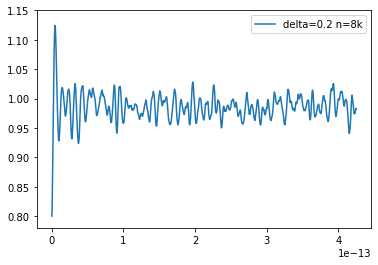

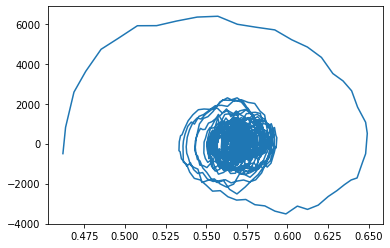

In [24]:
d01_low8 = np.sqrt(np.power(coords_low_8k[0] - coords_low_8k[2],2) + np.power(coords_low_8k[1] - coords_low_8k[3],2))
COMS = calc_COM(np.transpose(coords_low_8k))
dists = calc_COM_dists(np.transpose(coords_low_8k),COMS)
units = unit_vectors(np.transpose(coords_low_8k),COMS)

projections = calc_projections(velocities_low_8k,units)

#print(np.transpose(dists))

x1 = np.transpose(dists)[0]
v1 = np.transpose(projections)[0]



plt.ylim(0.78,1.15)
#plt.plot(times,d01_low128, label='delta=0.2 n=128k')
plt.plot(times,d01_low8, label='delta=0.2 n=8k')
#plt.plot(times,d01_high128, label='delta=2 n=128k')
plt.legend()
plt.show()

plt.plot(x1,v1)
plt.show()




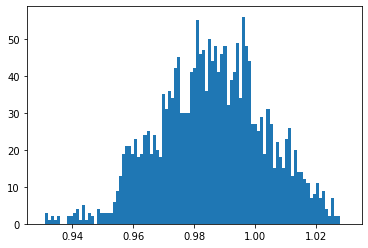

In [ ]:
import pandas as pd
from scipy.optimize import curve_fit


d_rand_low8 = d01_low8[125:] 



bins = np.linspace(0.93,1.03,100)

prob1 = pd.cut(d01_low8[125:],bins)
langevin1 = pd.value_counts(prob1, normalize=True).sort_index()
distr_langevin1 = []
for value in langevin1:
    distr_langevin1.append(value)



plt.hist(d_rand_low8,bins)

plt.show()


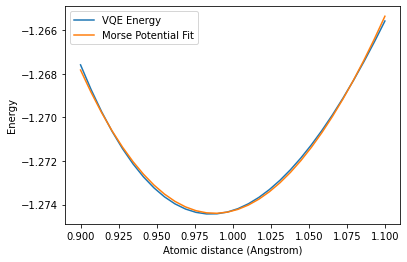

In [ ]:
dists = [0.9, 0.90689655, 0.9137931, 0.92068966, 0.92758621, 0.93448276,
 0.94137931, 0.94827586, 0.95517241, 0.96206897, 0.96896552, 0.97586207,
 0.98275862, 0.98965517, 0.99655172, 1.00344828, 1.01034483, 1.01724138,
 1.02413793, 1.03103448, 1.03793103, 1.04482759, 1.05172414, 1.05862069,
 1.06551724, 1.07241379, 1.07931034, 1.0862069,  1.09310345, 1.1]

energies= [-1.2675871118201665, -1.2687150750860248, -1.269729927344719, -1.2706355037169392, -1.271435438084236, -1.2721333029440844, -1.2727324756574077, -1.2732362259578005, -1.2736477485471178, -1.27397006222526, -1.2742061430615201, -1.2743588087820046, -1.2744307906827115, -1.2744248037934005, -1.2743433449303705, -1.2741888932943475, -1.2739638624555467, -1.2736705538285022, -1.2733111961417856, -1.272887962643296, -1.2724029617777093, -1.271858199752537, -1.2712556510314343, -1.2705972182887129, -1.269884759928896, -1.2691200534946334, -1.2683048344659542, -1.2674408043803551, -1.266529572600501, -1.2655727684424887]

def morse_potential(r, c, m, req):
    return c*(np.exp(-2*m*(r-req))-2*np.exp(-m*(r-req)))

poptmp, pcovmp = curve_fit(morse_potential, dists, energies)
vqe_pred = [morse_potential(i, poptmp[0], poptmp[1], poptmp[2]) for i in dists]

plt.plot(dists, energies, label="VQE Energy")
plt.plot(dists, vqe_pred, label="Morse Potential Fit")
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.show()



In [ ]:
k_b  = 1.38065e-23
Ha = 4.36e-18
c = poptmp[0] #Ha
m = poptmp[1] #angst^-1
req = poptmp[2]  #angst
print(req)
#have to tune manually, a little different than fit equilibrium position.
req = 0.9849
print(req)
kb = k_b/Ha

def func(r, tem, amp):
    return amp*np.exp(-(c*(np.exp(-2*m*(r-req))-2*np.exp(-m*(r-req)))+c)/(kb*tem))

0.9881579367857889
0.9849


delta = 0.2*dt  n = 8000  samples = 2000
FIT TEMP: 164.50888261618
KIN TEMP: 164.58651777721803


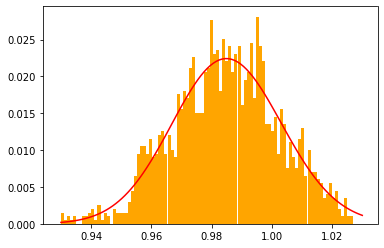

In [ ]:
#delta= 0.2 n=8k 1
#delta= 0.2 n=128k 2
#delta= 2 n=8k 3
#delta= 2 n=128k 4

poptstat1, pcovstat1 = curve_fit(func, bins[1:], distr_langevin1)
distr_pred1 = [func(i, poptstat1[0], poptstat1[1]) for i in bins]

print("delta = 0.2*dt  n = 8000  samples = 2000")
print("FIT TEMP: " + str(poptstat1[0]))
#
print("KIN TEMP: " + str(ksum1))


#print(distr_pred1)
width = 0.001
plt.bar(np.array(bins[:-1])-width/2, np.array(distr_langevin1),width=width, color='orange', label="Langevin(Full)")
plt.plot(np.array(bins), np.array(distr_pred1), color='red')
#plt.hist()
plt.show()



